In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares
from matplotlib.colors import LogNorm
cmap.set_under('w',0)
cmap.set_bad('w',0)


In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [4]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/FidCuts/postcuts/convPkl_full/inb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/FidCuts/postcuts/convPkl_full/inb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/FidCuts/postcuts/convPkl_full/inb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/FidCuts/postcuts/convPkl_full/inb/exp/"

#epg Exp
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")

# Rec
df_4397_corr = pd.read_pickle(parent_MC + "4397.pkl")
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")

# df_3987_corr = pd.read_pickle(parent_MC + "3987_075.pkl")
# df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076_075.pkl")
# df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076_075.pkl")
#bkg2g Exp
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [47]:
df_4397_corr.GenQ2.min(), df_4397_corr.GenQ2.max(), df_4397_corr.GenxB.min(), df_4397_corr.GenxB.max(), df_4397_corr.Gent.min(), df_4397_corr.Geny.min(), df_4397_corr.Geny.max()

(0.9954, 10.8634, 0.0745, 0.7681, 0.077, 0.2128677, 0.83837736)

<AxesSubplot:>

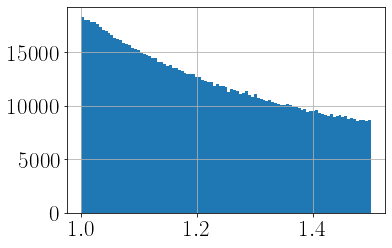

In [114]:
df_4398_corr.Q2.hist(bins = np.linspace(1,1.5,100))

<AxesSubplot:>

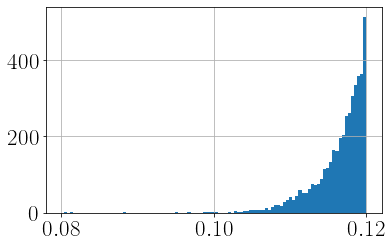

In [112]:
df_4397_corr.Gent.hist(bins = np.linspace(0.08, 0.12, 100))

In [42]:
df_4397_corr.y - df_4397_corr.Q2/(df_4397_corr.xB*2*M*10.604)

0         0.000000e+00
1         0.000000e+00
2         0.000000e+00
3         0.000000e+00
4         0.000000e+00
              ...     
149646    0.000000e+00
149647    0.000000e+00
149648    0.000000e+00
149649    1.110223e-16
149650    5.551115e-17
Length: 1145046, dtype: float64

In [63]:
df_4397_corr.loc[:, "Geny"]  = df_4397_corr.GenQ2/(df_4397_corr.GenxB*2*M*10.604)
df_4397_corr.loc[:, "Gennu"]  = df_4397_corr.GenQ2/(df_4397_corr.GenxB*2*0.938272081)
df_4397_corr.loc[:, "GenW"]  = np.sqrt(M**2-df_4397_corr.GenQ2+2*M*df_4397_corr.Gennu)

<AxesSubplot:>

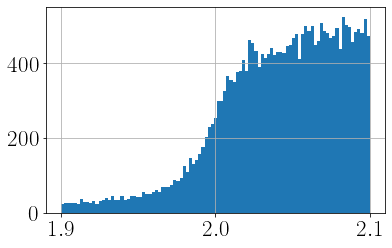

In [68]:
# df_4397_corr.Geny.hist(bins = 100)
# df_4397_corr.GenW.hist(bins = np.linspace(1.9,2.1,100))

<AxesSubplot:>

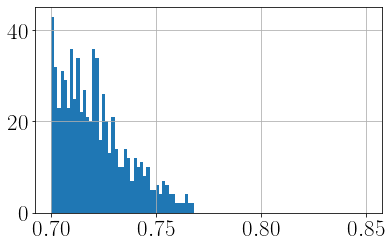

In [84]:
df_4397_corr.GenxB.hist(bins = np.linspace(0.7, 0.85, 100))

In [8]:
epgExpInb = copy(exp_1g_corr)
pi0ExpInb = copy(exp_2g_corr)
dvcsSimInb = df_4397_corr#pd.concat([df_3987_corr, df_4124_corr, df_4139_corr, df_4181_corr, df_4182_corr])
bkgSimInb = df_4076_1g_corr#pd.concat([df_4076_1g_corr, df_4202_1g_corr, df_4209_1g_corr])
pi0SimInb = df_4076_2g_corr#pd.concat([df_4076_2g_corr, df_4202_2g_corr, df_4209_2g_corr])

In [9]:
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[(pi0ExpInb.config == 3)]
pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.config == 3)]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[(pi0ExpInb.config == 2)]
pi0SimInbCD = pi0SimInb.loc[(pi0SimInb.config == 2)]

epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[(pi0ExpInb.config == 1)]
pi0SimInbFD = pi0SimInb.loc[(pi0SimInb.config == 1)]

In [57]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/FidCuts/postcuts/convPkl_full/outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/FidCuts/postcuts/convPkl_full/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/FidCuts/postcuts/convPkl_full/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/FidCuts/postcuts/convPkl_full/outb/exp/"

#epg Exp
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")

# Rec
df_4398_corr = pd.read_pickle(parent_MC + "4398.pkl")
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
df_4243_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")

# df_3987_corr = pd.read_pickle(parent_MC + "3987_075.pkl")
# df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076_075.pkl")
# df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076_075.pkl")
#bkg2g Exp
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

<AxesSubplot:>

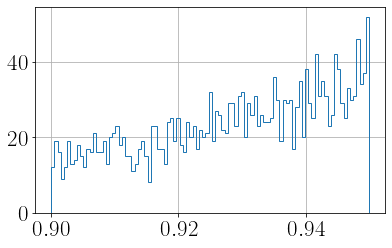

In [83]:
df_4398_corr.GenQ2.hist(bins = np.linspace(0.9, 0.95, 100), histtype = 'step')
# df_4398_corr.Q2.hist(bins = np.linspace(0.9, 1.0, 100), histtype = 'step')

In [62]:
df_4398_corr.W - np.sqrt(M**2-df_4398_corr.Q2+2*M*df_4398_corr.nu)

0         2.220446e-15
1         1.332268e-15
2         2.220446e-15
3         2.664535e-15
4         1.776357e-15
              ...     
114109    2.220446e-15
114110    1.776357e-15
114111    1.776357e-15
114112    1.332268e-15
114113    1.332268e-15
Length: 2717692, dtype: float64

In [5]:
epgExpOutb = copy(exp_1g_corr)
pi0ExpOutb = copy(exp_2g_corr)
dvcsSimOutb = df_4398_corr
bkgSimOutb = df_4243_1g_corr
pi0SimOutb = df_4243_2g_corr

In [6]:
epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[(pi0ExpOutb.config == 3)]
pi0SimOutbCDFT = pi0SimOutb.loc[(pi0SimOutb.config == 3)]

epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]
pi0ExpOutbCD = pi0ExpOutb.loc[(pi0ExpOutb.config == 2)]
pi0SimOutbCD = pi0SimOutb.loc[(pi0SimOutb.config == 2)]

epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]
dvcsSimOutbFD = dvcsSimOutb.loc[dvcsSimOutb.config == 1]
bkgSimOutbFD = bkgSimOutb.loc[bkgSimOutb.config == 1]
pi0ExpOutbFD = pi0ExpOutb.loc[(pi0ExpOutb.config == 1)]
pi0SimOutbFD = pi0SimOutb.loc[(pi0SimOutb.config == 1)]

In [ ]:
epgExp = pd.concat([epgExpInb, epgExpOutb])

In [22]:
contInbCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
contInbFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contInbCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)
contInb = len(pi0ExpInb)*len(bkgSimInb)/len(pi0SimInb)/len(epgExpInb)

0.5331957923353808 0.09500444992392221 0.003361632568228104


In [11]:
print(contInbFD, contInbCD, contInbCDFT)

0.43704395388648665 0.2625754936739531 0.01478826142432519


In [15]:
len(epgExpInbFD), len(epgExpInbCD), len(epgExpInbCDFT)

(192680, 204427, 368045)

In [12]:
len(epgExpInbFD)*(1-contInbFD), len(epgExpInbCD)*(1-contInbCD), len(epgExpInbCDFT)*(1-contInbCDFT)

(108470.37096515176, 150749.4795547148, 362602.2543240842)

In [14]:
len(dvcsSimInbFD), len(dvcsSimInbCD), len(dvcsSimInbCDFT)

(222926, 338093, 584027)

In [13]:
len(epgExpInbFD)*(1-contInbFD)/len(dvcsSimInbFD), len(epgExpInbCD)*(1-contInbCD)/len(dvcsSimInbCD), len(epgExpInbCDFT)*(1-contInbCDFT)/len(dvcsSimInbCDFT)

(0.4865756841514752, 0.44588169395614463, 0.6208655667016837)

In [16]:
contOutbCD = len(pi0ExpOutbCD)*len(bkgSimOutbCD)/len(pi0SimOutbCD)/len(epgExpOutbCD)
contOutbFD = len(pi0ExpOutbFD)*len(bkgSimOutbFD)/len(pi0SimOutbFD)/len(epgExpOutbFD)
contOutbCDFT = len(pi0ExpOutbCDFT)*len(bkgSimOutbCDFT)/len(pi0SimOutbCDFT)/len(epgExpOutbCDFT)
contOutb = len(pi0ExpOutb)*len(bkgSimOutb)/len(pi0SimOutb)/len(epgExpOutb)

In [19]:
print(contOutbFD, contOutbCD, contOutbCDFT)

0.4649042038687608 0.2512578775325313 0.019031250412170235


In [20]:
len(epgExpOutbFD), len(epgExpOutbCD), len(epgExpOutbCDFT)

(225831, 796950, 756169)

In [21]:
len(dvcsSimOutbFD), len(dvcsSimOutbCD), len(dvcsSimOutbCDFT)

(275807, 1174899, 1266986)

In [22]:
len(epgExpOutbFD)*(1-contOutbFD), len(epgExpOutbCD)*(1-contOutbCD), len(epgExpOutbCDFT)*(1-contOutbCDFT)

(120841.2187361139, 596710.0345004491, 741778.1584070796)

In [23]:
len(epgExpOutbFD)*(1-contOutbFD)/len(dvcsSimOutbFD), len(epgExpOutbCD)*(1-contOutbCD)/len(dvcsSimOutbCD), len(epgExpOutbCDFT)*(1-contOutbCDFT)/len(dvcsSimOutbCDFT)

(0.43813688099328113, 0.5078819834730042, 0.5854667363389017)

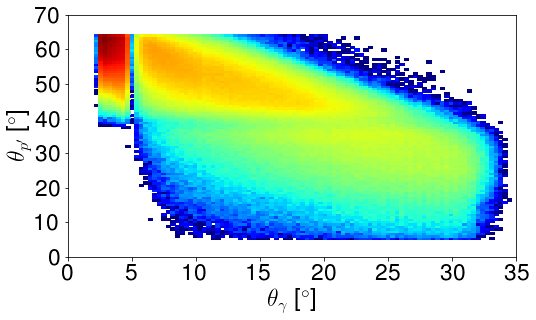

In [26]:
fig, axs = plt.subplots(1, 1, figsize = (8, 5))


axs.hist2d(epgExp.Gtheta, epgExp.Ptheta, bins = [np.linspace(0, 35, 101), np.linspace(0, 70, 101)], cmap = cmap, cmin = 1, norm = LogNorm())
# axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
axs.set_xlim([0, 35])
axs.set_xticks([0, 5, 10, 15, 20, 25, 30, 35])
axs.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35])
axs.set_yticks([0, 10, 20, 30, 40, 50, 60, 70])
axs.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70])
# plt.hist(dvcsSample.Enphe, bins = np.linspace(0, 50, 51), density = True, histtype = 'step')
# plt.legend()
axs.set_xlabel(r"$\theta_{\gamma}$"+ " ["+degree+"]")
axs.set_ylabel(r"$\theta_{p'}$"+ " ["+degree+"]")
plt.savefig("proton_correlation.pdf")
plt.show()

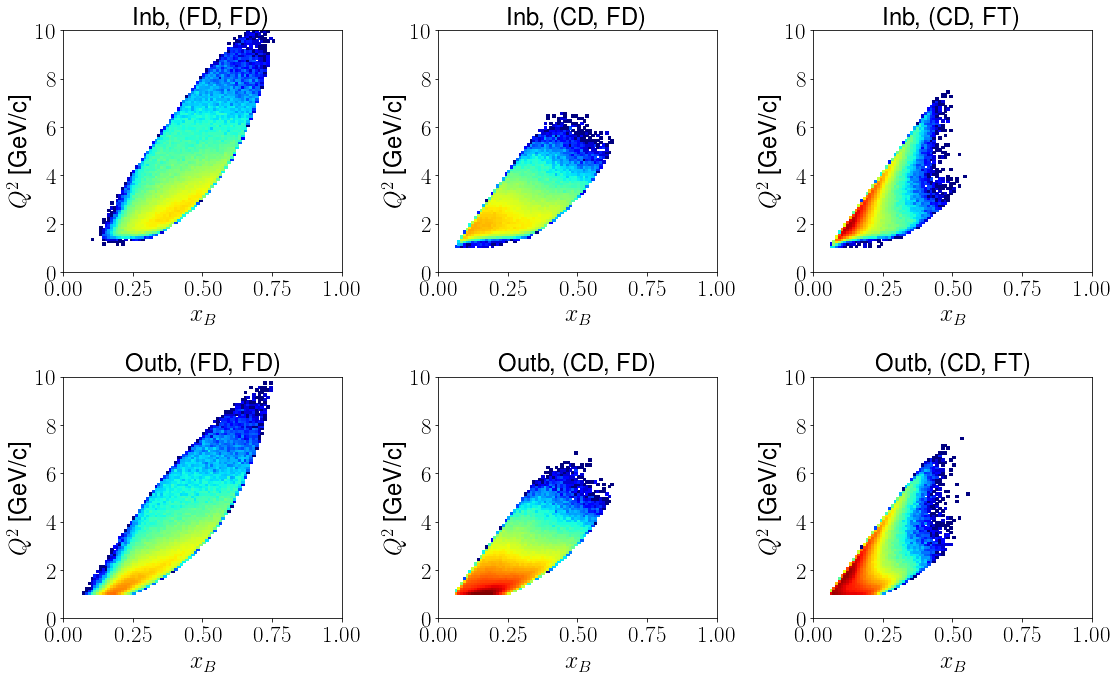

In [266]:
fig, axs = plt.subplots(2, 3, figsize = (16, 10))


axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$x_B$")
        axs[xind, yind].set_ylabel(r"$Q^2$" + " [" +GeVc+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
# axs.set_xlim([0, 35])
# axs.set_xticks([0, 5, 10, 15, 20, 25, 30, 35])
# axs.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35])
# axs.set_yticks([0, 10, 20, 30, 40, 50, 60, 70])
# axs.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70])
# # plt.hist(dvcsSample.Enphe, bins = np.linspace(0, 50, 51), density = True, histtype = 'step')
# # plt.legend()
# axs.set_xlabel(r"$\theta_{\gamma}$"+ " ["+degree+"]")
# axs.set_ylabel(r"$\theta_{p'}$"+ " ["+degree+"]")
plt.savefig("Q2xB_binning.pdf")
plt.show()

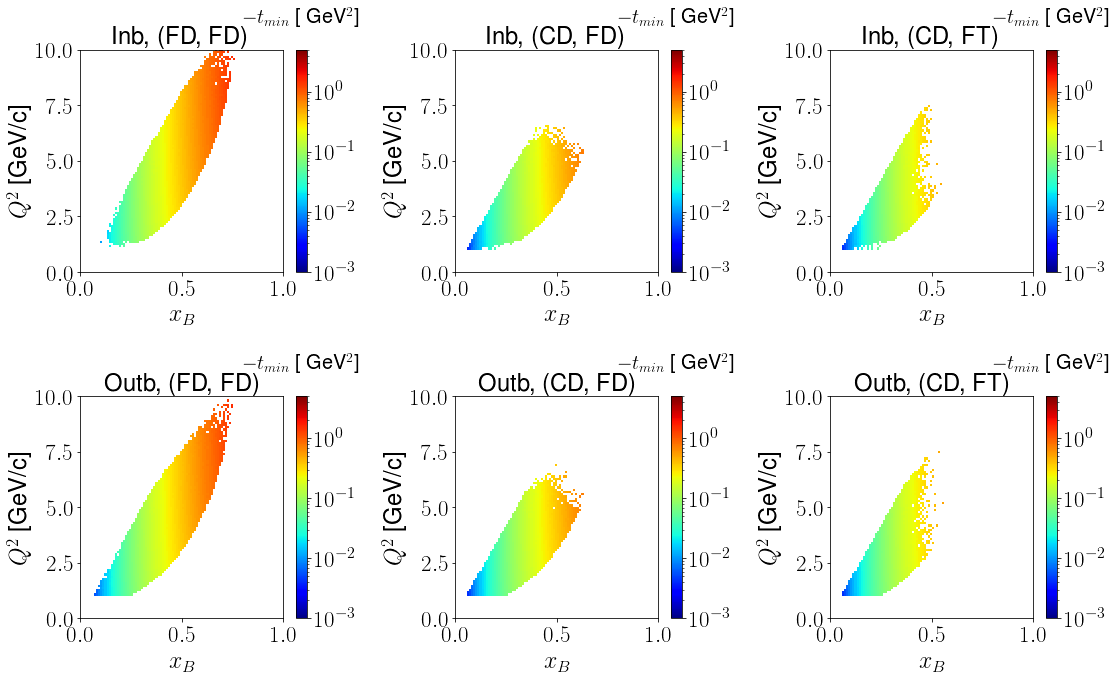

In [99]:
fig, axs = plt.subplots(2, 3, figsize = (16, 10))


H1, xedges, yedges = np.histogram2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)])
H1 = H1.T
H2, xedges, yedges = np.histogram2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], weights = epgExpInbFD.tmin1)
H2 = H2.T
H = np.divide(H2, H1, out=np.zeros_like(H2), where=H1!=0)
plot2d = axs[0, 0].imshow(H, interpolation='none', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap, norm = LogNorm(vmin = 0.001, vmax =5))
cbar = plt.colorbar(plot2d, ax = axs[0,0])
cbar.ax.set_title(r"$-t_{min}$"+ " [ " + GeV2+"]\n", fontsize = 20)
H1, xedges, yedges = np.histogram2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)])
H1 = H1.T
H2, xedges, yedges = np.histogram2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], weights = epgExpInbCD.tmin1)
H2 = H2.T
H = np.divide(H2, H1, out=np.zeros_like(H2), where=H1!=0)
plot2d = axs[0, 1].imshow(H, interpolation='none', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap, norm = LogNorm(vmin = 0.001, vmax =5))
cbar = plt.colorbar(plot2d, ax = axs[0,1])
cbar.ax.set_title(r"$-t_{min}$"+ " [ " + GeV2+"]\n", fontsize = 20)

H1, xedges, yedges = np.histogram2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)])
H1 = H1.T
H2, xedges, yedges = np.histogram2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], weights = epgExpInbCDFT.tmin1)
H2 = H2.T
H = np.divide(H2, H1, out=np.zeros_like(H2), where=H1!=0)
plot2d = axs[0, 2].imshow(H, interpolation='none', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap, norm = LogNorm(vmin = 0.001, vmax =5))
cbar = plt.colorbar(plot2d, ax = axs[0,2])
cbar.ax.set_title(r"$-t_{min}$"+ " [ " + GeV2+"]\n", fontsize = 20)

H1, xedges, yedges = np.histogram2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)])
H1 = H1.T
H2, xedges, yedges = np.histogram2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], weights = epgExpOutbFD.tmin1)
H2 = H2.T
H = np.divide(H2, H1, out=np.zeros_like(H2), where=H1!=0)
plot2d = axs[1, 0].imshow(H, interpolation='none', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap, norm = LogNorm(vmin = 0.001, vmax =5))
cbar = plt.colorbar(plot2d, ax = axs[1,0])
cbar.ax.set_title(r"$-t_{min}$"+ " [ " + GeV2+"]\n", fontsize = 20)

H1, xedges, yedges = np.histogram2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)])
H1 = H1.T
H2, xedges, yedges = np.histogram2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], weights = epgExpOutbCD.tmin1)
H2 = H2.T
H = np.divide(H2, H1, out=np.zeros_like(H2), where=H1!=0)
plot2d = axs[1, 1].imshow(H, interpolation='none', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap, norm = LogNorm(vmin = 0.001, vmax =5))
cbar = plt.colorbar(plot2d, ax = axs[1,1])
cbar.ax.set_title(r"$-t_{min}$"+ " [ " + GeV2+"]\n", fontsize = 20)

H1, xedges, yedges = np.histogram2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)])
H1 = H1.T
H2, xedges, yedges = np.histogram2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], weights = epgExpOutbCDFT.tmin1)
H2 = H2.T
H = np.divide(H2, H1, out=np.zeros_like(H2), where=H1!=0)
plot2d = axs[1, 2].imshow(H, interpolation='none', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap, norm = LogNorm(vmin = 0.001, vmax =5))
cbar = plt.colorbar(plot2d, ax = axs[1,2])
cbar.ax.set_title(r"$-t_{min}$"+ " [ " + GeV2+"]\n", fontsize = 20)


titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$x_B$")
        axs[xind, yind].set_ylabel(r"$Q^2$" + " [" +GeVc+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
plt.savefig("Q2xB_binning_tmin.pdf")
# plt.show()

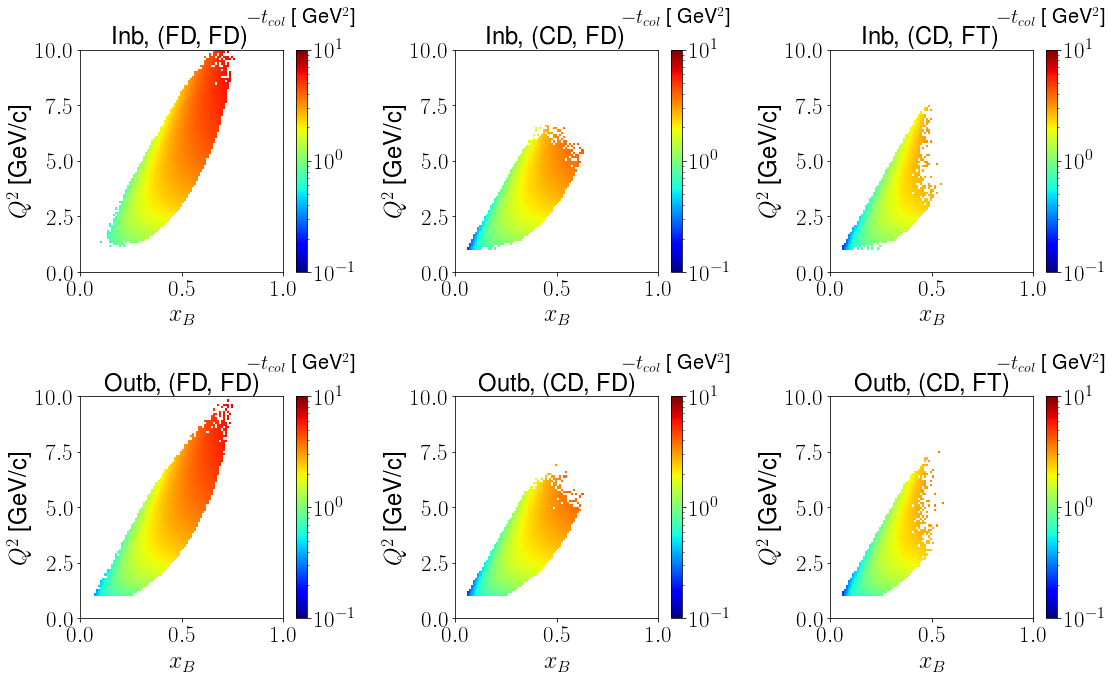

In [100]:
fig, axs = plt.subplots(2, 3, figsize = (16, 10))


H1, xedges, yedges = np.histogram2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)])
H1 = H1.T
H2, xedges, yedges = np.histogram2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], weights = epgExpInbFD.tcol)
H2 = H2.T
H = np.divide(H2, H1, out=np.zeros_like(H2), where=H1!=0)
plot2d = axs[0, 0].imshow(H, interpolation='none', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap, norm = LogNorm(vmin = 0.1, vmax =10))
cbar = plt.colorbar(plot2d, ax = axs[0,0])
cbar.ax.set_title(r"$-t_{col}$"+ " [ " + GeV2+"]\n", fontsize = 20)
H1, xedges, yedges = np.histogram2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)])
H1 = H1.T
H2, xedges, yedges = np.histogram2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], weights = epgExpInbCD.tcol)
H2 = H2.T
H = np.divide(H2, H1, out=np.zeros_like(H2), where=H1!=0)
plot2d = axs[0, 1].imshow(H, interpolation='none', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap, norm = LogNorm(vmin = 0.1, vmax =10))
cbar = plt.colorbar(plot2d, ax = axs[0,1])
cbar.ax.set_title(r"$-t_{col}$"+ " [ " + GeV2+"]\n", fontsize = 20)

H1, xedges, yedges = np.histogram2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)])
H1 = H1.T
H2, xedges, yedges = np.histogram2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], weights = epgExpInbCDFT.tcol)
H2 = H2.T
H = np.divide(H2, H1, out=np.zeros_like(H2), where=H1!=0)
plot2d = axs[0, 2].imshow(H, interpolation='none', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap, norm = LogNorm(vmin = 0.1, vmax =10))
cbar = plt.colorbar(plot2d, ax = axs[0,2])
cbar.ax.set_title(r"$-t_{col}$"+ " [ " + GeV2+"]\n", fontsize = 20)

H1, xedges, yedges = np.histogram2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)])
H1 = H1.T
H2, xedges, yedges = np.histogram2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], weights = epgExpOutbFD.tcol)
H2 = H2.T
H = np.divide(H2, H1, out=np.zeros_like(H2), where=H1!=0)
plot2d = axs[1, 0].imshow(H, interpolation='none', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap, norm = LogNorm(vmin = 0.1, vmax =10))
cbar = plt.colorbar(plot2d, ax = axs[1,0])
cbar.ax.set_title(r"$-t_{col}$"+ " [ " + GeV2+"]\n", fontsize = 20)

H1, xedges, yedges = np.histogram2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)])
H1 = H1.T
H2, xedges, yedges = np.histogram2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], weights = epgExpOutbCD.tcol)
H2 = H2.T
H = np.divide(H2, H1, out=np.zeros_like(H2), where=H1!=0)
plot2d = axs[1, 1].imshow(H, interpolation='none', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap, norm = LogNorm(vmin = 0.1, vmax =10))
cbar = plt.colorbar(plot2d, ax = axs[1,1])
cbar.ax.set_title(r"$-t_{col}$"+ " [ " + GeV2+"]\n", fontsize = 20)

H1, xedges, yedges = np.histogram2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)])
H1 = H1.T
H2, xedges, yedges = np.histogram2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], weights = epgExpOutbCDFT.tcol)
H2 = H2.T
H = np.divide(H2, H1, out=np.zeros_like(H2), where=H1!=0)
plot2d = axs[1, 2].imshow(H, interpolation='none', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap, norm = LogNorm(vmin = 0.1, vmax =10))
cbar = plt.colorbar(plot2d, ax = axs[1,2])
cbar.ax.set_title(r"$-t_{col}$"+ " [ " + GeV2+"]\n", fontsize = 20)


titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$x_B$")
        axs[xind, yind].set_ylabel(r"$Q^2$" + " [" +GeVc+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
# axs.set_xlim([0, 35])
# axs.set_xticks([0, 5, 10, 15, 20, 25, 30, 35])
# axs.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35])
# axs.set_yticks([0, 10, 20, 30, 40, 50, 60, 70])
# axs.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70])
# # plt.hist(dvcsSample.Enphe, bins = np.linspace(0, 50, 51), density = True, histtype = 'step')
# # plt.legend()
# axs.set_xlabel(r"$\theta_{\gamma}$"+ " ["+degree+"]")
# axs.set_ylabel(r"$\theta_{p'}$"+ " ["+degree+"]")
plt.savefig("Q2xB_binning_tcol.pdf")
# plt.show()

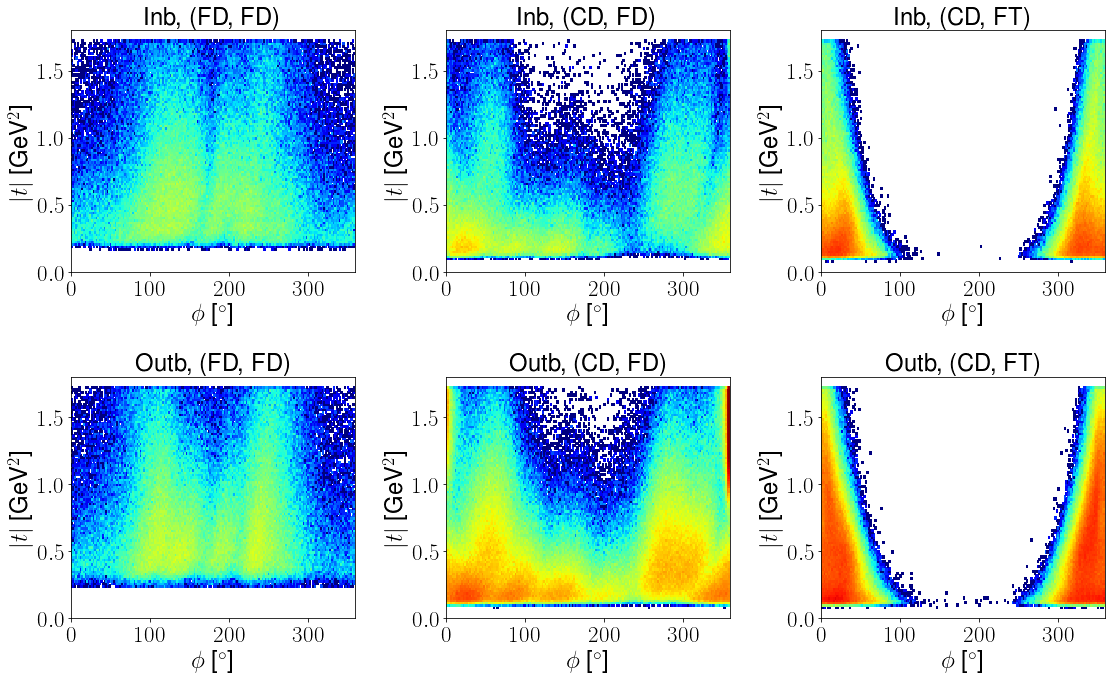

In [269]:
fig, axs = plt.subplots(2, 3, figsize = (16, 10))


axs[0, 0].hist2d(epgExpInbFD.phi1, epgExpInbFD.t1, bins = [np.linspace(0, 360, 181), np.linspace(0, 1.8, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 1000))
axs[0, 1].hist2d(epgExpInbCD.phi1, epgExpInbCD.t1, bins = [np.linspace(0, 360, 181), np.linspace(0, 1.8, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 1000))
axs[0, 2].hist2d(epgExpInbCDFT.phi1, epgExpInbCDFT.t1, bins = [np.linspace(0, 360, 181), np.linspace(0, 1.8, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 1000))
axs[1, 0].hist2d(epgExpOutbFD.phi1, epgExpOutbFD.t1, bins = [np.linspace(0, 360, 181), np.linspace(0, 1.8, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 1000))
axs[1, 1].hist2d(epgExpOutbCD.phi1, epgExpOutbCD.t1, bins = [np.linspace(0, 360, 181), np.linspace(0, 1.8, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 1000))
axs[1, 2].hist2d(epgExpOutbCDFT.phi1, epgExpOutbCDFT.t1, bins = [np.linspace(0, 360, 181), np.linspace(0, 1.8, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 1000))

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\phi$" + " [" +degree+"]")
        axs[xind, yind].set_ylabel(r"$|t|$"+ " [" + GeV2 + "]")
        axs[xind, yind].set_title(titles[xind*3+yind])
plt.savefig("tphi_binning.pdf")
plt.show()

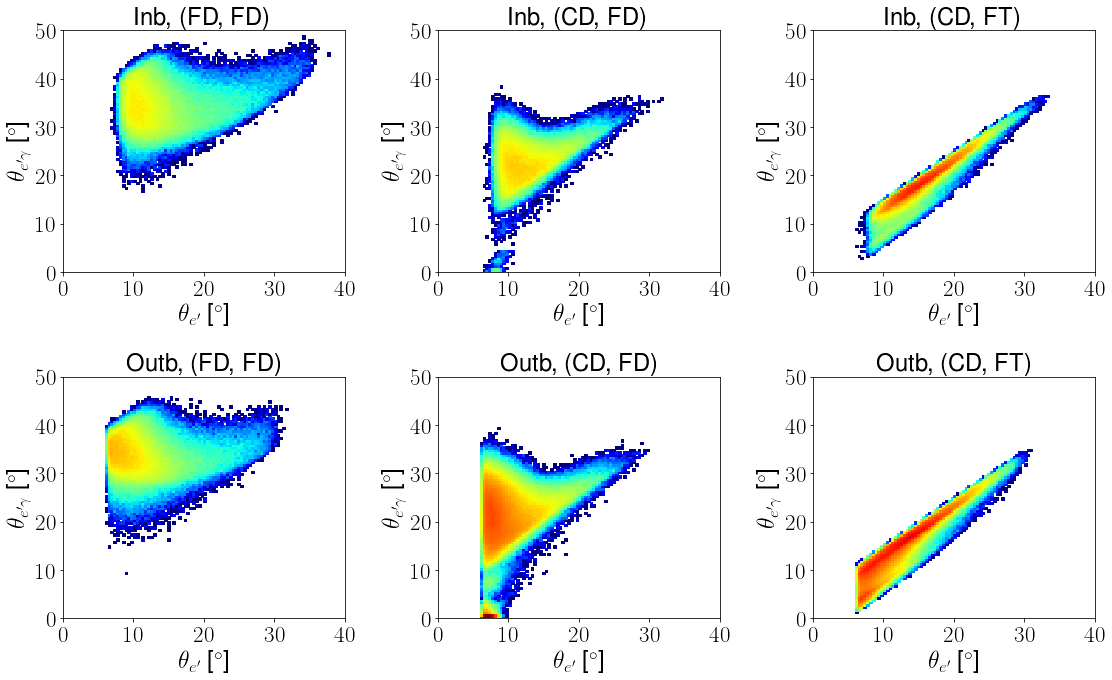

In [268]:
fig, axs = plt.subplots(2, 3, figsize = (16, 10))


axs[0, 0].hist2d(epgExpInbFD.Etheta, epgExpInbFD.coneAngle, bins = [np.linspace(0, 40, 101), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 1].hist2d(epgExpInbCD.Etheta, epgExpInbCD.coneAngle, bins = [np.linspace(0, 40, 101), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 2].hist2d(epgExpInbCDFT.Etheta, epgExpInbCDFT.coneAngle, bins = [np.linspace(0, 40, 101), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[1, 0].hist2d(epgExpOutbFD.Etheta, epgExpOutbFD.coneAngle, bins = [np.linspace(0, 40, 101), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[1, 1].hist2d(epgExpOutbCD.Etheta, epgExpOutbCD.coneAngle, bins = [np.linspace(0, 40, 101), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[1, 2].hist2d(epgExpOutbCDFT.Etheta, epgExpOutbCDFT.coneAngle, bins = [np.linspace(0, 40, 101), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\theta_{e'}$" + " [" +degree+"]")
        axs[xind, yind].set_ylabel(r"$\theta_{e'\gamma}$"+ " [" + degree + "]")
        axs[xind, yind].set_title(titles[xind*3+yind])
plt.savefig("coneAngle_etheta_samesector.pdf")
plt.show()

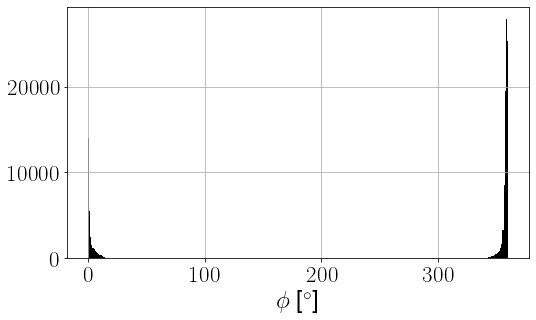

In [46]:
fig, axs = plt.subplots(1, 1, figsize = (8, 5))
(epgExpOutb.loc[epgExpOutb.Esector == epgExpOutb.Gsector, "phi1"]).hist( bins = np.linspace(0, 360, 361), ax = axs, color ='k')
axs.set_xlabel(r"$\phi$" + " ["+degree+"]")
plt.savefig("samesectors.pdf")

<AxesSubplot:>

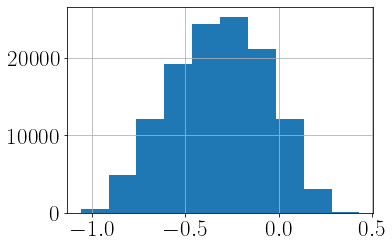

In [59]:
df_epg = copy(epgExpOutb.loc[epgExpOutb.Esector == epgExpOutb.Gsector, :])


In [48]:
epgExpOutb.loc[epgExpOutb.Esector == epgExpOutb.Gsector, "y"] - epgExpOutb.loc[epgExpOutb.Esector == epgExpOutb.Gsector, "ycol2"]

0         0.731902
171       0.949300
188       0.474699
718       0.668170
809       0.294531
            ...   
743514    0.489094
743578    0.696188
743905    0.671230
743974    0.431966
744089    0.817145
Length: 122566, dtype: float64

In [18]:
epgExpInbFD = epgExpInbFD.loc[epgExpInbFD.Esector != epgExpInbFD.Gsector, :]
epgExpInbCD = epgExpInbCD.loc[epgExpInbCD.Esector != epgExpInbCD.Gsector, :]
epgExpInbCDFT = epgExpInbCDFT.loc[epgExpInbCDFT.Esector != epgExpInbCDFT.Gsector, :]
epgExpOutbFD = epgExpOutbFD.loc[epgExpOutbFD.Esector != epgExpOutbFD.Gsector, :]
epgExpOutbCD = epgExpOutbCD.loc[epgExpOutbCD.Esector != epgExpOutbCD.Gsector, :]
epgExpOutbCDFT = epgExpOutbCDFT.loc[epgExpOutbCDFT.Esector != epgExpOutbCDFT.Gsector, :]


In [19]:
from scipy.stats import norm
from scipy.stats import chi2

In [20]:
def normfit(args, x):
#     df = args
    loc, scale, a, b = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return rv.pdf(x) + a + b*x

In [21]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [22]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    hist = dist
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    unchist = np.sqrt(dist)
    chi2fit = np.sum((dist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

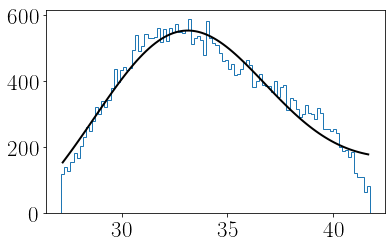

5 [ 3.27302265e+01  4.03221084e+00 -7.65849905e-02  2.41516383e-03] 0.0
32.73022645892879 20.633593932994195 32.5004714874229


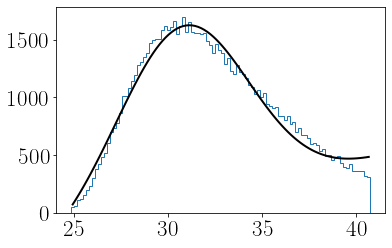

10 [ 3.07524896e+01  3.52207995e+00 -1.11204017e-01  3.48540357e-03] 0.0
30.75248961463052 20.1862497747413 30.418877562215517


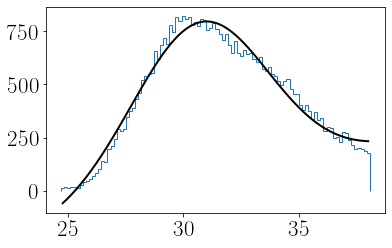

15 [ 3.07020089e+01  2.97081802e+00 -1.42585196e-01  4.61005449e-03] 0.0
30.70200887641382 21.78955481176884 30.274253287760246


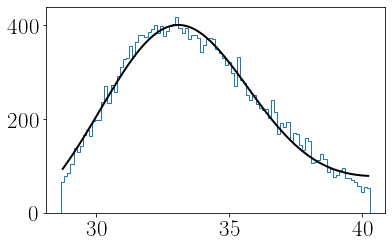

20 [ 3.29145722e+01  2.77402325e+00 -1.02906431e-01  3.15169964e-03] 9.013900736931646e-11
32.91457221580952 24.592502479085 32.605852924231094


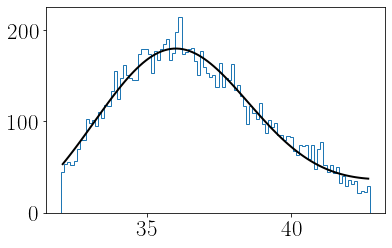

25 [ 3.58465109e+01  2.66380860e+00 -1.21258974e-01  3.44848931e-03] 0.0015099263744349223
35.846510866940775 27.855085057954106 35.48273394595585


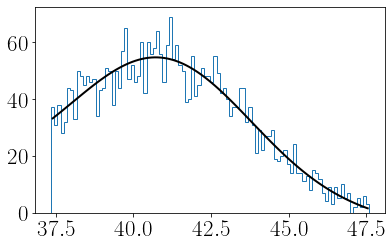

<ipython-input-199-b7cb87b45873>:29: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)


30 [ 4.09223852e+01  2.88353781e+00  1.54703728e-01 -3.37060884e-03] 0.0
40.922385162685664 32.27177172344451 41.38649634758435


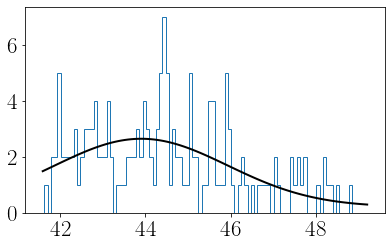

35 [4.39035708e+01 2.03025826e+00 1.59817741e-02 1.50392942e-05] 0.0
43.903570777052174 37.812796002098196 43.95151609933479


<ipython-input-199-b7cb87b45873>:29: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)


In [199]:
EthetaEdges = [5, 10, 15, 20, 25, 30, 35, 40]
EthetaArray = []
coneAngleMinArray = []
coneAngleMaxArray = []
for i in range(len(EthetaEdges)-1):
    EthetaMin = EthetaEdges[i]
    EthetaMax = EthetaEdges[i+1]
    var = dvcsSimInbFD.loc[(dvcsSimInbFD.Etheta>EthetaMin)&(dvcsSimInbFD.Etheta<EthetaMax), "coneAngle"]
    hist, bins = np.histogram(var, bins = 100)
    mu = bins[np.argmax(hist)]
    sigma = var.std()
    
    bins = np.linspace(mu-1.5*sigma, mu+2.5*sigma, 101)
#     if i >3:
#         bins = np.linspace(mu-sigma, mu+0.8*sigma, 101)

    
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist, bins = np.histogram(var, bins = bins)
    dist = hist/np.sum(hist)/np.diff(bins)[0]
    unchist = np.sqrt(hist)
    uncdist = unchist/np.sum(hist)/np.diff(bins)[0]
    params = [mu, sigma, 0, 0]
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, dist))
    plt.hist(var, bins = bins, histtype = 'step')
    
    plt.plot(bincenters, normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0], 'k-', lw=2, label='frozen pdf')
    plt.show()
    chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    print(EthetaMin, res_lsq.x ,pvalue)
    print(res_lsq.x[0], res_lsq.x[0]-3*res_lsq.x[1], res_lsq.x[0]+3*res_lsq.x[2])
    EthetaArray.append((EthetaMin + EthetaMax)/2)
    coneAngleMinArray.append(res_lsq.x[0]-3*res_lsq.x[1])
    coneAngleMaxArray.append(res_lsq.x[0]+3*res_lsq.x[1])

EthetaArrayFD = EthetaArray    
coneAngleMinArrayFD = coneAngleMinArray
coneAngleMaxArrayFD = coneAngleMaxArray

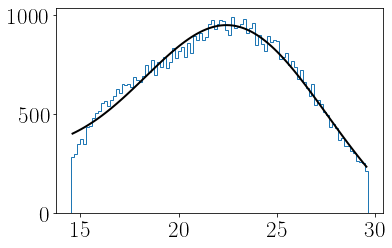

5 [ 2.29380655e+01  4.60339833e+00  5.16601624e-02 -2.02064571e-03] 0.0
22.938065528259486 9.127870534335635 23.093046015530557


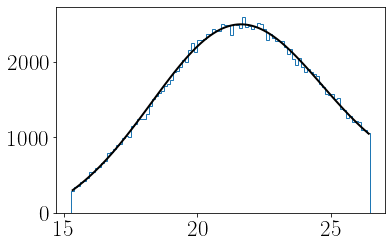

10 [ 2.14749985e+01  3.18800020e+00 -3.44552678e-02  2.00982587e-03] 0.18753224689663484
21.474998547518517 11.910997944818101 21.37163274413059


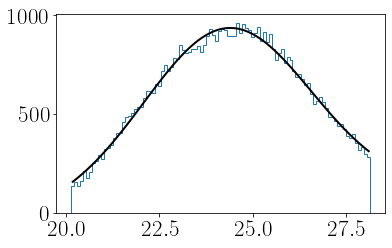

15 [ 2.43275865e+01  2.24754895e+00 -5.24529520e-02  2.55925576e-03] 0.005765565663696237
24.32758647865611 17.584939624689063 24.17022762269998


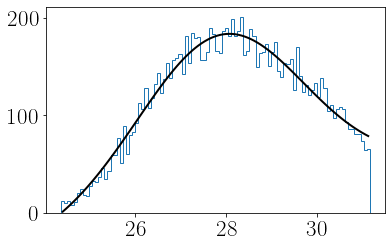

20 [ 2.78703965e+01  1.83229491e+00 -3.57019713e-01  1.31962754e-02] 0.00816750004706479
27.87039653667177 22.373511807653003 26.799337398896448


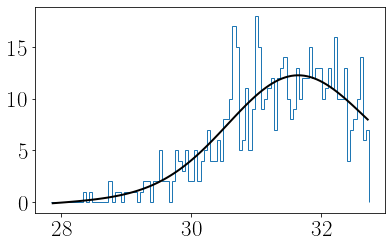

25 [ 3.16087700e+01  1.04443244e+00 -3.87591766e-01  1.37314100e-02] 0.0
31.60877001358599 28.475472703851796 30.445994716928663


<ipython-input-201-6632f0dcc125>:29: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)


In [201]:
EthetaEdges = [5, 10, 15, 20, 25, 30]
EthetaArray = []
coneAngleMinArray = []
coneAngleMaxArray = []
for i in range(len(EthetaEdges)-1):
    EthetaMin = EthetaEdges[i]
    EthetaMax = EthetaEdges[i+1]
    var = dvcsSimInbCD.loc[(dvcsSimInbCD.Etheta>EthetaMin)&(dvcsSimInbCD.Etheta<EthetaMax), "coneAngle"]
    hist, bins = np.histogram(var, bins = 100)
    mu = bins[np.argmax(hist)]
    sigma = var.std()
    
    bins = np.linspace(mu-2*sigma, mu+1.5*sigma, 101)
#     if i >3:
#         bins = np.linspace(mu-sigma, mu+0.8*sigma, 101)

    
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist, bins = np.histogram(var, bins = bins)
    dist = hist/np.sum(hist)/np.diff(bins)[0]
    unchist = np.sqrt(hist)
    uncdist = unchist/np.sum(hist)/np.diff(bins)[0]
    params = [mu, sigma, 0, 0]
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, dist))
    plt.hist(var, bins = bins, histtype = 'step')
    
    plt.plot(bincenters, normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0], 'k-', lw=2, label='frozen pdf')
    plt.show()
    chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    print(EthetaMin, res_lsq.x ,pvalue)
    print(res_lsq.x[0], res_lsq.x[0]-3*res_lsq.x[1], res_lsq.x[0]+3*res_lsq.x[2])
    EthetaArray.append((EthetaMin + EthetaMax)/2)
    coneAngleMinArray.append(res_lsq.x[0]-3*res_lsq.x[1])
    coneAngleMaxArray.append(res_lsq.x[0]+3*res_lsq.x[1])
coneAngleMinArrayCD = coneAngleMinArray
coneAngleMaxArrayCD = coneAngleMaxArray

[12.337952683529181, 2.0564899060603543, 0, 0]


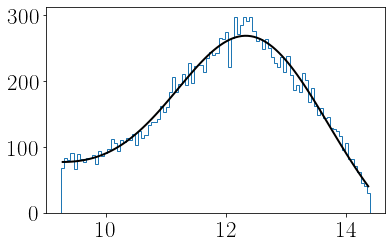

5 [12.45462422  1.25337628  0.3145613  -0.02551573] 0.599539096414226
12.45462422454737 8.69449539758123 13.398308136939601
[16.664204778658444, 2.2921871450962508, 0, 0]


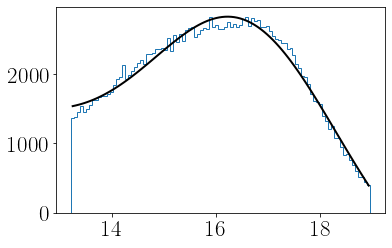

10 [16.57622677  1.72072976  0.45439624 -0.02705627] 0.0
16.576226766747034 11.414037488696012 17.93941549212419
[19.523321253323083, 2.029611973996753, 0, 0]


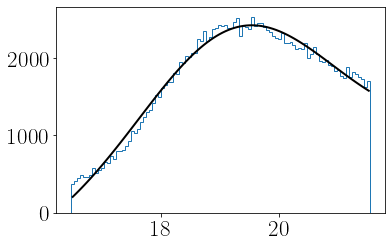

15 [19.26996405  1.64359807 -0.4347936   0.02418242] 0.0
19.269964049893 14.339169830846695 17.965583246431862
[24.22254745052364, 1.7711738604655716, 0, 0]


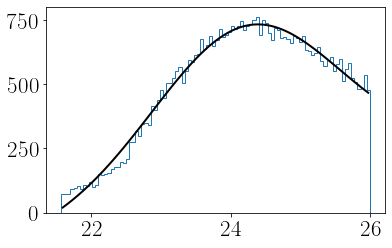

20 [24.21474291  1.34679247 -0.64370208  0.02818858] 0.0
24.214742912437142 20.174365514149166 22.283636662807602
[29.17900562829937, 1.4806479521703684, 0, 0]


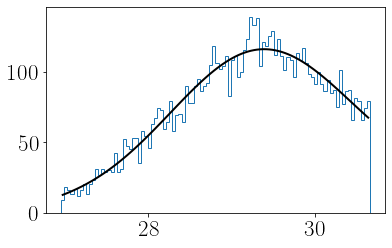

25 [ 2.93531828e+01  1.08094085e+00 -3.21888828e-01  1.23617342e-02] 0.34217924754026197
29.35318278774589 26.110360226615825 28.387516305144025


In [202]:
EthetaEdges = [5, 10, 15, 20, 25, 30]
EthetaArray = []
coneAngleMinArray = []
coneAngleMaxArray = []
for i in range(len(EthetaEdges)-1):
    EthetaMin = EthetaEdges[i]
    EthetaMax = EthetaEdges[i+1]
    var = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Etheta>EthetaMin)&(dvcsSimInbCDFT.Etheta<EthetaMax), "coneAngle"]
    hist, bins = np.histogram(var, bins = 100)
    mu = bins[np.argmax(hist)]
    sigma = var.std()
    
    bins = np.linspace(mu-1.5*sigma, mu+1*sigma, 101)
#     if i >3:
#         bins = np.linspace(mu-sigma, mu+0.8*sigma, 101)

    
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist, bins = np.histogram(var, bins = bins)
    dist = hist/np.sum(hist)/np.diff(bins)[0]
    unchist = np.sqrt(hist)
    uncdist = unchist/np.sum(hist)/np.diff(bins)[0]
    params = [mu, sigma, 0, 0]
    print(params)
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, dist))
    plt.hist(var, bins = bins, histtype = 'step')
    
    plt.plot(bincenters, normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0], 'k-', lw=2, label='frozen pdf')
    plt.show()
    chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    print(EthetaMin, res_lsq.x ,pvalue)
    print(res_lsq.x[0], res_lsq.x[0]-3*res_lsq.x[1], res_lsq.x[0]+3*res_lsq.x[2])
    EthetaArray.append((EthetaMin + EthetaMax)/2)
    coneAngleMinArray.append(res_lsq.x[0]-3*res_lsq.x[1])
    coneAngleMaxArray.append(res_lsq.x[0]+3*res_lsq.x[1])
coneAngleMinArrayCDFT = coneAngleMinArray
coneAngleMaxArrayCDFT = coneAngleMaxArray

In [215]:
print(params_1, params_2, params_3, params_4, params_5, params_6)

[ 2.13942953e-02 -3.78642002e-01  2.19979469e+01] [ 2.80010747e-02 -1.00123070e+00  4.98951785e+01] [0.01643514 0.40792463 4.90086058] [ 0.04695402 -1.67707293 46.01477349] [ 0.0266942  -0.0624557   7.72965322] [-2.21010358e-03  8.62937803e-01  1.02869484e+01]


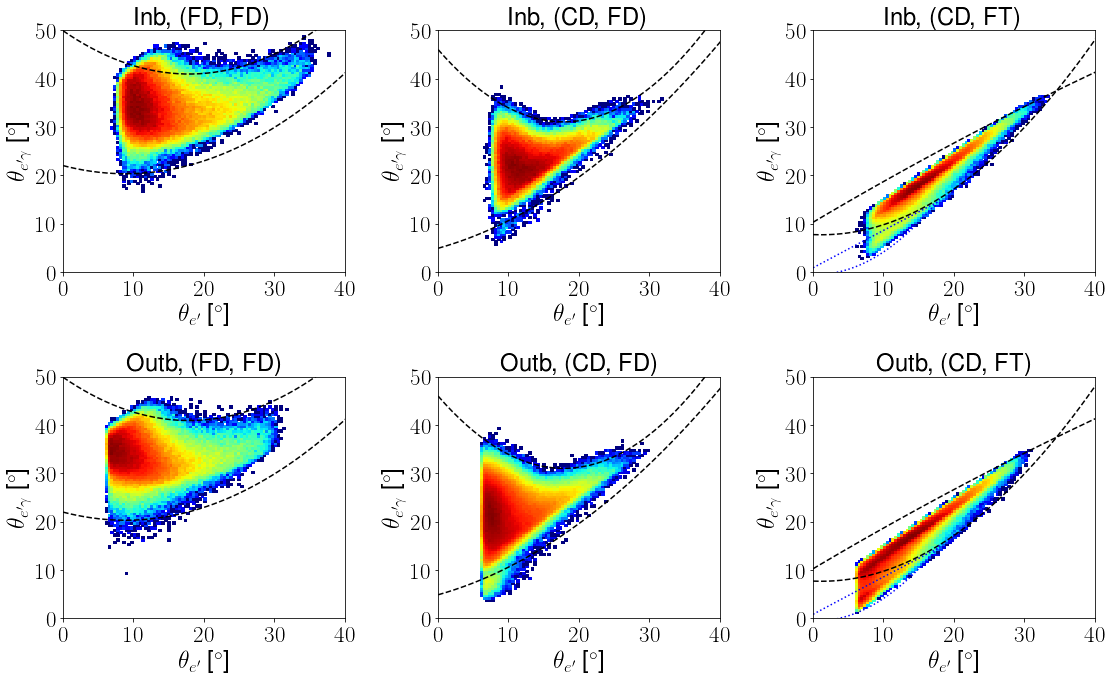

In [75]:
fig, axs = plt.subplots(2, 3, figsize = (16, 10))


axs[0, 0].hist2d(epgExpInbFD.Etheta, epgExpInbFD.coneAngle, bins = [np.linspace(0, 40, 101), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1, norm = LogNorm())
# axs[0, 0].plot(EthetaArrayFD, coneAngleMinArrayFD, color = 'k')
# axs[0, 0].plot(EthetaArrayFD, coneAngleMaxArrayFD, color = 'k')

axs[0, 1].hist2d(epgExpInbCD.Etheta, epgExpInbCD.coneAngle, bins = [np.linspace(0, 40, 101), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1, norm = LogNorm())
# axs[0, 1].plot(EthetaArray, coneAngleMinArrayCD, color = 'k')
# axs[0, 1].plot(EthetaArray, coneAngleMaxArrayCD, color = 'k')

axs[0, 2].hist2d(epgExpInbCDFT.Etheta, epgExpInbCDFT.coneAngle, bins = [np.linspace(0, 40, 101), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1, norm = LogNorm())
# axs[0, 2].plot(EthetaArray, coneAngleMinArrayCDFT, color = 'k')
# axs[0, 2].plot(EthetaArray, coneAngleMaxArrayCDFT, color = 'k')

axs[1, 0].hist2d(epgExpOutbFD.Etheta, epgExpOutbFD.coneAngle, bins = [np.linspace(0, 40, 101), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1, norm = LogNorm())
# axs[1, 0].plot(EthetaArrayFD, coneAngleMinArrayFD, color = 'k')
# axs[1, 0].plot(EthetaArrayFD, coneAngleMaxArrayFD, color = 'k')

axs[1, 1].hist2d(epgExpOutbCD.Etheta, epgExpOutbCD.coneAngle, bins = [np.linspace(0, 40, 101), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1, norm = LogNorm())
# axs[1, 1].plot(EthetaArray, coneAngleMinArrayCD, color = 'k')
# axs[1, 1].plot(EthetaArray, coneAngleMaxArrayCD, color = 'k')

axs[1, 2].hist2d(epgExpOutbCDFT.Etheta, epgExpOutbCDFT.coneAngle, bins = [np.linspace(0, 40, 101), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1, norm = LogNorm())
# axs[1, 2].plot(EthetaArray, coneAngleMinArrayCDFT, color = 'k')
# axs[1, 2].plot(EthetaArray, coneAngleMaxArrayCDFT, color = 'k')

x = np.linspace(0, 50)
#[ 2.13942953e-02 -3.78642002e-01  2.19979469e+01]
#[ 2.80010747e-02 -1.00123070e+00  4.98951785e+01]
#[0.01643514 0.40792463 4.90086058]
#[ 0.04695402 -1.67707293 46.01477349]
#[ 0.0266942  -0.0624557   7.72965322]
#[-2.21010358e-03  8.62937803e-01  1.02869484e+01]

axs[0, 0].plot(x, np.poly1d([0.0214, -0.379, 21.998])(x), color = 'k', linestyle = '--')
axs[0, 0].plot(x, np.poly1d([0.0280, -1.001, 49.895])(x), color = 'k', linestyle = '--')
axs[1, 0].plot(x, np.poly1d([0.0214, -0.379, 21.998])(x), color = 'k', linestyle = '--')
axs[1, 0].plot(x, np.poly1d([0.0280, -1.001, 49.895])(x), color = 'k', linestyle = '--')

axs[0, 1].plot(x, np.poly1d([0.0164, 0.408, 4.901])(x), color = 'k', linestyle = '--')
axs[0, 1].plot(x, np.poly1d([0.0470, -1.677, 46.014])(x), color = 'k', linestyle = '--')
axs[1, 1].plot(x, np.poly1d([0.0164, 0.408, 4.901])(x), color = 'k', linestyle = '--')
axs[1, 1].plot(x, np.poly1d([0.0470, -1.677, 46.014])(x), color = 'k', linestyle = '--')

axs[0, 2].plot(x, np.poly1d([0.0267, -0.0625, 7.730])(x), color = 'k', linestyle = '--')
axs[0, 2].plot(x, np.poly1d([-0.00221, 0.863, 10.287])(x), color = 'k', linestyle = '--')
axs[1, 2].plot(x, np.poly1d([0.0267, -0.0625, 7.730])(x), color = 'k', linestyle = '--')
axs[1, 2].plot(x, np.poly1d([-0.00221, 0.863, 10.287])(x), color = 'k', linestyle = '--')

x = np.linspace(0, 18)
axs[0, 2].plot(x, np.poly1d([-0.000382, 0.777, 0.867])(x), color = 'b', linestyle = ':')
axs[0, 2].plot(x, np.poly1d([0.0510, -0.0470, -0.492])(x), color = 'b', linestyle = ':')

axs[1, 2].plot(x, np.poly1d([-0.000382, 0.777, 0.867])(x), color = 'b', linestyle = ':')
axs[1, 2].plot(x, np.poly1d([0.0510, -0.0470, -0.492])(x), color = 'b', linestyle = ':')

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\theta_{e'}$" + " [" +degree+"]")
        axs[xind, yind].set_ylabel(r"$\theta_{e'\gamma}$"+ " [" + degree + "]")
        axs[xind, yind].set_title(titles[xind*3+yind])
# plt.savefig("coneAngle_etheta_diffsector.pdf")
plt.show()

In [46]:
CR = epgExpOutbCDFT.loc[epgExpOutbCDFT.coneAngle < np.poly1d([-0.00221, 0.863, 0])(epgExpOutbCDFT.Etheta)]

[4.457071056460995, 0.9430922063848172, 0, 0]


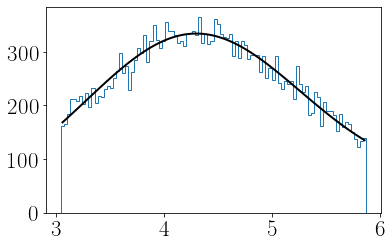

5 [4.26761081e+00 9.90566907e-01 2.70345627e-03 1.21403331e-02] 0.016245674761776185
4.267610806259577 1.2959100863112738 4.275721175071708
[5.606202139328935, 1.0449269769635092, 0, 0]


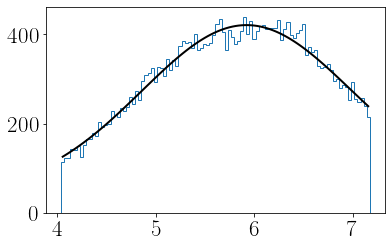

7.5 [5.91593739e+00 1.05978729e+00 3.87414538e-02 1.96158973e-03] 0.5457836391204282
5.915937393660118 2.736575522486145 6.032161755184046
[8.352153949504071, 0.8996965740010571, 0, 0]


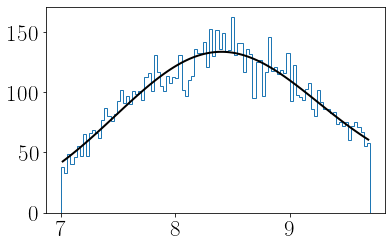

10 [ 8.36302207  0.88714335 -0.14715817  0.02330681] 0.08446760261024544
8.363022073653346 5.701592033168432 7.921547572793678
[10.264115000402528, 0.7628883867620703, 0, 0]


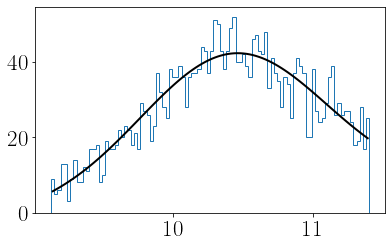

12.5 [10.43004789  0.67085913 -0.38916723  0.04207642] 0.2061923906788692
10.430047890158212 8.417470499845553 9.262546208946793


In [56]:
EthetaEdges = [5, 7.5, 10, 12.5, 15]
EthetaArray = []
coneAngleMinArray = []
coneAngleMaxArray = []
for i in range(len(EthetaEdges)-1):
    EthetaMin = EthetaEdges[i]
    EthetaMax = EthetaEdges[i+1]
    var = CR.loc[(CR.Etheta>EthetaMin)&(CR.Etheta<EthetaMax), "coneAngle"]
    hist, bins = np.histogram(var, bins = 100)
    mu = bins[np.argmax(hist)]
    sigma = var.std()
    
    bins = np.linspace(mu-1.5*sigma, mu+1.5*sigma, 101)
    if i >3:
        bins = np.linspace(mu-sigma, mu+sigma, 101)

    
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist, bins = np.histogram(var, bins = bins)
    dist = hist/np.sum(hist)/np.diff(bins)[0]
    unchist = np.sqrt(hist)
    uncdist = unchist/np.sum(hist)/np.diff(bins)[0]
    params = [mu, sigma, 0, 0]
    print(params)
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, dist))
    plt.hist(var, bins = bins, histtype = 'step')
    
    plt.plot(bincenters, normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0], 'k-', lw=2, label='frozen pdf')
    plt.show()
    chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    print(EthetaMin, res_lsq.x ,pvalue)
    print(res_lsq.x[0], res_lsq.x[0]-3*res_lsq.x[1], res_lsq.x[0]+3*res_lsq.x[2])
    EthetaArray.append((EthetaMin + EthetaMax)/2)
    coneAngleMinArray.append(res_lsq.x[0]-3*res_lsq.x[1])
    coneAngleMaxArray.append(res_lsq.x[0]+1.5*res_lsq.x[1])
coneAngleMinArrayCR = coneAngleMinArray
coneAngleMaxArrayCR = coneAngleMaxArray

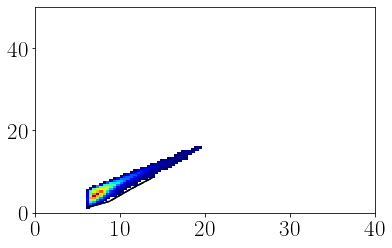

In [58]:
plt.hist2d(CR.Etheta, CR.coneAngle, bins = [np.linspace(0, 40, 101), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1)
plt.plot(EthetaArray, coneAngleMinArrayCR, color = 'k', linestyle = '--')
plt.plot(EthetaArray, coneAngleMinArrayCR, color = 'k')

plt.show()

In [61]:
def lstsq_quadraticfit(args, x, y):
    a, b, c = args
    x = np.array(x)
    y = np.array(y)
    return a*x**2 + b*x + c - y

In [63]:
# res_lsq = least_squares(lstsq_quadraticfit, [0, 20, -10], args=(EthetaArrayFD, coneAngleMinArrayFD))
# params_1 = res_lsq.x
# res_lsq = least_squares(lstsq_quadraticfit, [0, 20, -10], args=(EthetaArrayFD, coneAngleMaxArrayFD))
# params_2 = res_lsq.x

# res_lsq = least_squares(lstsq_quadraticfit, [0, 20, -10], args=(EthetaArray, coneAngleMinArrayCD))
# params_3 = res_lsq.x
# res_lsq = least_squares(lstsq_quadraticfit, [0, 20, -10], args=(EthetaArray, coneAngleMaxArrayCD))
# params_4 = res_lsq.x

# res_lsq = least_squares(lstsq_quadraticfit, [0, 20, -10], args=(EthetaArray, coneAngleMinArrayCDFT))
# params_5 = res_lsq.x
# res_lsq = least_squares(lstsq_quadraticfit, [0, 20, -10], args=(EthetaArray, coneAngleMaxArrayCDFT))
# params_6 = res_lsq.x

res_lsq = least_squares(lstsq_quadraticfit, [0, 20, -10], args=(EthetaArray, coneAngleMinArrayCR))
params_7 = res_lsq.x
res_lsq = least_squares(lstsq_quadraticfit, [0, 20, -10], args=(EthetaArray, coneAngleMaxArrayCR))
params_8 = res_lsq.x

In [64]:
print(params_7, params_8)

[ 0.05100852 -0.04698251 -0.49164402] [-3.82306864e-04  7.77115938e-01  8.67346371e-01]


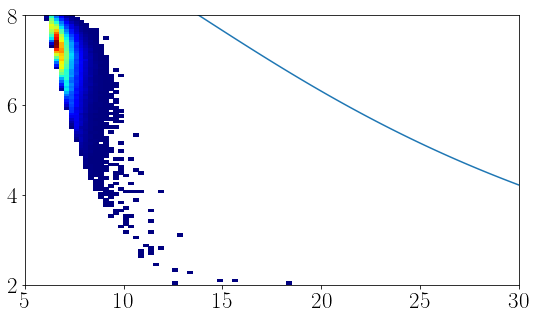

In [81]:
fig, axs = plt.subplots(1, 1, figsize = (8, 5))

axs.hist2d((epgExpOutb.loc[epgExpOutb.Esector == epgExpOutb.Gsector, "Etheta"]), (epgExpOutb.loc[epgExpOutb.Esector == epgExpOutb.Gsector,"Ee"]), cmin = 1, cmap = cmap, bins = [np.linspace(5, 30, 101), np.linspace(2, 8, 101)])
x = np.linspace(5, 30, 101)
plt.plot(x, 10.604*M/(M+10.604*(1-np.cos(np.radians(x)))))

# axs.set_xlabel(r"$\phi$" + " ["+degree+"]")
plt.savefig("samesectorElast.pdf")

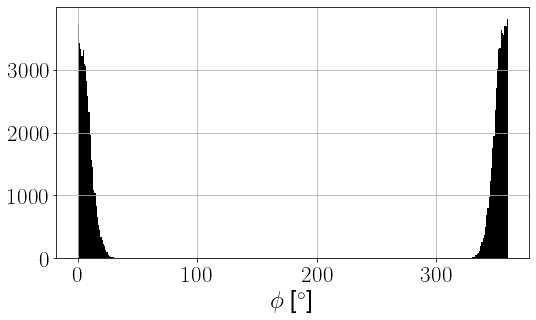

In [168]:
fig, axs = plt.subplots(1, 1, figsize = (8, 5))
(epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "phi1"]).hist( bins = np.linspace(0, 360, 361), ax = axs, color ='k')
axs.set_xlabel(r"$\phi$" + " ["+degree+"]")
# plt.savefig("samesectors.pdf")
plt.show()

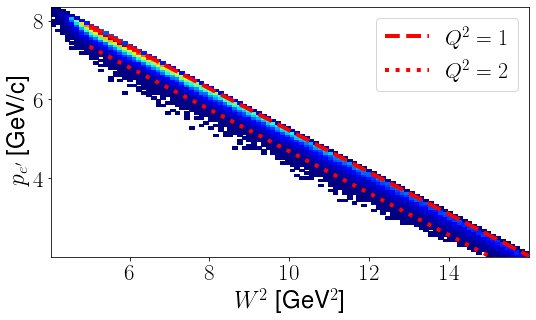

In [224]:
fig, axs = plt.subplots(1, 1, figsize = (8, 5))

upperlimCR = epgExpOutbCDFT.coneAngle< np.poly1d([-0.000382, 0.777, 0.867])(epgExpOutbCDFT.Etheta)
lowerlimCR = epgExpOutbCDFT.coneAngle> np.poly1d([0.0510, -0.0470, -0.492])(epgExpOutbCDFT.Etheta)
CRcond = upperlimCR & lowerlimCR
plt.hist2d((epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "W"])**2, (epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Ee"]), cmin = 1, cmap = cmap, bins = 100)

plt.xlabel(r"$W^2$"+ " ["+GeV2+"]")
plt.ylabel(r"$p_{e'}$"+ " ["+GeVc+"]")
# plt.hist2d(epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Ee"], (epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "Etheta"]), cmin = 1, cmap = cmap, bins = [np.linspace(2, 8, 101), np.linspace(5, 30, 101) ])

x = np.linspace(5, 30, 101)
plt.plot(x, (x + 1 - M**2 - 2*M*10.604)/(-2)/M, color = 'r', linestyle = '--', linewidth = 4, label = r"$Q^2=1$")
plt.plot(x, (x + 2- M**2 - 2*M*10.604)/(-2)/M, color = 'r', linestyle = ':', linewidth = 4, label = r"$Q^2=2$")
plt.legend(loc = 'upper right')
plt.show()

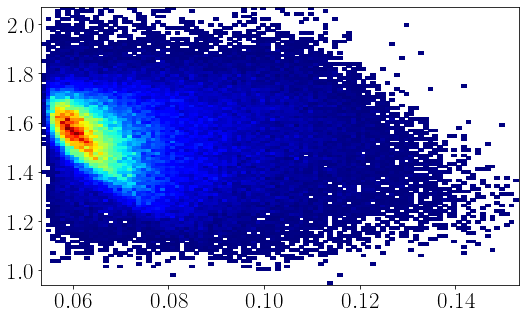

In [199]:
fig, axs = plt.subplots(1, 1, figsize = (8, 5))

upperlimCR = epgExpOutbCDFT.coneAngle< np.poly1d([-0.000382, 0.777, 0.867])(epgExpOutbCDFT.Etheta)
lowerlimCR = epgExpOutbCDFT.coneAngle> np.poly1d([0.0510, -0.0470, -0.492])(epgExpOutbCDFT.Etheta)
CRcond = upperlimCR & lowerlimCR
plt.hist2d(np.tan(np.radians(epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "Etheta"])/2), np.tan(np.radians((epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Ptheta"]))), cmin = 1, cmap = cmap, bins = 100)

# plt.xlabel(r"$W^2$"+ " ["+GeV2+"]")
# plt.ylabel("Ee"+ " ["+GeVc+"]")
# plt.hist2d(epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Ee"], (epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "Etheta"]), cmin = 1, cmap = cmap, bins = [np.linspace(2, 8, 101), np.linspace(5, 30, 101) ])

# x = np.linspace(5, 30, 101)
# plt.plot(x, (x + 1 - M**2 - 2*M*10.604)/(-2)/M, color = 'r', linestyle = '--', linewidth = 4, label = r"$Q^2=1$")
# plt.plot(x, (x + 2- M**2 - 2*M*10.604)/(-2)/M, color = 'r', linestyle = ':', linewidth = 4, label = r"$Q^2=2$")
# plt.legend(loc = 'upper right')
plt.show()

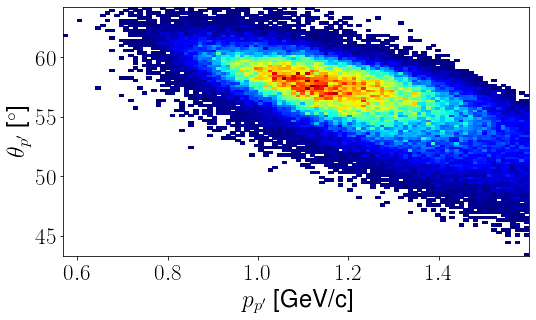

In [173]:
fig, axs = plt.subplots(1, 1, figsize = (8, 5))

upperlimCR = epgExpOutbCDFT.coneAngle< np.poly1d([-0.000382, 0.777, 0.867])(epgExpOutbCDFT.Etheta)
lowerlimCR = epgExpOutbCDFT.coneAngle> np.poly1d([0.0510, -0.0470, -0.492])(epgExpOutbCDFT.Etheta)
CRcond = upperlimCR & lowerlimCR
plt.hist2d((epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "Pp"]), (epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Ptheta"]), cmin = 1, cmap = cmap, bins = 100)

plt.xlabel(r"$p_{p'}$"+ " ["+GeVc+"]")
plt.ylabel(r"$\theta_{p'}$"+ " ["+degree+"]")
# plt.hist2d(epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Ee"], (epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "Etheta"]), cmin = 1, cmap = cmap, bins = [np.linspace(2, 8, 101), np.linspace(5, 30, 101) ])

# x = np.linspace(5, 30, 101)
# plt.plot(x, (x + 1 - M**2 - 2*M*10.604)/(-2)/M, color = 'r', linestyle = '--', linewidth = 4, label = r"$Q^2=1$")
# plt.plot(x, (x + 2- M**2 - 2*M*10.604)/(-2)/M, color = 'r', linestyle = ':', linewidth = 4, label = r"$Q^2=2$")
# plt.legend(loc = 'upper right')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 1, figsize = (8, 5))

upperlimCR = epgExpOutbCDFT.coneAngle< np.poly1d([-0.000382, 0.777, 0.867])(epgExpOutbCDFT.Etheta)
lowerlimCR = epgExpOutbCDFT.coneAngle> np.poly1d([0.0510, -0.0470, -0.492])(epgExpOutbCDFT.Etheta)
CRcond = upperlimCR & lowerlimCR
plt.hist2d((epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "W"])**2, (epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Ee"]), cmin = 1, cmap = cmap, bins = 100)

plt.xlabel("Ptheta"+ " ["+GeV+"]")
plt.ylabel("Ee"+ " ["+GeVc+"]")
# plt.hist2d(epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Ee"], (epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "Etheta"]), cmin = 1, cmap = cmap, bins = [np.linspace(2, 8, 101), np.linspace(5, 30, 101) ])

x = np.linspace(5, 30, 101)
plt.plot(x, (x + 1 - M**2 - 2*M*10.604)/(-2)/M, color = 'r', linestyle = '--', linewidth = 4, label = r"$Q^2=1$")
plt.plot(x, (x + 2- M**2 - 2*M*10.604)/(-2)/M, color = 'r', linestyle = ':', linewidth = 4, label = r"$Q^2=2$")
plt.legend(loc = 'upper right')
plt.show()

<AxesSubplot:>

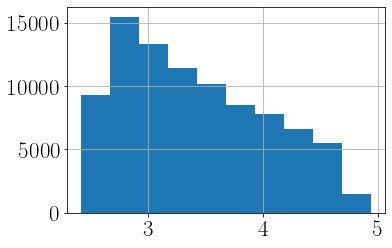

In [137]:
epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "Gtheta"].hist()

In [210]:
df_epg = copy(epgExpOutbCDFT.loc[upperlimCR& lowerlimCR])
# df_epg = copy(epgExp)
VGS = [-df_epg['Gpx']-df_epg['Epx'], -df_epg['Gpy']-df_epg['Epy'], pbeam -df_epg['Gpz']- df_epg['Epz']]
ebeameff1 = mag([-df_epg['Gpx'], -df_epg['Gpy'], pbeam -df_epg['Gpz']])
W = np.sqrt(np.maximum(0, (ebeameff + M - df_epg['Ee'])**2 - mag2(VGS)))
phidiff = df_epg.Ephi - df_epg.Pphi

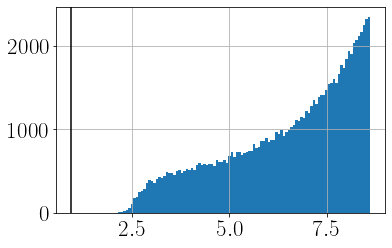

In [211]:
ebeameff1.hist(bins = 101)
plt.axvline(M, color = 'k')

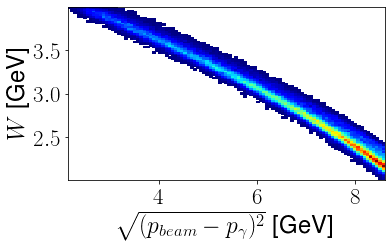

In [220]:
plt.hist2d(ebeameff1, df_epg.W, cmap = cmap, cmin = 1, bins = 101)
plt.ylabel(r"$W$"+ " ["+GeV+"]")
plt.xlabel(r"$\sqrt{(p_{beam}-p_{\gamma})^2}$"+ " ["+GeV+"]")


plt.show()

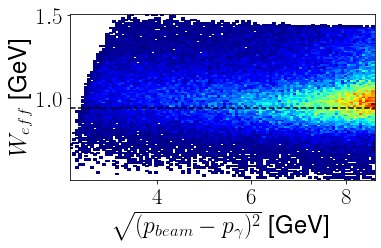

In [223]:
plt.hist2d(ebeameff1, W, cmap = cmap, cmin = 1, bins = 101)
plt.axhline(M, color = 'k', linestyle = '--')

plt.ylabel(r"$W_{eff}$"+ " ["+GeV+"]")
plt.xlabel(r"$\sqrt{(p_{beam}-p_{\gamma})^2}$"+ " ["+GeV+"]")

plt.show()

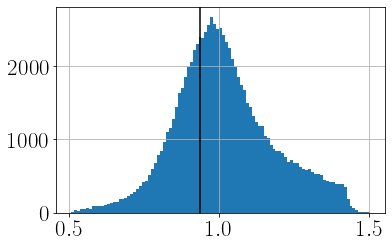

In [212]:
W.hist(bins = 101)
plt.axvline(M, color = 'k')

In [116]:
epgExpOutbCDFT.Epz + epgExpOutbCDFT.Ppz

26        3.342516
43        4.771914
59        3.989775
63        5.980968
83        8.488469
            ...   
744150    5.757924
744152    3.679319
744167    2.985487
744183    3.015370
744212    2.331983
Length: 756169, dtype: float64

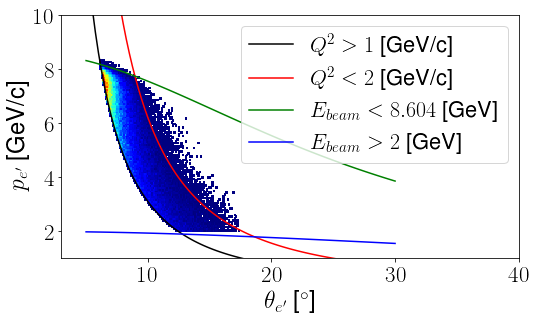

In [156]:
fig, axs = plt.subplots(1, 1, figsize = (8, 5))


upperlimCR = epgExpOutbCDFT.coneAngle< np.poly1d([-0.000382, 0.777, 0.867])(epgExpOutbCDFT.Etheta)
lowerlimCR = epgExpOutbCDFT.coneAngle> np.poly1d([0.0510, -0.0470, -0.492])(epgExpOutbCDFT.Etheta)
CRcond = upperlimCR & lowerlimCR
plt.hist2d((epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "Etheta"]), (epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Ee"]), cmin = 1, cmap = cmap, bins = 100)

# plt.xlabel("W"+ " ["+GeV+"]")
# plt.ylabel("Ee"+ " ["+GeVc+"]")
# plt.hist2d(epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Ee"], (epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "Etheta"]), cmin = 1, cmap = cmap, bins = [np.linspace(2, 8, 101), np.linspace(5, 30, 101) ])

x = np.linspace(5, 30, 101)
plt.plot(x, .5/10.604/(1-np.cos(np.radians(x))), color = 'k', label = r"$Q^2>1$"+" ["+GeVc+"]")
plt.plot(x, 1/10.604/(1-np.cos(np.radians(x))), color = 'r', label = r"$Q^2<2$"+" ["+GeVc+"]")
plt.plot(x, 8.604*M/(M+8.604*(1-np.cos(np.radians(x)))), color = 'g', label = r"$E_{beam}<8.604$"+" ["+GeV+"]")
plt.plot(x, 2*M/(M+2*(1-np.cos(np.radians(x)))), color = 'b', label = r"$E_{beam}>2$"+" ["+GeV+"]")

plt.legend(loc = 'upper right')
plt.ylim([1, 10])
plt.xlim([3, 40])
plt.xlabel(r"$\theta_{e'}$"+" ["+degree+"]")
plt.ylabel(r"$p_{e'}$"+" ["+GeVc+"]")

plt.show()

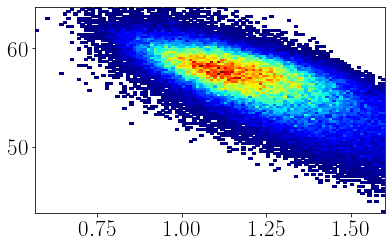

In [113]:
upperlimCR = epgExpOutbCDFT.coneAngle< np.poly1d([-0.000382, 0.777, 0.867])(epgExpOutbCDFT.Etheta)
lowerlimCR = epgExpOutbCDFT.coneAngle> np.poly1d([0.0510, -0.0470, -0.492])(epgExpOutbCDFT.Etheta)
CRcond = upperlimCR & lowerlimCR
plt.hist2d((epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "Pp"]), (epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Ptheta"]), cmin = 1, cmap = cmap, bins = 100)

# plt.xlabel("W"+ " ["+GeV+"]")
# plt.ylabel("Ee"+ " ["+GeVc+"]")
# plt.hist2d(epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Ee"], (epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "Etheta"]), cmin = 1, cmap = cmap, bins = [np.linspace(2, 8, 101), np.linspace(5, 30, 101) ])

# x = np.linspace(5, 30, 101)
# plt.plot(x, .5/10.604/(1-np.cos(np.radians(x))))
plt.show()

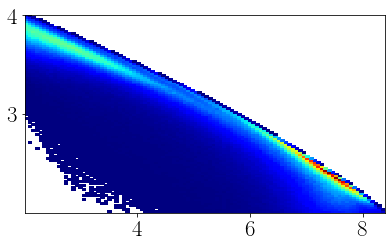

In [104]:
upperlimCR = epgExpOutbCDFT.coneAngle< np.poly1d([-0.000382, 0.777, 0.867])(epgExpOutbCDFT.Etheta)
lowerlimCR = epgExpOutbCDFT.coneAngle> np.poly1d([0.0510, -0.0470, -0.492])(epgExpOutbCDFT.Etheta)
CRcond = upperlimCR & lowerlimCR
# plt.hist2d((epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "Ee"]), (epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"W"]), cmin = 1, cmap = cmap, bins = 100)
plt.hist2d(epgExp.Ee, epgExp.W, cmin = 1, cmap = cmap, bins = 100)

# plt.hist2d(epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Ee"], (epgExpOutbCDFT.loc[upperlimCR& lowerlimCR, "Etheta"]), cmin = 1, cmap = cmap, bins = [np.linspace(2, 8, 101), np.linspace(5, 30, 101) ])

# x = np.linspace(5, 30, 101)
# plt.plot(x, .5/10.604/(1-np.cos(np.radians(x))))
plt.show()

<AxesSubplot:>

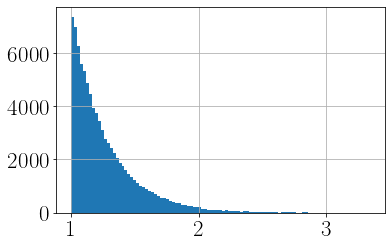

In [93]:
 epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Q2"].hist(bins = 101)

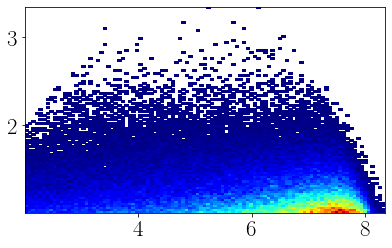

In [89]:
plt.hist2d(epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Ee"], epgExpOutbCDFT.loc[upperlimCR& lowerlimCR,"Q2"] , cmin =1, cmap = cmap, bins = 101)
plt.show()

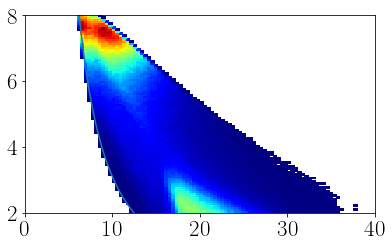

In [102]:
# plt.hist2d((epgExp.loc[epgExp.coneAngle>20, "Ee"]), (epgExp.loc[epgExp.coneAngle>20, "Etheta"]), cmin = 1, cmap = cmap, bins = [np.linspace(2, 8, 101), np.linspace(0, 40, 101)])
plt.hist2d((epgExp.loc[epgExp.coneAngle>20, "Etheta"]), (epgExp.loc[epgExp.coneAngle>20, "Ee"]), cmin = 1, cmap = cmap, bins = [np.linspace(0, 40, 101),np.linspace(2, 8, 101)])
# x = np.linspace(5, 30, 101)
# plt.plot(x, 10.604*M/(M+10.604*(1-np.cos(np.radians(x)))))
x = np.linspace(5, 30, 101)
plt.plot(x, .5/10.604/(1-np.cos(np.radians(x))))

plt.show()

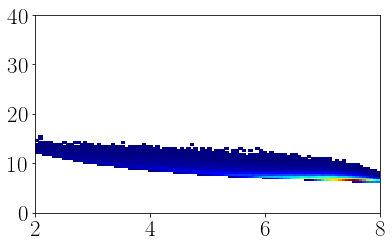

In [100]:
plt.hist2d((epgExp.loc[epgExp.coneAngle<10, "Ee"]), (epgExp.loc[epgExp.coneAngle<10, "Etheta"]), cmin = 1, cmap = cmap, bins = [np.linspace(2, 8, 101), np.linspace(0, 40, 101)])
# x = np.linspace(5, 30, 101)
# plt.plot(x, 10.604*M/(M+10.604*(1-np.cos(np.radians(x)))))

plt.show()

<AxesSubplot:>

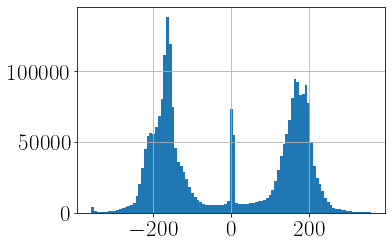

In [60]:
(epgExp.loc[:, "Ephi"]- epgExp.loc[:, "Gphi"]).hist(bins = 101)

<AxesSubplot:>

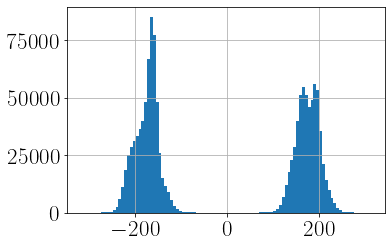

In [195]:
(epgExp.loc[epgExp.coneAngle>20, "Ephi"]- epgExp.loc[epgExp.coneAngle>20, "Gphi"]).hist(bins = 101)

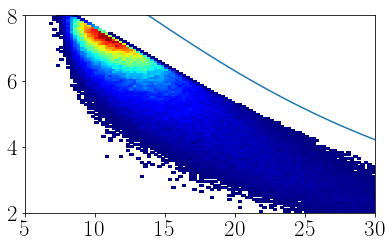

In [166]:
plt.hist2d((epgExpInbFD.loc[:, "Etheta"]), (epgExpInbFD.loc[:, "Ee"]), cmin = 1, cmap = cmap, bins = [np.linspace(5, 30, 101), np.linspace(2, 8, 101)])
x = np.linspace(5, 30, 101)
plt.plot(x, 10.604*M/(M+10.604*(1-np.cos(np.radians(x))) ) )

plt.show()

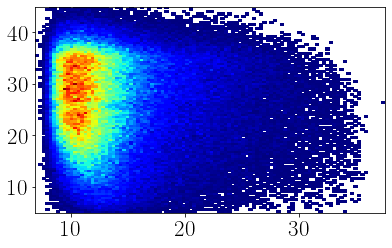

In [169]:
plt.hist2d((epgExpInbFD.loc[:, "Etheta"]), (epgExpInbFD.loc[:, "Ptheta"]), cmin = 1, cmap = cmap, bins = 100)
# x = np.linspace(5, 30, 101)
# plt.plot(x, 10.604*M/(M+10.604*(1-np.cos(np.radians(x))) ) )

plt.show()

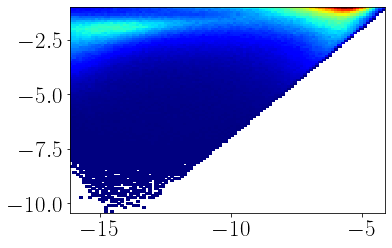

In [161]:
plt.hist2d(-2*M*(10.604-epgExp.Ee), -2*10.604*epgExp.Ee*(1-np.cos(np.radians(epgExp.Etheta))), cmin = 1, cmap = cmap, bins = 100)#[np.linspace(5, 30, 101), np.linspace(2, 8, 101)])
# x = np.linspace(5, 30, 101)
# plt.plot(x, 10.604*M/(M+10.604*(1-np.cos(np.radians(x)))) )

plt.show()

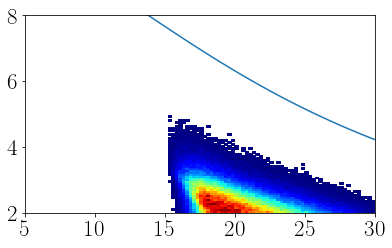

In [152]:
plt.hist2d((dvcsSimOutbCDFT.loc[dvcsSimOutbCDFT.coneAngle>20, "Etheta"]), (dvcsSimOutbCDFT.loc[dvcsSimOutbCDFT.coneAngle>20, "Ep"]), cmin = 1, cmap = cmap, bins = [np.linspace(5, 30, 101), np.linspace(2, 8, 101)])

x = np.linspace(5, 30, 101)
plt.plot(x, 10.604*M/(M+10.604*(1-np.cos(np.radians(x)))))

plt.show()

In [9]:
len(epgExpInbCDFT), len(epgExpInbCD), len(epgExpInbFD)

(368045, 203624, 189003)

In [41]:
contInbCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
contInbFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contInbCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)
contInb = len(pi0ExpInb)*len(bkgSimInb)/len(pi0SimInb)/len(epgExpInb)

coneAngle 34.43794144616073
reconGam 1.785712253099743
coplanarity 13.684912188053387
ME_epg 0.3892604952651132
MM2_epg 0.0017940045220108485
MM2_eg 1.3227633642404582
MM2_ep 0.14679819445414438
MPt 0.1555117360930791


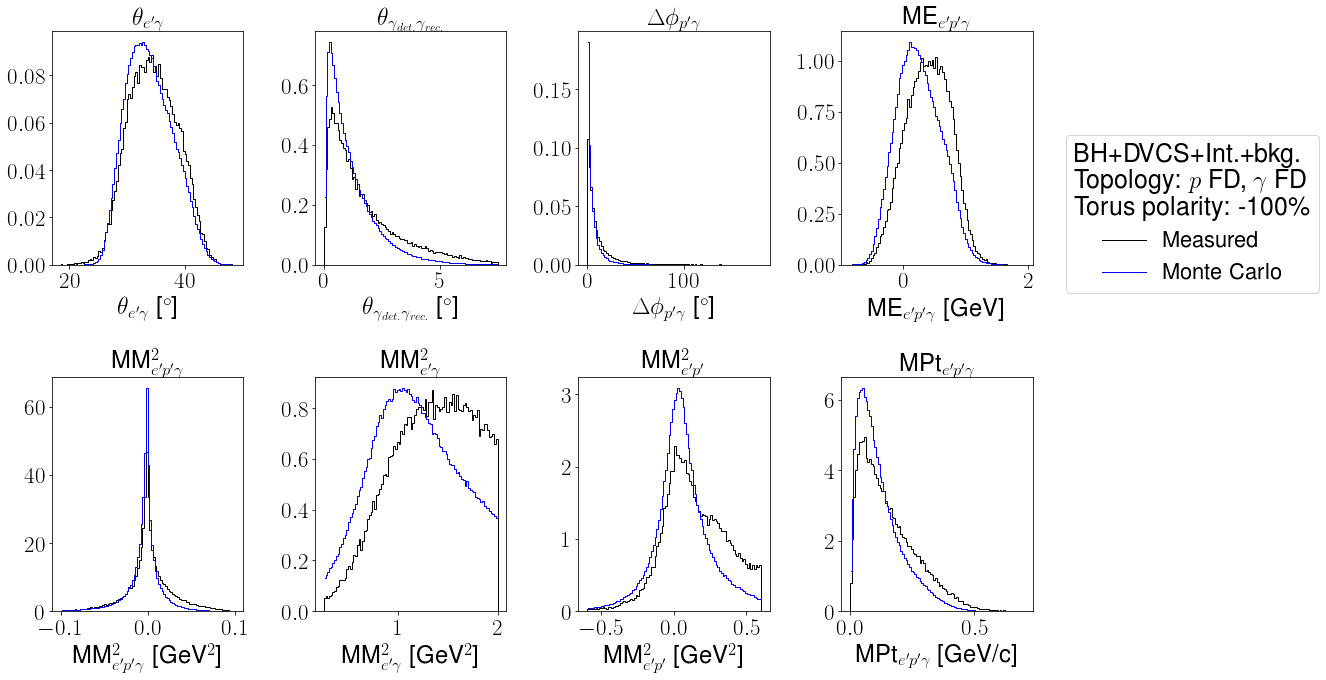

<Figure size 432x288 with 0 Axes>

In [24]:
# contInbFD = 0.4

df2 = bkgSimInbFD#smearingDVCS4(bkgSimInbFD, 0, 0.14, 0)
df1 = dvcsSimInbFD#smearingDVCS4(dvcsSimInbFD, 0, 0.14, 0)

varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))

for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(df1[varstoplot[ind]], bins, density = True)
        simDist = (1-contInbFD)*simDist_dvcs + contInbFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins))
        axs[yind, xind].set_title(title[ind])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

coneAngle 23.065686007497614
reconGam 1.0718463116434715
coplanarity 5.747530565403102
ME_epg 0.20392527225756094
MM2_epg -0.005187633436847005
MM2_eg 1.1715926150349714
MM2_ep 0.04124183334978869
MPt 0.08709238827741891


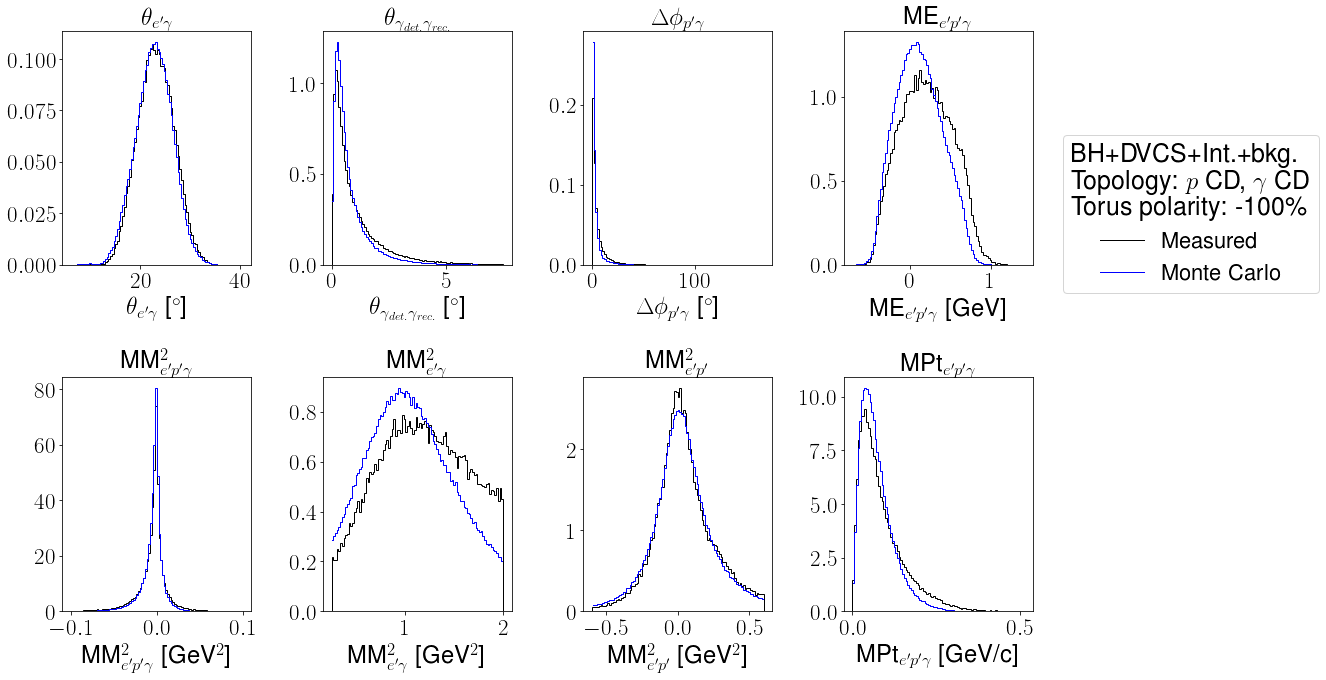

<Figure size 432x288 with 0 Axes>

In [25]:
df2 = bkgSimInbCD#smearingDVCS4(bkgSimInbCD, 0, 0.14, 0)
df1 = dvcsSimInbCD#smearingDVCS4(dvcsSimInbCD, 0, 0.14, 0)

varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))

for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(df1[varstoplot[ind]], bins, density = True)
        simDist = (1-contInbCD)*simDist_dvcs + contInbCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
        axs[yind, xind].set_title(title[ind])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" CD\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

coneAngle 18.278288713774852
reconGam 0.5529191875718732
coplanarity 3.1214609915958897
ME_epg 0.08427591238449239
MM2_epg -0.0044492321118432465
MM2_eg 1.0427257276385749
MM2_ep 0.02930322578588248
MPt 0.06015017445022894


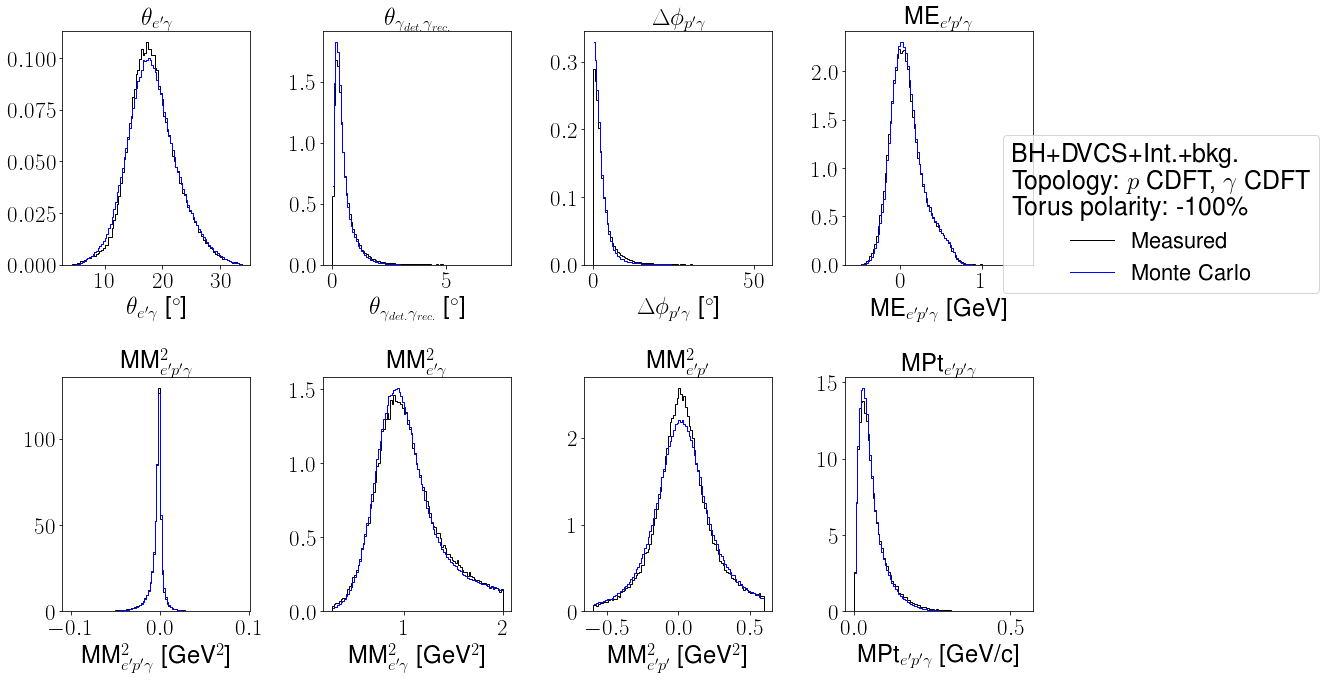

<Figure size 432x288 with 0 Axes>

In [26]:
df2 = bkgSimInbCDFT#smearingDVCS4(bkgSimInbCDFT, 0, 0.14, 0)
df1 = dvcsSimInbCDFT#smearingDVCS4(dvcsSimInbCDFT, 0, 0.14, 0)

varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))

for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(df1[varstoplot[ind]], bins, density = True)
        simDist = (1-contInbCDFT)*simDist_dvcs + contInbCDFT*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCDFT[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
        axs[yind, xind].set_title(title[ind])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CDFT, "+r"$\gamma$"+" CDFT\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

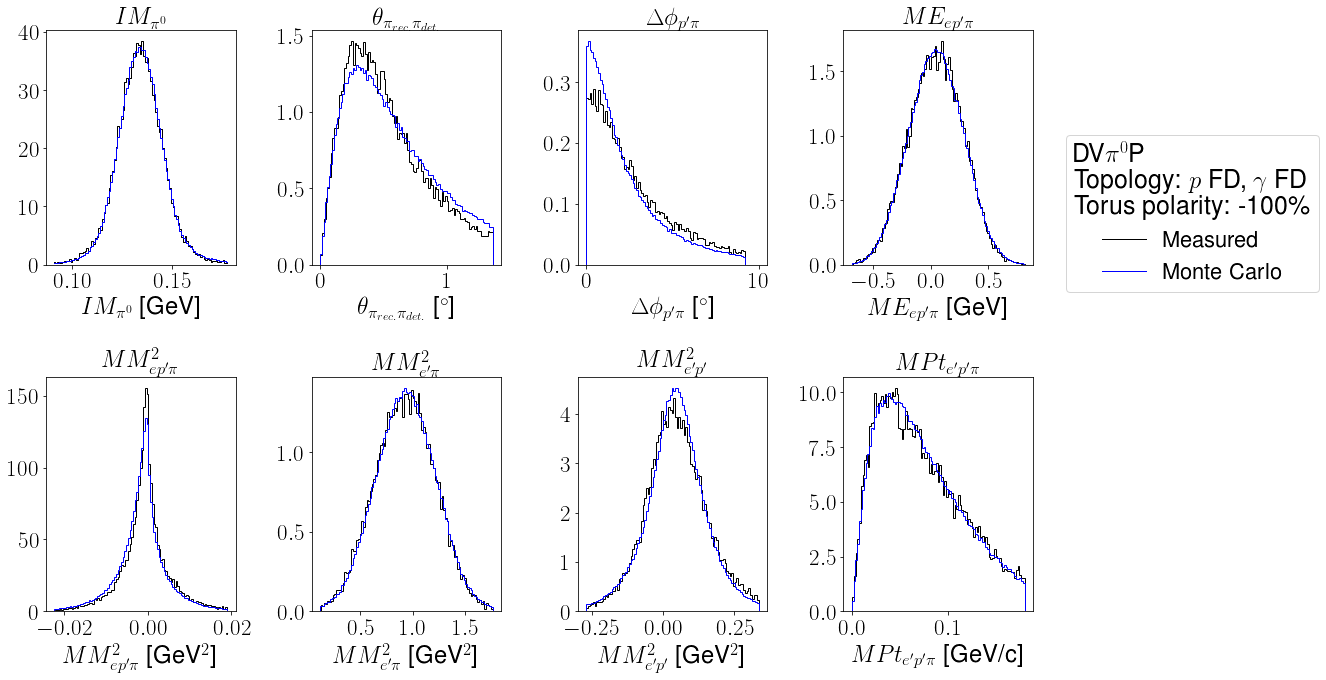

In [27]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 101#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimInbFD[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpInbFD[varstoplot[ind]], bins, density=True)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()

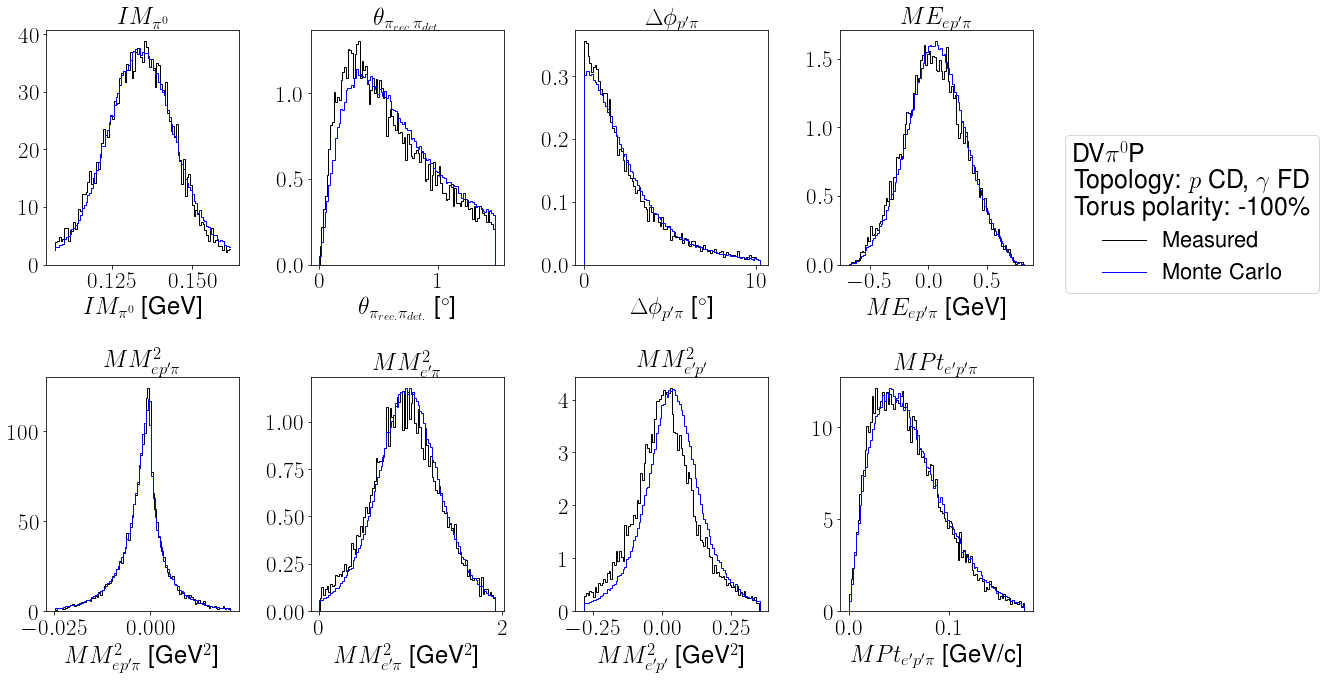

In [42]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimInbCD[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpInbCD[varstoplot[ind]], bins, density=True)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()

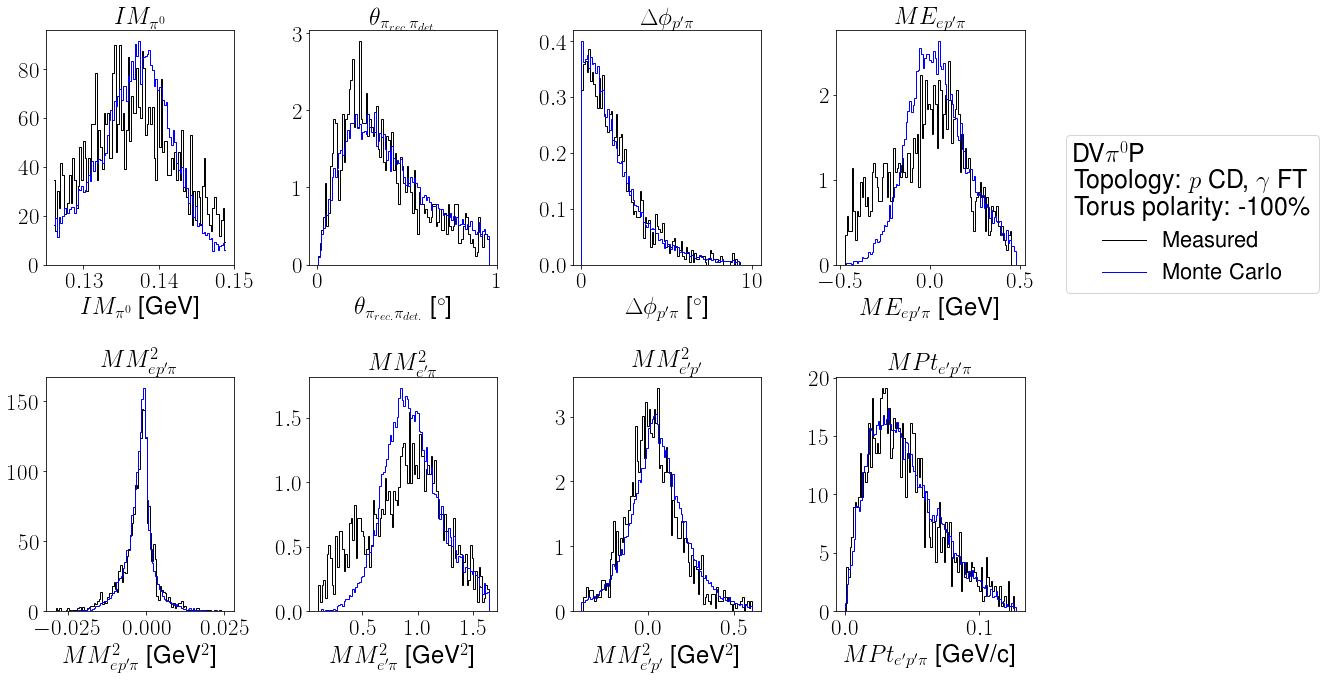

In [43]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimInbCDFT[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpInbCDFT[varstoplot[ind]], bins, density=True)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FT\n"+"Torus polarity: -100\%")
plt.show()

In [47]:
pi0ExpInbFD.Ge2.min()

0.053774996723713

In [51]:
len(pi0ExpInbFD), len(pi0ExpInbCD), len(pi0ExpInbCDFT)

(24988, 15403, 1891)

In [52]:
len(epgExpInbFD), len(epgExpInbCD), len(epgExpInbCDFT)

(61775, 68196, 120708)

In [53]:
len(dvcsSimInbFD), len(dvcsSimInbCD), len(dvcsSimInbCDFT)

(222926, 338093, 584027)

In [55]:
contInbFD, contInbCD, contInbCDFT

(0.43697162336028716, 0.25373158674502994, 0.013734783176430334)

In [56]:
len(epgExpInbFD)*(1-contInbFD), len(epgExpInbCD)*(1-contInbCD), len(epgExpInbCDFT)*(1-contInbCDFT)

(34781.07796691826, 50892.520710335935, 119050.10179233945)

In [58]:
np.array([34781.07796691826, 50892.520710335935, 119050.10179233945])/np.array([222926, 338093, 584027])


array([0.15602073, 0.15052817, 0.20384349])

In [14]:
pi0Exp = pd.concat([pi0ExpInb, pi0ExpOutb])

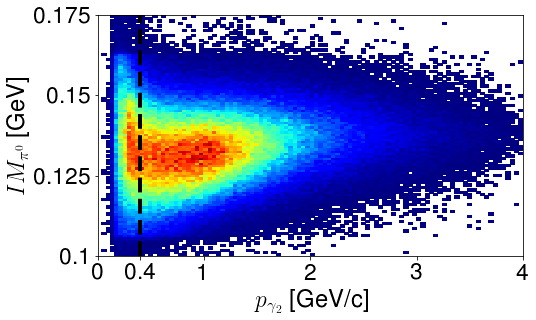

In [15]:
fig, axs = plt.subplots(1, 1, figsize = (8, 5))


axs.hist2d(pi0Exp.Ge2, pi0Exp.Mpi0, bins = [np.linspace(0, 4, 101), np.linspace(0.1, 0.175, 101)], cmap = cmap, cmin = 1)
axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
axs.set_xlim([0, 4])
axs.set_xticks([0, 0.4, 1, 2, 3, 4])
axs.set_xticklabels([0, 0.4, 1, 2, 3, 4])
axs.set_yticks([0.1 , 0.125, 0.15, 0.175])
axs.set_yticklabels([0.1 , 0.125, 0.15, 0.175])
# plt.hist(dvcsSample.Enphe, bins = np.linspace(0, 50, 51), density = True, histtype = 'step')
# plt.legend()
axs.set_xlabel(r"$p_{\gamma_2}$"+ " ["+GeVc+"]")
axs.set_ylabel(r"$IM_{\pi^0}$"+ " ["+GeV+"]")
plt.savefig("mpi0_threshold.pdf")
plt.show()

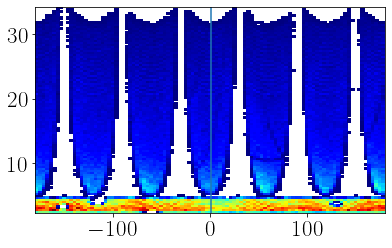

In [7]:
plt.hist2d(epgExpInb.Gphi, epgExpInb.Gtheta, bins = 101, cmap = cmap, cmin = 1)
plt.axvline(0.4)
plt.show()

<AxesSubplot:>

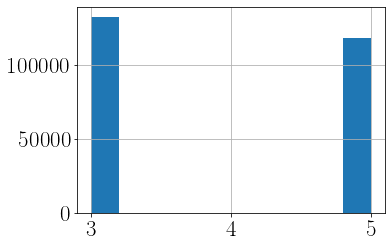

In [9]:
epgExpInb.TriggerBit.hist()

In [10]:
dvcsSample = pd.read_pickle("/Volumes/Extreme SSD/Feb2022/FidCuts/precuts/convPkl/inb/dvcs/3987.pkl")
expSample = pd.read_pickle("/Volumes/Extreme SSD/Feb2022/FidCuts/precuts/convPkl/inb/exp/dvcs.pkl")
dvcsSampleOutb = pd.read_pickle("/Volumes/Extreme SSD/Feb2022/FidCuts/precuts/convPkl/outb/dvcs/4240.pkl")
expSampleOutb = pd.read_pickle("/Volumes/Extreme SSD/Feb2022/FidCuts/precuts/convPkl/outb/exp/dvcs.pkl")


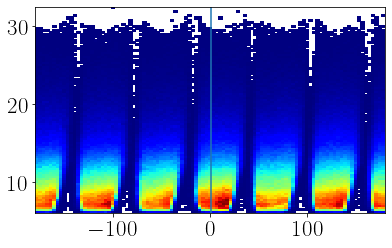

In [119]:
plt.hist2d(expSampleOutb.Ephi, expSampleOutb.Etheta, bins = 101, cmap = cmap, cmin = 1)
plt.axvline(0.4)
plt.show()

In [31]:
pi0ExpInb.Esector

25         2
182        2
248        1
471        1
561        2
          ..
1046823    2
1047002    1
1047020    1
1047133    1
1047252    1
Name: Esector, Length: 42282, dtype: int32

<AxesSubplot:>

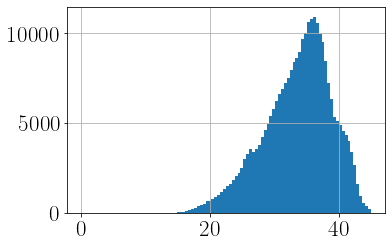

In [111]:
dvcsSimOutbFD.Ptheta.hist(bins = np.linspace(0, 45, 101))

<AxesSubplot:>

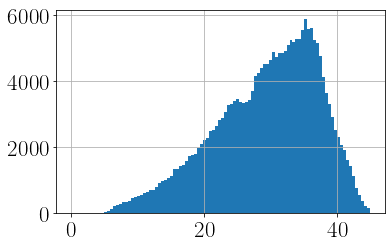

In [112]:
dvcsSimInbFD.Ptheta.hist(bins = np.linspace(0, 45, 101))

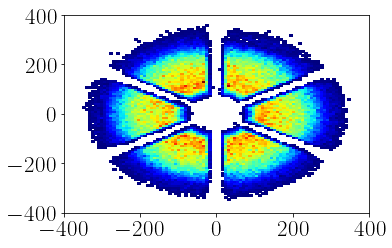

In [120]:
plt.hist2d(expSampleOutb.PDc3Hitx, expSampleOutb.PDc3Hity, bins = np.linspace(-400, 400, 100), cmin =1 , cmap = cmap)
plt.show()

<AxesSubplot:>

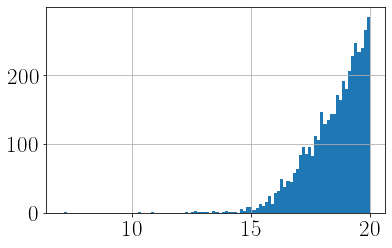

In [123]:
epgExpOutbFD.Ptheta.hist(bins= np.linspace(7, 20, 101))

<AxesSubplot:>

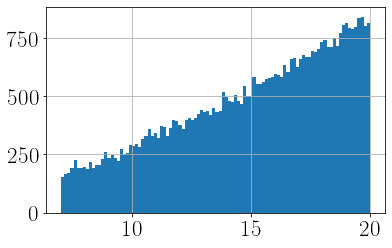

In [124]:
epgExpInbFD.Ptheta.hist(bins= np.linspace(7, 20, 101))

In [125]:
epgExpInbFD.RunNum

22        5181
33        5181
39        5181
98        5181
104       5181
          ... 
763006    5306
763012    5306
763036    5306
763089    5306
763090    5306
Name: RunNum, Length: 192680, dtype: int64

<AxesSubplot:>

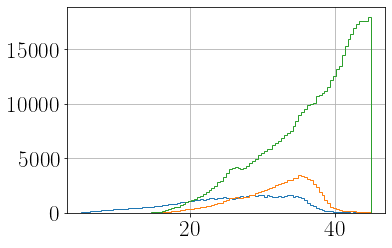

In [140]:
pi0ExpInbFD.Ptheta.hist(bins = np.linspace(5, 45, 101), histtype = 'step')
pi0ExpOutbFD.Ptheta.hist(bins = np.linspace(5, 45, 101), histtype = 'step')
expSampleOutb.Ptheta.hist(bins = np.linspace(5, 45, 101), histtype = 'step')

In [132]:
pi0ExpOutbFD.RunNum

32         5591
115        5591
290        5591
314        5591
446        5591
           ... 
1018142    5666
1018538    5666
1018540    5666
1018620    5666
1018732    5666
Name: RunNum, Length: 90416, dtype: int64

In [133]:
len(pi0ExpInbFD)

77952

In [4]:
parent_MC = "/Volumes/Extreme SSD/Jan2022/convPkl/dvcs/"
# parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/epg/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Jan2022/convPkl/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Jan2022/convPkl/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Jan2022/convPkl/exp/"

dvcsSimInb = pd.read_pickle(parent_MC + "3987.pkl")
bkgSimInb = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
# dvcsSimInb = pd.read_pickle(parent_epg + "3987_epg.pkl")
# bkgSimInb = pd.read_pickle(parent_epg + "4076_epg.pkl")

pi0SimInb = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
epgExpInb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpInb = pd.read_pickle(parent_exp + "pi0.pkl")

In [175]:
parent_MC = "/Volumes/Extreme SSD/Jan2022/convPkl_outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Jan2022/convPkl_outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Jan2022/convPkl_outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Jan2022/convPkl_outb/exp/"


dvcsSimOutb = pd.read_pickle(parent_MC + "4240.pkl")
bkgSimOutb = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
pi0SimOutb = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")
epgExpOutb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpOutb = pd.read_pickle(parent_exp + "pi0.pkl")

<AxesSubplot:>

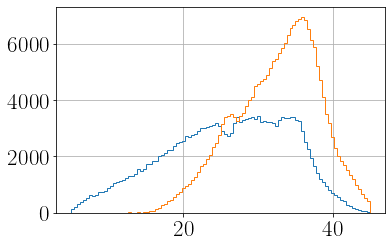

In [178]:
epgExpInbFD.Ptheta.hist(bins = np.linspace(5, 45, 101), histtype = 'step')
epgExpOutbFD.Ptheta.hist(bins = np.linspace(5, 45, 101), histtype = 'step')
# expSampleOutb.Ptheta.hist(bins = np.linspace(5, 45, 101), histtype = 'step')

In [10]:
parent_exp = "/Volumes/Extreme SSD/Mar2022/nominal/convPkl_full/inb/exp/"
epgExpInb = pd.read_pickle(parent_exp + "dvcs.pkl")
parent_exp = "/Volumes/Extreme SSD/Mar2022/nominal/convPkl_full/outb/exp/"
epgExpOutb = pd.read_pickle(parent_exp + "dvcs.pkl")

In [422]:
epgExp = pd.concat([epgExpInb, epgExpOutb])

In [98]:
from scipy import integrate

In [111]:
#decoding
df_global = pd.DataFrame()
for Q2xBtphibin in np.sort(epgExp.Q2xBtphibin.unique()):
    if Q2xBtphibin>-1:
        Q2xBtbin = Q2xBtphibin//len(phibin_i)
        phibin = Q2xBtphibin%len(phibin_i)
        tbin = Q2xBtbin%len(tbin_i)
        Q2xBbin = Q2xBtbin//len(tbin_i)
        t_i = tbin_i[tbin]
        t_f = tbin_f[tbin]
        local = epgExp.loc[epgExp.Q2xBbin == Q2xBbin, :]
        if len(local.Q2bin.unique()) >1:
            print("decoding error.")
            break
        if len(local.xBbin.unique()) >1:
            print("decoding error.")
            break
        xBbin = local.xBbin.unique()
        Q2bin = local.Q2bin.unique()

        Q2_i = Q2bin_i[Q2bin[0]]
        Q2_f = Q2bin_f[Q2bin[0]]
        xB_i = xBbin_i[Q2bin[0]][xBbin[0]]
        xB_f = xBbin_f[Q2bin[0]][xBbin[0]]
        phi_i = phibin_i[phibin]
        phi_f = phibin_f[phibin]

        if xBbin[0] == 0:
            if Q2bin == len(Q2bin_i)-1:
                binVol = integrate.quad(lambda y: (1/(1+(4-M*M)/y) - y/2/M/8.604), Q2_i, Q2_f)[0]*(t_f-t_i)
            else:
                binVol = (xB_f-(xB_i[1]+xB_i[0])/2)*(Q2_f-Q2_i)*(t_f-t_i)
        elif (xBbin[0] == len(xBbin_i[Q2bin[0]])-1):
            binVol = integrate.quad(lambda y: (1/(1+(4-M*M)/y) - xB_i), Q2_i, Q2_f)[0]*(t_f-t_i)
        else:
            binVol = (xB_f-xB_i)*(Q2_f-Q2_i)*(t_f-t_i)

        binVol = binVol*np.radians(phi_f - phi_i)
        df_local = pd.DataFrame()
        df_local.loc[:, "Q2bin"] = Q2bin
        df_local.loc[:, "Q2_i"] = [Q2_i]
        df_local.loc[:, "Q2_f"] = [Q2_f]

        df_local.loc[:, "tbin"] = [tbin]
        df_local.loc[:, "t_i"] = [t_i]
        df_local.loc[:, "t_f"] = [t_f]

        df_local.loc[:, "xBbin"] = xBbin
        if type(xB_i) is list:
            df_local.loc[:, "xB_i"] = xB_i[0]
        else:
            df_local.loc[:, "xB_i"] = [xB_i]
        if type(xB_f) is list:
            df_local.loc[:, "xB_f"] = xB_f[-1]
        else:
            df_local.loc[:, "xB_f"] = [xB_f]

        df_local.loc[:, "phibin"] = [phibin]
        df_local.loc[:, "phi_i"] = [phi_i]
        df_local.loc[:, "phi_f"] = [phi_f]
        df_local.loc[:, "Q2xBbin"] = [Q2xBbin]
        df_local.loc[:, "Q2xBtbin"] = [Q2xBtbin]
        df_local.loc[:, "Q2xBtphibin"] = [Q2xBtphibin]
        df_local.loc[:, "binVol"] = [binVol]
        df_global = pd.concat([df_global, df_local])

df_global.index = np.linspace(0, len(df_global)-1, len(df_global), dtype = int)

In [114]:
df_global.to_pickle("df_global_Mar.pkl")

In [1]:
def gett(Pp, M):
    return 2*M*(np.sqrt(Pp**2+M**2)-M)

In [35]:
epgExpInb.loc[epgExpInb.Q2xBtphibin == 5, :]

Epx       Epy       Epz     Eedep  Esector  TriggerBit  EventNum  \
150690  0.502932  0.132206  1.978692  0.439049        1           3   3510718   
702686 -0.507610 -0.054011  1.970224  0.463009        4          17  86866562   
736508 -0.106687 -0.487545  1.954723  0.495417        5          33  84404974   
233847  0.125549  0.481005  2.010757  0.524977        2           5  39656538   
247371 -0.171409 -0.488845  2.069724  0.488577        5          33  35155854   
499541  0.326823 -0.400748  2.075581  0.458736        6          65  96894618   
521696  0.472704  0.141125  1.945377  0.389851        1           3   8078008   
115773 -0.344540  0.417432  2.241888  0.504570        3    16777225  12921367   
163672 -0.512300 -0.093486  2.161380  0.403414        4          17  70917589   
186270  0.360991 -0.405726  2.355927  0.610358        6          65  27327376   
697721 -0.389223  0.379846  2.270471  0.497958        3           9  80702214   

        RunNum          beamQ  liveTime  ...     tmin2      tcol  Q2bin  \
150690    5196   15264.749023  0.969577  ...  0.007175  0.296141      0   
702686    5220  347357.843750 -1.000000  ...  0.006689  0.284547      0   
736508    5221  338255.062500  0.963606  ...  0.006169  0.271136      0   
233847    5124  164080.906250  0.964656  ...  0.005807  0.268091      0   
247371    5379  133255.953125  0.954545  ...  0.006584  0.292317      0   
499541    5393  368479.750000  0.975098  ...  0.006508  0.291125      0   
521696    5401   31190.371094  0.958000  ...  0.005925  0.264517      0   
115773    5318   54789.367188  0.967117  ...  0.006994  0.319005      0   
163672    5232  280003.250000  0.960936  ...  0.006297  0.294425      0   
186270    5233  109354.117188  0.966007  ...  0.006589  0.319803      0   
697721    5303  338330.031250  0.963306  ...  0.007001  0.321940      0   

        xBbin  tbin  phibin  Q2xBbin  Q2xBtbin  Q2xBtphibin  config  
150690      0     0       5        0         0            5       3  
702686      0     0       5        0         0            5       3  
736508      0     0       5        0         0            5       3  
233847      0     0       5        0         0            5       3  
247371      0     0       5        0         0            5       3  
499541      0     0       5        0         0            5       3  
521696      0     0       5        0         0            5       3  
115773      0     0       5        0         0            5       3  
163672      0     0       5        0         0            5       3  
186270      0     0       5        0         0            5       3  
697721      0     0       5        0         0            5       3  

[11 rows x 75 columns]

In [148]:
sum(epgExpInb.config==1)

55796

In [149]:
sum(epgExpInb.config==2)

72597

In [150]:
sum(epgExpInb.config==3)

208085

In [151]:
sum(epgExpInb.config==4)

1906

In [152]:
sum(epgExpOutb.config==1)

64904

In [153]:
sum(epgExpOutb.config==2)

231507

In [154]:
sum(epgExpOutb.config==3)

236366

In [60]:
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]

epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]

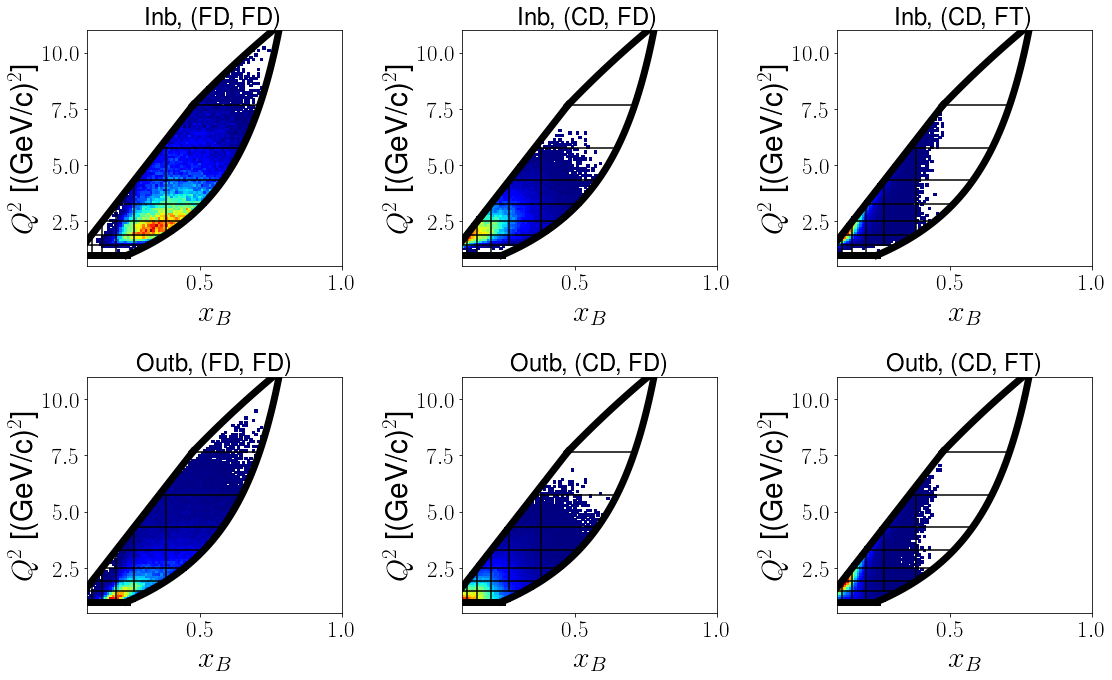

In [71]:
fig, axs = plt.subplots(2, 3, figsize = (16, 10))


axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.01, 1, 101), np.linspace(0.5, 11, 101)], cmap = cmap, cmin = 1)
axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.01, 1, 101), np.linspace(0.5, 11, 101)], cmap = cmap, cmin = 1)
axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.01, 1, 101), np.linspace(0.5, 11, 101)], cmap = cmap, cmin = 1)
axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0.1, 1, 101), np.linspace(0.5, 11, 101)], cmap = cmap, cmin = 1)
axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0.1, 1, 101), np.linspace(0.5, 11, 101)], cmap = cmap, cmin = 1)
axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0.1, 1, 101), np.linspace(0.5, 11, 101)], cmap = cmap, cmin = 1)

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$x_B$")
        axs[xind, yind].set_ylabel(r"$Q^2$" + " [" +GeVc+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
        #CLAS12
        l1 = np.linspace(x1, x3, 101)
        l2 = np.linspace(x1, x2, 101)
        l3 = np.linspace(x3, x4, 101)
        l4 = np.linspace(x2, x4, 101)

        axs[xind, yind].plot(l1, l1*2*M*(10.604-2), color = 'k', linewidth = 7)
        axs[xind, yind].plot(l2, 1+l2*0, color = 'k', linewidth = 7)
        axs[xind, yind].plot(l3, 2*10.604*M*l3/(1+M*l3/10.604/(1-np.cos(np.radians(35)))), color = 'k', linewidth = 7)
        axs[xind, yind].plot(l4, (4 - M*M)*l4/(1 - l4), color = 'k', linewidth = 7)

        axs[xind, yind].plot(np.linspace(c0,c0, 101), np.linspace(y1, y2, 101), color='k')
        axs[xind, yind].plot(np.linspace(c1,c1, 101), np.linspace(y1, np.sqrt(y2*y3), 101), color='k')
        axs[xind, yind].plot(np.linspace(c2,c2, 101), np.linspace(y1, y3, 101), color='k')
        axs[xind, yind].plot(np.linspace(c3,c3, 101), np.linspace(y1, np.sqrt(y3*y4), 101), color='k')
        axs[xind, yind].plot(np.linspace(c4,c4, 101), np.linspace(y2, y4, 101), color='k')
        axs[xind, yind].plot(np.linspace(d1,d1, 101), np.linspace(np.sqrt(y2*y3), np.sqrt(y4*y5), 101), color='k')

        axs[xind, yind].plot(np.linspace(c0, d0, 101), np.linspace(y2, y2, 101), color='k')
        axs[xind, yind].plot(np.linspace(c1, d1, 101), np.linspace(np.sqrt(y2*y3), np.sqrt(y2*y3), 101), color='k')
        axs[xind, yind].plot(np.linspace(c2, d2, 101), np.linspace(y3, y3, 101), color='k')
        axs[xind, yind].plot(np.linspace(c3, d3, 101), np.linspace(np.sqrt(y3*y4), np.sqrt(y3*y4), 101), color='k')
        axs[xind, yind].plot(np.linspace(c4, d4, 101), np.linspace(y4, y4, 101), color='k')
        axs[xind, yind].plot(np.linspace(c5, d5, 101), np.linspace(np.sqrt(y4*y5), np.sqrt(y4*y5), 101), color='k')
        axs[xind, yind].plot(np.linspace(c6, d6, 101), np.linspace(y5, y5, 101), color='k')

        axs[xind, yind].set_xlabel(r"$x_B$" ,fontsize = 30)
        axs[xind, yind].set_ylabel(r"$Q^2$" +" ["+GeVc2+"]", fontsize = 30)
#         axs[xind, yind].set_xscale('log')
#         axs[xind, yind].set_yscale('log')

# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
# axs.set_xlim([0, 35])
# axs.set_xticks([0, 5, 10, 15, 20, 25, 30, 35])
# axs.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35])
# axs.set_yticks([0, 10, 20, 30, 40, 50, 60, 70])
# axs.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70])
# # plt.hist(dvcsSample.Enphe, bins = np.linspace(0, 50, 51), density = True, histtype = 'step')
# # plt.legend()
# axs.set_xlabel(r"$\theta_{\gamma}$"+ " ["+degree+"]")
# axs.set_ylabel(r"$\theta_{p'}$"+ " ["+degree+"]")
# plt.savefig("Q2xB_binning.pdf")
plt.show()

In [6]:
parent_MC = "/Volumes/Extreme SSD/Mar2022/nominal/convPkl_full/inb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Mar2022/nominal/convPkl_full/inb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Mar2022/nominal/convPkl_full/inb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Mar2022/nominal/convPkl_full/inb/exp/"

#epg Exp
epgExpInb = pd.read_pickle(parent_exp + "dvcs.pkl")

# Rec
df_4397_corr = pd.read_pickle(parent_MC + "4397.pkl")
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")

# df_3987_corr = pd.read_pickle(parent_MC + "3987_075.pkl")
# df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076_075.pkl")
# df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076_075.pkl")
#bkg2g Exp
pi0ExpInb = pd.read_pickle(parent_exp + "pi0.pkl")

In [7]:
dvcsSimInb = df_4397_corr#pd.concat([df_3987_corr, df_4124_corr, df_4139_corr, df_4181_corr, df_4182_corr])
bkgSimInb = df_4076_1g_corr#pd.concat([df_4076_1g_corr, df_4202_1g_corr, df_4209_1g_corr])
pi0SimInb = df_4076_2g_corr#pd.concat([df_4076_2g_corr, df_4202_2g_corr, df_4209_2g_corr])

In [8]:
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[(pi0ExpInb.config == 3)]
pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.config == 3)]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[(pi0ExpInb.config == 2)]
pi0SimInbCD = pi0SimInb.loc[(pi0SimInb.config == 2)]

epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[(pi0ExpInb.config == 1)]
pi0SimInbFD = pi0SimInb.loc[(pi0SimInb.config == 1)]

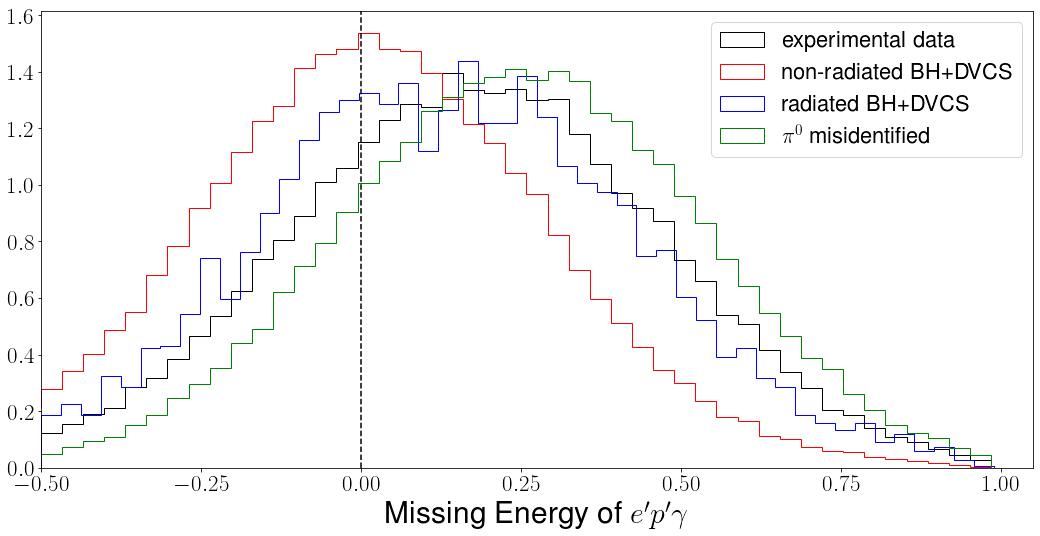

In [9]:
plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30

plt.hist(epgExpInb.loc[epgExpInb.config==1, "ME_epg"], bins = np.linspace(-0.6, 1.05, 51), histtype = 'step', density = True, label = 'experimental data', color = 'k')
plt.hist(dvcsSimInb.loc[dvcsSimInb.config==1, "ME_epg"], bins = np.linspace(-0.6, 1.05, 51), histtype = 'step', density = True, label = 'non-radiated BH+DVCS', color = 'r')
plt.hist(dvcsSimInb.loc[(dvcsSimInb.config==1) & (dvcsSimInb.radMode>1)].ME_epg, bins = np.linspace(-0.5, 1.05, 51), histtype = 'step', density = True, label = 'radiated BH+DVCS', color = 'b')
plt.hist(bkgSimInb.loc[bkgSimInb.config==1, "ME_epg"], bins = np.linspace(-0.6, 1.05, 51), histtype = 'step', density = True, label = r'$\pi^0$'+' misidentified', color = 'g')
plt.axvline(0, color = 'k', linestyle = '--')
plt.xlim([-0.5, 1.05])
plt.xticks([-0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.xlabel("Missing Energy of "+r"$e'p'\gamma$")
plt.legend(loc = 'upper right')
plt.show()

In [10]:
contInbCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
contInbFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contInbCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)
contInb = len(pi0ExpInb)*len(bkgSimInb)/len(pi0SimInb)/len(epgExpInb)

In [10]:
contInbCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
contInbFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contInbCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)
contInb = len(pi0ExpInb)*len(bkgSimInb)/len(pi0SimInb)/len(epgExpInb)

In [ ]:
print(contInbFD, contInbCD, contInbCDFT)

In [23]:
len(epgExpInbFD), len(epgExpInbCD), len(epgExpInbCDFT)

(44943, 66950, 192068)

In [24]:
len(epgExpInbFD)*(1-contInbFD), len(epgExpInbCD)*(1-contInbCD), len(epgExpInbCDFT)*(1-contInbCDFT)

(20979.58150507098, 60589.45207759341, 191422.33795588557)

In [25]:
len(dvcsSimInbFD), len(dvcsSimInbCD), len(dvcsSimInbCDFT)

(91536, 148464, 336220)

In [26]:
len(epgExpInbFD)*(1-contInbFD)/len(dvcsSimInbFD), len(epgExpInbCD)*(1-contInbCD)/len(dvcsSimInbCD), len(epgExpInbCDFT)*(1-contInbCDFT)/len(dvcsSimInbCDFT)

(0.22919486874094322, 0.4081087137460489, 0.5693365592644267)

In [27]:
len(epgExpInbFD)/len(dvcsSimInbFD), len(epgExpInbCD)/len(dvcsSimInbCD), len(epgExpInbCDFT)/len(dvcsSimInbCDFT)

(0.4909871525957, 0.4509510723138269, 0.5712569151151032)

In [28]:
len(pi0ExpInbFD)/len(pi0SimInbFD), len(pi0ExpInbCD)/len(pi0SimInbCD), len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)

(0.23034660964827192, 0.24066547816438733, 0.22750600567809565)

In [30]:
parent_MC = "/Volumes/Extreme SSD/Mar2022/nominal/convPkl_full/outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Mar2022/nominal/convPkl_full/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Mar2022/nominal/convPkl_full/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Mar2022/nominal/convPkl_full/outb/exp/"
# parent_MC = "/Volumes/Extreme SSD/Mar2022/nominal_nothetacut/convPkl_full/outb/dvcs/"
# parent_MC_bkg1g = "/Volumes/Extreme SSD/Mar2022/nominal_nothetacut/convPkl_full/outb/bkg_1g/"
# parent_MC_bkg2g = "/Volumes/Extreme SSD/Mar2022/nominal_nothetacut/convPkl_full/outb/bkg_2g/"
# parent_exp = "/Volumes/Extreme SSD/Mar2022/nominal_nothetacut/convPkl_full/outb/exp/"

#epg Exp
epgExpOutb = pd.read_pickle(parent_exp + "dvcs.pkl")

# Rec
df_4398_corr = pd.read_pickle(parent_MC + "4398.pkl")
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
df_4243_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")

# df_3987_corr = pd.read_pickle(parent_MC + "3987_075.pkl")
# df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076_075.pkl")
# df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076_075.pkl")
#bkg2g Exp
pi0ExpOutb = pd.read_pickle(parent_exp + "pi0.pkl")

In [30]:
dvcsSimOutb = df_4398_corr
bkgSimOutb = df_4243_1g_corr
pi0SimOutb = df_4243_2g_corr

In [31]:
epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[(pi0ExpOutb.config == 3)]
pi0SimOutbCDFT = pi0SimOutb.loc[(pi0SimOutb.config == 3)]

epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]
pi0ExpOutbCD = pi0ExpOutb.loc[(pi0ExpOutb.config == 2)]
pi0SimOutbCD = pi0SimOutb.loc[(pi0SimOutb.config == 2)]

epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]
dvcsSimOutbFD = dvcsSimOutb.loc[dvcsSimOutb.config == 1]
bkgSimOutbFD = bkgSimOutb.loc[bkgSimOutb.config == 1]
pi0ExpOutbFD = pi0ExpOutb.loc[(pi0ExpOutb.config == 1)]
pi0SimOutbFD = pi0SimOutb.loc[(pi0SimOutb.config == 1)]

In [32]:
contOutbCD = len(pi0ExpOutbCD)*len(bkgSimOutbCD)/len(pi0SimOutbCD)/len(epgExpOutbCD)
contOutbFD = len(pi0ExpOutbFD)*len(bkgSimOutbFD)/len(pi0SimOutbFD)/len(epgExpOutbFD)
contOutbCDFT = len(pi0ExpOutbCDFT)*len(bkgSimOutbCDFT)/len(pi0SimOutbCDFT)/len(epgExpOutbCDFT)
contOutb = len(pi0ExpOutb)*len(bkgSimOutb)/len(pi0SimOutb)/len(epgExpOutb)

In [33]:
print(contOutbFD, contOutbCD, contOutbCDFT)

0.5719221243034739 0.17340018983153432 0.0036193900910019648


In [34]:
len(epgExpOutbFD)*(1-contOutbFD), len(epgExpOutbCD)*(1-contOutbCD), len(epgExpOutbCDFT)*(1-contOutbCDFT)

(25945.800045966447, 180645.1225142165, 222252.65884630108)

In [35]:
len(dvcsSimOutbFD), len(dvcsSimOutbCD), len(dvcsSimOutbCDFT)

(136210, 552704, 424604)

In [36]:
len(pi0ExpOutbFD), len(pi0ExpOutbCD), len(pi0ExpOutbCDFT)

(71121, 168818, 8311)

In [37]:
len(epgExpOutbFD)*(1-contOutbFD)/len(dvcsSimOutbFD), len(epgExpOutbCD)*(1-contOutbCD)/len(dvcsSimOutbCD), len(epgExpOutbCDFT)*(1-contOutbCDFT)/len(dvcsSimOutbCDFT)

(0.1904838120987185, 0.3268388188148023, 0.5234351509790325)

In [38]:
len(pi0ExpOutbFD)/len(pi0SimOutbFD), len(pi0ExpOutbCD)/len(pi0SimOutbCD), len(pi0ExpOutbCDFT)/len(pi0SimOutbCDFT)

(0.21794529993105033, 0.21847976042262526, 0.17677713021653124)

<AxesSubplot:>

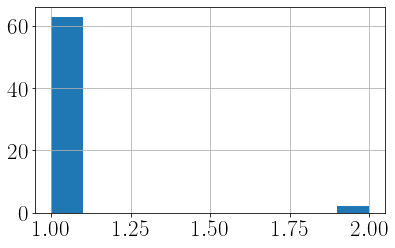

In [398]:
dvcsSimOutb.loc[dvcsSimOutb.Q2xBtphibin==3501, "config"].hist()

In [332]:
len(epgExpInb.loc[epgExpInb.Q2xBtphibin==3501, "Q2bin"])

7

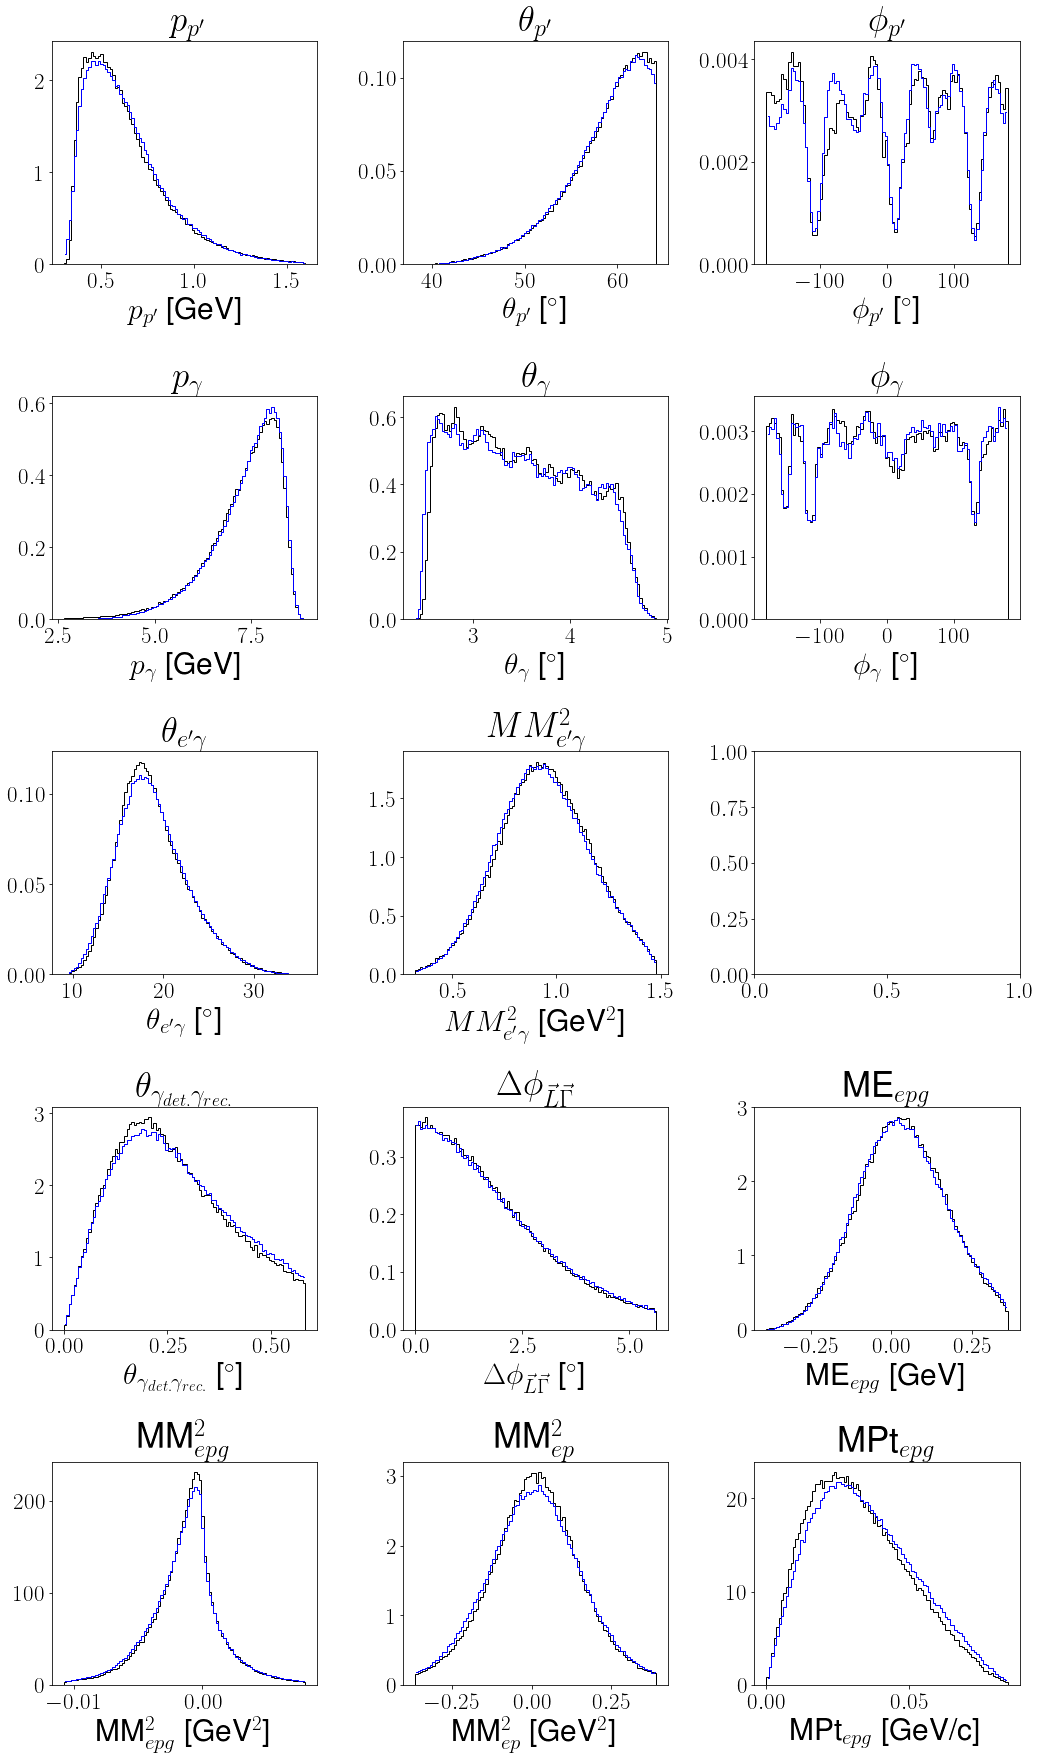

In [384]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{\vec{L}\vec{\Gamma}}$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeVc]
df3 = epgExpInbCDFT
df1 = dvcsSimInbCDFT
df2 = bkgSimInbCDFT
df4 = pi0ExpInbCDFT
df5 = pi0SimInbCDFT

fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist_dvcs, bins = np.histogram(df1.loc[:, varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[:, varstoplot[ind]], bins, density = True)
        simDist = (1-contInbCDFT)*simDist_dvcs + contInbCDFT*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[:,varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}.pdf".format(i, sigma2))
# plt.show()
plt.savefig("dvcsInbCDFTexcl.pdf")


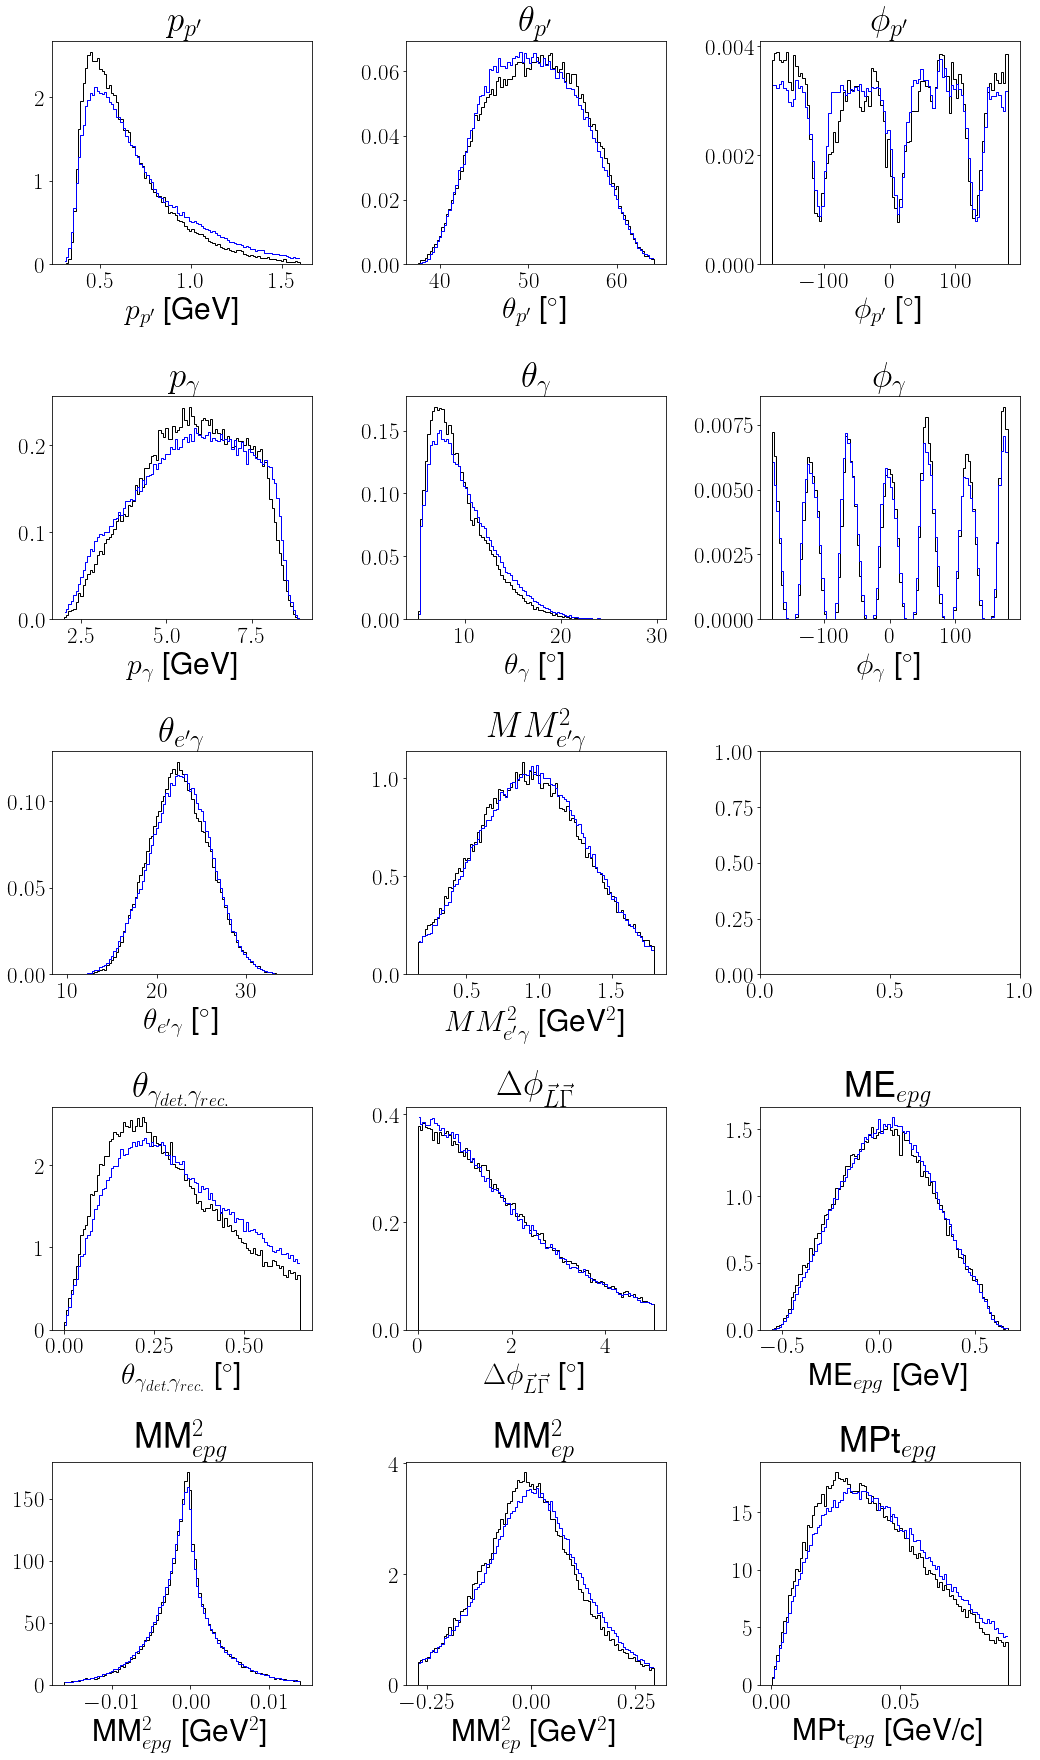

In [385]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{\vec{L}\vec{\Gamma}}$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeVc]
df3 = epgExpInbCD
df1 = dvcsSimInbCD
df2 = bkgSimInbCD
df4 = pi0ExpInbCD
df5 = pi0SimInbCD
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist_dvcs, bins = np.histogram(df1.loc[:, varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[:, varstoplot[ind]], bins, density = True)
        simDist = (1-contInbCD)*simDist_dvcs + contInbCD*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[:,varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbCD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbCD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbCD{}_{:.3f}.pdf".format(i, sigma2))
# plt.show()
plt.savefig("dvcsInbCDexcl.pdf")


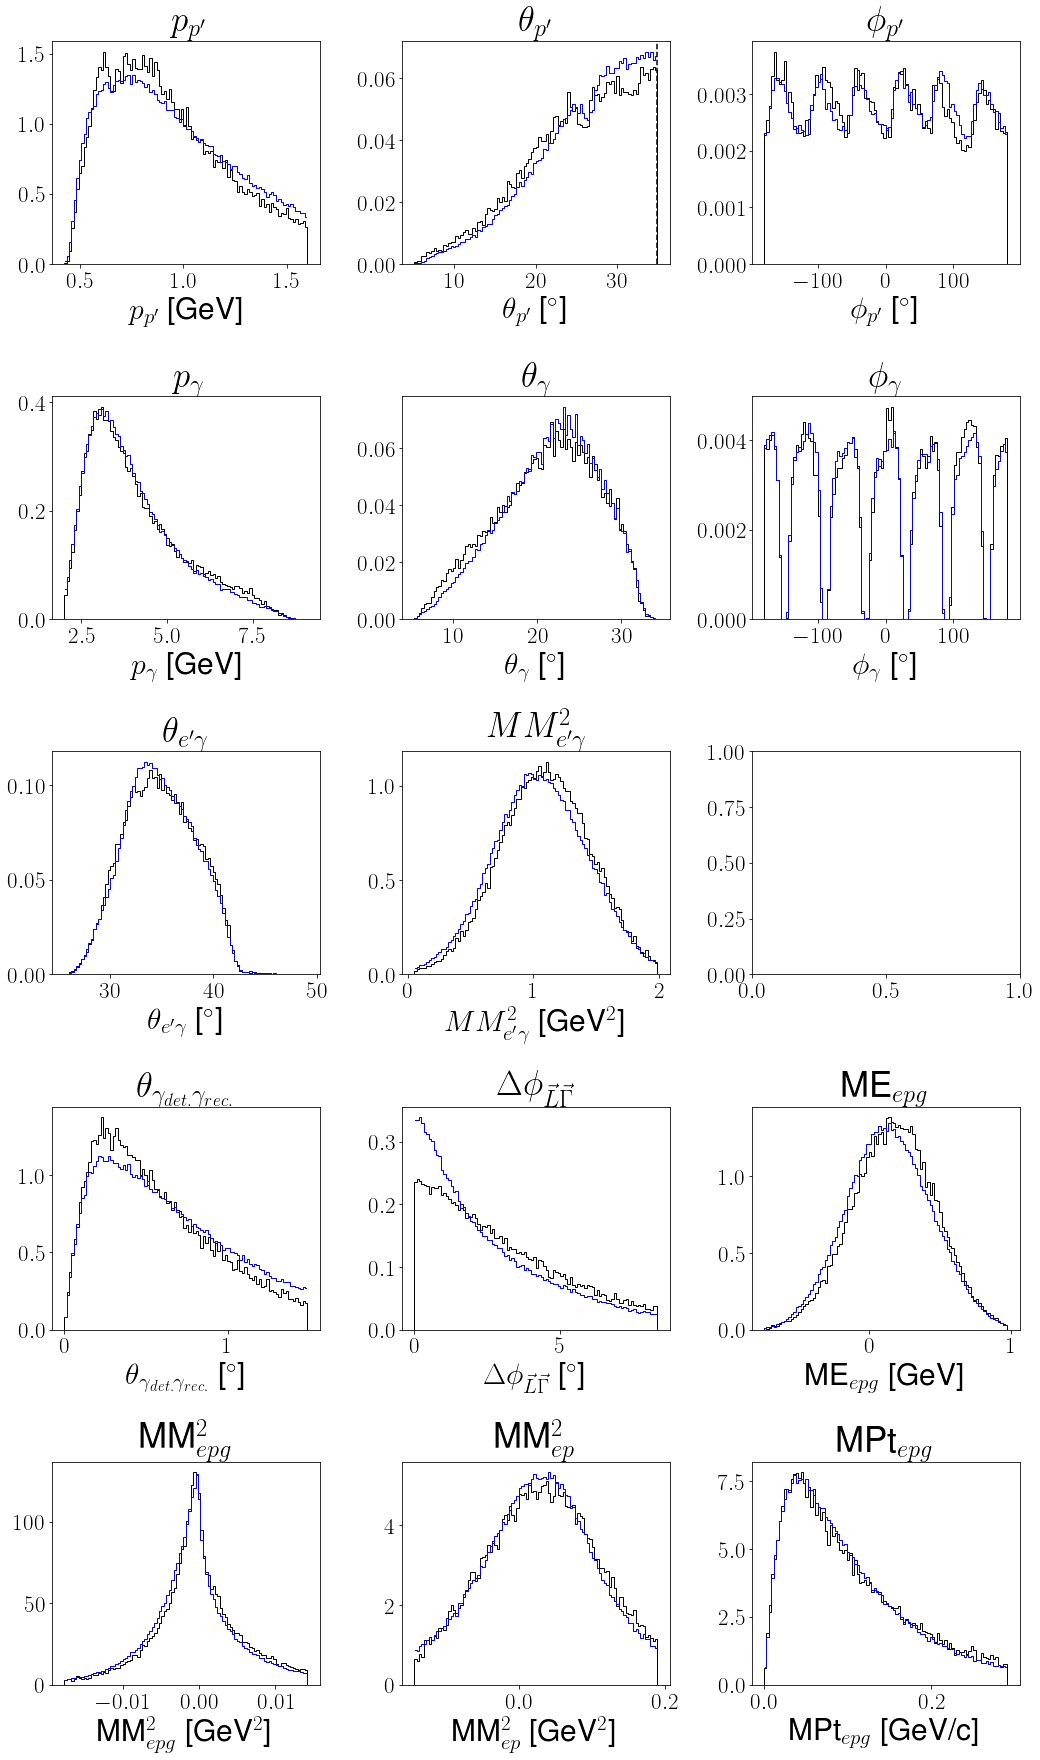

In [386]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{\vec{L}\vec{\Gamma}}$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeVc]
df3 = epgExpInbFD
df1 = dvcsSimInbFD
df2 = bkgSimInbFD
df4 = pi0ExpInbFD
df5 = pi0SimInbFD
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
#         if ind == 1:
#             simDist_dvcs, bins = np.histogram(df1.loc[:, varstoplot[ind]], np.linspace(5, 37, 101), density = True)
#         else:
        simDist_dvcs, bins = np.histogram(df1.loc[:, varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[:, varstoplot[ind]], bins, density = True)
        simDist = (1-contInbFD)*simDist_dvcs + contInbFD*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        if ind == 1:
            axs[yind, xind].axvline(35, color = 'k', linestyle = '--')
#             axs[yind, xind].hist(df3.loc[:,varstoplot[ind]]-np.poly1d([1.671, -4.918, 5.151, -2.434])(df3.Pp), bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         else:
        axs[yind, xind].hist(df3.loc[:,varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbFD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbFD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbFD{}_{:.3f}.pdf".format(i, sigma2))
# plt.show()
plt.savefig("dvcsInbFDexcl.pdf")


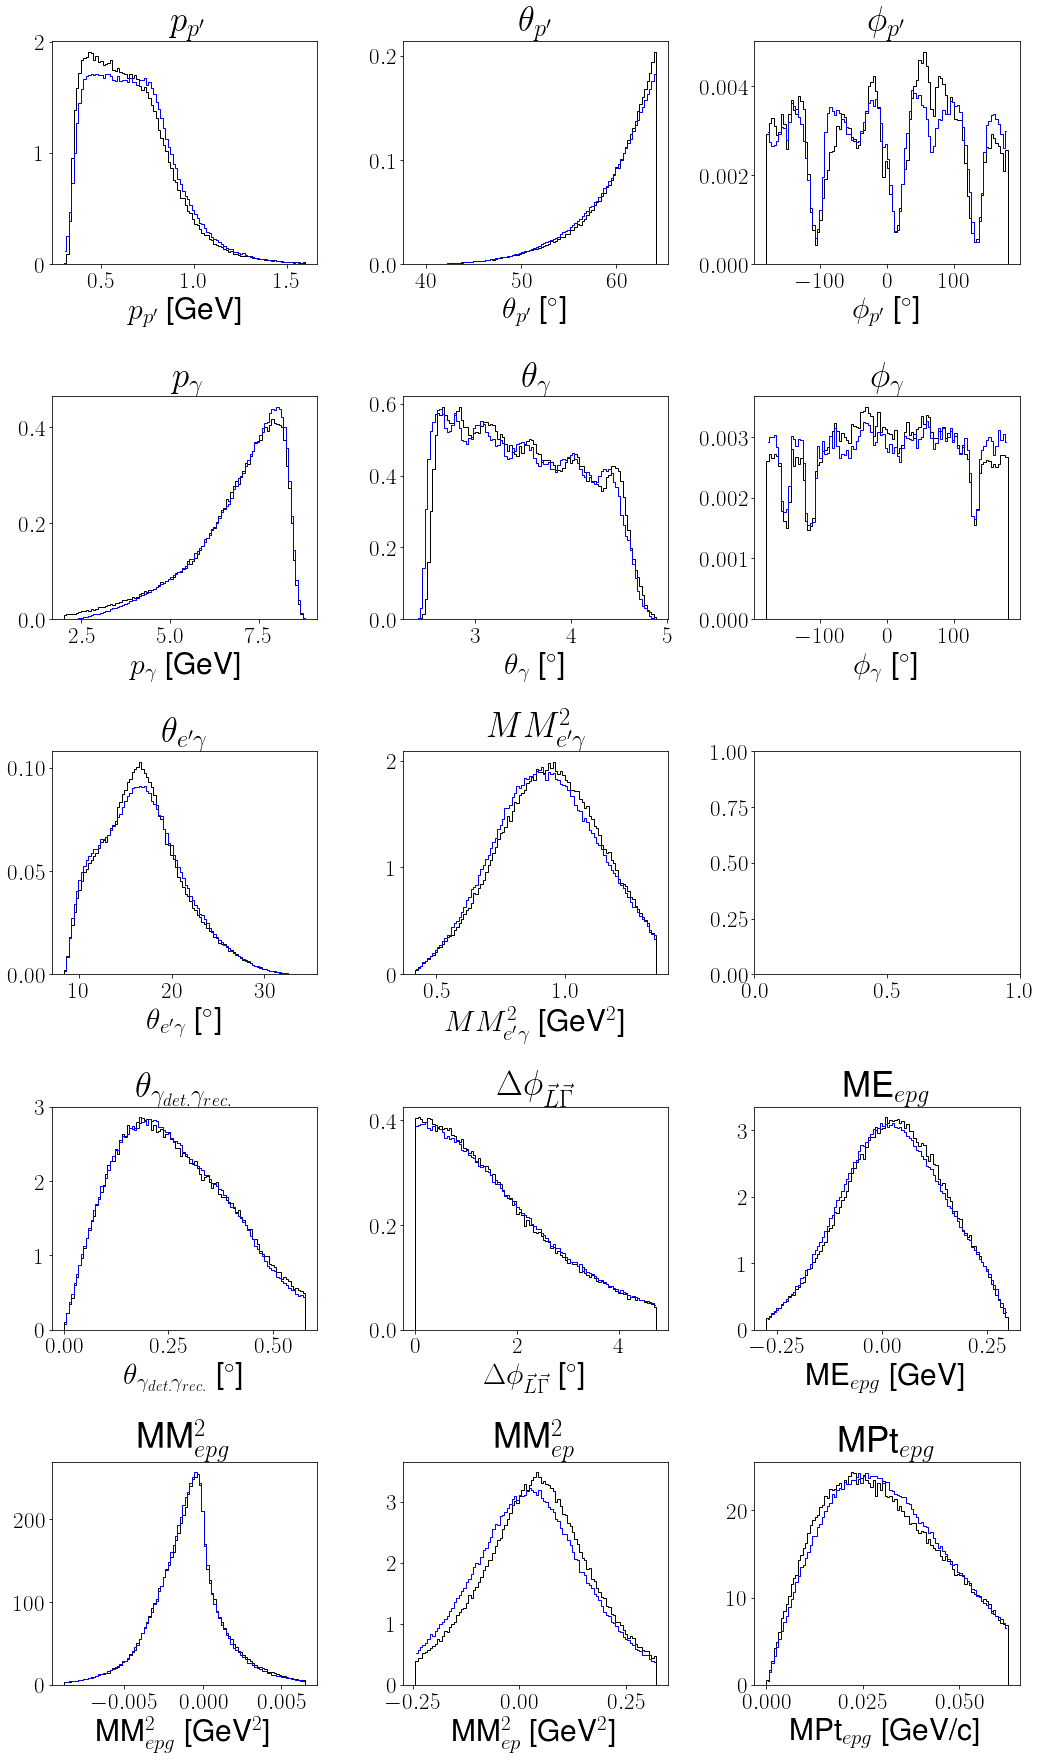

In [387]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{\vec{L}\vec{\Gamma}}$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeVc]
df3 = epgExpOutbCDFT
df1 = dvcsSimOutbCDFT
df2 = bkgSimOutbCDFT
df4 = pi0ExpOutbCDFT
df5 = pi0SimOutbCDFT
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist_dvcs, bins = np.histogram(df1.loc[:, varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[:, varstoplot[ind]], bins, density = True)
        simDist = (1-contOutbCDFT)*simDist_dvcs + contOutbCDFT*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[:,varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}.pdf".format(i, sigma2))
# plt.show()
plt.savefig("dvcsOutbCDFTexcl.pdf")


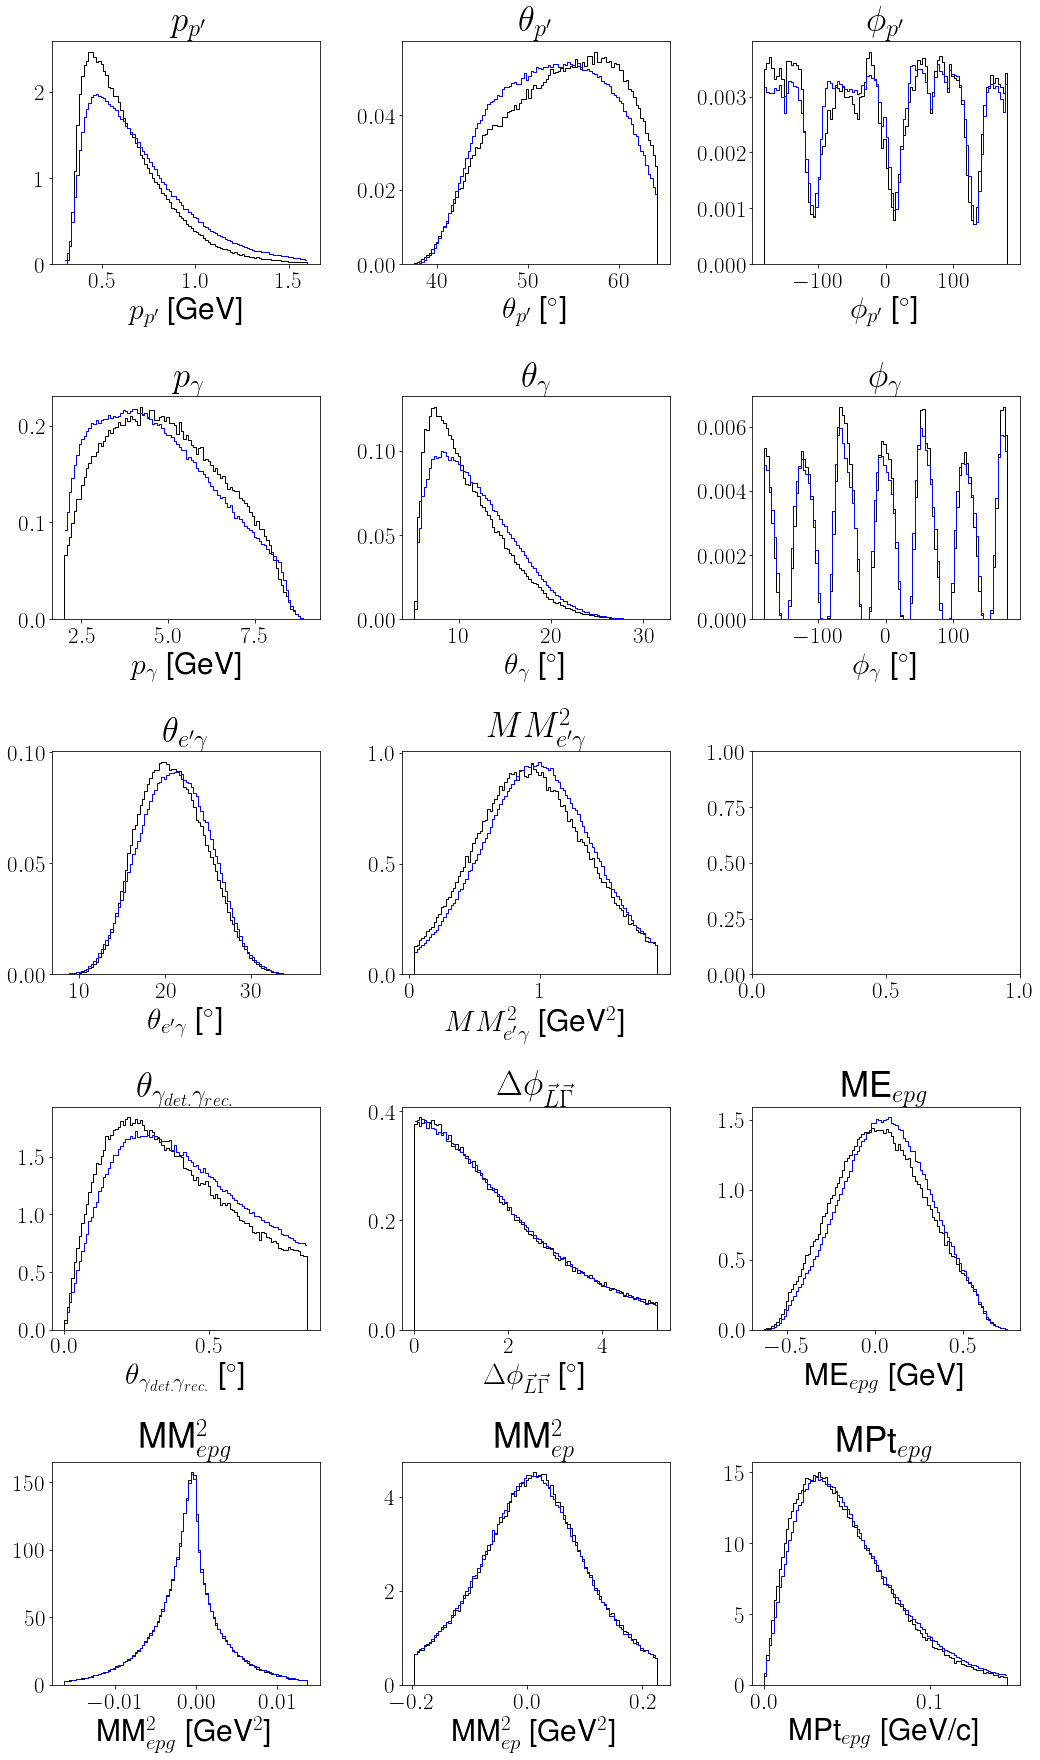

In [388]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{\vec{L}\vec{\Gamma}}$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeVc]
df3 = epgExpOutbCD
df1 = dvcsSimOutbCD
df2 = bkgSimOutbCD
df4 = pi0ExpOutbCD
df5 = pi0SimOutbCD

# df1 = df1.loc[(df1.phi1>60)&(df1.phi1<300)]
# df2 = df2.loc[(df2.phi1>60)&(df2.phi1<300)]
# df3 = df3.loc[(df3.phi1>60)&(df3.phi1<300)]
# df4 = df4.loc[(df4.phi1>60)&(df4.phi1<300)]
# df5 = df5.loc[(df5.phi1>60)&(df5.phi1<300)]

contOutbCD = len(df2)*len(df4)/len(df3)/len(df5)
fig, axs = plt.subplots(5, 3, figsize = (15,25))

# contOutbCD = 0.0
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist_dvcs, bins = np.histogram(df1.loc[:, varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[:, varstoplot[ind]], bins, density = True)
        simDist = (1-contOutbCD)*simDist_dvcs + contOutbCD*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[:,varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"OutbCD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"OutbCD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"OutbCD{}_{:.3f}.pdf".format(i, sigma2))
# plt.show()
plt.savefig("dvcsOutbCDexcl.pdf")



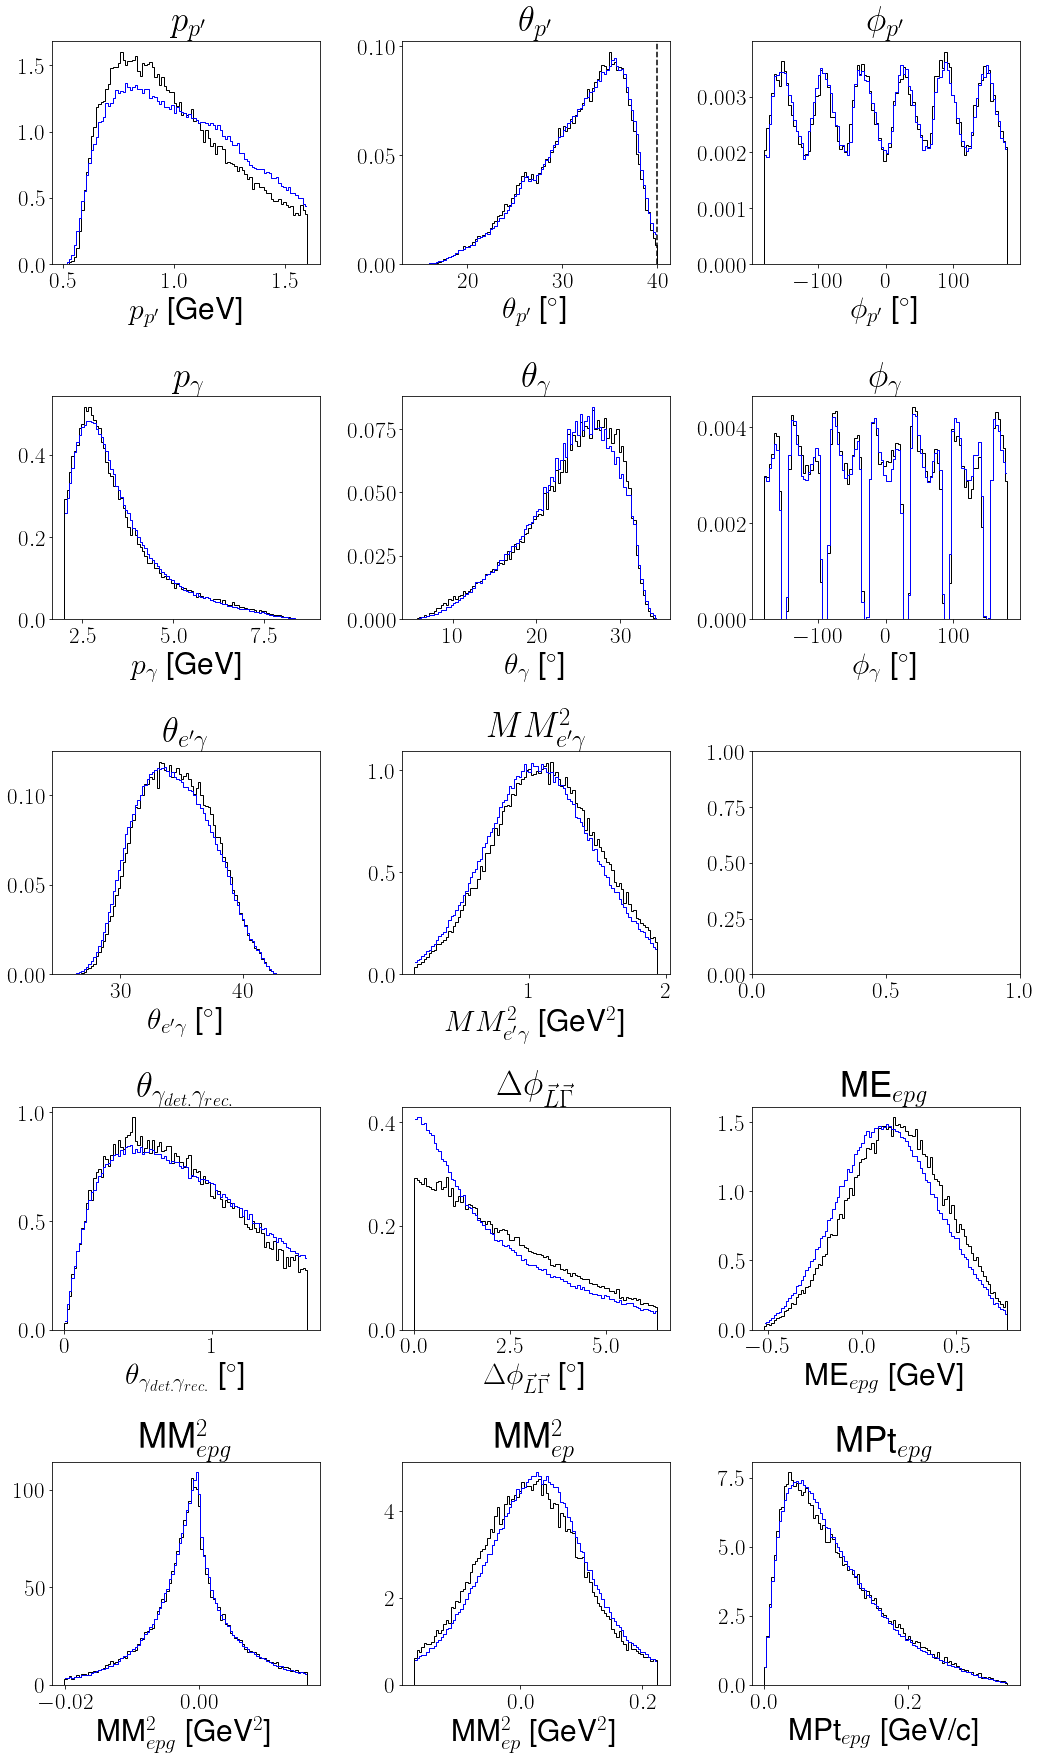

In [389]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{\vec{L}\vec{\Gamma}}$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeVc]
df3 = epgExpOutbFD
df1 = dvcsSimOutbFD
df2 = bkgSimOutbFD
df4 = pi0ExpOutbFD
df5 = pi0SimOutbFD
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            axs[yind, xind].axvline(40, color = 'k', linestyle = '--')
        simDist_dvcs, bins = np.histogram(df1.loc[:, varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[:, varstoplot[ind]], bins, density = True)
        simDist = (1-contOutbFD)*simDist_dvcs + contOutbFD*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[:,varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"OutbFD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"OutbFD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"OutbFD{}_{:.3f}.pdf".format(i, sigma2))
# plt.show()
plt.savefig("dvcsOutbFDexcl.pdf")



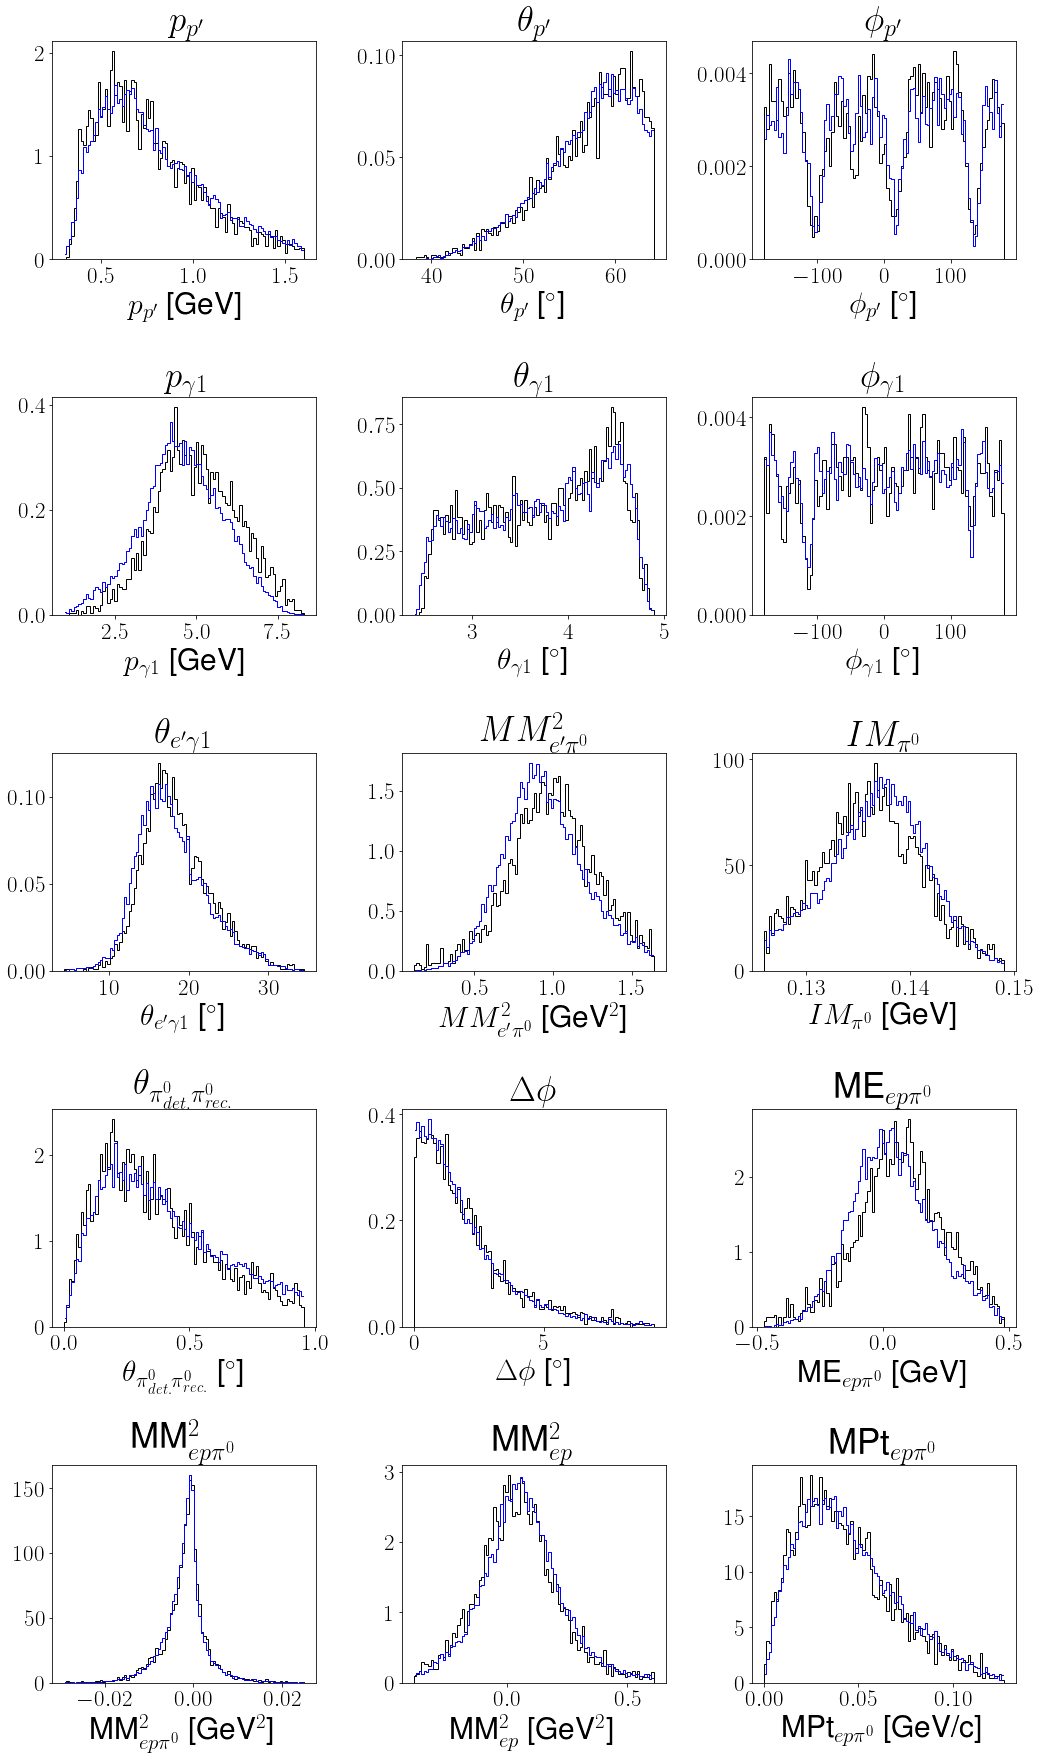

In [391]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\pi^0}$", r"$IM_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeVc]

df4 = pi0ExpInbCDFT
df5 = pi0SimInbCDFT


fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.show()
# plt.clf()

plt.savefig("pi0InbCDFTexcl.pdf")


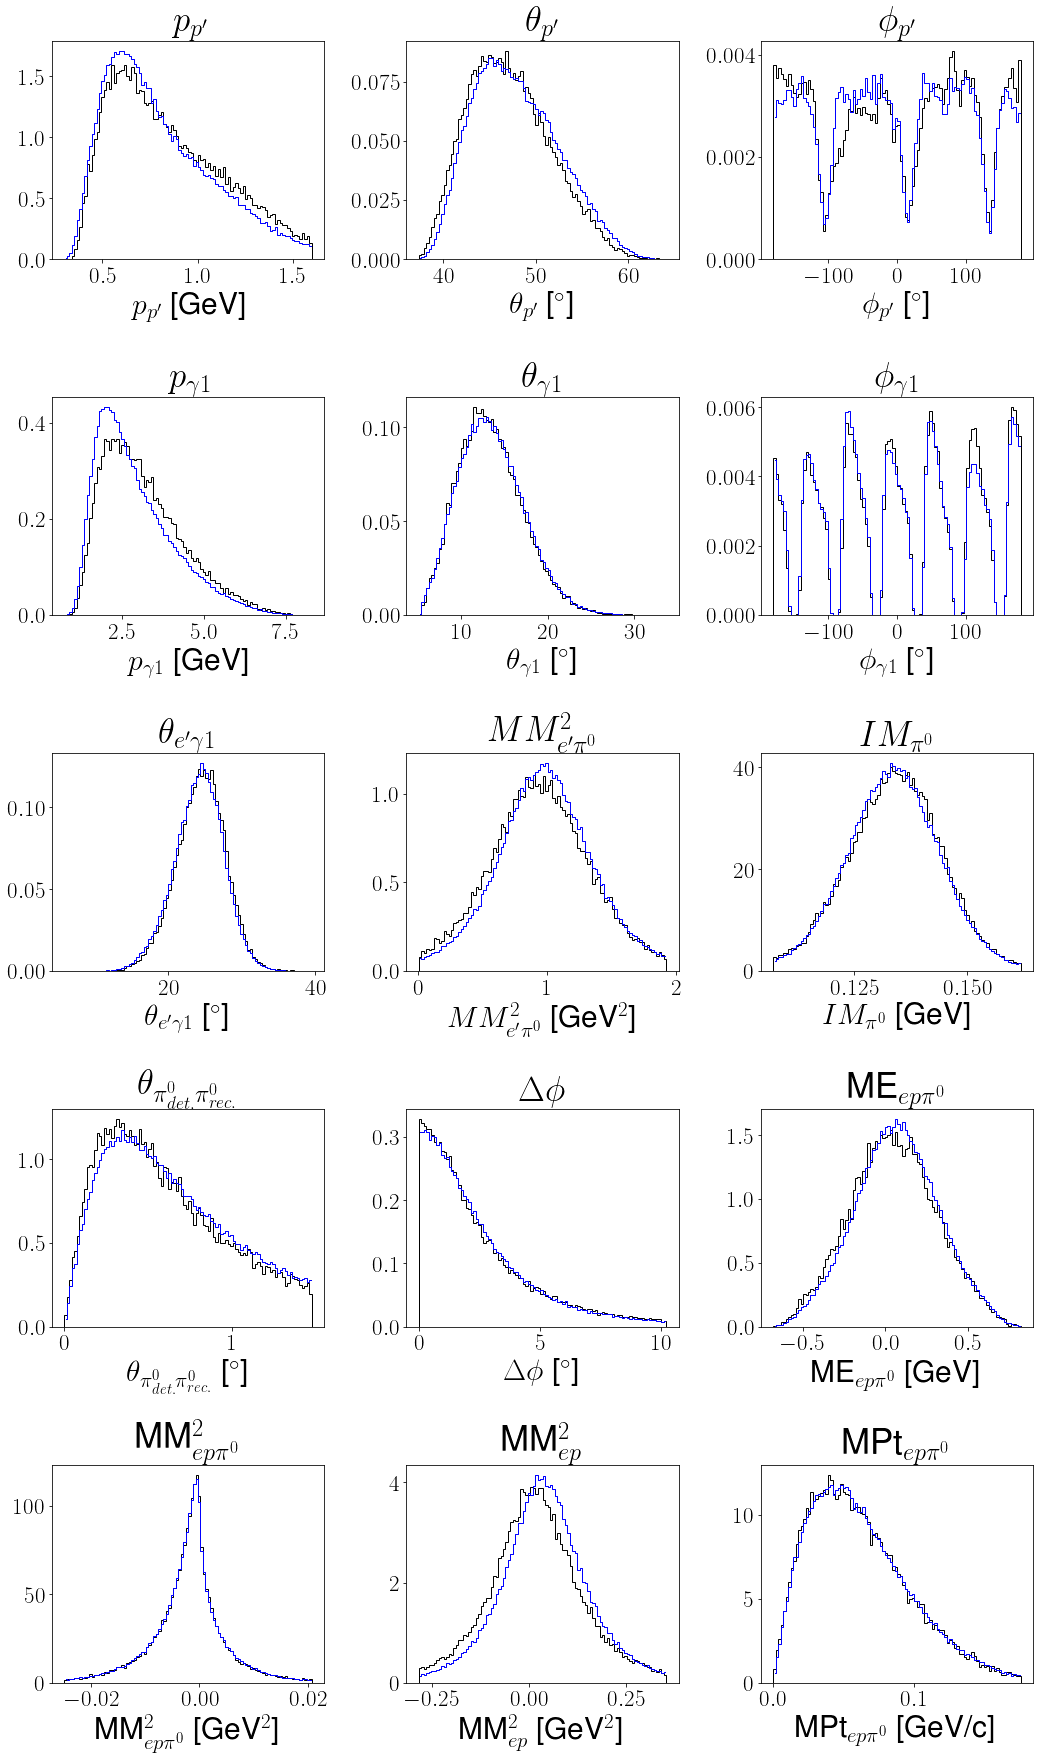

In [392]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\pi^0}$", r"$IM_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeVc]

df4 = pi0ExpInbCD
df5 = pi0SimInbCD

fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.show()
# plt.clf()

plt.savefig("pi0InbCDexcl.pdf")


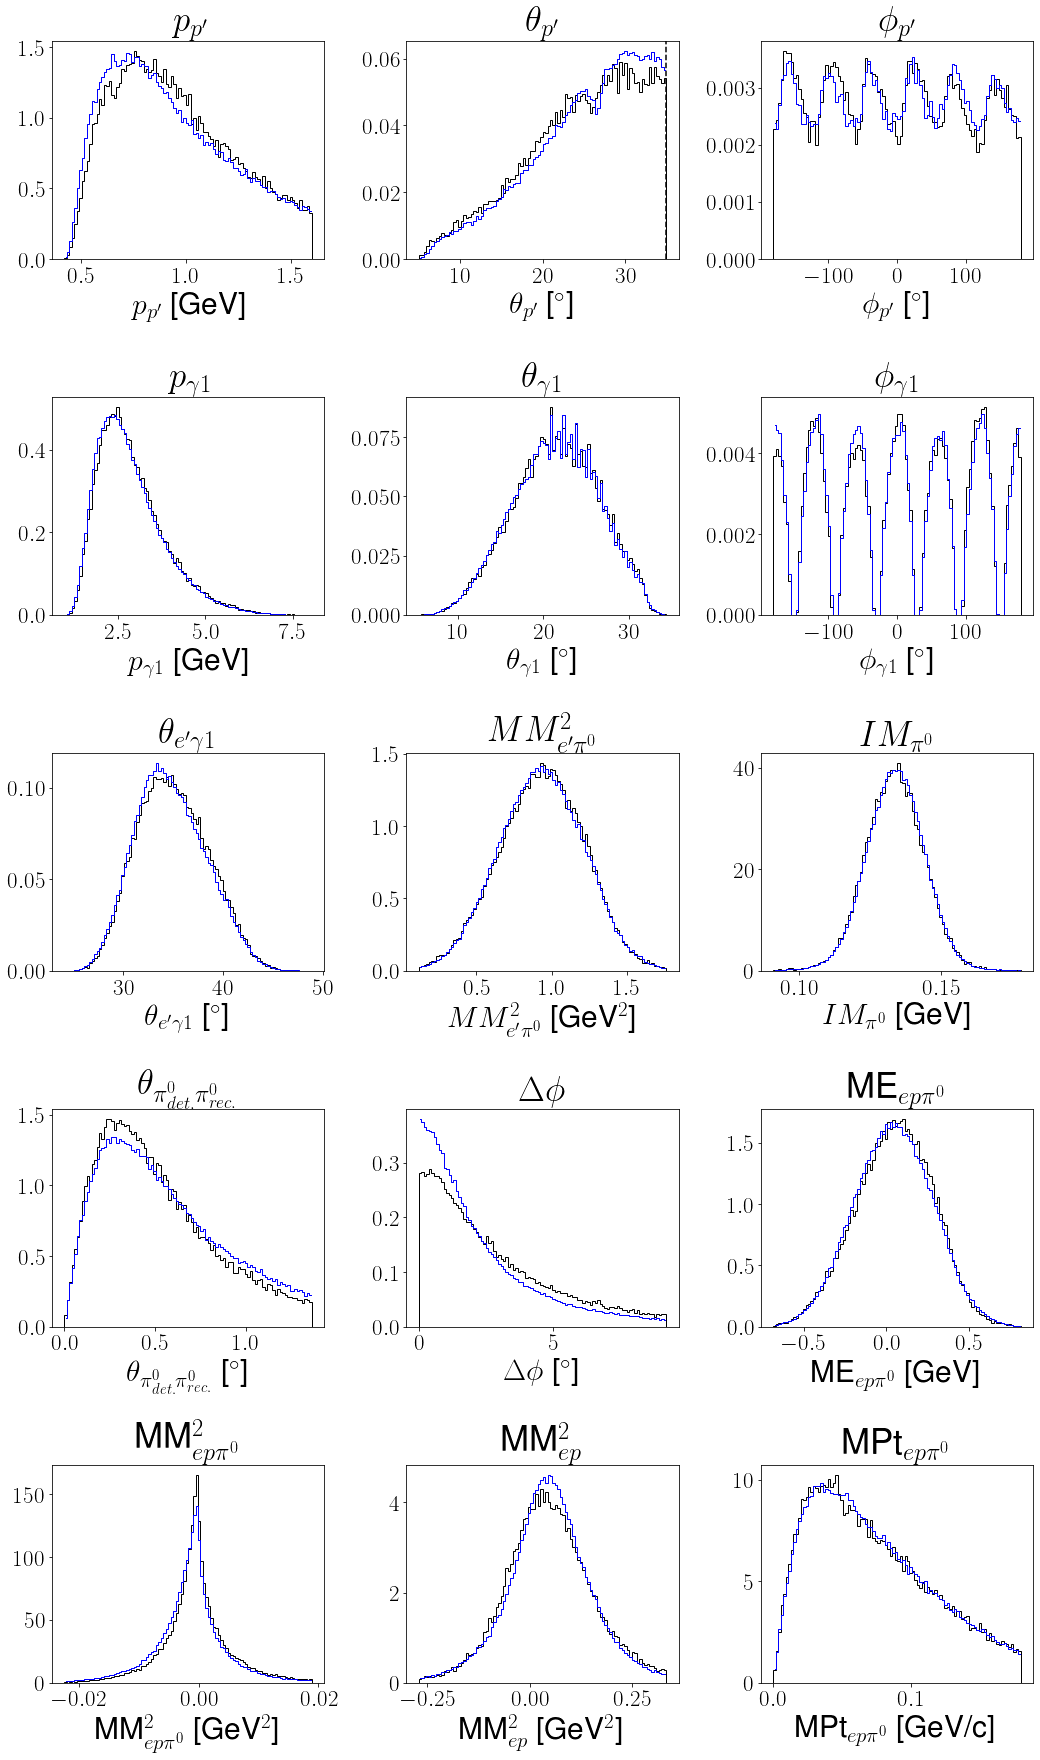

In [393]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\pi^0}$", r"$IM_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeVc]

df4 = pi0ExpInbFD
df5 = pi0SimInbFD

fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            axs[yind, xind].axvline(35, color = 'k', linestyle = '--')
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.show()
# plt.clf()

plt.savefig("pi0InbFDexcl.pdf")


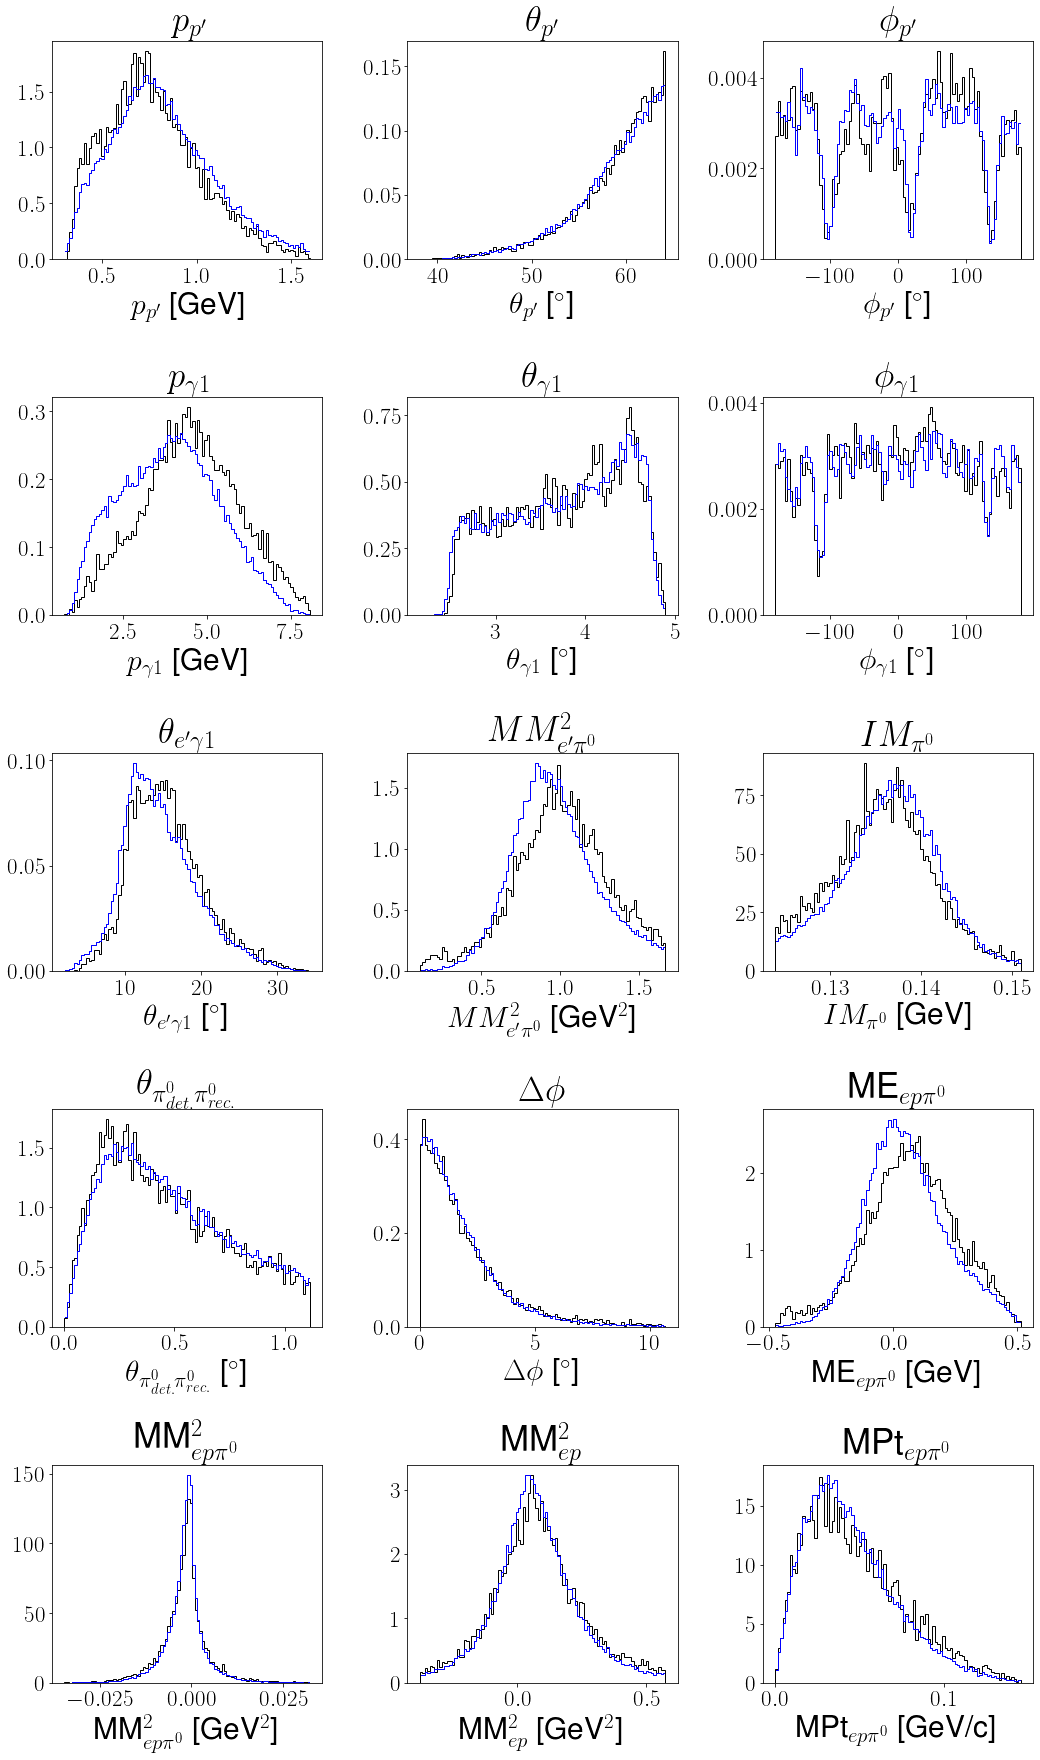

In [394]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\pi^0}$", r"$IM_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeVc]

df4 = pi0ExpOutbCDFT
df5 = pi0SimOutbCDFT

fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.show()
# plt.clf()

plt.savefig("pi0OutbCDFTexcl.pdf")


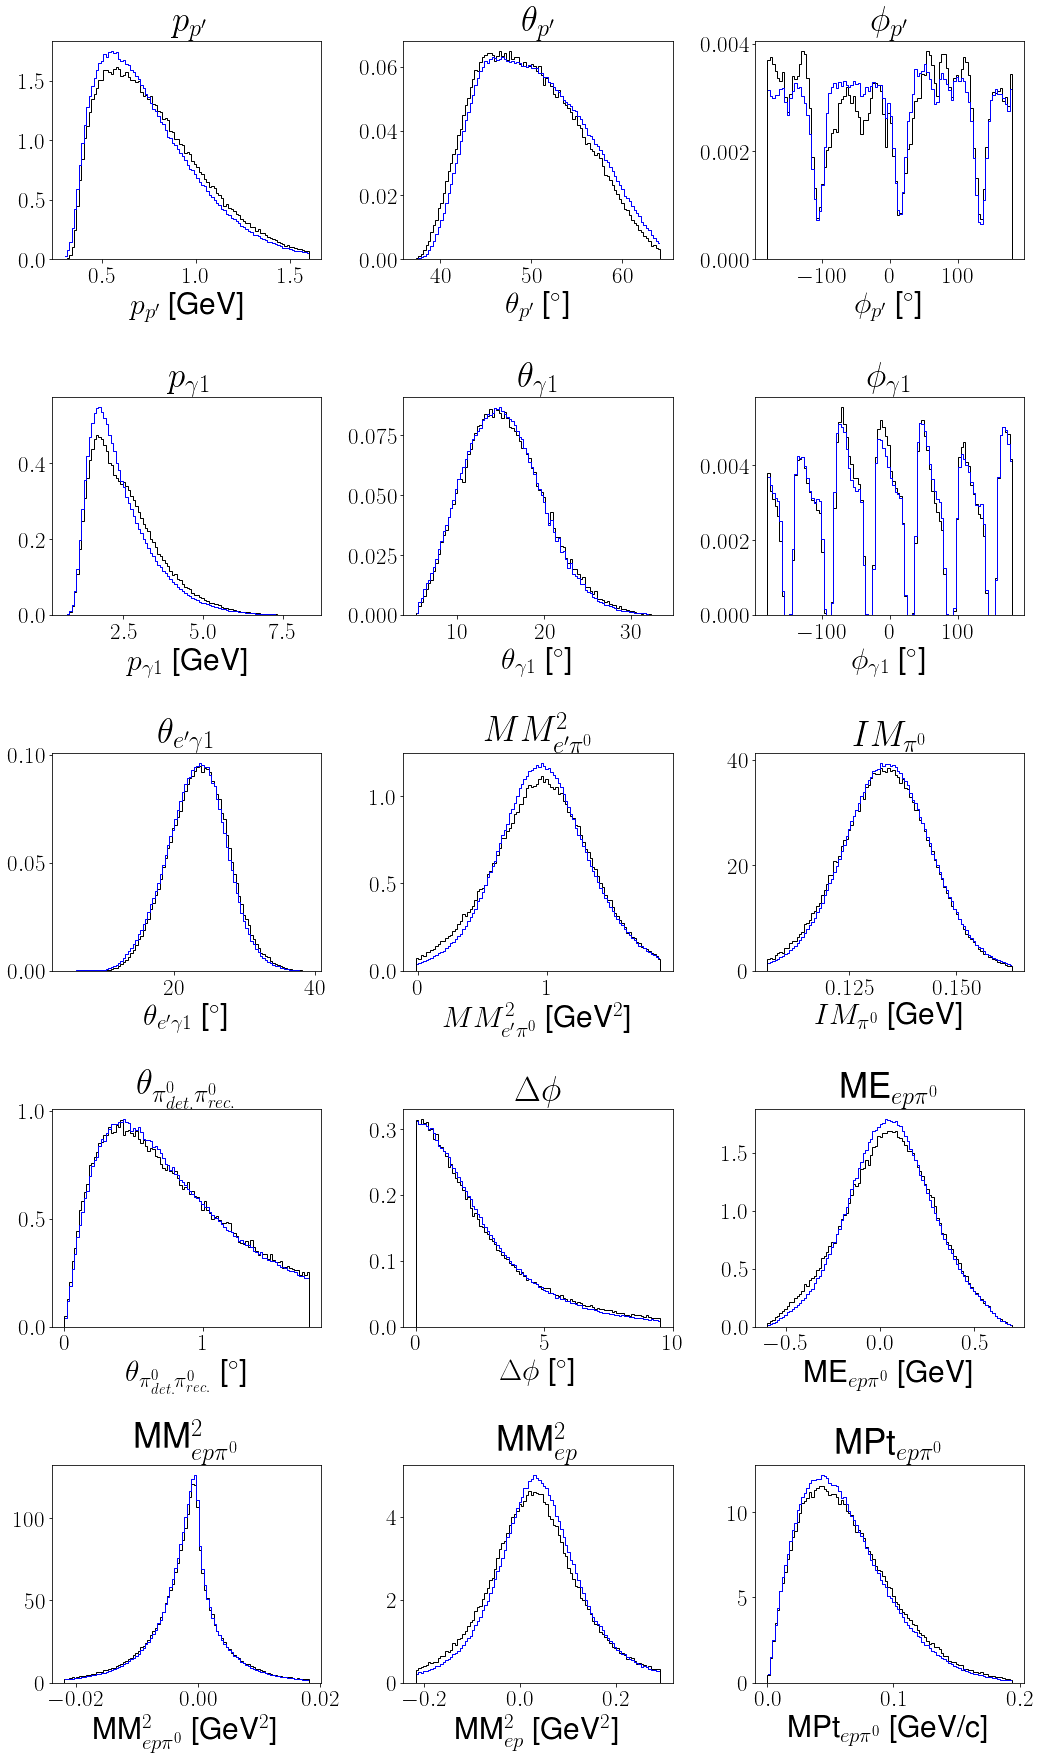

In [395]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\pi^0}$", r"$IM_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeVc]

df4 = pi0ExpOutbCD
df5 = pi0SimOutbCD

fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.show()
# plt.clf()

plt.savefig("pi0OutbCDexcl.pdf")


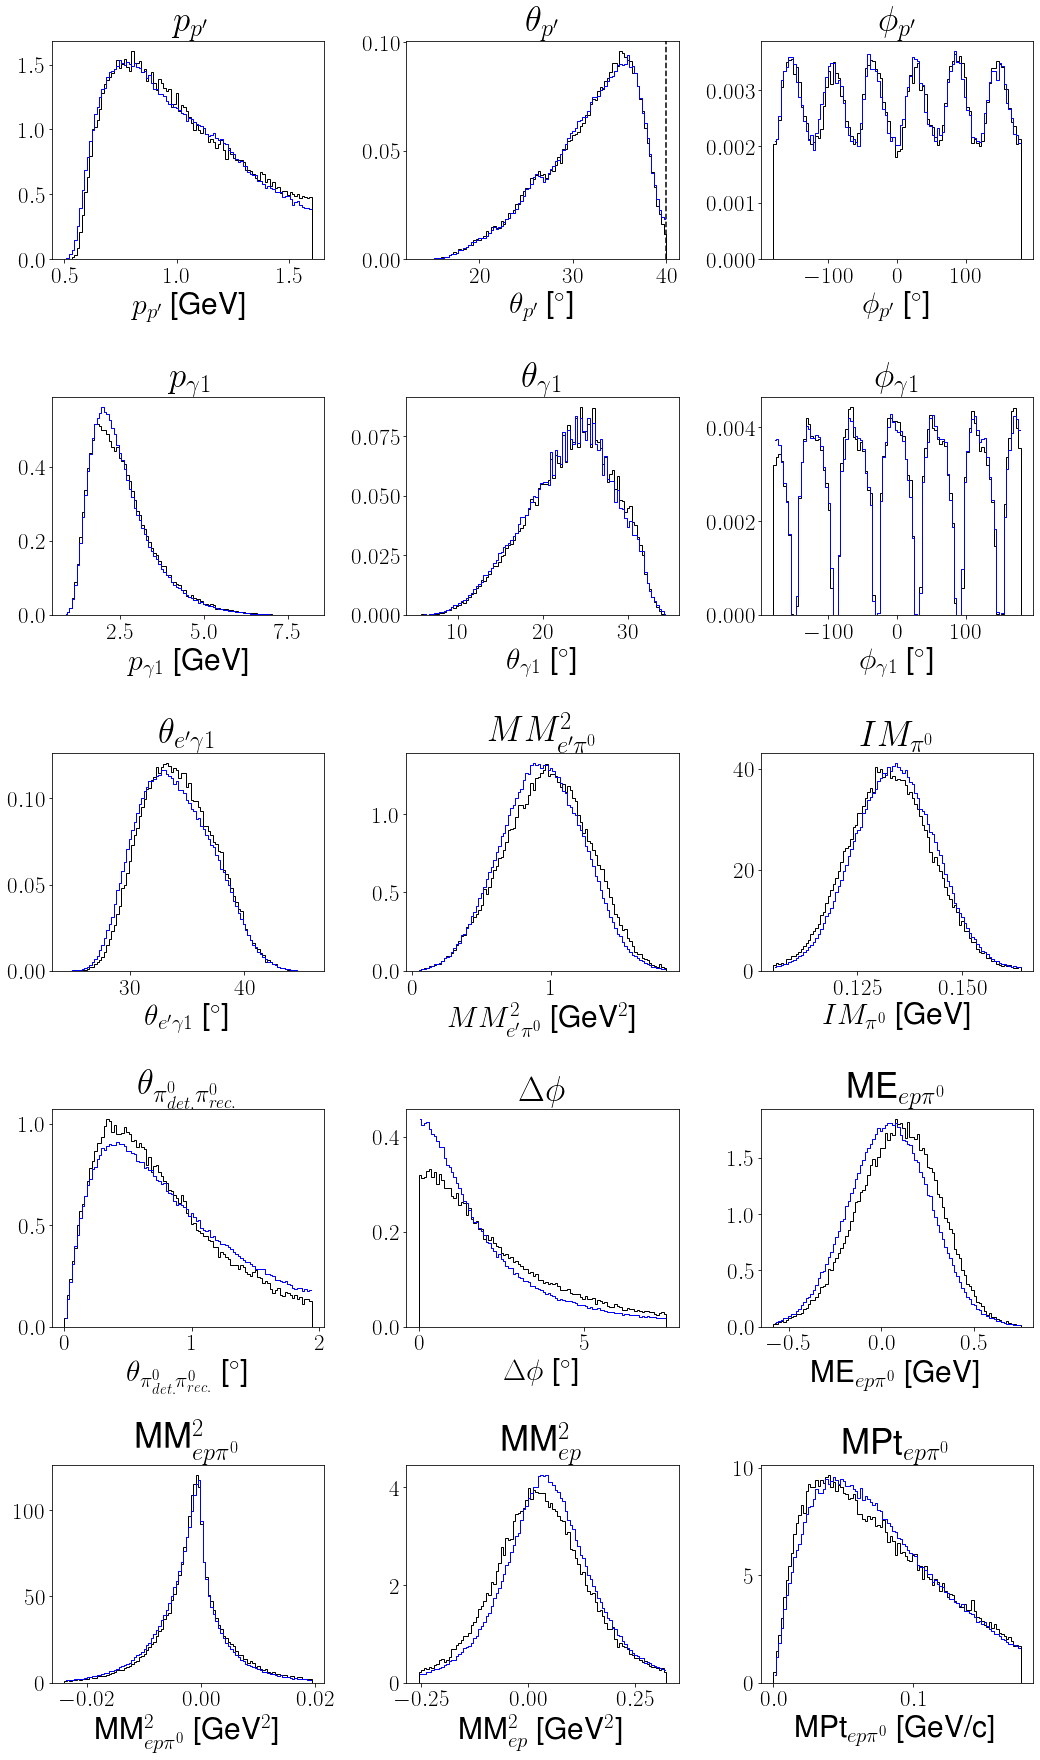

In [396]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\pi^0}$", r"$IM_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeVc]

df4 = pi0ExpOutbFD
df5 = pi0SimOutbFD

fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            axs[yind, xind].axvline(40, color = 'k', linestyle = '--')
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.show()
# plt.clf()

plt.savefig("pi0OutbFDexcl.pdf")


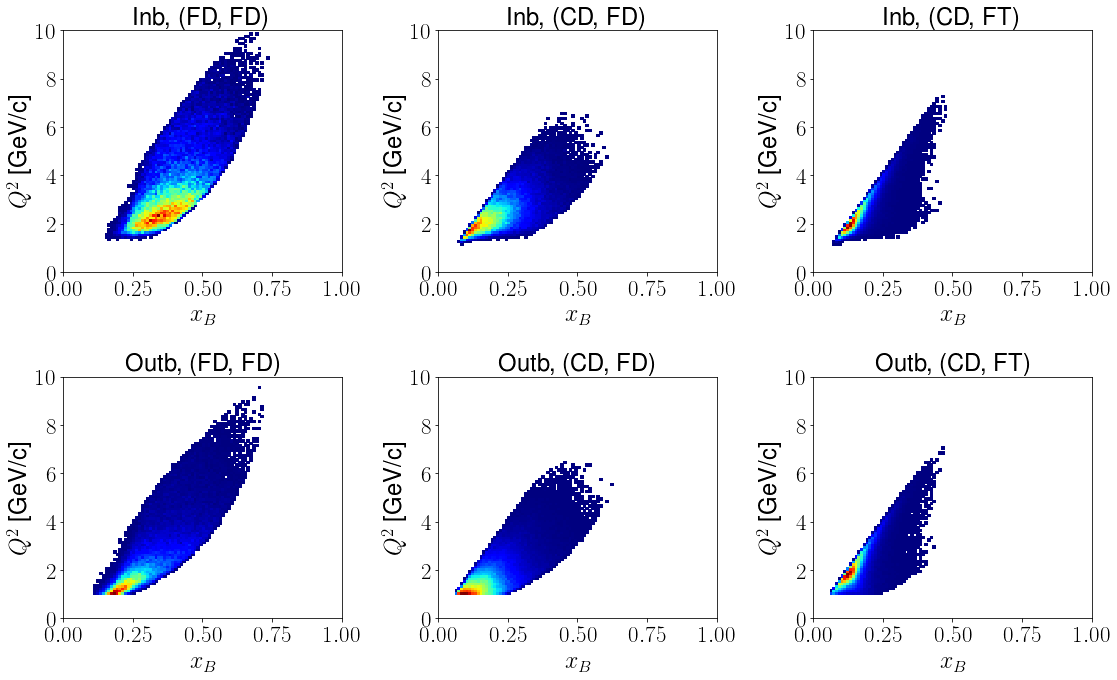

In [411]:
fig, axs = plt.subplots(2, 3, figsize = (16, 10))


axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], cmap = cmap, cmin = 1)
axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], cmap = cmap, cmin = 1)
axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], cmap = cmap, cmin = 1)
axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], cmap = cmap, cmin = 1)
axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], cmap = cmap, cmin = 1)
axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0, 1, 101), np.linspace(0, 10, 101)], cmap = cmap, cmin = 1)

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$x_B$")
        axs[xind, yind].set_ylabel(r"$Q^2$" + " [" +GeVc+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
# axs.set_xlim([0, 35])
# axs.set_xticks([0, 5, 10, 15, 20, 25, 30, 35])
# axs.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35])
# axs.set_yticks([0, 10, 20, 30, 40, 50, 60, 70])
# axs.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70])
# # plt.hist(dvcsSample.Enphe, bins = np.linspace(0, 50, 51), density = True, histtype = 'step')
# # plt.legend()
# axs.set_xlabel(r"$\theta_{\gamma}$"+ " ["+degree+"]")
# axs.set_ylabel(r"$\theta_{p'}$"+ " ["+degree+"]")
# plt.savefig("Q2xB_binning.pdf")
plt.show()

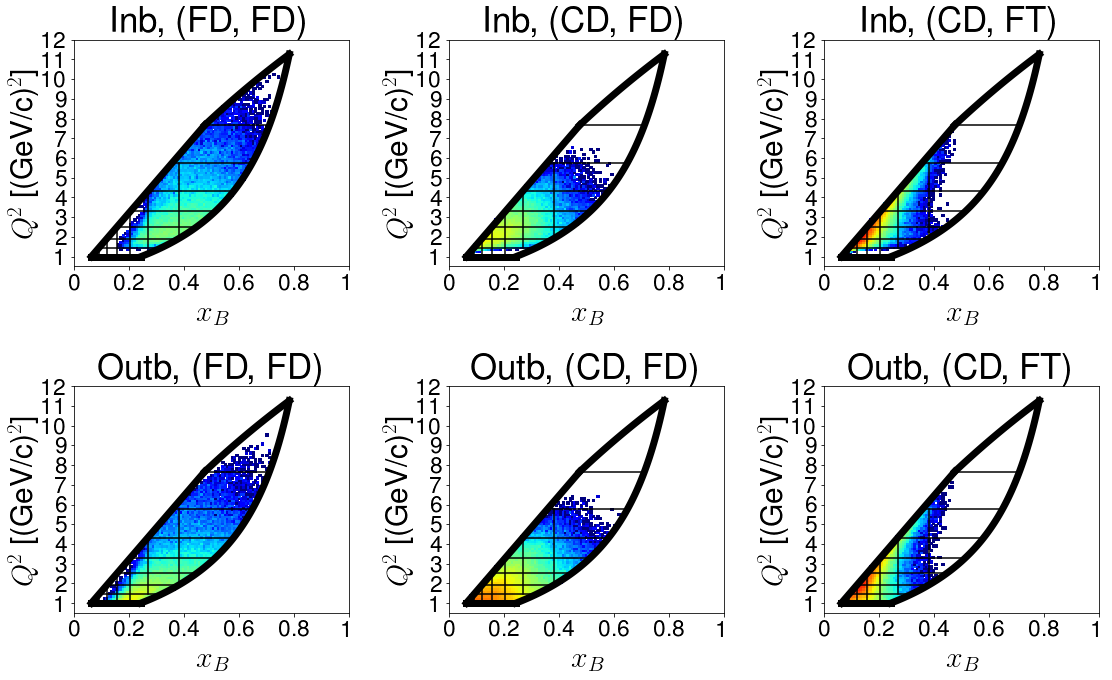

In [400]:
fig, axs = plt.subplots(2, 3, figsize = (16, 10))


axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$x_B$")
        axs[xind, yind].set_ylabel(r"$Q^2$" + " [" +GeVc+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
        #CLAS12
        l1 = np.linspace(x1, x3, 101)
        l2 = np.linspace(x1, x2, 101)
        l3 = np.linspace(x3, x4, 101)
        l4 = np.linspace(x2, x4, 101)

        axs[xind, yind].plot(l1, l1*2*M*(10.604-2), color = 'k', linewidth = 7)
        axs[xind, yind].plot(l2, 1+l2*0, color = 'k', linewidth = 7)
        axs[xind, yind].plot(l3, 2*10.604*M*l3/(1+M*l3/10.604/(1-np.cos(np.radians(35)))), color = 'k', linewidth = 7)
        axs[xind, yind].plot(l4, (4 - M*M)*l4/(1 - l4), color = 'k', linewidth = 7)

        axs[xind, yind].plot(np.linspace(c0,c0, 101), np.linspace(y1, y2, 101), color='k')
        axs[xind, yind].plot(np.linspace(c1,c1, 101), np.linspace(y1, np.sqrt(y2*y3), 101), color='k')
        axs[xind, yind].plot(np.linspace(c2,c2, 101), np.linspace(y1, y3, 101), color='k')
        axs[xind, yind].plot(np.linspace(c3,c3, 101), np.linspace(y1, np.sqrt(y3*y4), 101), color='k')
        axs[xind, yind].plot(np.linspace(c4,c4, 101), np.linspace(y2, y4, 101), color='k')
        axs[xind, yind].plot(np.linspace(d1,d1, 101), np.linspace(np.sqrt(y2*y3), np.sqrt(y4*y5), 101), color='k')

        axs[xind, yind].plot(np.linspace(c0, d0, 101), np.linspace(y2, y2, 101), color='k')
        axs[xind, yind].plot(np.linspace(c1, d1, 101), np.linspace(np.sqrt(y2*y3), np.sqrt(y2*y3), 101), color='k')
        axs[xind, yind].plot(np.linspace(c2, d2, 101), np.linspace(y3, y3, 101), color='k')
        axs[xind, yind].plot(np.linspace(c3, d3, 101), np.linspace(np.sqrt(y3*y4), np.sqrt(y3*y4), 101), color='k')
        axs[xind, yind].plot(np.linspace(c4, d4, 101), np.linspace(y4, y4, 101), color='k')
        axs[xind, yind].plot(np.linspace(c5, d5, 101), np.linspace(np.sqrt(y4*y5), np.sqrt(y4*y5), 101), color='k')
        axs[xind, yind].plot(np.linspace(c6, d6, 101), np.linspace(y5, y5, 101), color='k')

        axs[xind, yind].set_xlabel(r"$x_B$" ,fontsize = 30)
        axs[xind, yind].set_ylabel(r"$Q^2$" +" ["+GeVc2+"]", fontsize = 30)
#         axs[xind, yind].set_xscale('log')
#         axs[xind, yind].set_yscale('log')
# 
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
        axs[xind, yind].set_xlim([0, 1])
        axs[xind, yind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axs[xind, yind].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
        axs[xind, yind].set_yticks([1,  2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
        axs[xind, yind].set_yticklabels([1,  2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
# # plt.hist(dvcsSample.Enphe, bins = np.linspace(0, 50, 51), density = True, histtype = 'step')
# # plt.legend()
# axs.set_xlabel(r"$\theta_{\gamma}$"+ " ["+degree+"]")
# axs.set_ylabel(r"$\theta_{p'}$"+ " ["+degree+"]")
plt.savefig("Q2xB_binning_revisited.pdf")
# plt.show()

In [309]:
len(epgExpInbFD)

192680

In [28]:
inbcharge = 0
for run in epgExpInb.RunNum.unique():
    inbcharge = inbcharge +  epgExpInb.loc[epgExpInb.RunNum==run, "beamQ"].max() - epgExpInb.loc[epgExpInb.RunNum==run, "beamQ"].min()

In [31]:
outbcharge = 0
for run in epgExpOutb.RunNum.unique():
    outbcharge = outbcharge +  epgExpOutb.loc[epgExpOutb.RunNum==run, "beamQ"].max() - epgExpOutb.loc[epgExpOutb.RunNum==run, "beamQ"].min()

In [32]:
print(inbcharge, outbcharge)

36892718.294662 32913514.79690352


In [11]:
parent_Gen = "/Volumes/Extreme SSD/Mar2022/results/Gen/"
parent_Rec = "/Volumes/Extreme SSD/Mar2022/results/nominal_3sigma/"

In [12]:
runs_inb_dvcs50nA = [3987, 4124, 4139, 4181, 4182, 4397, 4528, 4529, 4535, 4539]
runs_inb_dvcs55nA = [4186, 4545]
runs_inb_dvcs45nA = [4188, 4547]
runs_inb_dvcs0nA = [4192, 4561]
runs_inb_bh50nA = [4238, 4542]
runs_inb_bkg50nA = [4076, 4202, 4209]
runs_inb_bkg55nA = [4212]
runs_inb_bkg45nA = [4217]
runs_inb_bkg0nA = [4231]

runs_outb_dvcs50nA = [4240, 4250, 4251, 4252, 4255, 4398, 4532, 4534, 4540, 4541]
runs_outb_dvcs40nA = [4263, 4546]
runs_outb_dvcs0nA = [4262, 4554]
runs_outb_dvcs40nAT = [4266, 4562]
runs_outb_bh50nA = [4249, 4544]
runs_outb_bkg50nA = [4243, 4271, 4290]
runs_outb_bkg40nA = [4293]
runs_outb_bkg0nA = [4304]
runs_outb_bkg40nAT = [4306]

In [13]:
counts = pd.read_pickle(parent_Rec + "epgExpInb.pkl")
counts = pd.merge(counts, pd.read_pickle(parent_Rec + "epgExpOutb.pkl"))
counts = pd.merge(counts, pd.read_pickle(parent_Rec + "pi0ExpInb.pkl"))
counts = pd.merge(counts, pd.read_pickle(parent_Rec + "pi0ExpOutb.pkl"))
for run in [*runs_inb_dvcs50nA, *runs_inb_dvcs55nA, *runs_inb_dvcs45nA, *runs_inb_dvcs0nA, *runs_inb_bh50nA, *runs_outb_dvcs50nA, *runs_outb_dvcs40nA, *runs_outb_dvcs0nA, *runs_outb_dvcs40nAT, *runs_outb_bh50nA]:
    counts = pd.merge(counts, pd.read_pickle(parent_Rec + "{}.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(parent_Gen + "{}Gen.pkl".format(run)))
for run in [*runs_inb_bkg50nA, *runs_inb_bkg55nA, *runs_inb_bkg45nA, *runs_inb_bkg0nA, *runs_outb_bkg50nA, *runs_outb_bkg40nA, *runs_outb_bkg0nA, *runs_outb_bkg40nAT]:
    counts = pd.merge(counts, pd.read_pickle(parent_Rec + "{}bkg_1g.pkl".format(run)))
    counts = pd.merge(counts, pd.read_pickle(parent_Rec + "{}bkg_2g.pkl".format(run)))


In [14]:
counts.loc[:, "dvcsSimInb50nA1"] = np.sum(counts.loc[:, ["{}1".format(run) for run in runs_inb_dvcs50nA]], axis = 1)
counts.loc[:, "dvcsSimInb50nA2"] = np.sum(counts.loc[:, ["{}2".format(run) for run in runs_inb_dvcs50nA]], axis = 1)
counts.loc[:, "dvcsSimInb50nA3"] = np.sum(counts.loc[:, ["{}3".format(run) for run in runs_inb_dvcs50nA]], axis = 1)

counts.loc[:, "dvcsSimInb55nA1"] = np.sum(counts.loc[:, ["{}1".format(run) for run in runs_inb_dvcs55nA]], axis = 1)
counts.loc[:, "dvcsSimInb55nA2"] = np.sum(counts.loc[:, ["{}2".format(run) for run in runs_inb_dvcs55nA]], axis = 1)
counts.loc[:, "dvcsSimInb55nA3"] = np.sum(counts.loc[:, ["{}3".format(run) for run in runs_inb_dvcs55nA]], axis = 1)

counts.loc[:, "dvcsSimInb45nA1"] = np.sum(counts.loc[:, ["{}1".format(run) for run in runs_inb_dvcs45nA]], axis = 1)
counts.loc[:, "dvcsSimInb45nA2"] = np.sum(counts.loc[:, ["{}2".format(run) for run in runs_inb_dvcs45nA]], axis = 1)
counts.loc[:, "dvcsSimInb45nA3"] = np.sum(counts.loc[:, ["{}3".format(run) for run in runs_inb_dvcs45nA]], axis = 1)

counts.loc[:, "dvcsSimInb0nA1"] = np.sum(counts.loc[:, ["{}1".format(run) for run in runs_inb_dvcs0nA]], axis = 1)
counts.loc[:, "dvcsSimInb0nA2"] = np.sum(counts.loc[:, ["{}2".format(run) for run in runs_inb_dvcs0nA]], axis = 1)
counts.loc[:, "dvcsSimInb0nA3"] = np.sum(counts.loc[:, ["{}3".format(run) for run in runs_inb_dvcs0nA]], axis = 1)

counts.loc[:, "bhSimInb50nA1"] = np.sum(counts.loc[:, ["{}1".format(run) for run in runs_inb_bh50nA]], axis = 1)
counts.loc[:, "bhSimInb50nA2"] = np.sum(counts.loc[:, ["{}2".format(run) for run in runs_inb_bh50nA]], axis = 1)
counts.loc[:, "bhSimInb50nA3"] = np.sum(counts.loc[:, ["{}3".format(run) for run in runs_inb_bh50nA]], axis = 1)

counts.loc[:, "bkg1gSimInb50nA1"] = np.sum(counts.loc[:, ["{}bkg_1g1".format(run) for run in runs_inb_bkg50nA]], axis = 1)
counts.loc[:, "bkg1gSimInb50nA2"] = np.sum(counts.loc[:, ["{}bkg_1g2".format(run) for run in runs_inb_bkg50nA]], axis = 1)
counts.loc[:, "bkg1gSimInb50nA3"] = np.sum(counts.loc[:, ["{}bkg_1g3".format(run) for run in runs_inb_bkg50nA]], axis = 1)

counts.loc[:, "bkg1gSimInb55nA1"] = np.sum(counts.loc[:, ["{}bkg_1g1".format(run) for run in runs_inb_bkg55nA]], axis = 1)
counts.loc[:, "bkg1gSimInb55nA2"] = np.sum(counts.loc[:, ["{}bkg_1g2".format(run) for run in runs_inb_bkg55nA]], axis = 1)
counts.loc[:, "bkg1gSimInb55nA3"] = np.sum(counts.loc[:, ["{}bkg_1g3".format(run) for run in runs_inb_bkg55nA]], axis = 1)

counts.loc[:, "bkg1gSimInb45nA1"] = np.sum(counts.loc[:, ["{}bkg_1g1".format(run) for run in runs_inb_bkg45nA]], axis = 1)
counts.loc[:, "bkg1gSimInb45nA2"] = np.sum(counts.loc[:, ["{}bkg_1g2".format(run) for run in runs_inb_bkg45nA]], axis = 1)
counts.loc[:, "bkg1gSimInb45nA3"] = np.sum(counts.loc[:, ["{}bkg_1g3".format(run) for run in runs_inb_bkg45nA]], axis = 1)

counts.loc[:, "bkg1gSimInb0nA1"] = np.sum(counts.loc[:, ["{}bkg_1g1".format(run) for run in runs_inb_bkg0nA]], axis = 1)
counts.loc[:, "bkg1gSimInb0nA2"] = np.sum(counts.loc[:, ["{}bkg_1g2".format(run) for run in runs_inb_bkg0nA]], axis = 1)
counts.loc[:, "bkg1gSimInb0nA3"] = np.sum(counts.loc[:, ["{}bkg_1g3".format(run) for run in runs_inb_bkg0nA]], axis = 1)

counts.loc[:, "bkg2gSimInb50nA1"] = np.sum(counts.loc[:, ["{}bkg_2g1".format(run) for run in runs_inb_bkg50nA]], axis = 1)
counts.loc[:, "bkg2gSimInb50nA2"] = np.sum(counts.loc[:, ["{}bkg_2g2".format(run) for run in runs_inb_bkg50nA]], axis = 1)
counts.loc[:, "bkg2gSimInb50nA3"] = np.sum(counts.loc[:, ["{}bkg_2g3".format(run) for run in runs_inb_bkg50nA]], axis = 1)

counts.loc[:, "bkg2gSimInb55nA1"] = np.sum(counts.loc[:, ["{}bkg_2g1".format(run) for run in runs_inb_bkg55nA]], axis = 1)
counts.loc[:, "bkg2gSimInb55nA2"] = np.sum(counts.loc[:, ["{}bkg_2g2".format(run) for run in runs_inb_bkg55nA]], axis = 1)
counts.loc[:, "bkg2gSimInb55nA3"] = np.sum(counts.loc[:, ["{}bkg_2g3".format(run) for run in runs_inb_bkg55nA]], axis = 1)

counts.loc[:, "bkg2gSimInb45nA1"] = np.sum(counts.loc[:, ["{}bkg_2g1".format(run) for run in runs_inb_bkg45nA]], axis = 1)
counts.loc[:, "bkg2gSimInb45nA2"] = np.sum(counts.loc[:, ["{}bkg_2g2".format(run) for run in runs_inb_bkg45nA]], axis = 1)
counts.loc[:, "bkg2gSimInb45nA3"] = np.sum(counts.loc[:, ["{}bkg_2g3".format(run) for run in runs_inb_bkg45nA]], axis = 1)

counts.loc[:, "bkg2gSimInb0nA1"] = np.sum(counts.loc[:, ["{}bkg_2g1".format(run) for run in runs_inb_bkg0nA]], axis = 1)
counts.loc[:, "bkg2gSimInb0nA2"] = np.sum(counts.loc[:, ["{}bkg_2g2".format(run) for run in runs_inb_bkg0nA]], axis = 1)
counts.loc[:, "bkg2gSimInb0nA3"] = np.sum(counts.loc[:, ["{}bkg_2g3".format(run) for run in runs_inb_bkg0nA]], axis = 1)


counts.loc[:, "dvcsSimOutb50nA1"] = np.sum(counts.loc[:, ["{}1".format(run) for run in runs_outb_dvcs50nA]], axis = 1)
counts.loc[:, "dvcsSimOutb50nA2"] = np.sum(counts.loc[:, ["{}2".format(run) for run in runs_outb_dvcs50nA]], axis = 1)
counts.loc[:, "dvcsSimOutb50nA3"] = np.sum(counts.loc[:, ["{}3".format(run) for run in runs_outb_dvcs50nA]], axis = 1)

counts.loc[:, "dvcsSimOutb40nA1"] = np.sum(counts.loc[:, ["{}1".format(run) for run in runs_outb_dvcs40nA]], axis = 1)
counts.loc[:, "dvcsSimOutb40nA2"] = np.sum(counts.loc[:, ["{}2".format(run) for run in runs_outb_dvcs40nA]], axis = 1)
counts.loc[:, "dvcsSimOutb40nA3"] = np.sum(counts.loc[:, ["{}3".format(run) for run in runs_outb_dvcs40nA]], axis = 1)

counts.loc[:, "dvcsSimOutb0nA1"] = np.sum(counts.loc[:, ["{}1".format(run) for run in runs_outb_dvcs0nA]], axis = 1)
counts.loc[:, "dvcsSimOutb0nA2"] = np.sum(counts.loc[:, ["{}2".format(run) for run in runs_outb_dvcs0nA]], axis = 1)
counts.loc[:, "dvcsSimOutb0nA3"] = np.sum(counts.loc[:, ["{}3".format(run) for run in runs_outb_dvcs0nA]], axis = 1)

counts.loc[:, "dvcsSimOutb40nAT1"] = np.sum(counts.loc[:, ["{}1".format(run) for run in runs_outb_dvcs40nAT]], axis = 1)
counts.loc[:, "dvcsSimOutb40nAT2"] = np.sum(counts.loc[:, ["{}2".format(run) for run in runs_outb_dvcs40nAT]], axis = 1)
counts.loc[:, "dvcsSimOutb40nAT3"] = np.sum(counts.loc[:, ["{}3".format(run) for run in runs_outb_dvcs40nAT]], axis = 1)

counts.loc[:, "bhSimOutb50nA1"] = np.sum(counts.loc[:, ["{}1".format(run) for run in runs_outb_bh50nA]], axis = 1)
counts.loc[:, "bhSimOutb50nA2"] = np.sum(counts.loc[:, ["{}2".format(run) for run in runs_outb_bh50nA]], axis = 1)
counts.loc[:, "bhSimOutb50nA3"] = np.sum(counts.loc[:, ["{}3".format(run) for run in runs_outb_bh50nA]], axis = 1)

counts.loc[:, "bkg1gSimOutb50nA1"] = np.sum(counts.loc[:, ["{}bkg_1g1".format(run) for run in runs_outb_bkg50nA]], axis = 1)
counts.loc[:, "bkg1gSimOutb50nA2"] = np.sum(counts.loc[:, ["{}bkg_1g2".format(run) for run in runs_outb_bkg50nA]], axis = 1)
counts.loc[:, "bkg1gSimOutb50nA3"] = np.sum(counts.loc[:, ["{}bkg_1g3".format(run) for run in runs_outb_bkg50nA]], axis = 1)

counts.loc[:, "bkg1gSimOutb40nA1"] = np.sum(counts.loc[:, ["{}bkg_1g1".format(run) for run in runs_outb_bkg40nA]], axis = 1)
counts.loc[:, "bkg1gSimOutb40nA2"] = np.sum(counts.loc[:, ["{}bkg_1g2".format(run) for run in runs_outb_bkg40nA]], axis = 1)
counts.loc[:, "bkg1gSimOutb40nA3"] = np.sum(counts.loc[:, ["{}bkg_1g3".format(run) for run in runs_outb_bkg40nA]], axis = 1)

counts.loc[:, "bkg1gSimOutb0nA1"] = np.sum(counts.loc[:, ["{}bkg_1g1".format(run) for run in runs_outb_bkg0nA]], axis = 1)
counts.loc[:, "bkg1gSimOutb0nA2"] = np.sum(counts.loc[:, ["{}bkg_1g2".format(run) for run in runs_outb_bkg0nA]], axis = 1)
counts.loc[:, "bkg1gSimOutb0nA3"] = np.sum(counts.loc[:, ["{}bkg_1g3".format(run) for run in runs_outb_bkg0nA]], axis = 1)

counts.loc[:, "bkg1gSimOutb40nAT1"] = np.sum(counts.loc[:, ["{}bkg_1g1".format(run) for run in runs_outb_bkg40nAT]], axis = 1)
counts.loc[:, "bkg1gSimOutb40nAT2"] = np.sum(counts.loc[:, ["{}bkg_1g2".format(run) for run in runs_outb_bkg40nAT]], axis = 1)
counts.loc[:, "bkg1gSimOutb40nAT3"] = np.sum(counts.loc[:, ["{}bkg_1g3".format(run) for run in runs_outb_bkg40nAT]], axis = 1)

counts.loc[:, "bkg2gSimOutb50nA1"] = np.sum(counts.loc[:, ["{}bkg_2g1".format(run) for run in runs_outb_bkg50nA]], axis = 1)
counts.loc[:, "bkg2gSimOutb50nA2"] = np.sum(counts.loc[:, ["{}bkg_2g2".format(run) for run in runs_outb_bkg50nA]], axis = 1)
counts.loc[:, "bkg2gSimOutb50nA3"] = np.sum(counts.loc[:, ["{}bkg_2g3".format(run) for run in runs_outb_bkg50nA]], axis = 1)

counts.loc[:, "bkg2gSimOutb40nA1"] = np.sum(counts.loc[:, ["{}bkg_2g1".format(run) for run in runs_outb_bkg40nA]], axis = 1)
counts.loc[:, "bkg2gSimOutb40nA2"] = np.sum(counts.loc[:, ["{}bkg_2g2".format(run) for run in runs_outb_bkg40nA]], axis = 1)
counts.loc[:, "bkg2gSimOutb40nA3"] = np.sum(counts.loc[:, ["{}bkg_2g3".format(run) for run in runs_outb_bkg40nA]], axis = 1)

counts.loc[:, "bkg2gSimOutb0nA1"] = np.sum(counts.loc[:, ["{}bkg_2g1".format(run) for run in runs_outb_bkg0nA]], axis = 1)
counts.loc[:, "bkg2gSimOutb0nA2"] = np.sum(counts.loc[:, ["{}bkg_2g2".format(run) for run in runs_outb_bkg0nA]], axis = 1)
counts.loc[:, "bkg2gSimOutb0nA3"] = np.sum(counts.loc[:, ["{}bkg_2g3".format(run) for run in runs_outb_bkg0nA]], axis = 1)

counts.loc[:, "bkg2gSimOutb40nAT1"] = np.sum(counts.loc[:, ["{}bkg_2g1".format(run) for run in runs_outb_bkg40nAT]], axis = 1)
counts.loc[:, "bkg2gSimOutb40nAT2"] = np.sum(counts.loc[:, ["{}bkg_2g2".format(run) for run in runs_outb_bkg40nAT]], axis = 1)
counts.loc[:, "bkg2gSimOutb40nAT3"] = np.sum(counts.loc[:, ["{}bkg_2g3".format(run) for run in runs_outb_bkg40nAT]], axis = 1)


In [15]:
counts.loc[:, "dvcsSimInb50nAGen"] = np.sum(counts.loc[:, ["{}Gen".format(run) for run in runs_inb_dvcs50nA]], axis = 1)
counts.loc[:, "dvcsSimInb55nAGen"] = np.sum(counts.loc[:, ["{}Gen".format(run) for run in runs_inb_dvcs55nA]], axis = 1)
counts.loc[:, "dvcsSimInb45nAGen"] = np.sum(counts.loc[:, ["{}Gen".format(run) for run in runs_inb_dvcs45nA]], axis = 1)
counts.loc[:, "dvcsSimInb0nAGen"] = np.sum(counts.loc[:, ["{}Gen".format(run) for run in runs_inb_dvcs0nA]], axis = 1)
counts.loc[:, "bhSimInb50nAGen"] = np.sum(counts.loc[:, ["{}Gen".format(run) for run in runs_inb_bh50nA]], axis = 1)

counts.loc[:, "dvcsSimOutb50nAGen"] = np.sum(counts.loc[:, ["{}Gen".format(run) for run in runs_outb_dvcs50nA]], axis = 1)
counts.loc[:, "dvcsSimOutb40nAGen"] = np.sum(counts.loc[:, ["{}Gen".format(run) for run in runs_outb_dvcs40nA]], axis = 1)
counts.loc[:, "dvcsSimOutb0nAGen"] = np.sum(counts.loc[:, ["{}Gen".format(run) for run in runs_outb_dvcs0nA]], axis = 1)
counts.loc[:, "dvcsSimOutb40nATGen"] = np.sum(counts.loc[:, ["{}Gen".format(run) for run in runs_outb_dvcs40nAT]], axis = 1)
counts.loc[:, "bhSimOutb50nAGen"] = np.sum(counts.loc[:, ["{}Gen".format(run) for run in runs_outb_bh50nA]], axis = 1)


In [16]:
counts.loc[:, "epgExpInb"] = counts.loc[:, "epgExpInb1"] + counts.loc[:, "epgExpInb2"] + counts.loc[:, "epgExpInb3"]
counts.loc[:, "pi0ExpInb"] = counts.loc[:, "pi0ExpInb1"] + counts.loc[:, "pi0ExpInb2"] + counts.loc[:, "pi0ExpInb3"]
counts.loc[:, "dvcsSimInb50nA"] = counts.loc[:, "dvcsSimInb50nA1"] + counts.loc[:, "dvcsSimInb50nA2"] + counts.loc[:, "dvcsSimInb50nA3"]
counts.loc[:, "bhSimInb50nA"] = counts.loc[:, "bhSimInb50nA1"] + counts.loc[:, "bhSimInb50nA2"] + counts.loc[:, "bhSimInb50nA3"]
counts.loc[:, "bkg1gSimInb50nA"] = counts.loc[:, "bkg1gSimInb50nA1"] + counts.loc[:, "bkg1gSimInb50nA2"] + counts.loc[:, "bkg1gSimInb50nA3"]
counts.loc[:, "bkg2gSimInb50nA"] = counts.loc[:, "bkg2gSimInb50nA1"] + counts.loc[:, "bkg2gSimInb50nA2"] + counts.loc[:, "bkg2gSimInb50nA3"]

In [17]:
counts.loc[:, "epgExpOutb"] = counts.loc[:, "epgExpOutb1"] + counts.loc[:, "epgExpOutb2"] + counts.loc[:, "epgExpOutb3"]
counts.loc[:, "pi0ExpOutb"] = counts.loc[:, "pi0ExpOutb1"] + counts.loc[:, "pi0ExpOutb2"] + counts.loc[:, "pi0ExpOutb3"]
counts.loc[:, "dvcsSimOutb50nA"] = counts.loc[:, "dvcsSimOutb50nA1"] + counts.loc[:, "dvcsSimOutb50nA2"] + counts.loc[:, "dvcsSimOutb50nA3"]
counts.loc[:, "bhSimOutb50nA"] = counts.loc[:, "bhSimOutb50nA1"] + counts.loc[:, "bhSimOutb50nA2"] + counts.loc[:, "bhSimOutb50nA3"]
counts.loc[:, "bkg1gSimOutb50nA"] = counts.loc[:, "bkg1gSimOutb50nA1"] + counts.loc[:, "bkg1gSimOutb50nA2"] + counts.loc[:, "bkg1gSimOutb50nA3"]
counts.loc[:, "bkg2gSimOutb50nA"] = counts.loc[:, "bkg2gSimOutb50nA1"] + counts.loc[:, "bkg2gSimOutb50nA2"] + counts.loc[:, "bkg2gSimOutb50nA3"]

In [18]:
counts.loc[:, "pi0ratioInb1"] = np.divide(counts.loc[:, "pi0ExpInb"], counts.loc[:, "bkg2gSimInb50nA"], out = np.zeros( counts.loc[:, "bkg2gSimInb50nA"].shape, dtype=float), where= counts.loc[:, "bkg2gSimInb50nA"]!=0) 
counts.loc[:, "pi0ratioInb2"] = np.sum(counts.loc[:, "pi0ExpInb"])/np.sum(counts.loc[:, "bkg2gSimInb50nA"])
counts.loc[:, "pi0ratioInb3"] = 0
for i in counts.Q2xBtbin.unique():
    counts.loc[counts.Q2xBtbin==i, "pi0ratioInb3"] = np.where(sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimInb50nA"].to_numpy())>0, sum(counts.loc[counts.Q2xBtbin==i, "pi0ExpInb"].to_numpy())/sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimInb50nA"].to_numpy()), 0)


counts.loc[:, "contaminationInb1"] = counts.loc[:, "bkg1gSimInb50nA"] * counts.loc[:, "pi0ratioInb1"]
counts.loc[:, "contaminationInb2"] = counts.loc[:, "bkg1gSimInb50nA"] * counts.loc[:, "pi0ratioInb2"]
counts.loc[:, "contaminationInb3"] = counts.loc[:, "bkg1gSimInb50nA"] * counts.loc[:, "pi0ratioInb3"]

In [19]:
counts.loc[:, "pi0ratioOutb1"] = np.divide(counts.loc[:, "pi0ExpOutb"], counts.loc[:, "bkg2gSimOutb50nA"], out = np.zeros( counts.loc[:, "bkg2gSimOutb50nA"].shape, dtype=float), where= counts.loc[:, "bkg2gSimOutb50nA"]!=0) 
counts.loc[:, "pi0ratioOutb2"] = np.sum(counts.loc[:, "pi0ExpOutb"])/np.sum(counts.loc[:, "bkg2gSimOutb50nA"])
counts.loc[:, "pi0ratioOutb3"] = 0
for i in counts.Q2xBtbin.unique():
    counts.loc[counts.Q2xBtbin==i, "pi0ratioOutb3"] = np.where(sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimOutb50nA"].to_numpy())>0, sum(counts.loc[counts.Q2xBtbin==i, "pi0ExpOutb"].to_numpy())/sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimOutb50nA"].to_numpy()), 0)


counts.loc[:, "contaminationOutb1"] = counts.loc[:, "bkg1gSimOutb50nA"] * counts.loc[:, "pi0ratioOutb1"]
counts.loc[:, "contaminationOutb2"] = counts.loc[:, "bkg1gSimOutb50nA"] * counts.loc[:, "pi0ratioOutb2"]
counts.loc[:, "contaminationOutb3"] = counts.loc[:, "bkg1gSimOutb50nA"] * counts.loc[:, "pi0ratioOutb3"]

In [20]:
counts.loc[:, "dvcsExpInb"] = np.where(counts.epgExpInb - counts.contaminationInb1>0, counts.epgExpInb - counts.contaminationInb1, 0)
# counts.loc[:, "dvcsExpInb"] = np.where(counts.epgExpInb - counts.contaminationInb2>0, counts.epgExpInb - counts.contaminationInb2, 0)
# counts.loc[:, "dvcsExpInb"] = np.where(counts.epgExpInb - counts.contaminationInb3>0, counts.epgExpInb - counts.contaminationInb3, 0)

In [21]:
counts.loc[:, "dvcsExpOutb"] = np.where(counts.epgExpOutb - counts.contaminationOutb1>0, counts.epgExpOutb - counts.contaminationOutb1, 0)
# counts.loc[:, "dvcsExpOutb"] = np.where(counts.epgExpOutb - counts.contaminationOutb2>0, counts.epgExpOutb - counts.contaminationOutb2, 0)
# counts.loc[:, "dvcsExpOutb"] = np.where(counts.epgExpOutb - counts.contaminationOutb3>0, counts.epgExpOutb - counts.contaminationOutb3, 0)

In [22]:
counts.loc[counts.tbin==1, "Q2xBtbin"].unique()

array([  1,   8,  15,  22,  29,  36,  43,  50,  57,  64,  71,  78,  85,
        92,  99, 106, 113, 120, 127, 134, 141, 148, 155, 162, 169])

In [23]:
def extendedstep(*args, **kwargs):
    x, y = args
    x = x.to_numpy()
    y = y.to_numpy()
    x = np.insert(x, 0, x[0]-(x[1]-x[0]))
    y = np.insert(y, 0, 0)
    x = np.append(x, x[-1] + (x[-1]-x[-2]))
    y = np.append(y, 0)
#     print(x, y)
    plt.step(x, y, **kwargs, where = 'mid')

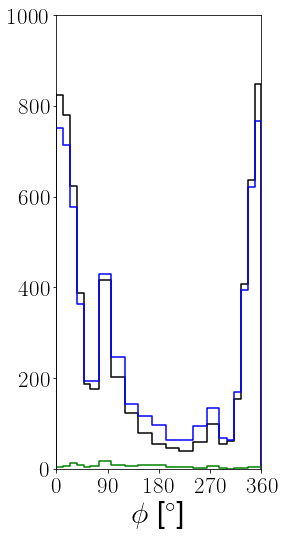

In [23]:
Q2xBtbin = 113
plt.rcParams["figure.figsize"] = (4.5, 8)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30

extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb"], color = 'k')
extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb"]), color = 'b')
extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationInb3"], color = 'g')
plt.xlim([0, 360])
plt.ylim([0, 1000])

plt.xticks([0, 90, 180, 270, 360])
plt.xlabel(r"$\phi$"+ " ["+degree+"]")
plt.savefig("rawyieldsInb{}.pdf".format(Q2xBtbin))

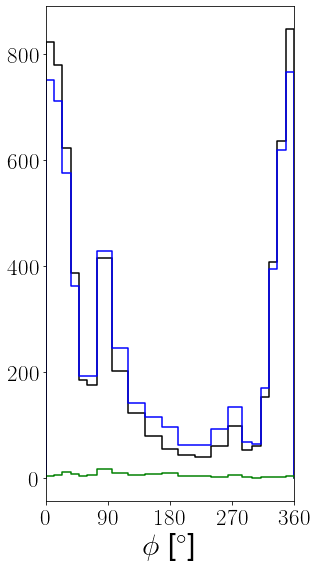

In [277]:
Q2xBtbin = 113
plt.rcParams["figure.figsize"] = (4.5, 8)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30

extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb"], color = 'k')
extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb"]), color = 'b')
extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationInb3"], color = 'g')
plt.xlim([0, 360])
plt.xticks([0, 90, 180, 270, 360])
plt.xlabel(r"$\phi$"+ " ["+degree+"]")
plt.savefig("rawyieldsOutb{}.pdf".format(Q2xBtbin))

In [286]:
%matplotlib inline
for Q2xBtbin in counts.loc[counts.tbin==1, "Q2xBtbin"].unique():

    plt.rcParams["figure.figsize"] = (6, 8)
    plt.rcParams["axes.titlesize"] = 35
    plt.rcParams["axes.labelsize"] = 30

    extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb"], color = 'k', label = "Exp.")
    extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb"]), color = 'b', label = "Sim.")
    extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationInb1"], color = 'g', label = "Bkg.")
    plt.xlim([0, 360])
    plt.xticks([0, 90, 180, 270, 360])
    plt.xlabel(r"$\phi$"+ " ["+degree+"]")
    plt.legend(loc = 'upper right')
    plt.savefig("rawyieldsInb{}.pdf".format(Q2xBtbin))
    plt.clf()

<Figure size 432x576 with 0 Axes>

In [287]:
%matplotlib inline
for Q2xBtbin in counts.loc[counts.tbin==1, "Q2xBtbin"].unique():

    plt.rcParams["figure.figsize"] = (6, 8)
    plt.rcParams["axes.titlesize"] = 35
    plt.rcParams["axes.labelsize"] = 30

    extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb"], color = 'k', label = "Exp.")
    extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb"]), color = 'b', label = "Sim.")
    extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationOutb1"], color = 'g', label = "Bkg.")
    plt.xlim([0, 360])
    plt.xticks([0, 90, 180, 270, 360])
    plt.xlabel(r"$\phi$"+ " ["+degree+"]")
    plt.legend(loc = 'upper right')
    plt.savefig("rawyieldsOutb{}.pdf".format(Q2xBtbin))
    plt.clf()

<Figure size 432x576 with 0 Axes>

In [26]:
%matplotlib inline
for Q2xBtbin in counts.loc[counts.tbin==1, "Q2xBtbin"].unique():

    plt.rcParams["figure.figsize"] = (6, 8)
    plt.rcParams["axes.titlesize"] = 35
    plt.rcParams["axes.labelsize"] = 30

    extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb"], color = 'k', label = "Exp.")
    extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb"])+counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb"]), color = 'b', label = "Sim.")
    extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationInb1"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationOutb1"], color = 'g', label = "Bkg.")
    plt.xlim([0, 360])
    plt.ylim([0, 1800])
    plt.xticks([0, 90, 180, 270, 360])
    plt.xlabel(r"$\phi$"+ " ["+degree+"]")
    plt.legend(loc = 'upper right', bbox_to_anchor = (0.9, 0.9))
    plt.savefig("rawyields{}.pdf".format(Q2xBtbin))
    plt.clf()

<Figure size 432x576 with 0 Axes>

In [275]:
%matplotlib inline
for Q2xBtbin in counts.loc[counts.tbin==1, "Q2xBtbin"].unique():

    plt.rcParams["figure.figsize"] = (6, 8)
    plt.rcParams["axes.titlesize"] = 35
    plt.rcParams["axes.labelsize"] = 30

    plt.hist2d(epgExp.loc[epgExp.Q2xBtbin == Q2xBtbin, "xB"], epgExp.loc[epgExp.Q2xBtbin == Q2xBtbin, "Q2"], bins= [np.linspace(0, 1, 101), np.linspace(0, 11, 101)], cmap = cmap, cmin = 1)
    plt.plot(np.linspace(c0,c0, 101), np.linspace(y1, y2, 101), color='k')
    plt.plot(np.linspace(c1,c1, 101), np.linspace(y1, np.sqrt(y2*y3), 101), color='k')
    plt.plot(np.linspace(c2,c2, 101), np.linspace(y1, y3, 101), color='k')
    plt.plot(np.linspace(c3,c3, 101), np.linspace(y1, np.sqrt(y3*y4), 101), color='k')
    plt.plot(np.linspace(c4,c4, 101), np.linspace(y2, y4, 101), color='k')
    plt.plot(np.linspace(d1,d1, 101), np.linspace(np.sqrt(y2*y3), np.sqrt(y4*y5), 101), color='k')

    plt.plot(np.linspace(c0, d0, 101), np.linspace(y2, y2, 101), color='k')
    plt.plot(np.linspace(c1, d1, 101), np.linspace(np.sqrt(y2*y3), np.sqrt(y2*y3), 101), color='k')
    plt.plot(np.linspace(c2, d2, 101), np.linspace(y3, y3, 101), color='k')
    plt.plot(np.linspace(c3, d3, 101), np.linspace(np.sqrt(y3*y4), np.sqrt(y3*y4), 101), color='k')
    plt.plot(np.linspace(c4, d4, 101), np.linspace(y4, y4, 101), color='k')
    plt.plot(np.linspace(c5, d5, 101), np.linspace(np.sqrt(y4*y5), np.sqrt(y4*y5), 101), color='k')
    plt.plot(np.linspace(c6, d6, 101), np.linspace(y5, y5, 101), color='k')
#     plt.xlim([0, 360])
#     plt.xticks([0, 90, 180, 270, 360])
#     plt.xlabel(r"$\phi$"+ " ["+degree+"]")
    plt.savefig("kinecoverage{}.pdf".format(Q2xBtbin))
    plt.clf()

<Figure size 432x576 with 0 Axes>

In [24]:
counts.loc[:, "accInb"] = np.divide(counts.dvcsSimInb50nA, counts.dvcsSimInb50nAGen, out = np.zeros(counts.dvcsSimInb50nAGen.shape, dtype = float), where = counts.dvcsSimInb50nA!=0)
counts.loc[:, "accOutb"] = np.divide(counts.dvcsSimOutb50nA, counts.dvcsSimOutb50nAGen, out = np.zeros(counts.dvcsSimOutb50nAGen.shape, dtype = float), where = counts.dvcsSimOutb50nA!=0)
counts.loc[:, "invaccInb"] = np.divide(counts.dvcsSimInb50nAGen, counts.dvcsSimInb50nA, out = np.zeros(counts.dvcsSimInb50nAGen.shape, dtype = float), where = counts.dvcsSimInb50nA!=0)
counts.loc[:, "invaccOutb"] = np.divide(counts.dvcsSimOutb50nAGen, counts.dvcsSimOutb50nA, out = np.zeros(counts.dvcsSimOutb50nAGen.shape, dtype = float), where = counts.dvcsSimOutb50nA!=0)

weight1 = counts.loc[:, "dvcsExpInb"]
weight2 = counts.loc[:, "dvcsExpOutb"]
counts.loc[:, "acc"] = np.divide(counts.accInb * weight1 + counts.accOutb * weight2, weight1 + weight2, out = np.zeros(weight1.shape), where = weight1+weight2>0)
counts.loc[:, "invacc"] = np.divide(counts.invaccInb * weight1 + counts.invaccOutb * weight2, weight1 + weight2, out = np.zeros(weight1.shape), where = weight1+weight2>0)

In [296]:
%matplotlib inline
for Q2xBtbin in counts.loc[counts.tbin==1, "Q2xBtbin"].unique():

    plt.rcParams["figure.figsize"] = (6, 8)
    plt.rcParams["axes.titlesize"] = 35
    plt.rcParams["axes.labelsize"] = 30

    extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb"], color = 'b', label = "Inb.")
    extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb"], color = 'r', label = "Outb.")
    extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "acc"], color = 'k', label = "Averaged")
    plt.xlim([0, 360])
    plt.xticks([0, 90, 180, 270, 360])
    plt.xlabel(r"$\phi$"+ " ["+degree+"]")
    plt.legend(loc = 'upper right')
    plt.ylabel("Acceptances")
    plt.savefig("acc{}Note.pdf".format(Q2xBtbin))
    plt.clf()

<Figure size 432x576 with 0 Axes>

In [29]:
%matplotlib inline
for Q2xBtbin in counts.loc[counts.tbin==1, "Q2xBtbin"].unique():

    plt.rcParams["figure.figsize"] = (6, 8)
    plt.rcParams["axes.titlesize"] = 35
    plt.rcParams["axes.labelsize"] = 30

#     extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb"], color = 'b', label = "Inb.")
#     extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb"], color = 'r', label = "Outb.")
    extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "acc"], color = 'k', label = "Averaged")
    plt.xlim([0, 360])
    plt.ylim([0, 0.12])
    plt.xticks([0, 90, 180, 270, 360])
    plt.xlabel(r"$\phi$"+ " ["+degree+"]")
#     plt.legend(loc = 'upper right')
    plt.ylabel("Acceptances")
    plt.savefig("acc{}.pdf".format(Q2xBtbin))
    plt.clf()

<Figure size 432x576 with 0 Axes>

In [25]:
counts.loc[:, "dvcsExp"] = counts.dvcsExpInb + counts.dvcsExpOutb

In [33]:
charge = inbcharge + outbcharge

In [34]:
counts.loc[:, "xsec"] = np.where(counts.dvcsExp > 10, counts.dvcsExp*counts.invacc/counts.binVol/charge/1.324, 0)
counts.loc[:, "uncxsec"] = np.where(counts.dvcsExp > 10, counts.dvcsExp*counts.invacc/counts.binVol/charge/1.324, 0)

In [35]:
counts.loc[:, "contamination1"] = counts.loc[:, "contaminationInb1"] + counts.loc[:, "contaminationOutb1"]

In [36]:
counts.loc[:, "epgExp"] = counts.epgExpInb + counts.epgExpOutb
counts.loc[:, "dvcsSim50nA"] = counts.dvcsSimInb50nA + counts.dvcsSimOutb50nA
counts.loc[:, "bkg1gSim50nA"] = counts.bkg1gSimInb50nA + counts.bkg1gSimOutb50nA
counts.loc[:, "bkg2gSim50nA"] = counts.bkg2gSimInb50nA + counts.bkg2gSimOutb50nA
counts.loc[:, "contamination1"] = counts.contaminationInb1 + counts.contaminationOutb1
counts.loc[:, "pi0Exp"] = counts.pi0ExpInb + counts.pi0ExpOutb

In [37]:
factorInb1 = np.divide(1-counts.accInb, counts.dvcsSimInb50nA, out = np.zeros(counts.dvcsSimInb50nA.shape), where = counts.dvcsSimInb50nA!=0)
factorInb2 = np.divide(np.ones(counts.epgExpInb.shape), counts.epgExpInb, out = np.zeros(counts.epgExpInb.shape), where = counts.epgExpInb!=0)
factorInb3 = np.divide(counts.contaminationInb1**2, counts.epgExpInb**2, out = np.zeros(counts.epgExpInb.shape), where = counts.epgExpInb!=0)
factorInb3 = factorInb3 * (np.divide(np.ones(counts.pi0ExpInb.shape), counts.pi0ExpInb, out = np.zeros(counts.pi0ExpInb.shape), where = counts.pi0ExpInb!=0) + np.divide(np.ones(counts.bkg2gSimInb50nA.shape), counts.bkg2gSimInb50nA, out = np.zeros(counts.bkg2gSimInb50nA.shape), where = counts.bkg2gSimInb50nA!=0)+ np.divide(np.ones(counts.bkg1gSimInb50nA.shape), counts.bkg1gSimInb50nA, out = np.zeros(counts.bkg1gSimInb50nA.shape), where = counts.bkg1gSimInb50nA!=0))
factorInb = np.sqrt(factorInb1+factorInb2+factorInb3)

factorOutb1 = np.divide(1-counts.accOutb, counts.dvcsSimOutb50nA, out = np.zeros(counts.dvcsSimOutb50nA.shape), where = counts.dvcsSimOutb50nA!=0)
factorOutb2 = np.divide(np.ones(counts.epgExpOutb.shape), counts.epgExpOutb, out = np.zeros(counts.epgExpOutb.shape), where = counts.epgExpOutb!=0)
factorOutb3 = np.divide(counts.contaminationOutb1**2, counts.epgExpOutb**2, out = np.zeros(counts.epgExpOutb.shape), where = counts.epgExpOutb!=0)
factorOutb3 = factorOutb3 * (np.divide(np.ones(counts.pi0ExpOutb.shape), counts.pi0ExpOutb, out = np.zeros(counts.pi0ExpOutb.shape), where = counts.pi0ExpOutb!=0) + np.divide(np.ones(counts.bkg2gSimOutb50nA.shape), counts.bkg2gSimOutb50nA, out = np.zeros(counts.bkg2gSimOutb50nA.shape), where = counts.bkg2gSimOutb50nA!=0)+ np.divide(np.ones(counts.bkg1gSimOutb50nA.shape), counts.bkg1gSimOutb50nA, out = np.zeros(counts.bkg1gSimOutb50nA.shape), where = counts.bkg1gSimOutb50nA!=0))
factorOutb = np.sqrt(factorOutb1+factorOutb2+factorOutb3)

In [38]:
factor1 = np.divide(1-counts.acc, counts.dvcsSim50nA, out = np.zeros(counts.dvcsSim50nA.shape), where = counts.dvcsSim50nA!=0)
factor2 = np.divide(np.ones(counts.epgExp.shape), counts.epgExp, out = np.zeros(counts.epgExp.shape), where = counts.epgExp!=0)
factor3 = np.divide(counts.contamination1**2, counts.epgExp**2, out = np.zeros(counts.epgExp.shape), where = counts.epgExp!=0)
factor3 = factor3 * (np.divide(np.ones(counts.pi0Exp.shape), counts.pi0Exp, out = np.zeros(counts.pi0Exp.shape), where = counts.pi0Exp!=0) + np.divide(np.ones(counts.bkg2gSim50nA.shape), counts.bkg2gSim50nA, out = np.zeros(counts.bkg2gSim50nA.shape), where = counts.bkg2gSim50nA!=0)+ np.divide(np.ones(counts.bkg1gSim50nA.shape), counts.bkg1gSim50nA, out = np.zeros(counts.bkg1gSim50nA.shape), where = counts.bkg1gSim50nA!=0))
factor = np.sqrt(factor1+factor2+factor3)

In [39]:
counts.loc[:, "factorInb1"] = factorInb1
counts.loc[:, "factorInb2"] = factorInb2
counts.loc[:, "factorInb3"] = factorInb3
counts.loc[:, "factorInb"]  = factorInb

counts.loc[:, "factorOutb1"] = factorOutb1
counts.loc[:, "factorOutb2"] = factorOutb2
counts.loc[:, "factorOutb3"] = factorOutb3
counts.loc[:, "factorOutb"]  = factorOutb

In [40]:
counts.loc[:, "factor1"] = factor1
counts.loc[:, "factor2"] = factor2
counts.loc[:, "factor3"] = factor3
counts.loc[:, "factor"]  = factor

In [41]:
counts.loc[:, "xsecInb"] = np.where(counts.dvcsExpInb > 10, counts.dvcsExpInb*counts.invacc/counts.binVol/inbcharge/1.324, 0)
counts.loc[:, "uncxsecInb"] = counts.loc[:, "xsecInb"]*counts.factorInb

counts.loc[:, "xsecOutb"] = np.where(counts.dvcsExpOutb > 10, counts.dvcsExpOutb*counts.invacc/counts.binVol/outbcharge/1.324, 0)
counts.loc[:, "uncxsecOutb"] = counts.loc[:, "xsecOutb"]*counts.factorOutb

In [42]:
weightInb = np.divide(np.ones(counts.loc[:, "uncxsecInb"].shape), counts.loc[:, "uncxsecInb"]**2, out = np.zeros(counts.loc[:, "uncxsecInb"].shape), where = counts.loc[:, "uncxsecInb"]>0)
weightOutb = np.divide(np.ones(counts.loc[:, "uncxsecOutb"].shape), counts.loc[:, "uncxsecOutb"]**2, out = np.zeros(counts.loc[:, "uncxsecOutb"].shape), where = counts.loc[:, "uncxsecOutb"]>0)
weightSum = weightInb + weightOutb
counts.loc[:, "xsec"] = np.divide(counts.loc[:, "xsecInb"]*weightInb+counts.loc[:, "xsecOutb"]*weightOutb, weightSum, out = np.zeros(counts.loc[:, "xsecInb"].shape), where = weightSum>0)
counts.loc[:, "uncxsec"] = np.sqrt(np.divide(np.ones(counts.loc[:, "xsecInb"].shape), weightSum, out = np.zeros(counts.loc[:, "xsecInb"].shape), where = weightSum>0))

In [206]:
trueVol

Q2bin     Q2_i   Q2_f  tbin    t_i    t_f  xBbin      xB_i      xB_f  \
0         0  1.00000  1.456     0  0.088  0.177      0  0.061936  0.090178   
1         0  1.00000  1.456     0  0.088  0.177      0  0.061936  0.090178   
2         0  1.00000  1.456     0  0.088  0.177      0  0.061936  0.090178   
3         0  1.00000  1.456     0  0.088  0.177      0  0.061936  0.090178   
4         0  1.00000  1.456     0  0.088  0.177      0  0.061936  0.090178   
...     ...      ...    ...   ...    ...    ...    ...       ...       ...   
3420      6  5.76062  7.671     6  1.460  1.720      0  0.356788  0.710894   
3421      6  5.76062  7.671     6  1.460  1.720      0  0.356788  0.710894   
3422      6  5.76062  7.671     6  1.460  1.720      0  0.356788  0.710894   
3423      6  5.76062  7.671     6  1.460  1.720      0  0.356788  0.710894   
3424      6  5.76062  7.671     6  1.460  1.720      0  0.356788  0.710894   

      phibin  ...    binVol  TruebinVol    xBavg1    Q2avg1     tavg1  \
0          2  ...  0.000120    0.000140  0.077455  1.141172  0.130369   
1          3  ...  0.000120    0.000140  0.077455  1.141172  0.130369   
2          4  ...  0.000120    0.000140  0.077455  1.141172  0.130369   
3          5  ...  0.000120    0.000140  0.077455  1.141172  0.130369   
4          6  ...  0.000240    0.000280  0.077455  1.141172  0.130369   
...      ...  ...       ...         ...       ...       ...       ...   
3420      16  ...  0.027658    0.019356  0.488268  6.573676  1.583274   
3421      17  ...  0.027658    0.023336  0.488268  6.573676  1.583274   
3422      18  ...  0.027658    0.026263  0.488268  6.573676  1.583274   
3423      19  ...  0.027658    0.027741  0.488268  6.573676  1.583274   
3424      20  ...  0.027658    0.028509  0.488268  6.573676  1.583274   

        xBavg2    Q2avg2     tavg2     phiavg2      xsecavg  
0     0.077711  1.140986  0.128884   29.506262  4388.215332  
1     0.078063  1.142006  0.127039   41.558445  2657.537354  
2     0.078285  1.143256  0.125752   53.606995  1733.168335  
3     0.078425  1.144097  0.124898   65.658653  1196.886963  
4     0.078523  1.145567  0.124219   82.903793   775.510986  
...        ...       ...       ...         ...          ...  
3420  0.527810  6.688167  1.575077  306.458801     0.020670  
3421  0.512475  6.629696  1.580959  318.469788     0.037268  
3422  0.496036  6.595932  1.582577  330.480103     0.078695  
3423  0.471466  6.520715  1.586712  342.652588     0.243109  
3424  0.461786  6.512287  1.586644  353.975311     0.569185  

[3425 rows x 25 columns]

In [207]:
counts.loc[:, "xsec"] = np.where(counts.dvcsExp > 10, counts.dvcsExp*counts.invacc/trueVol.TruebinVol/charge/1.324, 0)
counts.loc[:, "uncxsec"] = counts.loc[:, "xsec"]*counts.factor

In [44]:
counts.loc[counts.Q2xBtbin == 92, "factorInb"]

1852    0.076697
1853    0.079474
1854    0.077491
1855    0.080898
1856    0.097096
1857    0.118085
1858    0.107382
1859    0.112308
1860    0.086609
1861    0.111286
1862    0.095548
1863    0.101647
1864    0.101519
1865    0.122201
1866    0.169395
1867    0.194680
1868    0.128813
1869    0.103411
1870    0.087094
1871    0.077716
1872    0.080671
Name: factorInb, dtype: float64

In [45]:
counts.loc[counts.Q2xBtbin == 92, "dvcsSimInb50nA1"]

1852       0
1853       2
1854       1
1855       1
1856      10
1857      44
1858     844
1859    2642
1860    4515
1861    2597
1862    2997
1863    2919
1864    3401
1865    2261
1866     465
1867      27
1868      13
1869       9
1870       3
1871       2
1872       1
Name: dvcsSimInb50nA1, dtype: int64

In [488]:
Frads

{(1, 0.3): [1.0016037419387662,
  0.9929678307616825,
  0.9847874583555449,
  0.9748240826143304,
  0.9630000923258791,
  0.9539932681437178,
  0.9483691409355921,
  0.9464886553004175,
  0.9484601875384557,
  0.9539000322993063,
  0.9627128896891626,
  0.9745489208026366,
  0.9845803087640447,
  0.9929944493907307,
  1.0015483068335926],
 (8, 0.3): [0.9706722046408084,
  0.9782338694696362,
  0.979857952687992,
  0.9775557207140385,
  0.9719987315021513,
  0.9656008208734813,
  0.9562898599212254,
  0.943976483590004,
  0.934380746065481,
  0.9283273023245452,
  0.9263704538516132,
  0.928291544463847,
  0.9343045404946492,
  0.9437983840318773,
  0.956066650898863,
  0.9656589858936878,
  0.9720043721700752,
  0.977613145085448,
  0.9799162566797488,
  0.9780918261223758,
  0.9705441925811779],
 (15, 0.3): [0.9425816832685817,
  0.949755034845327,
  0.9560840498366516,
  0.9571100726469806,
  0.9542692616734866,
  0.94853055605313,
  0.9383718837249082,
  0.9246175468689133,
  0.9139

In [245]:
Frads = {(1, 0.3): [1.0016037419387662,
  0.9929678307616825,
  0.9847874583555449,
  0.9748240826143304,
  0.9630000923258791,
  0.9539932681437178,
  0.9483691409355921,
  0.9464886553004175,
  0.9484601875384557,
  0.9539000322993063,
  0.9627128896891626,
  0.9745489208026366,
  0.9845803087640447,
  0.9929944493907307,
  1.0015483068335926],
 (8, 0.3): [0.9706722046408084,
  0.9782338694696362,
  0.979857952687992,
  0.9775557207140385,
  0.9719987315021513,
  0.9656008208734813,
  0.9562898599212254,
  0.943976483590004,
  0.934380746065481,
  0.9283273023245452,
  0.9263704538516132,
  0.928291544463847,
  0.9343045404946492,
  0.9437983840318773,
  0.956066650898863,
  0.9656589858936878,
  0.9720043721700752,
  0.977613145085448,
  0.9799162566797488,
  0.9780918261223758,
  0.9705441925811779],
 (15, 0.3): [0.9425816832685817,
  0.949755034845327,
  0.9560840498366516,
  0.9571100726469806,
  0.9542692616734866,
  0.94853055605313,
  0.9383718837249082,
  0.9246175468689133,
  0.9139978684764841,
  0.9073960242868631,
  0.9053264531795758,
  0.9074955336051331,
  0.914061320100576,
  0.9246012174721868,
  0.9383843863005281,
  0.9483696313975664,
  0.9543044409147241,
  0.9570750969222497,
  0.9559078079084329,
  0.9494409142871019,
  0.9426552819415908],
 (22, 0.3): [0.9250500302413354,
  0.9335561387595801,
  0.9421154070136317,
  0.9434995451867457,
  0.939861861446014,
  0.9329999678788958,
  0.921893392069775,
  0.9069945910129725,
  0.8958663737853464,
  0.8888853599389216,
  0.8866755053160926,
  0.8889095505294066,
  0.8957528351915826,
  0.9069683609217388,
  0.921986385084317,
  0.9331236797116232,
  0.9400800633842965,
  0.9434435964684768,
  0.9421726875789319,
  0.9337605243652092,
  0.9252397186883058],
 (29, 0.3): [0.9301287302683319,
  0.9329636445915258,
  0.9339647341580724,
  0.9296349225510502,
  0.9224238870350171,
  0.914633563196165,
  0.9029855904337485,
  0.8886756577365945,
  0.8781865955922086,
  0.8720700391621653,
  0.869891048043143,
  0.872001472583303,
  0.8781164547011445,
  0.8886416758946847,
  0.9030035372912515,
  0.9146926175788103,
  0.922711316879776,
  0.9296130533791562,
  0.9338557037209018,
  0.933126262148496,
  0.9303119561838468],
 (36, 0.3): [0.9800552900772739,
  0.9912328600547555,
  0.9896478420779957,
  0.9839870041935882,
  0.9767409039943387,
  0.9695203942488961,
  0.9598595020397616,
  0.9481672132062584,
  0.9397157897480827,
  0.9345894356125517,
  0.9328198691110217,
  0.9344209805939419,
  0.9397933597080999,
  0.9483269966356432,
  0.9599546704240056,
  0.9695819626434121,
  0.9767687104902205,
  0.9840036198811433,
  0.9896959284606334,
  0.991327492197277,
  0.9800305059486685],
 (43, 0.3): [0.9628658229475394,
  0.9642560413251944,
  0.9637462672407149,
  0.9610036389931333,
  0.9566228553450528,
  0.9508859939002885,
  0.9420780804055181,
  0.9304985611698394,
  0.9217137293166334,
  0.9164942590819547,
  0.9146157927422738,
  0.916329084903047,
  0.9217655223120589,
  0.930544107987781,
  0.9419722953415398,
  0.9506142483277156,
  0.9563464092687407,
  0.9609733763522039,
  0.9640518339034476,
  0.9643311232705409,
  0.963039426525152],
 (50, 0.3): [0.9321447598735264,
  0.9353192178845084,
  0.9371822269711787,
  0.9368687260975705,
  0.9344279807494281,
  0.9292757306573809,
  0.9207340813508391,
  0.9089681508498858,
  0.8997042088978933,
  0.8938485523255558,
  0.8920415651777639,
  0.8938756621273624,
  0.8996571795208093,
  0.9089596920378065,
  0.9208361923420533,
  0.9292290696342923,
  0.934213384615808,
  0.936930687057371,
  0.9370298255100693,
  0.9350805243293884,
  0.9322777926293417],
 (57, 0.3): [0.915443888388146,
  0.9187613474383546,
  0.9203936063014999,
  0.9193980745838919,
  0.9159078331243169,
  0.9114102212597548,
  0.9025211286504514,
  0.8906241158860445,
  0.8814230883369616,
  0.8759648510228772,
  0.873971606573861,
  0.87603272345077,
  0.8815979936169043,
  0.8906641277055218,
  0.9024638466641433,
  0.9112629632354553,
  0.9163213727506488,
  0.9196624807378745,
  0.9204937456443469,
  0.9185330856560607,
  0.9153084222330798],
 (64, 0.3): [0.9144257615791221,
  0.9123315815106373,
  0.9082119679436162,
  0.9029731069399032,
  0.8968331469673188,
  0.8909991040378715,
  0.8827107210721945,
  0.872603949922346,
  0.8654411749462162,
  0.8609054539483686,
  0.859521518882888,
  0.8610295084638081,
  0.8652492066973746,
  0.872786924569834,
  0.8826427552393014,
  0.8908636130042994,
  0.8971348200488755,
  0.9028157646316975,
  0.9082694847317281,
  0.9119042133451729,
  0.9141555269176467],
 (71, 0.3): [0.9721473251152849,
  0.9731307810791907,
  0.9711470274379319,
  0.9666768065718712,
  0.9610676747245874,
  0.9547559709866635,
  0.9458175178372469,
  0.9347823902074729,
  0.9264837673178006,
  0.9218460669738018,
  0.9197171864098495,
  0.9216735834441746,
  0.9266014572794949,
  0.9350059270809978,
  0.9459930347889751,
  0.9547799229528109,
  0.9608970392158135,
  0.9667661246010641,
  0.9713768023834661,
  0.9732064337607319,
  0.9722781451054872],
 (78, 0.3): [0.9471201801631909,
  0.9469336673906447,
  0.9458389725843191,
  0.9426216515094814,
  0.9387551717103478,
  0.9336421451436888,
  0.9257678234432926,
  0.9152292199574447,
  0.9073747924804048,
  0.9022233308795147,
  0.9005172561793086,
  0.9024064338875241,
  0.9071724876403718,
  0.9153815477937335,
  0.9256428333356547,
  0.9335487996066368,
  0.9387951467619937,
  0.9429135463882625,
  0.9456924446578314,
  0.9468402855073292,
  0.9471286549835399],
 (85, 0.3): [0.9165252425238511,
  0.9170723290258224,
  0.9172184371801866,
  0.9158404720659958,
  0.913086803045191,
  0.9093339382931387,
  0.9024317665398162,
  0.8927735314741414,
  0.8850737204312557,
  0.8799036147505342,
  0.8784247715739887,
  0.8799938772788887,
  0.8849075162205615,
  0.8926727952787428,
  0.9022629860905655,
  0.9093129406255637,
  0.9131119504336614,
  0.9158388751710982,
  0.9172466238204373,
  0.9171761353429279,
  0.9165238780018634],
 (92, 0.3): [0.8984096296970817,
  0.89749147237034,
  0.8963527959404612,
  0.8931859951579899,
  0.8892206683143232,
  0.8848620610806239,
  0.8785583232731793,
  0.8706239140946954,
  0.8641504134621809,
  0.8604014198355505,
  0.8590649527345113,
  0.8604332966173333,
  0.864012436752979,
  0.8704804933101286,
  0.8787169994635338,
  0.884795074528363,
  0.889215721999053,
  0.8931723293888877,
  0.8959176688502186,
  0.8976414375013269,
  0.8982670357998358],
 (99, 0.3): [0.8682908213126495,
  0.8685689658057469,
  0.8640471183450257,
  0.8583290039843464,
  0.8520286934233927,
  0.8470244510871062,
  0.8398646447553069,
  0.8290538526305656,
  0.824565067966484,
  0.8206115335851732,
  0.8192985470642922,
  0.8224429139310354,
  0.830320758389885,
  0.8381152088370792,
  1,
  0.8987371537423523,
  0.8584373912583334,
  0.8632977912555923,
  1,
  0.8702675479056737],
 (106, 0.3): [0.9559628189748205,
  0.9553213528949355,
  0.9527489153245272,
  0.9488882206755794,
  0.9438456469884068,
  0.9386790437063829,
  0.9306637043959559,
  0.9208164229213456,
  0.9130667290261824,
  0.9084525237473416,
  0.9068944582209689,
  0.9084821220002226,
  0.9132633796837392,
  0.9208348663786108,
  0.9306919461868888,
  0.9388306299219289,
  0.9441454135010977,
  0.9488863245026566,
  0.9529534022999115,
  0.9549593426279293,
  0.9561433218431138],
 (113, 0.3): [0.928365313185388,
  0.9275481174042235,
  0.9258423597791335,
  0.9232132417403499,
  0.9197434961625406,
  0.9155846352494171,
  0.9086410606989695,
  0.9000287126231714,
  0.8927950133214215,
  0.8885260544718301,
  0.8870995257739426,
  0.8884471695911514,
  0.892922375707078,
  0.8998839126628803,
  0.9087515046541954,
  0.9154023634202754,
  0.9197911324509657,
  0.9230838382662425,
  0.9257769026852375,
  0.9276822720269977,
  0.9283431826346115],
 (120, 0.3): [0.8937468936063703,
  0.8936499286050322,
  0.8923490294412989,
  0.8904003800144003,
  0.8877581250675062,
  0.8845679961055474,
  0.8796569997420077,
  0.8728600447789522,
  0.8672802606738877,
  0.8637389989847977,
  0.8626142429021952,
  0.863833655610879,
  0.8673118908615922,
  0.8728014822703658,
  0.879442136614509,
  0.884647000316608,
  0.8878626119097192,
  0.8907838401048789,
  0.8924007768555037,
  0.8936630601607283,
  0.8940013796782267],
 (127, 0.3): [0.8604808420931954,
  0.8600951993427679,
  0.8563029883737872,
  0.8524438650610842,
  0.8471892737135182,
  0.843270330755992,
  0.8376216531640281,
  0.8304283038083606,
  0.8254977809889834,
  0.8216454280541888,
  0.8217551000110314,
  0.8220276192823579,
  0.8267703281479607,
  0.8311900513831589,
  0.8378890234492781,
  0.8456034658538215,
  1,
  0.8530333986631317,
  0.8555725737666932,
  1,
  0.8624022764249728],
 (134, 0.3): [0.936201116288028,
  0.9350133487059297,
  0.9327847494970267,
  0.9291245832437524,
  0.9254659138971983,
  0.921058436108145,
  0.9144811608167126,
  0.9060324121763735,
  0.8996120491637654,
  0.8951677757142332,
  0.8939577653140538,
  0.8952487561495125,
  0.8994160768229805,
  0.9059557261941433,
  0.9146212623548378,
  0.9209555346383744,
  0.9255570043056782,
  0.929426813262368,
  0.9328845641283929,
  0.9350056476215335,
  0.9360436156051275],
 (141, 0.3): [0.9025662447711952,
  0.9020389704892904,
  0.9004919234446688,
  0.8981214473744,
  0.8949935829384119,
  0.8922630510834978,
  0.886995700387808,
  0.880784398665336,
  0.8758027463784044,
  0.872472092994087,
  0.8712468986987644,
  0.8726504091337722,
  0.8756547073350691,
  0.8806853221719231,
  0.8872562141557534,
  0.8920980577729459,
  0.8953499913075602,
  0.8979459480322842,
  0.900480583422247,
  0.9022096480703938,
  0.9029176688211706],
 (148, 0.3): [0.8661514571334084,
  0.8669059196448202,
  0.8650042526325462,
  0.8620140173767556,
  0.8606099041748495,
  1,
  0.8539866582723715,
  0.8492023069255803,
  0.8470184175482863,
  0.8446257030621657,
  0.839129258509909,
  0.8447783656598217,
  0.8455787048313617,
  0.8513074705653846,
  1,
  0.8585948250991152,
  0.8620666383096303,
  0.8643651678043824,
  0.8659592193124221,
  0.866797980822913,
  0.8673241868333071],
 (155, 0.3): [0.9071642145660117,
  0.9062813000962384,
  0.9049306513583518,
  0.9024797379454947,
  0.8999400663013298,
  0.8969523197508885,
  0.8927008588663509,
  0.8872885046461096,
  0.8827437074012038,
  0.8799017588820115,
  0.8791971592639684,
  0.8799313670943474,
  0.8827830735292164,
  0.8871254692667243,
  0.8924927203742642,
  0.8969875363724834,
  0.8999170599182813,
  0.9025683467596972,
  0.9047979302005629,
  0.9064967161898821,
  0.907500251167306],
 (162, 0.3): [0.8731079925396176,
  0.8729639515874129,
  0.8724411586983244,
  0.8720439080416631,
  0.8708136871054962,
  0.8702554667965798,
  0.8693424144081355,
  0.8680827968894177,
  0.867204740987473,
  0.8666924211431225,
  0.8665859229087022,
  0.8667096572063966,
  0.8673403143645022,
  0.8681455961407121,
  0.8693965473075553,
  0.8702039621188612,
  0.8710639466212085,
  0.8717304838459876,
  0.8724149237233791,
  0.87309405403399,
  0.8731539941849933],
 (169, 0.3): [0.8883510968068523,
  0.8878525740391099,
  0.8874201339121787,
  0.8871264790643778,
  0.885631440893007,
  0.8848511570239076,
  0.8841583862440805,
  0.8824711472798388,
  0.8816104655429037,
  0.8808774385736119,
  0.8804636610133929,
  0.8810851254951606,
  0.8814855054541773,
  0.8824601574022225,
  0.884114058264031,
  0.884833090091375,
  0.8859037556057944,
  0.8866604154360554,
  0.8875169758085315,
  0.8881681566027,
  0.8879246747664274]}

In [226]:
%matplotlib inline
for Q2xBtbin in counts.loc[counts.tbin==1, "Q2xBtbin"].unique():

    plt.rcParams["figure.figsize"] = (4.5, 6)
    plt.rcParams["axes.titlesize"] = 35
    plt.rcParams["axes.labelsize"] = 30
    f = plt.figure(figsize=(4.5, 6))
    ax = f.add_subplot(111)

#     extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb"], color = 'b', label = "Inb.")
#     extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb"], color = 'r', label = "Outb.")
#     extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "xsec"], color = 'k', label = "Averaged")
    print(Q2xBtbin)
    xsec = counts.loc[counts.Q2xBtbin == Q2xBtbin, "xsec"]/Frads[Q2xBtbin, 0.3]
    uncxsec = counts.loc[counts.Q2xBtbin == Q2xBtbin, "uncxsec"]/Frads[Q2xBtbin, 0.3]
    ax.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"], xsec, xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"]], yerr = uncxsec, color = 'k', linestyle = '', label = 'data')

#     plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r', label = 'pure BH')
#     plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg1"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
#     plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg2"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg2"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg2"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
#     plt.xlim([0, 360])
#     plt.xticks([0, 90, 180, 270, 360])
#     plt.xlabel(r"$\phi$"+ " ["+degree+"]")
#     plt.legend(loc = 'lower right', bbox_to_anchor = (1.2 ,0.85))
#     plt.ylabel("Acceptances")
#     plt.savefig("acc{}.pdf".format(Q2xBtbin))
#     plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")
#     plt.ylim([0, 0.05])
#     plt.yscale('log')
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    plt.savefig("xsec{}.pdf".format(Q2xBtbin))
#     plt.show()
#     break
    plt.clf()

1
8
15
22
29
36
43
50
57
64
71
78
85
92
99
106
113
120
127
134
141


<ipython-input-226-a3f2e330ab45>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(4.5, 6))


148
155
162
169


<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

85


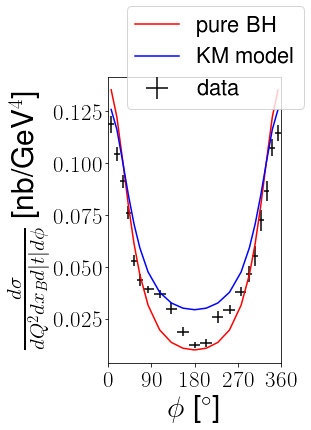

<Figure size 324x432 with 0 Axes>

In [217]:
%matplotlib inline
# for Q2xBtbin in counts.loc[counts.tbin==1, "Q2xBtbin"].unique():

Q2xBtbin = 85
plt.rcParams["figure.figsize"] = (4.5, 6)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30

#     extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb"], color = 'b', label = "Inb.")
#     extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb"], color = 'r', label = "Outb.")
#     extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "xsec"], color = 'k', label = "Averaged")
print(Q2xBtbin)
xsec = counts.loc[counts.Q2xBtbin == Q2xBtbin, "xsec"]/Frads[Q2xBtbin, 0.3]
uncxsec = counts.loc[counts.Q2xBtbin == Q2xBtbin, "uncxsec"]/Frads[Q2xBtbin, 0.3]
plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"], xsec, xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"]], yerr = uncxsec, color = 'k', linestyle = '', label = 'data')

plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r', label = 'pure BH')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printDVCSarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r', label = 'pure BH')
plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printDVCSKMarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'b', label = 'KM model')
#     plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg1"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg2"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg2"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg2"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
plt.xlim([0, 360])
plt.xticks([0, 90, 180, 270, 360])
plt.xlabel(r"$\phi$"+ " ["+degree+"]")
plt.legend(loc = 'lower right', bbox_to_anchor = (1.2 ,0.85))
#     plt.ylabel("Acceptances")
#     plt.savefig("acc{}.pdf".format(Q2xBtbin))
plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")
# plt.ylim([0, 0.05])
#     plt.yscale('log')
plt.show()
plt.savefig("xsec{}.pdf".format(Q2xBtbin))
#     plt.show()
#     break
plt.clf()

In [ ]:
%matplotlib inline
for Q2xBtbin in counts.loc[counts.tbin==1, "Q2xBtbin"].unique():

    Q2xBtbin = 85
    plt.rcParams["figure.figsize"] = (4.5, 6)
    plt.rcParams["axes.titlesize"] = 35
    plt.rcParams["axes.labelsize"] = 30

    #     extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb"], color = 'b', label = "Inb.")
    #     extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb"], color = 'r', label = "Outb.")
    #     extendedstep((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "xsec"], color = 'k', label = "Averaged")
    print(Q2xBtbin)
    xsec = counts.loc[counts.Q2xBtbin == Q2xBtbin, "xsec"]/Frads[Q2xBtbin, 0.3]
    uncxsec = counts.loc[counts.Q2xBtbin == Q2xBtbin, "uncxsec"]/Frads[Q2xBtbin, 0.3]
    plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"], xsec, xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"]], yerr = uncxsec, color = 'k', linestyle = '', label = 'data')

    plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r', label = 'pure BH')
    # plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printDVCSarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r', label = 'pure BH')
    plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printDVCSKMarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'b', label = 'KM model')
    #     plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg1"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
    # plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg2"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg2"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg2"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
    plt.xlim([0, 360])
    plt.xticks([0, 90, 180, 270, 360])
    plt.xlabel(r"$\phi$"+ " ["+degree+"]")
    plt.legend(loc = 'lower right', bbox_to_anchor = (1.2 ,0.85))
    #     plt.ylabel("Acceptances")
    #     plt.savefig("acc{}.pdf".format(Q2xBtbin))
    plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")
    # plt.ylim([0, 0.05])
    #     plt.yscale('log')
    plt.show()
    plt.savefig("xsec{}.pdf".format(Q2xBtbin))
    #     plt.show()
    #     break
    plt.clf()

In [57]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [58]:
counts.loc[:, "pi0ratioInb11"] = np.divide(counts.loc[:, "pi0ExpInb1"], counts.loc[:, "bkg2gSimInb50nA1"], out = np.zeros( counts.loc[:, "bkg2gSimInb50nA1"].shape, dtype=float), where= counts.loc[:, "bkg2gSimInb50nA1"]!=0) 
counts.loc[:, "pi0ratioInb12"] = np.sum(counts.loc[:, "pi0ExpInb1"])/np.sum(counts.loc[:, "bkg2gSimInb50nA1"])
counts.loc[:, "pi0ratioInb13"] = 0
for i in counts.Q2xBtbin.unique():
    counts.loc[counts.Q2xBtbin==i, "pi0ratioInb13"] = np.where(sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimInb50nA1"].to_numpy())>0, sum(counts.loc[counts.Q2xBtbin==i, "pi0ExpInb1"].to_numpy())/sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimInb50nA1"].to_numpy()), 0)


counts.loc[:, "contaminationInb11"] = counts.loc[:, "bkg1gSimInb50nA1"] * counts.loc[:, "pi0ratioInb11"]
counts.loc[:, "contaminationInb12"] = counts.loc[:, "bkg1gSimInb50nA1"] * counts.loc[:, "pi0ratioInb12"]
counts.loc[:, "contaminationInb13"] = counts.loc[:, "bkg1gSimInb50nA1"] * counts.loc[:, "pi0ratioInb13"]

In [59]:
counts.loc[:, "pi0ratioInb21"] = np.divide(counts.loc[:, "pi0ExpInb2"], counts.loc[:, "bkg2gSimInb50nA2"], out = np.zeros(counts.loc[:, "bkg2gSimInb50nA2"].shape, dtype=float), where= counts.loc[:, "bkg2gSimInb50nA2"]!=0) 
counts.loc[:, "pi0ratioInb22"] = np.sum(counts.loc[:, "pi0ExpInb2"])/np.sum(counts.loc[:, "bkg2gSimInb50nA2"])
counts.loc[:, "pi0ratioInb23"] = 0
for i in counts.Q2xBtbin.unique():
    counts.loc[counts.Q2xBtbin==i, "pi0ratioInb23"] = np.where(sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimInb50nA2"].to_numpy())>0, sum(counts.loc[counts.Q2xBtbin==i, "pi0ExpInb2"].to_numpy())/sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimInb50nA2"].to_numpy()), 0)


counts.loc[:, "contaminationInb21"] = counts.loc[:, "bkg1gSimInb50nA2"] * counts.loc[:, "pi0ratioInb21"]
counts.loc[:, "contaminationInb22"] = counts.loc[:, "bkg1gSimInb50nA2"] * counts.loc[:, "pi0ratioInb22"]
counts.loc[:, "contaminationInb23"] = counts.loc[:, "bkg1gSimInb50nA2"] * counts.loc[:, "pi0ratioInb23"]

In [60]:
counts.loc[:, "pi0ratioInb31"] = np.divide(counts.loc[:, "pi0ExpInb3"], counts.loc[:, "bkg2gSimInb50nA3"], out = np.zeros(counts.loc[:, "bkg2gSimInb50nA3"].shape, dtype=float), where= counts.loc[:, "bkg2gSimInb50nA3"]!=0) 
counts.loc[:, "pi0ratioInb32"] = np.sum(counts.loc[:, "pi0ExpInb3"])/np.sum(counts.loc[:, "bkg2gSimInb50nA3"])
counts.loc[:, "pi0ratioInb33"] = 0
for i in counts.Q2xBtbin.unique():
    counts.loc[counts.Q2xBtbin==i, "pi0ratioInb33"] = np.where(sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimInb50nA3"].to_numpy())>0, sum(counts.loc[counts.Q2xBtbin==i, "pi0ExpInb3"].to_numpy())/sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimInb50nA3"].to_numpy()), 0)


counts.loc[:, "contaminationInb31"] = counts.loc[:, "bkg1gSimInb50nA3"] * counts.loc[:, "pi0ratioInb31"]
counts.loc[:, "contaminationInb32"] = counts.loc[:, "bkg1gSimInb50nA3"] * counts.loc[:, "pi0ratioInb32"]
counts.loc[:, "contaminationInb33"] = counts.loc[:, "bkg1gSimInb50nA3"] * counts.loc[:, "pi0ratioInb33"]

In [61]:
counts.loc[:, "pi0ratioOutb11"] = np.divide(counts.loc[:, "pi0ExpOutb1"], counts.loc[:, "bkg2gSimOutb50nA1"], out = np.zeros(counts.loc[:, "bkg2gSimOutb50nA1"].shape, dtype=float), where= counts.loc[:, "bkg2gSimOutb50nA1"]!=0) 
counts.loc[:, "pi0ratioOutb12"] = np.sum(counts.loc[:, "pi0ExpOutb1"])/np.sum(counts.loc[:, "bkg2gSimOutb50nA1"])
counts.loc[:, "pi0ratioOutb13"] = 0
for i in counts.Q2xBtbin.unique():
    counts.loc[counts.Q2xBtbin==i, "pi0ratioOutb13"] = np.where(sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimOutb50nA1"].to_numpy())>0, sum(counts.loc[counts.Q2xBtbin==i, "pi0ExpOutb1"].to_numpy())/sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimOutb50nA1"].to_numpy()), 0)


counts.loc[:, "contaminationOutb11"] = counts.loc[:, "bkg1gSimOutb50nA1"] * counts.loc[:, "pi0ratioOutb11"]
counts.loc[:, "contaminationOutb12"] = counts.loc[:, "bkg1gSimOutb50nA1"] * counts.loc[:, "pi0ratioOutb12"]
counts.loc[:, "contaminationOutb13"] = counts.loc[:, "bkg1gSimOutb50nA1"] * counts.loc[:, "pi0ratioOutb13"]

In [62]:
counts.loc[:, "pi0ratioOutb21"] = np.divide(counts.loc[:, "pi0ExpOutb2"], counts.loc[:, "bkg2gSimOutb50nA2"], out = np.zeros(counts.loc[:, "bkg2gSimOutb50nA2"].shape, dtype=float), where= counts.loc[:, "bkg2gSimOutb50nA2"]!=0) 
counts.loc[:, "pi0ratioOutb22"] = np.sum(counts.loc[:, "pi0ExpOutb2"])/np.sum(counts.loc[:, "bkg2gSimOutb50nA2"])
counts.loc[:, "pi0ratioOutb23"] = 0
for i in counts.Q2xBtbin.unique():
    counts.loc[counts.Q2xBtbin==i, "pi0ratioOutb23"] = np.where(sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimOutb50nA2"].to_numpy())>0, sum(counts.loc[counts.Q2xBtbin==i, "pi0ExpOutb2"].to_numpy())/sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimOutb50nA2"].to_numpy()), 0)


counts.loc[:, "contaminationOutb21"] = counts.loc[:, "bkg1gSimOutb50nA2"] * counts.loc[:, "pi0ratioOutb21"]
counts.loc[:, "contaminationOutb22"] = counts.loc[:, "bkg1gSimOutb50nA2"] * counts.loc[:, "pi0ratioOutb22"]
counts.loc[:, "contaminationOutb23"] = counts.loc[:, "bkg1gSimOutb50nA2"] * counts.loc[:, "pi0ratioOutb23"]

In [63]:
counts.loc[:, "pi0ratioOutb31"] = np.divide(counts.loc[:, "pi0ExpOutb3"], counts.loc[:, "bkg2gSimOutb50nA3"], out = np.zeros(counts.loc[:, "bkg2gSimOutb50nA3"].shape, dtype=float), where= counts.loc[:, "bkg2gSimOutb50nA3"]!=0) 
counts.loc[:, "pi0ratioOutb32"] = np.sum(counts.loc[:, "pi0ExpOutb3"])/np.sum(counts.loc[:, "bkg2gSimOutb50nA3"])
counts.loc[:, "pi0ratioOutb33"] = 0
for i in counts.Q2xBtbin.unique():
    counts.loc[counts.Q2xBtbin==i, "pi0ratioOutb33"] = np.where(sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimOutb50nA3"].to_numpy())>0, sum(counts.loc[counts.Q2xBtbin==i, "pi0ExpOutb3"].to_numpy())/sum(counts.loc[counts.Q2xBtbin==i, "bkg2gSimOutb50nA3"].to_numpy()), 0)


counts.loc[:, "contaminationOutb31"] = counts.loc[:, "bkg1gSimOutb50nA3"] * counts.loc[:, "pi0ratioOutb31"]
counts.loc[:, "contaminationOutb32"] = counts.loc[:, "bkg1gSimOutb50nA3"] * counts.loc[:, "pi0ratioOutb32"]
counts.loc[:, "contaminationOutb33"] = counts.loc[:, "bkg1gSimOutb50nA3"] * counts.loc[:, "pi0ratioOutb33"]

In [64]:
counts.loc[:, "dvcsExpInb1"] = np.where(counts.epgExpInb1 - counts.contaminationInb11>0, counts.epgExpInb1 - counts.contaminationInb11, 0)
# counts.loc[:, "dvcsExpInb1"] = np.where(counts.epgExpInb1 - counts.contaminationInb12>0, counts.epgExpInb1 - counts.contaminationInb12, 0)
# counts.loc[:, "dvcsExpInb1"] = np.where(counts.epgExpInb1 - counts.contaminationInb13>0, counts.epgExpInb1 - counts.contaminationInb13, 0)

In [65]:
counts.loc[:, "dvcsExpInb2"] = np.where(counts.epgExpInb2 - counts.contaminationInb21>0, counts.epgExpInb2 - counts.contaminationInb21, 0)
# counts.loc[:, "dvcsExpInb2"] = np.where(counts.epgExpInb2 - counts.contaminationInb22>0, counts.epgExpInb2 - counts.contaminationInb22, 0)
# counts.loc[:, "dvcsExpInb2"] = np.where(counts.epgExpInb2 - counts.contaminationInb23>0, counts.epgExpInb2 - counts.contaminationInb23, 0)

In [66]:
counts.loc[:, "dvcsExpInb3"] = np.where(counts.epgExpInb3 - counts.contaminationInb31>0, counts.epgExpInb3 - counts.contaminationInb31, 0)
# counts.loc[:, "dvcsExpInb3"] = np.where(counts.epgExpInb3 - counts.contaminationInb32>0, counts.epgExpInb3 - counts.contaminationInb32, 0)
# counts.loc[:, "dvcsExpInb3"] = np.where(counts.epgExpInb3 - counts.contaminationInb33>0, counts.epgExpInb3 - counts.contaminationInb33, 0)

In [67]:
counts.loc[:, "dvcsExpOutb1"] = np.where(counts.epgExpOutb1 - counts.contaminationOutb11>0, counts.epgExpOutb1 - counts.contaminationOutb11, 0)
# counts.loc[:, "dvcsExpOutb1"] = np.where(counts.epgExpOutb1 - counts.contaminationOutb12>0, counts.epgExpOutb1 - counts.contaminationOutb12, 0)
# counts.loc[:, "dvcsExpOutb1"] = np.where(counts.epgExpOutb1 - counts.contaminationOutb13>0, counts.epgExpOutb1 - counts.contaminationOutb13, 0)

In [68]:
counts.loc[:, "dvcsExpOutb2"] = np.where(counts.epgExpOutb2 - counts.contaminationOutb21>0, counts.epgExpOutb2 - counts.contaminationOutb21, 0)
# counts.loc[:, "dvcsExpOutb2"] = np.where(counts.epgExpOutb2 - counts.contaminationOutb22>0, counts.epgExpOutb2 - counts.contaminationOutb22, 0)
# counts.loc[:, "dvcsExpOutb2"] = np.where(counts.epgExpOutb2 - counts.contaminationOutb23>0, counts.epgExpOutb2 - counts.contaminationOutb23, 0)

In [69]:
counts.loc[:, "dvcsExpOutb3"] = np.where(counts.epgExpOutb3 - counts.contaminationOutb31>0, counts.epgExpOutb3 - counts.contaminationOutb31, 0)
# counts.loc[:, "dvcsExpOutb3"] = np.where(counts.epgExpOutb3 - counts.contaminationOutb32>0, counts.epgExpOutb3 - counts.contaminationOutb32, 0)
# counts.loc[:, "dvcsExpOutb3"] = np.where(counts.epgExpOutb3 - counts.contaminationOutb33>0, counts.epgExpOutb3 - counts.contaminationOutb33, 0)

In [70]:
counts.loc[:, "accInb1"] = np.divide(counts.dvcsSimInb50nA1, counts.dvcsSimInb50nAGen, out = np.zeros(counts.dvcsSimInb50nAGen.shape, dtype = float), where = counts.dvcsSimInb50nA1!=0)
counts.loc[:, "accInb2"] = np.divide(counts.dvcsSimInb50nA2, counts.dvcsSimInb50nAGen, out = np.zeros(counts.dvcsSimInb50nAGen.shape, dtype = float), where = counts.dvcsSimInb50nA2!=0)
counts.loc[:, "accInb3"] = np.divide(counts.dvcsSimInb50nA3, counts.dvcsSimInb50nAGen, out = np.zeros(counts.dvcsSimInb50nAGen.shape, dtype = float), where = counts.dvcsSimInb50nA3!=0)

counts.loc[:, "accOutb1"] = np.divide(counts.dvcsSimOutb50nA1, counts.dvcsSimOutb50nAGen, out = np.zeros(counts.dvcsSimOutb50nAGen.shape, dtype = float), where = counts.dvcsSimOutb50nA1!=0)
counts.loc[:, "accOutb2"] = np.divide(counts.dvcsSimOutb50nA2, counts.dvcsSimOutb50nAGen, out = np.zeros(counts.dvcsSimOutb50nAGen.shape, dtype = float), where = counts.dvcsSimOutb50nA2!=0)
counts.loc[:, "accOutb3"] = np.divide(counts.dvcsSimOutb50nA3, counts.dvcsSimOutb50nAGen, out = np.zeros(counts.dvcsSimOutb50nAGen.shape, dtype = float), where = counts.dvcsSimOutb50nA3!=0)

In [71]:
counts.loc[:, "invaccInb1"] = np.divide(counts.dvcsSimInb50nAGen, counts.dvcsSimInb50nA1, out = np.zeros(counts.dvcsSimInb50nAGen.shape, dtype = float), where = counts.dvcsSimInb50nA1!=0)
counts.loc[:, "invaccInb2"] = np.divide(counts.dvcsSimInb50nAGen, counts.dvcsSimInb50nA2, out = np.zeros(counts.dvcsSimInb50nAGen.shape, dtype = float), where = counts.dvcsSimInb50nA2!=0)
counts.loc[:, "invaccInb3"] = np.divide(counts.dvcsSimInb50nAGen, counts.dvcsSimInb50nA3, out = np.zeros(counts.dvcsSimInb50nAGen.shape, dtype = float), where = counts.dvcsSimInb50nA3!=0)

counts.loc[:, "invaccOutb1"] = np.divide(counts.dvcsSimOutb50nAGen, counts.dvcsSimOutb50nA1, out = np.zeros(counts.dvcsSimOutb50nAGen.shape, dtype = float), where = counts.dvcsSimOutb50nA1!=0)
counts.loc[:, "invaccOutb2"] = np.divide(counts.dvcsSimOutb50nAGen, counts.dvcsSimOutb50nA2, out = np.zeros(counts.dvcsSimOutb50nAGen.shape, dtype = float), where = counts.dvcsSimOutb50nA2!=0)
counts.loc[:, "invaccOutb3"] = np.divide(counts.dvcsSimOutb50nAGen, counts.dvcsSimOutb50nA3, out = np.zeros(counts.dvcsSimOutb50nAGen.shape, dtype = float), where = counts.dvcsSimOutb50nA3!=0)

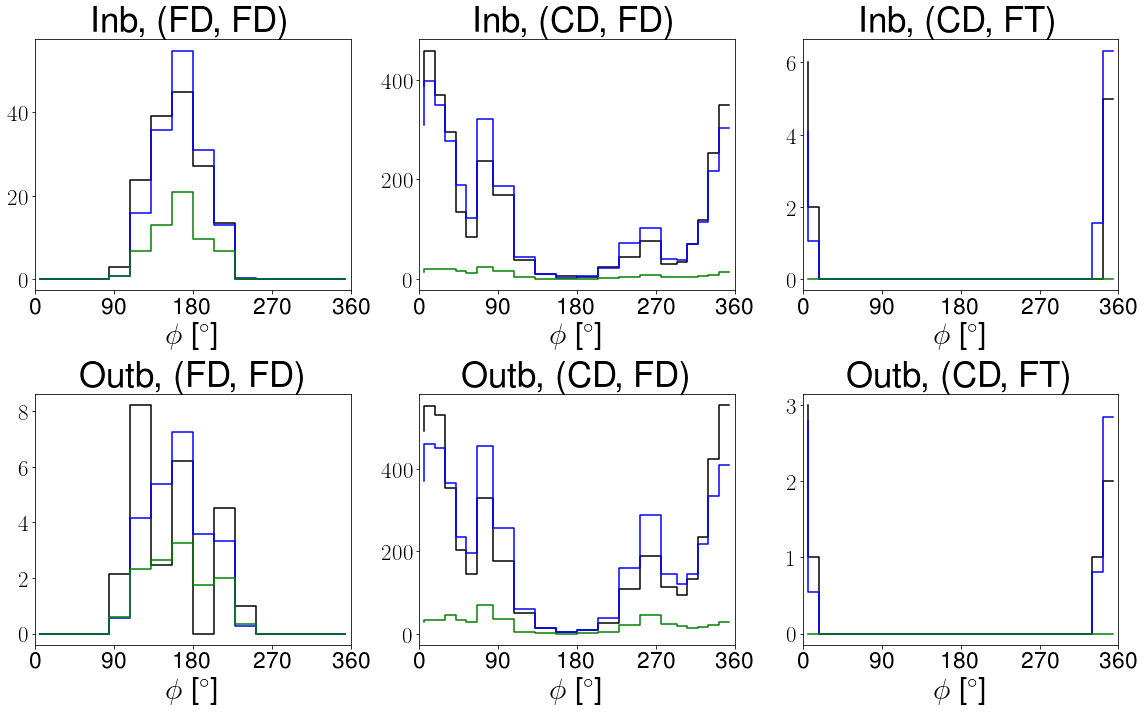

In [72]:
Q2xBtbin = 85

fig, axs = plt.subplots(2, 3, figsize = (16, 10))


# axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb1"], color = 'k')
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA1"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA1"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb1"]), color = 'b')
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationInb13"], color = 'g')

axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb2"], color = 'k')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA2"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA2"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb2"]), color = 'b')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationInb23"], color = 'g')

axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb3"], color = 'k')
axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA3"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA3"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb3"]), color = 'b')
axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationInb33"], color = 'g')

axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb1"], color = 'k')
axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA1"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA1"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb1"]), color = 'b')
axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationOutb13"], color = 'g')

axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb2"], color = 'k')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA2"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA2"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb2"]), color = 'b')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationOutb23"], color = 'g')

axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb3"], color = 'k')
axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA3"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA3"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb3"]), color = 'b')
axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationOutb33"], color = 'g')

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\phi$" +" ["+degree+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
#         axs[xind, yind].set_xscale('log')
#         axs[xind, yind].set_yscale('log')
# 
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
        axs[xind, yind].set_xlim([0, 360])
        axs[xind, yind].set_xticks([0, 90, 180, 270, 360])
        axs[xind, yind].set_xticklabels([0, 90, 180, 270, 360])

        
# plt.savefig("rawyields{}.pdf".format(Q2xBtbin))

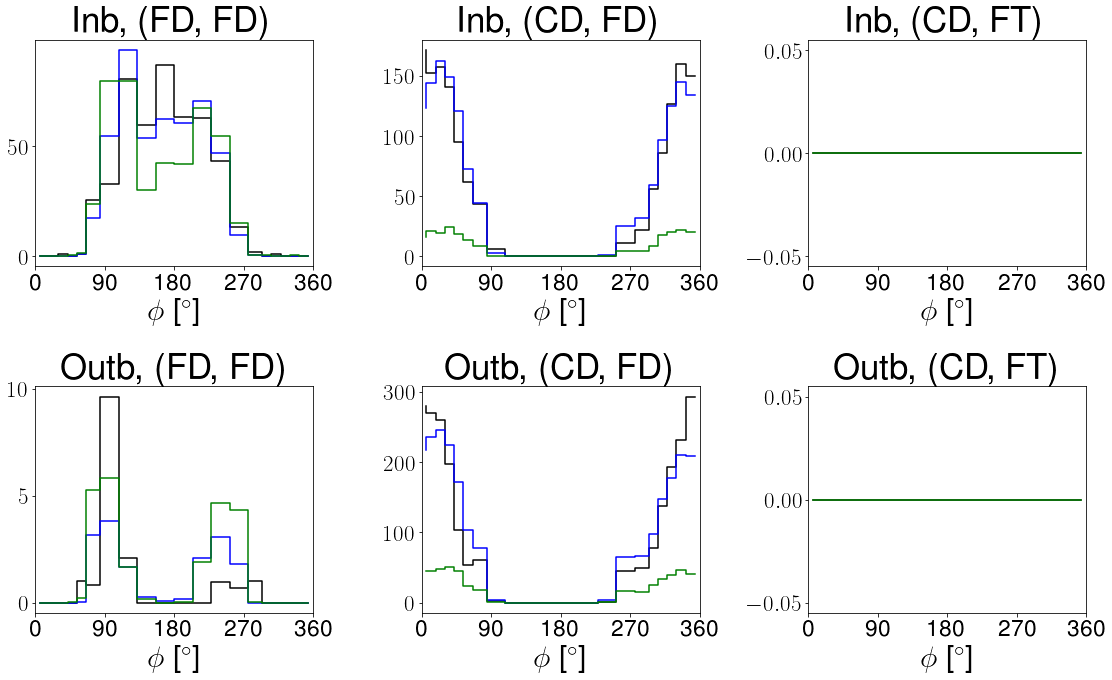

In [224]:
Q2xBtbin = 92

fig, axs = plt.subplots(2, 3, figsize = (16, 10))


# axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb1"], color = 'k')
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA1"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA1"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb1"]), color = 'b')
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationInb13"], color = 'g')

axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb2"], color = 'k')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA2"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA2"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb2"]), color = 'b')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationInb23"], color = 'g')

axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb3"], color = 'k')
axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA3"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA3"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb3"]), color = 'b')
axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationInb33"], color = 'g')

axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb1"], color = 'k')
axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA1"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA1"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb1"]), color = 'b')
axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationOutb13"], color = 'g')

axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb2"], color = 'k')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA2"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA2"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb2"]), color = 'b')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationOutb23"], color = 'g')

axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb3"], color = 'k')
axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA3"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA3"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb3"]), color = 'b')
axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationOutb33"], color = 'g')

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\phi$" +" ["+degree+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
#         axs[xind, yind].set_xscale('log')
#         axs[xind, yind].set_yscale('log')
# 
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
        axs[xind, yind].set_xlim([0, 360])
        axs[xind, yind].set_xticks([0, 90, 180, 270, 360])
        axs[xind, yind].set_xticklabels([0, 90, 180, 270, 360])

        
plt.savefig("rawyields{}.pdf".format(Q2xBtbin))

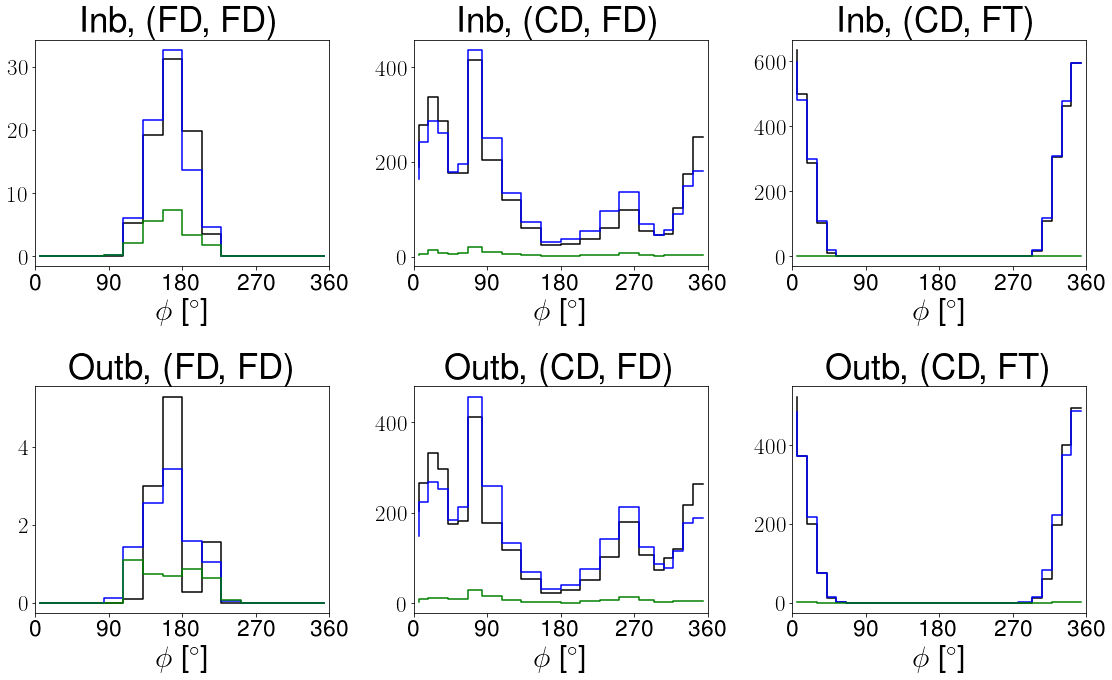

In [225]:
Q2xBtbin = 113

fig, axs = plt.subplots(2, 3, figsize = (16, 10))


# axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb1"], color = 'k')
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA1"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA1"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb1"]), color = 'b')
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationInb13"], color = 'g')

axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb2"], color = 'k')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA2"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA2"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb2"]), color = 'b')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationInb23"], color = 'g')

axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb3"], color = 'k')
axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA3"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimInb50nA3"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb3"]), color = 'b')
axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationInb33"], color = 'g')

axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb1"], color = 'k')
axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA1"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA1"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb1"]), color = 'b')
axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationOutb13"], color = 'g')

axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb2"], color = 'k')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA2"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA2"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb2"]), color = 'b')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationOutb23"], color = 'g')

axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb3"], color = 'k')
axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA3"]/sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsSimOutb50nA3"])*sum(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb3"]), color = 'b')
axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "contaminationOutb33"], color = 'g')

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\phi$" +" ["+degree+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
#         axs[xind, yind].set_xscale('log')
#         axs[xind, yind].set_yscale('log')
# 
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
        axs[xind, yind].set_xlim([0, 360])
        axs[xind, yind].set_xticks([0, 90, 180, 270, 360])
        axs[xind, yind].set_xticklabels([0, 90, 180, 270, 360])

        
plt.savefig("rawyields{}.pdf".format(Q2xBtbin))

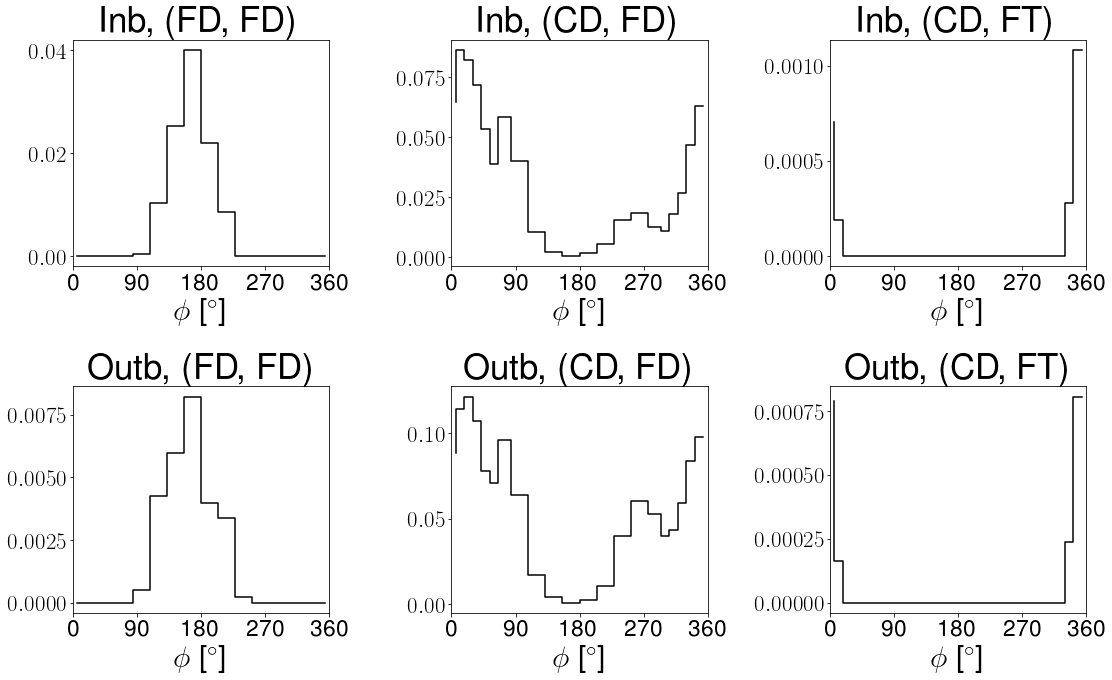

In [226]:
Q2xBtbin = 85

fig, axs = plt.subplots(2, 3, figsize = (16, 10))


# axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb1"], color = 'k')

axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb2"], color = 'k')

axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb3"], color = 'k')

axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb1"], color = 'k')

axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb2"], color = 'k')

axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb3"], color = 'k')

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\phi$" +" ["+degree+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
#         axs[xind, yind].set_xscale('log')
#         axs[xind, yind].set_yscale('log')
# 
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
        axs[xind, yind].set_xlim([0, 360])
        axs[xind, yind].set_xticks([0, 90, 180, 270, 360])
        axs[xind, yind].set_xticklabels([0, 90, 180, 270, 360])

        
plt.savefig("acc{}.pdf".format(Q2xBtbin))

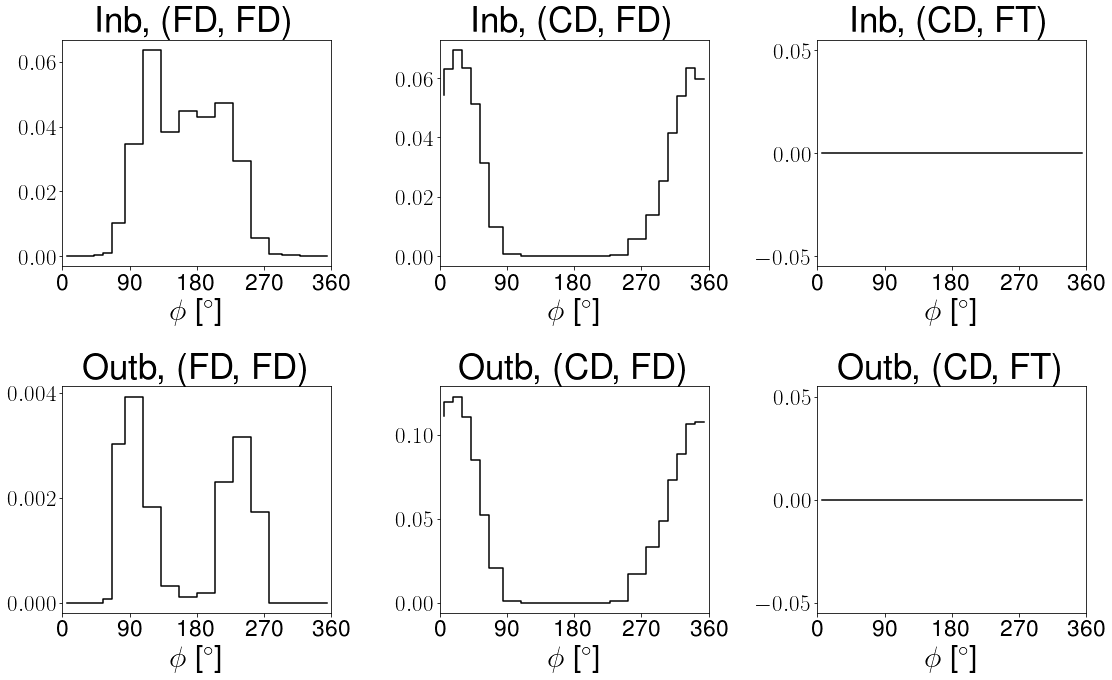

In [227]:
Q2xBtbin = 92

fig, axs = plt.subplots(2, 3, figsize = (16, 10))


# axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb1"], color = 'k')

axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb2"], color = 'k')

axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb3"], color = 'k')

axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb1"], color = 'k')

axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb2"], color = 'k')

axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb3"], color = 'k')

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\phi$" +" ["+degree+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
#         axs[xind, yind].set_xscale('log')
#         axs[xind, yind].set_yscale('log')
# 
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
        axs[xind, yind].set_xlim([0, 360])
        axs[xind, yind].set_xticks([0, 90, 180, 270, 360])
        axs[xind, yind].set_xticklabels([0, 90, 180, 270, 360])

        
plt.savefig("acc{}.pdf".format(Q2xBtbin))

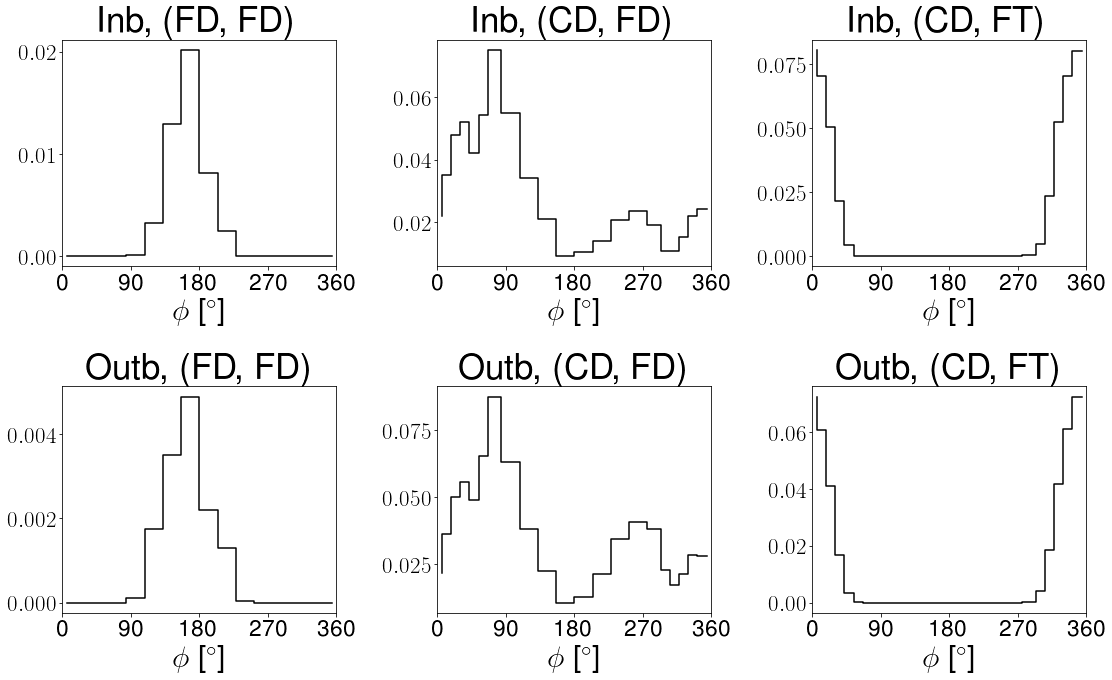

In [228]:
Q2xBtbin = 113

fig, axs = plt.subplots(2, 3, figsize = (16, 10))


# axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb1"], color = 'k')

axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb2"], color = 'k')

axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb3"], color = 'k')

axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb1"], color = 'k')

axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb2"], color = 'k')

axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb3"], color = 'k')

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\phi$" +" ["+degree+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
#         axs[xind, yind].set_xscale('log')
#         axs[xind, yind].set_yscale('log')
# 
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
        axs[xind, yind].set_xlim([0, 360])
        axs[xind, yind].set_xticks([0, 90, 180, 270, 360])
        axs[xind, yind].set_xticklabels([0, 90, 180, 270, 360])

        
plt.savefig("acc{}.pdf".format(Q2xBtbin))

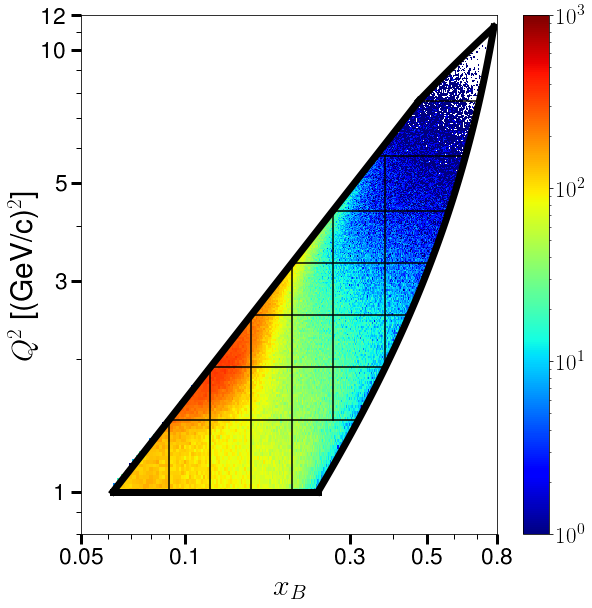

In [451]:
plt.rcParams["figure.figsize"] = (9, 4.5)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30

# pastbin = "000"
# for Q2xBtbin in goodBins:
fig, ax = plt.subplots(1,1, figsize=(9, 9))

h = plt.hist2d(epgExp.loc[:, "xB"], epgExp.loc[:, "Q2"], bins = 401, cmin = 1, cmap = cmap, norm = LogNorm(vmin =1, vmax=1000))
#h = plt.hist2d(epgExp.loc[epgExp.Q2xBtbin == Q2xBtbin, "xB"], epgExp.loc[epgExp.Q2xBtbin == Q2xBtbin, "Q2"], bins = [np.linspace(0.05, 0.75, 201), np.linspace(0.8, 12, 201)], cmin = 1, cmap = cmap, norm=LogNorm())
plt.colorbar(h[3])

#CLAS12

l1 = np.linspace(x1, x3, 101)
plt.plot(l1, l1*2*M*(10.604-2), color = 'k', linewidth = 7)
l2 = np.linspace(x1, x2, 101)
plt.plot(l2, 1+l2*0, color = 'k', linewidth = 7)
l4 = np.linspace(x3, x4, 101)
plt.plot(l4, 2*10.604*M*l4/(1+M*l4/10.604/(1-np.cos(np.radians(35)))), color = 'k', linewidth = 7)
l4 = np.linspace(x2, x4, 101)
plt.plot(l4, (4 - M*M)*l4/(1 - l4), color = 'k', linewidth = 7)

ax.plot(np.linspace(c0,c0, 101), np.linspace(y1, y2, 101), color='k')
ax.plot(np.linspace(c1,c1, 101), np.linspace(y1, np.sqrt(y2*y3), 101), color='k')
ax.plot(np.linspace(c2,c2, 101), np.linspace(y1, y3, 101), color='k')
ax.plot(np.linspace(c3,c3, 101), np.linspace(y1, np.sqrt(y3*y4), 101), color='k')
ax.plot(np.linspace(c4,c4, 101), np.linspace(y2, y4, 101), color='k')
ax.plot(np.linspace(d1,d1, 101), np.linspace(np.sqrt(y2*y3), np.sqrt(y4*y5), 101), color='k')

ax.plot(np.linspace(c0, d0, 101), np.linspace(y2, y2, 101), color='k')
ax.plot(np.linspace(c1, d1, 101), np.linspace(np.sqrt(y2*y3), np.sqrt(y2*y3), 101), color='k')
ax.plot(np.linspace(c2, d2, 101), np.linspace(y3, y3, 101), color='k')
ax.plot(np.linspace(c3, d3, 101), np.linspace(np.sqrt(y3*y4), np.sqrt(y3*y4), 101), color='k')
ax.plot(np.linspace(c4, d4, 101), np.linspace(y4, y4, 101), color='k')
ax.plot(np.linspace(c5, d5, 101), np.linspace(np.sqrt(y4*y5), np.sqrt(y4*y5), 101), color='k')
ax.plot(np.linspace(c6, d6, 101), np.linspace(y5, y5, 101), color='k')

ax.set_xlabel(r"$x_B$" ,fontsize = 30)
ax.set_ylabel(r"$Q^2$" +" ["+GeVc2+"]", fontsize = 30)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim([0.05, 0.8])
ax.set_ylim([0.8, 12])

ax.set_xticks([0.05, 0.1, 0.3, 0.5, 0.8])
ax.set_xticklabels([0.05, 0.1, 0.3, 0.5, 0.8])

ax.set_yticks([1, 3, 5, 10, 12])
ax.set_yticklabels([1, 3, 5, 10, 12])
yminorticks = [0.8, 0.9, 2, 4, 6, 7, 8, 9, 11]
yminorticklabels = ['' for i in yminorticks]
ax.set_yticks([0.8, 0.9, 2, 4, 6, 7, 8, 9, 11], minor = True)
ax.set_yticklabels(yminorticklabels, minor = True)

ax.xaxis.set_tick_params(width=3, size =10)
ax.xaxis.set_tick_params(width=1, size = 5, which = 'minor')
ax.yaxis.set_tick_params(width=3, size = 10)
ax.yaxis.set_tick_params(width=1, size = 5, which = 'minor')

# ax.axhline(5.761)
# ax.axvline(c5)

# plt.savefig("test{}.pdf".format(Q2xBtbin))
# plt.clf()

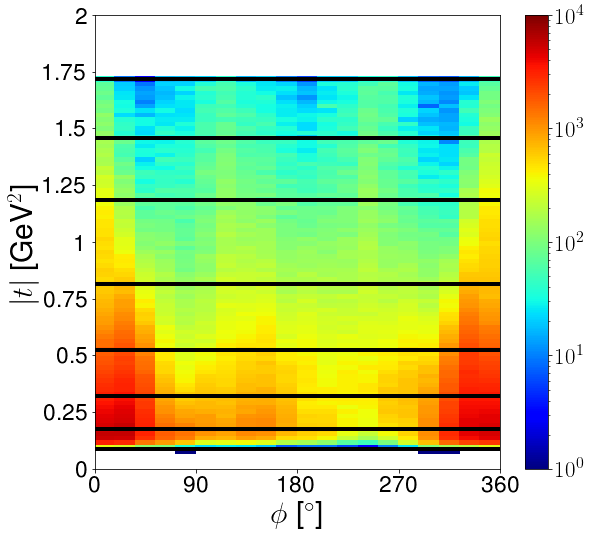

In [230]:
plt.rcParams["figure.figsize"] = (9, 8)
h = plt.hist2d(epgExp.phi1, (epgExp.t1), bins = [np.linspace(0, 360, 21), np.linspace(0.05, 2, 101)], cmin = 1, cmap = cmap, norm = LogNorm(vmin = 1, vmax = 10000))
plt.colorbar(h[3])
# plt.ylabel(r"$|t|~~ ($"+GeV2+r"$)$")
# plt.xlabel(r"$\phi$" +" ["+degree+"]")
tbins = [0.088, 0.177, 0.321, 0.523, 0.813, 1.187, 1.46, 1.72]
for tbin in tbins:
    plt.axhline(tbin, color = 'k', linewidth= 4)
plt.xticks([0, 90, 180, 270, 360], [0, 90, 180, 270, 360])
plt.yticks([0, 0.25, 0.5,0.75, 1, 1.25, 1.5, 1.75, 2], [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2])
plt.xlabel(r"$\phi$" + " [" + degree + "]")
plt.ylabel(r"$|t|$" + " [" + GeV2 + "]")
plt.show()

coneAngle 22.321910216722145
reconGam 0.26422404082559064
coplanarity 1.656594881016168
ME_epg 0.013400780335092694
MM2_epg -0.001091066245335197
MM2_eg 0.905013017934402
MM2_ep -0.014772294021591794
MPt 0.038983678858461185


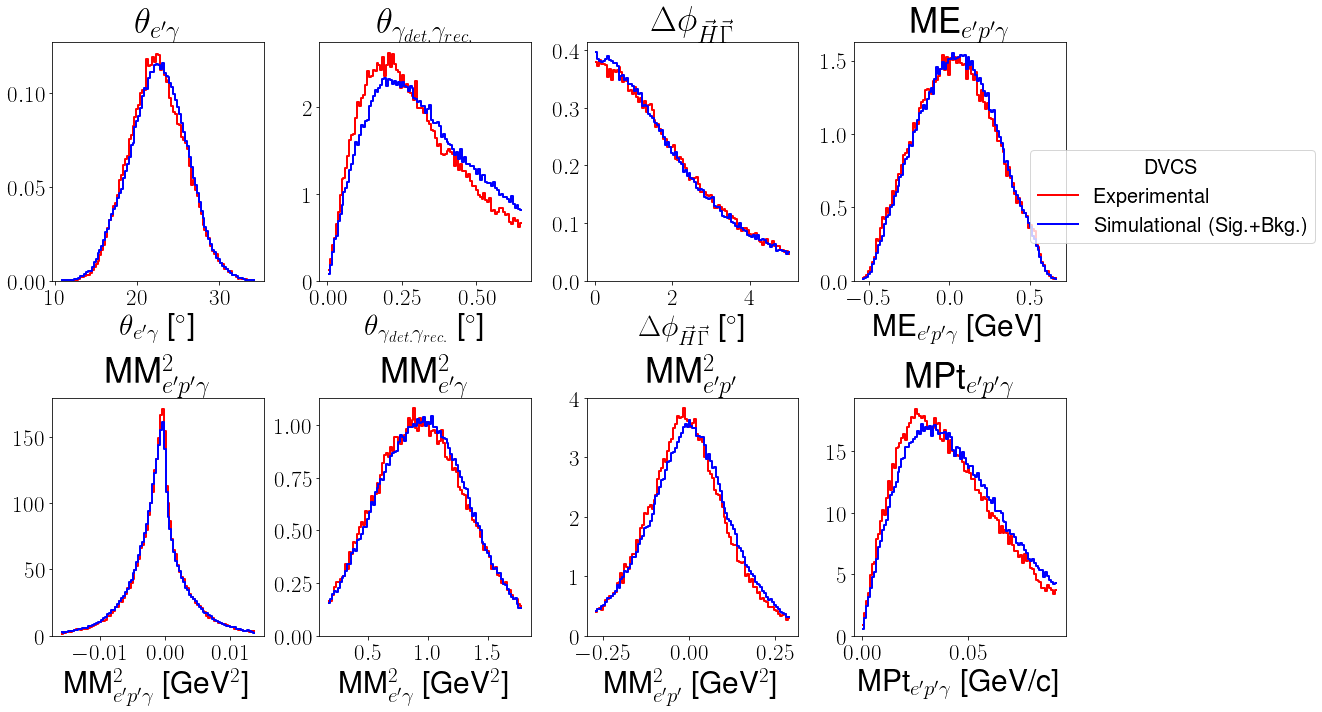

<Figure size 648x324 with 0 Axes>

In [431]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{\vec{H}\vec{\Gamma}}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
        simDist = (1-contInbCD)*simDist_dvcs + contInbCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='r', linewidth=2, label = 'Experimental')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=2, label = 'Simulational (Sig.+Bkg.)')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
#             axs[yind, xind].step(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='r', density=True, linewidth=2)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='r', linewidth=2)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=2)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CDFT/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_ylim(bottom = 0)
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.rc('legend',fontsize=20, title_fontsize=20)
fig.legend(bbox_to_anchor = (1.23, 0.8), title = "DVCS")
plt.show()
plt.clf()

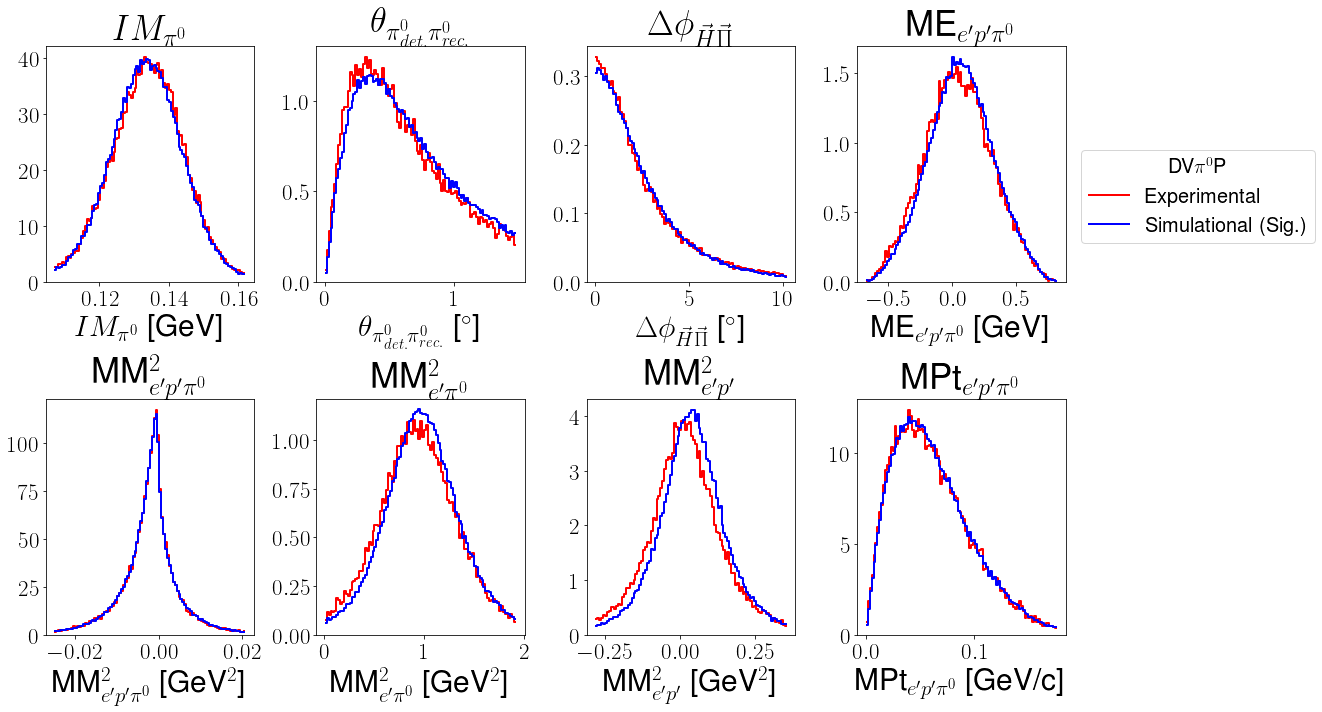

<Figure size 648x324 with 0 Axes>

In [432]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi_{\vec{H}\vec{\Pi}}$" , "ME"+r"${}_{e'p'\pi^0}$", "MM"+r"${}^{2}_{e'p'\pi^0}$", "MM"+r"${}^{2}_{e'\pi^0}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\pi^0}$"]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(pi0SimInbCD[varstoplot[ind]], bins, density = True)
        expDist, bins = np.histogram(pi0ExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='r', linewidth=2, label = 'Experimental')           
            axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='b', linewidth=2, label = 'Simulational (Sig.)')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
#             axs[yind, xind].step(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='r', density=True, linewidth=2)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='r', linewidth=2)
            axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='b', linewidth=2)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_ylim(bottom = 0)
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.23, 0.8), title = "DV"+r"$\pi^0$"+"P")
plt.show()
plt.clf()

In [53]:
import subprocess

In [52]:
def printBH(xB, Q2, t, phi, bh=3, vv2cut = 0.3):
    dstot = subprocess.check_output(['/Users/sangbaek/CLAS12/dvcs/rad2/dvcsgen', '--beam', '10.604',  '--x', str(xB), str(xB), "--q2", str(Q2), str(Q2), "--t" ,str(t), str(t), "--bh", str(bh), '--gpd', '101', '--vv2cut', str(vv2cut), '--delta', '0.1', '--printrad', '--phi', str(phi)])#, "|", "grep", "Frad_with_error"])
#     dstot = subprocess.check_output(['/Users/sangbaek/CLAS12/dvcs/print/dvcsgen', '--beam', '10.604', '--x', str(xB), str(xB), '--q2', str(Q2), str(Q2),'--t', str(t), str(t), '--bh', '3', '--phi', str(phi)])
    lines = dstot.decode("utf-8").split("\n")
    Fradline = lines[-3].split()
    Frad = float(Fradline[1])
    xsecline = lines[-2].split()
    xsec_obs = float(xsecline[1])
    xsec_born = float(xsecline[3])
    return Frad, xsec_obs, xsec_born

In [234]:
printBH(0.35954814529756174, 4.421690351495242, 0.498, 0.10471975511965978)

(0.9082283396313304, 0.005880744924001766, 0.006474963032301864)

In [133]:
printBH(0.35954814529756174, 4.421690351495242, 0.498, 0.10471975511965978)

(0.9081307444969111, 0.005880112999114268, 0.006474963032301864)

In [398]:
print([y1, y2, np.sqrt(y2*y3), y3, np.sqrt(y3*y4), y4, np.sqrt(y4*y5), y5])

[1, 1.456, 1.9116903514952415, 2.51, 3.295187399830243, 4.326, 5.760620279101895, 7.671]


In [430]:
counts.loc[counts.Q2xBbin==16, "Q2xBtbin"]

2240    112
2241    112
2242    112
2243    112
2244    112
       ... 
2381    118
2382    118
2383    118
2384    118
2385    118
Name: Q2xBtbin, Length: 146, dtype: int64

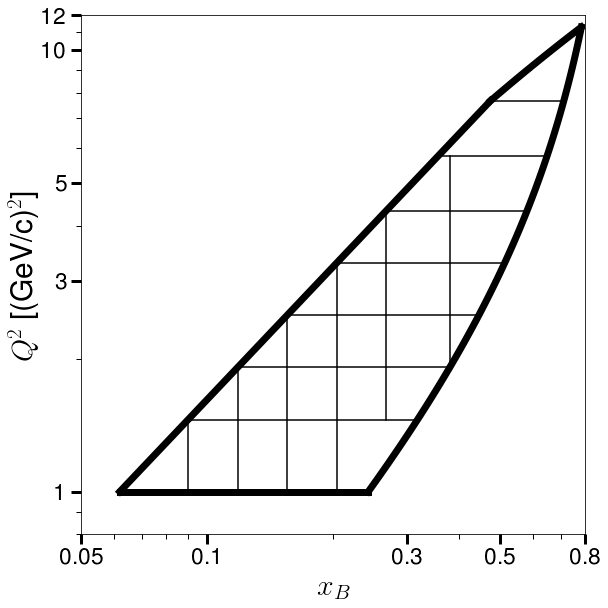

In [452]:
plt.rcParams["figure.figsize"] = (9, 4.5)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30

# pastbin = "000"
# for Q2xBtbin in goodBins:
fig, ax = plt.subplots(1,1, figsize=(9, 9))

# h = plt.hist2d(epgExp.loc[(epgExp.Q2xBtbin == 85) | (epgExp.Q2xBtbin == 106) | (epgExp.Q2xBtbin == 113), "xB"], epgExp.loc[(epgExp.Q2xBtbin == 85) | (epgExp.Q2xBtbin == 106) | (epgExp.Q2xBtbin == 113), "Q2"], bins = 401, cmin = 1, cmap = cmap, norm = LogNorm(vmin =1, vmax=1000))
#h = plt.hist2d(epgExp.loc[epgExp.Q2xBtbin == Q2xBtbin, "xB"], epgExp.loc[epgExp.Q2xBtbin == Q2xBtbin, "Q2"], bins = [np.linspace(0.05, 0.75, 201), np.linspace(0.8, 12, 201)], cmin = 1, cmap = cmap, norm=LogNorm())
# plt.colorbar(h[3])

#CLAS12

l1 = np.linspace(x1, x3, 101)
plt.plot(l1, l1*2*M*(10.604-2), color = 'k', linewidth = 7)
l2 = np.linspace(x1, x2, 101)
plt.plot(l2, 1+l2*0, color = 'k', linewidth = 7)
l4 = np.linspace(x3, x4, 101)
plt.plot(l4, 2*10.604*M*l4/(1+M*l4/10.604/(1-np.cos(np.radians(35)))), color = 'k', linewidth = 7)
l4 = np.linspace(x2, x4, 101)
plt.plot(l4, (4 - M*M)*l4/(1 - l4), color = 'k', linewidth = 7)

ax.plot(np.linspace(c0,c0, 101), np.linspace(y1, y2, 101), color='k')
ax.plot(np.linspace(c1,c1, 101), np.linspace(y1, np.sqrt(y2*y3), 101), color='k')
ax.plot(np.linspace(c2,c2, 101), np.linspace(y1, y3, 101), color='k')
ax.plot(np.linspace(c3,c3, 101), np.linspace(y1, np.sqrt(y3*y4), 101), color='k')
ax.plot(np.linspace(c4,c4, 101), np.linspace(y2, y4, 101), color='k')
ax.plot(np.linspace(d1,d1, 101), np.linspace(np.sqrt(y2*y3), np.sqrt(y4*y5), 101), color='k')

ax.plot(np.linspace(c0, d0, 101), np.linspace(y2, y2, 101), color='k')
ax.plot(np.linspace(c1, d1, 101), np.linspace(np.sqrt(y2*y3), np.sqrt(y2*y3), 101), color='k')
ax.plot(np.linspace(c2, d2, 101), np.linspace(y3, y3, 101), color='k')
ax.plot(np.linspace(c3, d3, 101), np.linspace(np.sqrt(y3*y4), np.sqrt(y3*y4), 101), color='k')
ax.plot(np.linspace(c4, d4, 101), np.linspace(y4, y4, 101), color='k')
ax.plot(np.linspace(c5, d5, 101), np.linspace(np.sqrt(y4*y5), np.sqrt(y4*y5), 101), color='k')
ax.plot(np.linspace(c6, d6, 101), np.linspace(y5, y5, 101), color='k')

ax.set_xlabel(r"$x_B$" ,fontsize = 30)
ax.set_ylabel(r"$Q^2$" +" ["+GeVc2+"]", fontsize = 30)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim([0.05, 0.8])
ax.set_ylim([0.8, 12])

ax.set_xticks([0.05, 0.1, 0.3, 0.5, 0.8])
ax.set_xticklabels([0.05, 0.1, 0.3, 0.5, 0.8])

ax.set_yticks([1, 3, 5, 10, 12])
ax.set_yticklabels([1, 3, 5, 10, 12])
yminorticks = [0.8, 0.9, 2, 4, 6, 7, 8, 9, 11]
yminorticklabels = ['' for i in yminorticks]
ax.set_yticks([0.8, 0.9, 2, 4, 6, 7, 8, 9, 11], minor = True)
ax.set_yticklabels(yminorticklabels, minor = True)

ax.xaxis.set_tick_params(width=3, size =10)
ax.xaxis.set_tick_params(width=1, size = 5, which = 'minor')
ax.yaxis.set_tick_params(width=3, size = 10)
ax.yaxis.set_tick_params(width=1, size = 5, which = 'minor')

# ax.axhline(5.761)
# ax.axvline(c5)

# plt.savefig("test{}.pdf".format(Q2xBtbin))
# plt.clf()

In [51]:
counts.loc[counts.Q2xBtbin == 85, :]

Q2bin     Q2_i  Q2_f  tbin    t_i    t_f  xBbin     xB_i      xB_f  \
1713      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1714      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1715      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1716      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1717      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1718      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1719      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1720      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1721      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1722      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1723      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1724      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1725      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1726      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1727      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1728      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1729      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1730      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1731      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1732      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   
1733      2  1.91169  2.51     1  0.177  0.321      2  0.20409  0.267934   

      phibin  ...  pi0ratioOutb23  contaminationOutb21  contaminationOutb22  \
1713       0  ...        0.090367            16.235294            21.799116   
1714       1  ...        0.090367            22.464000            27.558749   
1715       2  ...        0.090367            35.727043            27.121308   
1716       3  ...        0.090367            37.913715            37.328252   
1717       4  ...        0.090367            28.008621            26.319334   
1718       5  ...        0.090367            26.866715            23.184344   
1719       6  ...        0.090367            75.064899            56.138192   
1720       7  ...        0.090367            47.662730            29.308510   
1721       8  ...        0.090367             8.068966             3.936964   
1722       9  ...        0.090367             0.727273             0.583254   
1723      10  ...        0.090367             0.090909             0.072907   
1724      11  ...        0.090367             0.307692             0.729067   
1725      12  ...        0.090367             7.930233             3.207897   
1726      13  ...        0.090367            30.648241            16.622737   
1727      14  ...        0.090367            54.068465            37.255345   
1728      15  ...        0.090367            18.618182            18.664126   
1729      16  ...        0.090367            15.978622            15.820763   
1730      17  ...        0.090367            11.643892            11.081825   
1731      18  ...        0.090367            12.665511            12.685773   
1732      19  ...        0.090367            12.695883            17.424711   
1733      20  ...        0.090367            20.045802            22.090743   

      contaminationOutb23  pi0ratioOutb31  pi0ratioOutb32  pi0ratioOutb33  \
1713            27.019675        0.181818        0.059051        0.097561   
1714            34.158652        0.000000        0.059051        0.097561   
1715            33.616451        0.000000        0.059051        0.097561   
1716            46.267804        0.000000        0.059051        0.097561   
1717            32.622416        0.000000        0.059051        0.097561   
1718            28.736644        0.000000        0.059051        0.097561   
1719            69.582439        0.000000        0.0590

In [50]:
parent_Vol = "/Volumes/Extreme SSD/Mar2022/results/TrueVol/"
trueVol = pd.read_pickle(parent_Vol+"truebinVol_Gen.pkl")

In [484]:
Frads = {}
xsec_obs = {}

In [485]:
np.sort(counts.loc[counts.tbin == 1, "Q2xBtbin"].unique())

array([  1,   8,  15,  22,  29,  36,  43,  50,  57,  64,  71,  78,  85,
        92,  99, 106, 113, 120, 127, 134, 141, 148, 155, 162, 169])

In [487]:
for Q2xBtbin in np.sort(counts.loc[counts.tbin == 1, "Q2xBtbin"].unique()):
    for vv2cut in [0.3]:
        Frads[Q2xBtbin, vv2cut] = []
#         print(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, :].index)
        for i in trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, :].index:
            xBmean = trueVol.xBavg2[i]
            Q2mean = trueVol.Q2avg2[i]
            tmean = trueVol.tavg2[i]
            phimean = np.radians(trueVol.phiavg2[i])
            xsecmean = trueVol.xsecavg[i]
            print(i, xBmean, Q2mean, tmean, phimean, xsecmean)
            Frad, xsec_obs, xsec_born = printBH(xBmean, Q2mean, tmean, phimean, vv2cut = vv2cut)
#             print(i, trueVol.Q2xBtphibin[i], Frad)
            Frads[Q2xBtbin, vv2cut].append(Frad)

17 0.07855014503002167 1.1422775983810425 0.23685374855995178 0.7223479577478769 1113.6636962890625
18 0.07865957170724869 1.1430832147598267 0.23563994467258453 0.9338257183274885 634.0200805664062
19 0.07868482917547226 1.1445821523666382 0.23473015427589417 1.1441346175046645 401.2246398925781
20 0.0787116140127182 1.1457282304763794 0.23398374021053314 1.4428275748330086 239.24290466308594
21 0.07873089611530304 1.1473020315170288 0.23333200812339783 1.8684497191917282 133.4961395263672
22 0.07865363359451294 1.1482014656066895 0.23265017569065094 2.2936972899431285 90.4074478149414
23 0.07868040353059769 1.1487648487091064 0.2324051856994629 2.717061872645788 71.57919311523438
24 0.07870440930128098 1.1496977806091309 0.2327207326889038 3.1412736068912017 65.99801635742188
25 0.07866004854440689 1.1484777927398682 0.23238004744052887 3.565373754686941 71.65904998779297
26 0.07873440533876419 1.1495007276535034 0.23277635872364044 3.9912872488689155 90.13985443115234
27 0.078735046

579 0.23733799159526825 1.2479004859924316 0.23897404968738556 1.1471541095485962 33.55398941040039
580 0.23798660933971405 1.252760887145996 0.23726896941661835 1.444071137904021 10.820902824401855
581 0.23864224553108215 1.253199577331543 0.23654736578464508 1.8652418085006734 2.8853137493133545
582 0.23888665437698364 1.256134271621704 0.2343200147151947 2.290995513017243 1.8347535133361816
583 0.23816992342472076 1.2636263370513916 0.23459923267364502 2.718232598260987 1.3589608669281006
584 0.23823201656341553 1.2584445476531982 0.23568254709243774 3.139460526821076 1.211538553237915
585 0.2388221174478531 1.2573195695877075 0.23449863493442535 3.569633214534414 1.3511898517608643
586 0.23918674886226654 1.2582861185073853 0.2350313812494278 3.9907879061645257 1.813449501991272
587 0.23859357833862305 1.257909893989563 0.23570777475833893 4.41345047960384 2.8936049938201904
588 0.23811125755310059 1.2509276866912842 0.23766997456550598 4.83835863047431 8.792167663574219
589 0.2375

1146 0.2312309443950653 1.6822887659072876 0.2399216890335083 0.9373673896821576 11.617254257202148
1147 0.23116108775138855 1.682935357093811 0.23942868411540985 1.1466016367804592 8.553325653076172
1148 0.23146268725395203 1.6824284791946411 0.2376367449760437 1.4455641060111195 5.703944683074951
1149 0.23180702328681946 1.687901496887207 0.236610546708107 1.86835131538945 3.369093418121338
1150 0.23201699554920197 1.6872328519821167 0.23490934073925018 2.291133731077818 2.24153733253479
1151 0.23194526135921478 1.6909546852111816 0.23525740206241608 2.714396048394619 1.7158586978912354
1152 0.23189356923103333 1.6891802549362183 0.236045703291893 3.142942876262463 1.5568231344223022
1153 0.2314910590648651 1.6896421909332275 0.23528869450092316 3.5679138777346586 1.7293727397918701
1154 0.2314913272857666 1.6884299516677856 0.23603957891464233 3.9914592890753346 2.2493081092834473
1155 0.231647327542305 1.6875358819961548 0.2365139126777649 4.412121828536 3.3607242107391357
1156 0.2

1715 0.23026572167873383 2.213366985321045 0.24148555099964142 0.7282495227234924 15.473987579345703
1716 0.23032909631729126 2.2134108543395996 0.24021326005458832 0.9371439504667 11.9027099609375
1717 0.2306058555841446 2.216229200363159 0.23881399631500244 1.1473933945725399 9.058792114257812
1718 0.23075613379478455 2.217278242111206 0.23738078773021698 1.4488006456838929 6.305711269378662
1719 0.23113246262073517 2.219611167907715 0.23622262477874756 1.8702128649914154 3.946023941040039
1720 0.23076006770133972 2.2228403091430664 0.23620356619358063 2.293519923414529 2.743180274963379
1721 0.23105432093143463 2.2218034267425537 0.2352723926305771 2.718106098109208 2.1798486709594727
1722 0.230459064245224 2.226304292678833 0.23525111377239227 3.1426845496367255 2.0329067707061768
1723 0.2306707203388214 2.22619366645813 0.23474827408790588 3.565514103276388 2.204103469848633
1724 0.23095230758190155 2.219677448272705 0.23583126068115234 3.989318906507238 2.7473528385162354
1725 0.

2260 0.2284850776195526 2.925654649734497 0.24151235818862915 0.728830957368484 19.907821655273438
2261 0.2290230691432953 2.9274041652679443 0.23958761990070343 0.9375402288369038 15.352645874023438
2262 0.2292180359363556 2.929074764251709 0.23896518349647522 1.1469475814060606 11.842839241027832
2263 0.22967590391635895 2.9267501831054688 0.23742273449897766 1.4513136044884916 8.383148193359375
2264 0.2297176718711853 2.9294486045837402 0.23643188178539276 1.8714927802113073 5.520375728607178
2265 0.23004429042339325 2.933461904525757 0.23587407171726227 2.295175610664231 4.010076522827148
2266 0.2297053039073944 2.9320106506347656 0.23563595116138458 2.7189505864908723 3.2916691303253174
2267 0.22949965298175812 2.933467388153076 0.2357364296913147 3.141052830836834 3.088520050048828
2268 0.22979195415973663 2.931403636932373 0.2352965921163559 3.5657971973002636 3.2993011474609375
2269 0.22988976538181305 2.9322500228881836 0.23652894794940948 3.989013175614097 3.987450122833252
2

2797 0.3052646517753601 3.838005781173706 0.24480129778385162 0.5215629553925014 14.991174697875977
2798 0.30617520213127136 3.837820053100586 0.24401485919952393 0.7299279134214877 10.670048713684082
2799 0.30744901299476624 3.8330812454223633 0.24262985587120056 0.9391042367660801 8.605530738830566
2800 0.30779555439949036 3.838608503341675 0.24074411392211914 1.1488323005095098 5.398171424865723
2801 0.3095640242099762 3.838165760040283 0.23975870013237 1.4542691806662615 3.428262233734131
2802 0.3103165030479431 3.838442087173462 0.23817753791809082 1.8755158845120357 2.1813223361968994
2803 0.3109903037548065 3.846503257751465 0.23744158446788788 2.2965561933733283 1.6728312969207764
2804 0.3111559748649597 3.8461568355560303 0.23715198040008545 2.7194552555174423 1.414388656616211
2805 0.3116821050643921 3.8492348194122314 0.23706427216529846 3.141245910015865 1.331818699836731
2806 0.31108734011650085 3.8524186611175537 0.23606763780117035 3.5649239467788267 1.4303457736968994
2

3300 0.39928004145622253 6.120746612548828 0.2736395001411438 0.3135091211578637 30.497251510620117
3301 0.39968904852867126 6.125009536743164 0.2732658386230469 0.5225134042960371 20.79773712158203
3302 0.3991255462169647 6.126059055328369 0.27150630950927734 0.7331294325259263 38.08639144897461
3303 0.4008910059928894 6.1321187019348145 0.27230992913246155 0.9441614465180861 17.112106323242188
3304 0.4015442728996277 6.138706207275391 0.273041307926178 1.1508066349836399 3.803863048553467
3305 0.40094998478889465 6.137801170349121 0.27076756954193115 1.459475793755421 2.5058674812316895
3306 0.401795357465744 6.140340328216553 0.2697376012802124 1.8823125379300267 1.0796245336532593
3307 0.4019123911857605 6.144323348999023 0.2689886689186096 2.29987369314324 0.9519007802009583
3308 0.40294185280799866 6.1556291580200195 0.26982876658439636 2.719552727213339 0.8658263087272644
3309 0.40359190106391907 6.157522201538086 0.2699180841445923 3.1401878361147766 0.8347945213317871
3310 0.4

In [244]:
Frads2 = {}
for Q2xBtbin in [85]:
    for vv2cut in [0.15, 0.3, 0.45]:
        Frads2[Q2xBtbin, vv2cut] = []
#         print(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, :].index)
        for i in trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, :].index:
            xBmean = trueVol.xBavg2[i]
            Q2mean = trueVol.Q2avg2[i]
            tmean = trueVol.tavg2[i]
            phimean = np.radians(trueVol.phiavg2[i])
            xsecmean = trueVol.xsecavg[i]
            print(i, xBmean, Q2mean, tmean, phimean, xsecmean)
            Frad, xsec_obs, xsec_born = printBH(xBmean, Q2mean, tmean, phimean, vv2cut = vv2cut)
#             print(i, trueVol.Q2xBtphibin[i], Frad)
            Frads2[Q2xBtbin, vv2cut].append(Frad)

1712 0.22932374477386475 2.2109274864196777 0.24541838467121124 0.10425424288349233 26.6412410736084
1713 0.22941899299621582 2.209319829940796 0.24438181519508362 0.31193499321654516 23.95895004272461
1714 0.23002244532108307 2.210261106491089 0.243665412068367 0.519771813111855 19.629648208618164
1715 0.23026572167873383 2.213366985321045 0.24148555099964142 0.7282495227234924 15.473987579345703
1716 0.23032909631729126 2.2134108543395996 0.24021326005458832 0.9371439504667 11.9027099609375
1717 0.2306058555841446 2.216229200363159 0.23881399631500244 1.1473933945725399 9.058792114257812
1718 0.23075613379478455 2.217278242111206 0.23738078773021698 1.4488006456838929 6.305711269378662
1719 0.23113246262073517 2.219611167907715 0.23622262477874756 1.8702128649914154 3.946023941040039
1720 0.23076006770133972 2.2228403091430664 0.23620356619358063 2.293519923414529 2.743180274963379
1721 0.23105432093143463 2.2218034267425537 0.2352723926305771 2.718106098109208 2.1798486709594727
172

In [464]:
len(Frads[1, 0.3])

15

In [470]:
counts.loc[counts.Q2xBtbin == 1, :]

Q2bin  Q2_i   Q2_f  tbin    t_i    t_f  xBbin      xB_i      xB_f  phibin  \
17      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       2   
18      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       3   
19      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       4   
20      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       5   
21      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       6   
22      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       7   
23      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       8   
24      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       9   
25      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      10   
26      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      11   
27      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      12   
28      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      13   
29      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      14   
30      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      15   
31      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      16   
32      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      17   

    ...  factorOutb   xsecInb  uncxsecInb  xsecOutb  uncxsecOutb  epgExp  \
17  ...    0.000000  0.000000    0.000000  0.000000     0.000000       0   
18  ...    0.386798  0.000000    0.000000  0.000000     0.000000       9   
19  ...    0.190674  1.552945    0.441546  3.873714     0.738615      42   
20  ...    0.113387  0.622972    0.154458  3.391036     0.384498     100   
21  ...    0.090863  0.406727    0.083043  2.359346     0.214377     155   
22  ...    0.073414  0.000000    0.000000  0.737779     0.054163     198   
23  ...    0.037466  0.020298    0.004570  0.842572     0.031568     773   
24  ...    0.031443  0.036599    0.005344  0.880883     0.027698    1110   
25  ...    0.040853  0.000000    0.000000  0.561635     0.022944     629   
26  ...    0.062696  0.000000    0.000000  0.408776     0.025629     266   
27  ...    0.086928  0.000000    0.000000  0.455328     0.039581     138   
28  ...    0.054995  0.000000    0.000000  1.423940     0.078310     358   
29  ...    0.061662  0.200741    0.038812  2.198067     0.135536     307   
30  ...    0.118699  1.443852    0.262156  3.642030     0.432304     108   
31  ...    0.187286  1.775791    0.441542  3.503057     0.656072      47   
32  ...    0.312814  7.120214    1.915154  5.802088     1.814974      26   

    dvcsSim50nA  bkg1gSim50nA  bkg2gSim50nA  pi0Exp  
17            7             0            11       3  
18          306             0            48       3  
19          790             3           112       7  
20         1624             8            96       5  
21         2377            11           122       8  
22         4395            81           173      16  
23        18851           364          1054      87  
24        25289           507          1631      91  
25        15853           311          1111      51  
26         7514           147           465      25  
27         4006            59           127       5  
28         8203           149           250      18  
29         5885            98           293      15  
30         1730             9           127      10  
31          908             2           107       4  
32          322             1            49       5  

[16 rows x 455 columns]

In [471]:
trueVol.loc[trueVol.Q2xBtbin == 1, :]

Q2bin  Q2_i   Q2_f  tbin    t_i    t_f  xBbin      xB_i      xB_f  phibin  \
17      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       3   
18      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       4   
19      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       5   
20      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       6   
21      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       7   
22      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       8   
23      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178       9   
24      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      10   
25      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      11   
26      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      12   
27      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      13   
28      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      14   
29      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      15   
30      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      16   
31      0   1.0  1.456     1  0.177  0.321      0  0.061936  0.090178      17   

    ...    binVol  TruebinVol    xBavg1    Q2avg1     tavg1    xBavg2  \
17  ...  0.000194    0.000227  0.078491  1.142213  0.243034  0.078550   
18  ...  0.000194    0.000227  0.078491  1.142213  0.243034  0.078660   
19  ...  0.000194    0.000227  0.078491  1.142213  0.243034  0.078685   
20  ...  0.000388    0.000453  0.078491  1.142213  0.243034  0.078712   
21  ...  0.000388    0.000453  0.078491  1.142213  0.243034  0.078731   
22  ...  0.000388    0.000453  0.078491  1.142213  0.243034  0.078654   
23  ...  0.000388    0.000453  0.078491  1.142213  0.243034  0.078680   
24  ...  0.000388    0.000453  0.078491  1.142213  0.243034  0.078704   
25  ...  0.000388    0.000453  0.078491  1.142213  0.243034  0.078660   
26  ...  0.000388    0.000453  0.078491  1.142213  0.243034  0.078734   
27  ...  0.000388    0.000453  0.078491  1.142213  0.243034  0.078735   
28  ...  0.000388    0.000453  0.078491  1.142213  0.243034  0.078745   
29  ...  0.000194    0.000227  0.078491  1.142213  0.243034  0.078729   
30  ...  0.000194    0.000227  0.078491  1.142213  0.243034  0.078666   
31  ...  0.000194    0.000227  0.078491  1.142213  0.243034  0.078551   

      Q2avg2     tavg2     phiavg2      xsecavg  
17  1.142278  0.236854   41.387489  1113.663696  
18  1.143083  0.235640   53.504272   634.020081  
19  1.144582  0.234730   65.554085   401.224640  
20  1.145728  0.233984   82.667931   239.242905  
21  1.147302  0.233332  107.054283   133.496140  
22  1.148201  0.232650  131.419174    90.407448  
23  1.148765  0.232405  155.676178    71.579193  
24  1.149698  0.232721  179.981720    65.998016  
25  1.148478  0.232380  204.280869    71.659050  
26  1.149501  0.232776  228.683914    90.139854  
27  1.147267  0.233095  252.929947   133.691788  
28  1.146126  0.233932  277.351410   238.969238  
29  1.145270  0.234768  294.414764   399.228027  
30  1.143410  0.235562  306.486755   633.897583  
31  1.142437  0.236750  318.614929  1114.358276  

[15 rows x 25 columns]

In [142]:
def printBHonly(xB, Q2, t, phi):
    dstot = subprocess.check_output(['/Users/sangbaek/CLAS12/dvcs/print/dvcsgen', '--beam', '10.604', '--x', str(xB), str(xB), '--q2', str(Q2), str(Q2),'--t', str(t), str(t), '--bh', '1', '--phi', str(phi)])
    dstot = float(dstot.splitlines()[-1].decode("utf-8"))
    return dstot

In [147]:
def printDVCS(xB, Q2, t, phi):
    my_env["PATH"] = "/Users/sangbaek/CLAS12/dvcs/print:" + my_env["PATH"]
    my_env["CLASDVCS_PDF"] = "/Users/sangbaek/CLAS12/dvcs/print"
    dstot = subprocess.check_output(['/Users/sangbaek/CLAS12/dvcs/print/dvcsgen', '--beam', '10.604', '--x', str(xB), str(xB), '--q2', str(Q2), str(Q2),'--t', str(t), str(t), '--bh', '3', '--phi', str(phi), '--gpd', '101'], env = my_env)
    dstot = float(dstot.splitlines()[-1].decode("utf-8"))
    return dstot

In [99]:
import os
my_env = os.environ.copy()
my_env["PATH"] = "/Users/sangbaek/CLAS12/dvcs/print:" + my_env["PATH"]
my_env["CLASDVCS_PDF"] = "/Users/sangbaek/CLAS12/dvcs/print"

In [141]:
printBH(0.1, 1, 2, 1.57, 1)

(0.9053663136187795, 0.00027600706282457507, 0.00030485678412461094)

In [140]:
printBHonly(0.1, 1, 2, 1.57)

0.04851946182382225

In [144]:
def printBHarray(xBarray, Q2array, tarray, phiarray):
    BHarray = []
    if isinstance(xBarray, pd.core.series.Series):
        xBarray = xBarray.to_numpy()
        Q2array = Q2array.to_numpy()
        tarray = tarray.to_numpy()
        phiarray = phiarray.to_numpy()
        
    for xB, Q2, t, phi in zip(xBarray, Q2array, tarray, phiarray):
        BHarray.append(printBHonly(xB, Q2, t, phi))
    return BHarray

In [145]:
def printDVCSarray(xBarray, Q2array, tarray, phiarray):
    BHarray = []
    if isinstance(xBarray, pd.core.series.Series):
        xBarray = xBarray.to_numpy()
        Q2array = Q2array.to_numpy()
        tarray = tarray.to_numpy()
        phiarray = phiarray.to_numpy()
        
    for xB, Q2, t, phi in zip(xBarray, Q2array, tarray, phiarray):
        BHarray.append(printDVCS(xB, Q2, t, phi))
    return BHarray

In [184]:
def printDVCSKMarray(xBarray, Q2array, tarray, phiarray, **kwargs):
    BHarray = []
    if isinstance(xBarray, pd.core.series.Series):
        xBarray = xBarray.to_numpy()
        Q2array = Q2array.to_numpy()
        tarray = tarray.to_numpy()
        phiarray = phiarray.to_numpy()
        
    for xB, Q2, t, phi in zip(xBarray, Q2array, tarray, phiarray):
        BHarray.append(printDVCSKM(xB, Q2, t, phi, **kwargs))
    return BHarray

In [241]:
counts.loc[:, "binVol"] = counts.binVol * np.radians(counts.phi_f - counts.phi_i)

In [170]:
trueVol.loc[:, "binVol"] = trueVol.binVol * np.radians(trueVol.phi_f - trueVol.phi_i)

In [299]:
for Q2xBtbin in [85, 92, 113]:
    plt.scatter(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"], Frads[Q2xBtbin, 0.3], color = 'k', label = r"$MM^2_{e'p'}$"+"=0.3"+GeV2)
    plt.scatter(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"], Frads[Q2xBtbin, 0.15], color = 'r', label = r"$MM^2_{e'p'}$"+"=0.15"+GeV2)
    plt.scatter(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"], Frads[Q2xBtbin, 0.45], color = 'b', label = r"$MM^2_{e'p'}$"+"=0.45"+GeV2)
    plt.ylim(0.5, 1)
    plt.xlim(0, 360)
    plt.xticks([0, 90, 180, 270, 360])
    plt.xlabel(r"$\phi$"+" ["+degree+"]")
    plt.ylabel("Frad")
    plt.legend(loc='lower right')
#     plt.show()
    plt.savefig("rcfactor{}.pdf".format(Q2xBtbin))
    plt.clf()

<Figure size 432x576 with 0 Axes>

In [549]:
Frads[Q2xBtbin, 0.3]

[0.943371323057701,
 0.9305382316675079,
 0.9111968565454073,
 0.9002207819195956,
 0.895977658835538,
 0.8984025592832023,
 0.9424614045328931,
 0.9433763263751548,
 0.9364177202509465,
 0.9174985299717803,
 0.9043540591857289,
 0.8973937810118044,
 0.8968240601680796,
 0.905784454518741,
 0.9245010500738887,
 0.9400953830071226,
 0.9263337841094428,
 0.9100902372495533,
 0.8995949942813791,
 0.8960898855069156,
 0.9047903467725276]

In [231]:
counts.loc[:, "xsec1"] = np.where(counts.dvcsExpInb1 > 10, counts.dvcsExpInb1*counts.invaccInb1/trueVol.TruebinVol/inbcharge/1.324, 0)
counts.loc[:, "xsec2"] = np.where(counts.dvcsExpInb2 > 10, counts.dvcsExpInb2*counts.invaccInb2/trueVol.TruebinVol/inbcharge/1.324, 0)
counts.loc[:, "xsec3"] = np.where(counts.dvcsExpInb3 > 10, counts.dvcsExpInb3*counts.invaccInb3/trueVol.TruebinVol/inbcharge/1.324, 0)
counts.loc[:, "xsec4"] = np.where(counts.dvcsExpOutb1 > 10, counts.dvcsExpOutb1*counts.invaccOutb1/trueVol.TruebinVol/outbcharge/1.324, 0)
counts.loc[:, "xsec5"] = np.where(counts.dvcsExpOutb2 > 10, counts.dvcsExpOutb2*counts.invaccOutb2/trueVol.TruebinVol/outbcharge/1.324, 0)
counts.loc[:, "xsec6"] = np.where(counts.dvcsExpOutb3 > 10, counts.dvcsExpOutb3*counts.invaccOutb3/trueVol.TruebinVol/outbcharge/1.324, 0)

$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi} \propto  N(e'p'\gamma)^{\BHDVCS}_{\Exp}/Acc.$

$N(e'p'\gamma)^{\BHDVCS}_{\Exp} =  N(e'p'\gamma)^{e'p'\gamma}_{\Exp} - N(e'p'\gamma)^{\DV\pi^0\PP}_{\Exp}$
 
$ N(e'p'\gamma)^{\DV\pi^0\PP}_{\Exp} = N(e'p'2\gamma)^{\DV\pi^0\PP}_{\Exp}\times\frac{N(e'p'\gamma)^{\DV\pi^0\PP}_{\Sim}}{N(e'p'2\gamma)^{\DV\pi^0\PP}_{\Sim}}$
 
$\delta N(e'p'\gamma)^{\BHDVCS}_{\Exp} = \sqrt{(\delta N(e'p'\gamma)^{e'p'\gamma}_{\Exp})^2 + (\delta N(e'p'\gamma)^{\DV\pi^0\PP}_{\Exp})^2}$

$\delta N(e'p'\gamma)^{e'p'\gamma}_{\Exp} = \sqrt{N(e'p'\gamma)^{e'p'\gamma}_{\Exp}}$

$\delta N(e'p'\gamma)^{\DV\pi^0\PP}_{\Exp} =  N(e'p'\gamma)^{\DV\pi^0\PP}_{\Exp} \times \sqrt{1/N(e'p'2\gamma)^{\DV\pi^0\PP}_{\Exp} + 1/N(e'p'2\gamma)^{\DV\pi^0\PP}_{\Sim} + 1/N(e'p'\gamma)^{\DV\pi^0\PP}_{\Sim}}$

$Acc. = \frac{N_{rec.}}{N_{gen.}} 
\frac{\delta Acc.}{Acc.} = \sqrt{\frac{1-Acc.}{N_{rec.}}}\\
\sigma_{stat.} = \frac{d\sigma}{dQ^2 dx_B d|t| d\phi}\sqrt{\frac{1-Acc.}{N_{rec.}} + 
(1/N(e'p'2\gamma)^{\DV\pi^0\PP}_{\Exp} + 1/N(e'p'2\gamma)^{\DV\pi^0\PP}_{\Sim} + 1/N(e'p'\gamma)^{\DV\pi^0\PP}_{\Sim})}$

In [74]:
factor11 = np.divide(counts.accInb1, counts.dvcsSimInb50nA1, out = np.zeros(counts.dvcsSimInb50nA1.shape), where = counts.dvcsSimInb50nA1!=0)
factor12 = np.divide(np.ones(counts.epgExpInb1.shape), counts.epgExpInb1, out = np.zeros(counts.epgExpInb1.shape), where = counts.epgExpInb1!=0)
factor13 = np.divide(counts.contaminationInb11**2, counts.epgExpInb1**2, out = np.zeros(counts.epgExpInb1.shape), where = counts.epgExpInb1!=0)
factor13 = factor13 * (np.divide(np.ones(counts.pi0ExpInb1.shape), counts.pi0ExpInb1, out = np.zeros(counts.pi0ExpInb1.shape), where = counts.pi0ExpInb1!=0) + np.divide(np.ones(counts.bkg2gSimInb50nA1.shape), counts.bkg2gSimInb50nA1, out = np.zeros(counts.bkg2gSimInb50nA1.shape), where = counts.bkg2gSimInb50nA1!=0)+ np.divide(np.ones(counts.bkg1gSimInb50nA1.shape), counts.bkg1gSimInb50nA1, out = np.zeros(counts.bkg1gSimInb50nA1.shape), where = counts.bkg1gSimInb50nA1!=0))
factor1 = np.sqrt(factor11+factor12+factor13)

factor21 = np.divide(counts.accInb2, counts.dvcsSimInb50nA2, out = np.zeros(counts.dvcsSimInb50nA2.shape), where = counts.dvcsSimInb50nA2!=0)
factor22 = np.divide(np.ones(counts.epgExpInb2.shape), counts.epgExpInb2, out = np.zeros(counts.epgExpInb2.shape), where = counts.epgExpInb2!=0)
factor23 = np.divide(counts.contaminationInb21**2, counts.epgExpInb2**2, out = np.zeros(counts.epgExpInb2.shape), where = counts.epgExpInb2!=0)
factor23 = factor23 * (np.divide(np.ones(counts.pi0ExpInb2.shape), counts.pi0ExpInb2, out = np.zeros(counts.pi0ExpInb2.shape), where = counts.pi0ExpInb2!=0) + np.divide(np.ones(counts.bkg2gSimInb50nA2.shape), counts.bkg2gSimInb50nA2, out = np.zeros(counts.bkg2gSimInb50nA2.shape), where = counts.bkg2gSimInb50nA2!=0)+ np.divide(np.ones(counts.bkg1gSimInb50nA2.shape), counts.bkg1gSimInb50nA2, out = np.zeros(counts.bkg1gSimInb50nA2.shape), where = counts.bkg1gSimInb50nA2!=0))
factor2 = np.sqrt(factor21+factor22+factor23)

factor31 = np.divide(counts.accInb3, counts.dvcsSimInb50nA3, out = np.zeros(counts.dvcsSimInb50nA3.shape), where = counts.dvcsSimInb50nA3!=0)
factor32 = np.divide(np.ones(counts.epgExpInb3.shape), counts.epgExpInb3, out = np.zeros(counts.epgExpInb3.shape), where = counts.epgExpInb3!=0)
factor33 = np.divide(counts.contaminationInb31**2, counts.epgExpInb3**2, out = np.zeros(counts.epgExpInb3.shape), where = counts.epgExpInb3!=0)
factor33 = factor33 * (np.divide(np.ones(counts.pi0ExpInb3.shape), counts.pi0ExpInb3, out = np.zeros(counts.pi0ExpInb3.shape), where = counts.pi0ExpInb3!=0) + np.divide(np.ones(counts.bkg2gSimInb50nA3.shape), counts.bkg2gSimInb50nA3, out = np.zeros(counts.bkg2gSimInb50nA3.shape), where = counts.bkg2gSimInb50nA3!=0)+ np.divide(np.ones(counts.bkg1gSimInb50nA3.shape), counts.bkg1gSimInb50nA3, out = np.zeros(counts.bkg1gSimInb50nA3.shape), where = counts.bkg1gSimInb50nA3!=0))
factor3 = np.sqrt(factor31+factor32+factor33)

factor41 = np.divide(counts.accOutb1, counts.dvcsSimOutb50nA1, out = np.zeros(counts.dvcsSimOutb50nA1.shape), where = counts.dvcsSimOutb50nA1!=0)
factor42 = np.divide(np.ones(counts.epgExpOutb1.shape), counts.epgExpOutb1, out = np.zeros(counts.epgExpOutb1.shape), where = counts.epgExpOutb1!=0)
factor43 = np.divide(counts.contaminationOutb11**2, counts.epgExpOutb1**2, out = np.zeros(counts.epgExpOutb1.shape), where = counts.epgExpOutb1!=0)
factor43 = factor43 * (np.divide(np.ones(counts.pi0ExpOutb1.shape), counts.pi0ExpOutb1, out = np.zeros(counts.pi0ExpOutb1.shape), where = counts.pi0ExpOutb1!=0) + np.divide(np.ones(counts.bkg2gSimOutb50nA1.shape), counts.bkg2gSimOutb50nA1, out = np.zeros(counts.bkg2gSimOutb50nA1.shape), where = counts.bkg2gSimOutb50nA1!=0)+ np.divide(np.ones(counts.bkg1gSimOutb50nA1.shape), counts.bkg1gSimOutb50nA1, out = np.zeros(counts.bkg1gSimOutb50nA1.shape), where = counts.bkg1gSimOutb50nA1!=0))
factor4 = np.sqrt(factor41+factor42+factor43)

factor51 = np.divide(counts.accOutb2, counts.dvcsSimOutb50nA2, out = np.zeros(counts.dvcsSimOutb50nA2.shape), where = counts.dvcsSimOutb50nA2!=0)
factor52 = np.divide(np.ones(counts.epgExpOutb2.shape), counts.epgExpOutb2, out = np.zeros(counts.epgExpOutb2.shape), where = counts.epgExpOutb2!=0)
factor53 = np.divide(counts.contaminationOutb21**2, counts.epgExpOutb2**2, out = np.zeros(counts.epgExpOutb2.shape), where = counts.epgExpOutb2!=0)
factor53 = factor53 * (np.divide(np.ones(counts.pi0ExpOutb2.shape), counts.pi0ExpOutb2, out = np.zeros(counts.pi0ExpOutb2.shape), where = counts.pi0ExpOutb2!=0) + np.divide(np.ones(counts.bkg2gSimOutb50nA2.shape), counts.bkg2gSimOutb50nA2, out = np.zeros(counts.bkg2gSimOutb50nA2.shape), where = counts.bkg2gSimOutb50nA2!=0)+ np.divide(np.ones(counts.bkg1gSimOutb50nA2.shape), counts.bkg1gSimOutb50nA2, out = np.zeros(counts.bkg1gSimOutb50nA2.shape), where = counts.bkg1gSimOutb50nA2!=0))
factor5 = np.sqrt(factor51+factor52+factor53)

factor61 = np.divide(counts.accOutb3, counts.dvcsSimOutb50nA3, out = np.zeros(counts.dvcsSimOutb50nA3.shape), where = counts.dvcsSimOutb50nA3!=0)
factor62 = np.divide(np.ones(counts.epgExpOutb3.shape), counts.epgExpOutb3, out = np.zeros(counts.epgExpOutb3.shape), where = counts.epgExpOutb3!=0)
factor63 = np.divide(counts.contaminationOutb31**2, counts.epgExpOutb3**2, out = np.zeros(counts.epgExpOutb3.shape), where = counts.epgExpOutb3!=0)
factor63 = factor63 * (np.divide(np.ones(counts.pi0ExpOutb3.shape), counts.pi0ExpOutb3, out = np.zeros(counts.pi0ExpOutb3.shape), where = counts.pi0ExpOutb3!=0) + np.divide(np.ones(counts.bkg2gSimOutb50nA3.shape), counts.bkg2gSimOutb50nA3, out = np.zeros(counts.bkg2gSimOutb50nA3.shape), where = counts.bkg2gSimOutb50nA3!=0)+ np.divide(np.ones(counts.bkg1gSimOutb50nA3.shape), counts.bkg1gSimOutb50nA3, out = np.zeros(counts.bkg1gSimOutb50nA3.shape), where = counts.bkg1gSimOutb50nA3!=0))
factor6 = np.sqrt(factor61+factor62+factor63)

In [75]:
print(factor62)

0       0.500000
1       0.166667
2       0.031250
3       0.012500
4       0.007143
          ...   
3420    0.000000
3421    0.000000
3422    0.000000
3423    0.500000
3424    1.000000
Name: epgExpOutb3, Length: 3425, dtype: float64


In [76]:
counts.loc[:, "uncxsec1"] = counts.loc[:, "xsec1"]* factor1
counts.loc[:, "uncxsec2"] = counts.loc[:, "xsec2"]* factor2
counts.loc[:, "uncxsec3"] = counts.loc[:, "xsec3"]* factor3
counts.loc[:, "uncxsec4"] = counts.loc[:, "xsec4"]* factor4
counts.loc[:, "uncxsec5"] = counts.loc[:, "xsec5"]* factor5
counts.loc[:, "uncxsec6"] = counts.loc[:, "xsec6"]* factor6

In [77]:
# Q2xBtbin = 92
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec1"]/Frads[Q2xBtbin, 0.15], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec1"]/Frads[Q2xBtbin, 0.15], color = 'r', label = "Inb., (FD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec2"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec2"]/Frads[Q2xBtbin, 0.3], color = 'g', label = "Inb., (CD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec3"]/Frads[Q2xBtbin, 0.45], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec3"]/Frads[Q2xBtbin, 0.45], color = 'b', label = "Inb., (CD, FT)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec4"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec4"]/Frads[Q2xBtbin, 0.3], color = 'cyan', label = "Outb., (FD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec5"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec5"]/Frads[Q2xBtbin, 0.3], color = 'purple', label = "Outb., (CD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec6"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec6"]/Frads[Q2xBtbin, 0.3], color = 'k', label = "Outb., (CD, FT)", linestyle = '')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"], printBHarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"])))

In [78]:
# plt.rcParams["figure.figsize"] = (4.5, 4.5)
for Q2xBtbin in counts.loc[counts.tbin==1, "Q2xBtbin"].unique():
    f = plt.figure(figsize=(4.5, 6))
    ax = f.add_subplot(111)
#     plt.subplots_adjust(left = 0, right = 0, top = 0, bottom = 0)
    xsec1 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec1"]/Frads[Q2xBtbin, 0.3]
    weight1 = np.divide(np.ones(xsec1.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec1"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec1.shape, dtype = float), where = xsec1!=0)

    xsec2 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec2"]/Frads[Q2xBtbin, 0.3]
    weight2 = np.divide(np.ones(xsec2.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec2"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec2.shape, dtype = float), where = xsec2!=0)

    xsec3 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec3"]/Frads[Q2xBtbin, 0.3]
    weight3 = np.divide(np.ones(xsec3.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec3"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec3.shape, dtype = float), where = xsec3!=0)

    xsec4 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec4"]/Frads[Q2xBtbin, 0.3]
    weight4 = np.divide(np.ones(xsec4.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec4"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec4.shape, dtype = float), where = xsec4!=0)

    xsec5 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec5"]/Frads[Q2xBtbin, 0.3]
    weight5 = np.divide(np.ones(xsec5.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec5"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec5.shape, dtype = float), where = xsec5!=0)

    xsec6 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec6"]/Frads[Q2xBtbin, 0.3]
    weight6 = np.divide(np.ones(xsec6.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec6"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec6.shape, dtype = float), where = xsec6!=0)

    unc = np.sqrt(np.divide(np.ones(weight1.shape), weight1, out =np.zeros(weight1.shape), where = weight1!=0)+np.divide(np.ones(weight2.shape), weight2, out =np.zeros(weight2.shape), where = weight2!=0) +np.divide(np.ones(weight3.shape), weight3, out =np.zeros(weight3.shape), where = weight3!=0) +np.divide(np.ones(weight4.shape), weight4, out =np.zeros(weight4.shape), where = weight4!=0) +np.divide(np.ones(weight5.shape), weight5, out =np.zeros(weight5.shape), where = weight5!=0) +np.divide(np.ones(weight6.shape), weight6, out =np.zeros(weight6.shape), where = weight6!=0))
    weightsum = weight1 + weight2 + weight3 + weight4 + weight5 + weight6

    xsec = (xsec1*weight1 + xsec2*weight2 + xsec3*weight3 + xsec4*weight4 + xsec5*weight5 + xsec6*weight6)/weightsum

    # plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec1"]/Frads[Q2xBtbin, 0.15], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec1"]/Frads[Q2xBtbin, 0.15], color = 'r', label = "Inb., (FD, FD)", linestyle = '')
    # plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec2"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec2"]/Frads[Q2xBtbin, 0.3], color = 'g', label = "Inb., (CD, FD)", linestyle = '')
    # plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec3"]/Frads[Q2xBtbin, 0.45], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec3"]/Frads[Q2xBtbin, 0.45], color = 'b', label = "Inb., (CD, FT)", linestyle = '')
    # plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec4"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec4"]/Frads[Q2xBtbin, 0.3], color = 'cyan', label = "Outb., (FD, FD)", linestyle = '')
    # plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec5"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec5"]/Frads[Q2xBtbin, 0.3], color = 'purple', label = "Outb., (CD, FD)", linestyle = '')
    # plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec6"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec6"]/Frads[Q2xBtbin, 0.3], color = 'k', label = "Outb., (CD, FT)", linestyle = '')

    ax.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"], xsec, xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"]], yerr = unc, color = 'k',ls='None', label = 'from data')#,marker='o',markersize=10.)

    # for n in np.linspace(1-0.114, 1+0.114, 1001):
    #     plt.plot(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"], n*xsec, color = 'cyan', alpha = 0.01)


    ax.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r', label = 'pure BH')
#     ax.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg1"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
#     ax.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg2"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg1"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')

    ax.set_xticks([0, 90, 180, 270, 360])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_xlabel(r"$\phi$" + " ["+degree+"]")
    ax.set_xlim([0, 360])
    plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")
    plt.ylim([0, 0.15])
#     ax.yaxis.set_visible(False)
#     ax.xaxis.set_visible(False)
    plt.legend(loc = 'lower right', bbox_to_anchor = (1.2 ,0.85))
    plt.savefig("xsec{}.pdf".format(Q2xBtbin))
    plt.tight_layout()
    plt.clf()

<ipython-input-78-8b4239eea511>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(4.5, 6))


<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

In [158]:
from gepard.fits import th_KM15
import gepard as g

In [181]:
def printDVCSKM(xB, Q2, t, phi, frame = 'trento', pol = 0 ):
    phi = phi-np.pi
    pt1 = g.DataPoint(xB=xB, t=-t, Q2=Q2, phi=phi,
                  process='ep2epgamma', exptype='fixed target', frame =frame,
                  in1energy=10.604, in1charge=-1, in1polarization=pol)
#     pt2 = g.DataPoint(xB=xB, t=-t, Q2=Q2, phi=phi,
#                    process='ep2epgamma', exptype='fixed target', frame = 'trento',
#                    in1energy=10.604, in1charge=-1, in1polarization=+1)
    return th_KM15.XS(pt1)

In [160]:
printDVCSKM(0.3, 3, 0.5, 0.5)

0.0061032833651746745

In [92]:
dvcsarray = printDVCSarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"]))

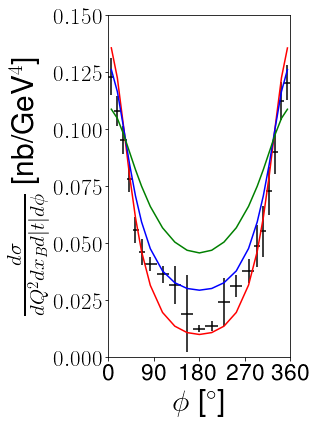

In [285]:
Q2xBtbin = 85

ineff = 1
xsec1 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec1"]/Frads2[Q2xBtbin, 0.15]/ineff
weight1 = np.divide(np.ones(xsec1.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec1"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec1.shape, dtype = float), where = xsec1!=0)

xsec2 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec2"]/Frads2[Q2xBtbin, 0.15]/ineff
weight2 = np.divide(np.ones(xsec2.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec2"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec2.shape, dtype = float), where = xsec2!=0)

xsec3 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec3"]/Frads2[Q2xBtbin, 0.15]/ineff
weight3 = np.divide(np.ones(xsec3.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec3"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec3.shape, dtype = float), where = xsec3!=0)

xsec4 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec4"]/Frads2[Q2xBtbin, 0.15]/ineff
weight4 = np.divide(np.ones(xsec4.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec4"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec4.shape, dtype = float), where = xsec4!=0)

xsec5 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec5"]/Frads2[Q2xBtbin, 0.15]/ineff
weight5 = np.divide(np.ones(xsec5.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec5"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec5.shape, dtype = float), where = xsec5!=0)

xsec6 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec6"]/Frads2[Q2xBtbin, 0.15]/ineff
weight6 = np.divide(np.ones(xsec6.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec6"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec6.shape, dtype = float), where = xsec6!=0)

unc = np.sqrt(np.divide(np.ones(weight1.shape), weight1, out =np.zeros(weight1.shape), where = weight1!=0)+np.divide(np.ones(weight2.shape), weight2, out =np.zeros(weight2.shape), where = weight2!=0) +np.divide(np.ones(weight3.shape), weight3, out =np.zeros(weight3.shape), where = weight3!=0) +np.divide(np.ones(weight4.shape), weight4, out =np.zeros(weight4.shape), where = weight4!=0) +np.divide(np.ones(weight5.shape), weight5, out =np.zeros(weight5.shape), where = weight5!=0) +np.divide(np.ones(weight6.shape), weight6, out =np.zeros(weight6.shape), where = weight6!=0))
weightsum = weight1 + weight2 + weight3 + weight4 + weight5 + weight6

xsec = (xsec1*weight1 + xsec2*weight2 + xsec3*weight3 + xsec4*weight4 + xsec5*weight5 + xsec6*weight6)/weightsum

# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec1"]/Frads[Q2xBtbin, 0.15], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec1"]/Frads[Q2xBtbin, 0.15], color = 'r', label = "Inb., (FD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec2"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec2"]/Frads[Q2xBtbin, 0.3], color = 'g', label = "Inb., (CD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec3"]/Frads[Q2xBtbin, 0.45], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec3"]/Frads[Q2xBtbin, 0.45], color = 'b', label = "Inb., (CD, FT)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec4"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec4"]/Frads[Q2xBtbin, 0.3], color = 'cyan', label = "Outb., (FD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec5"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec5"]/Frads[Q2xBtbin, 0.3], color = 'purple', label = "Outb., (CD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec6"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec6"]/Frads[Q2xBtbin, 0.3], color = 'k', label = "Outb., (CD, FT)", linestyle = '')

plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"], xsec, xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"]], yerr = unc, color = 'k', linestyle = '', label = 'Exp. Data')

# for n in np.linspace(1-0.114, 1+0.114, 1001):
#     plt.plot(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"], n*xsec, color = 'cyan', alpha = 0.01)


plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r', label = 'Pure BH')
plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printDVCSKMarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'b', label = 'KM15')
plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printDVCSarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'g', label = 'VGG')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg1"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg1"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printDVCSKMarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg1"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"]), frame = 'trento', pol = 0), color = 'k')

# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg2"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg2"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg2"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printDVCSarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg1"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')

plt.xticks([0, 90, 180, 270, 360], [0, 90, 180, 270, 360])
plt.xlabel(r"$\phi$" + " ["+degree+"]")
plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")
plt.ylim([0, 0.15])
# plt.legend(loc = 'right', bbox_to_anchor = (1.9,0.95))
plt.xlim([0, 360])
# plt.yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05], [0, 0.01, 0.02, 0.03, 0.04, 0.05])
plt.savefig("xsec{}.pdf".format(Q2xBtbin))

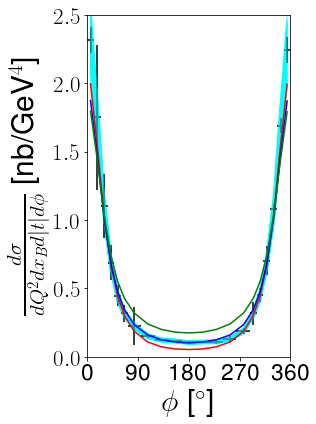

In [288]:
Q2xBtbin = 43

ineff = 1
xsec1 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec1"]/Frads[Q2xBtbin, 0.3]/ineff
weight1 = np.divide(np.ones(xsec1.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec1"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec1.shape, dtype = float), where = xsec1!=0)

xsec2 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec2"]/Frads[Q2xBtbin, 0.3]/ineff
weight2 = np.divide(np.ones(xsec2.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec2"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec2.shape, dtype = float), where = xsec2!=0)

xsec3 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec3"]/Frads[Q2xBtbin, 0.3]/ineff
weight3 = np.divide(np.ones(xsec3.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec3"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec3.shape, dtype = float), where = xsec3!=0)

xsec4 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec4"]/Frads[Q2xBtbin, 0.3]/ineff
weight4 = np.divide(np.ones(xsec4.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec4"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec4.shape, dtype = float), where = xsec4!=0)

xsec5 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec5"]/Frads[Q2xBtbin, 0.3]/ineff
weight5 = np.divide(np.ones(xsec5.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec5"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec5.shape, dtype = float), where = xsec5!=0)

xsec6 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec6"]/Frads[Q2xBtbin, 0.3]/ineff
weight6 = np.divide(np.ones(xsec6.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec6"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec6.shape, dtype = float), where = xsec6!=0)

unc = np.sqrt(np.divide(np.ones(weight1.shape), weight1, out =np.zeros(weight1.shape), where = weight1!=0)+np.divide(np.ones(weight2.shape), weight2, out =np.zeros(weight2.shape), where = weight2!=0) +np.divide(np.ones(weight3.shape), weight3, out =np.zeros(weight3.shape), where = weight3!=0) +np.divide(np.ones(weight4.shape), weight4, out =np.zeros(weight4.shape), where = weight4!=0) +np.divide(np.ones(weight5.shape), weight5, out =np.zeros(weight5.shape), where = weight5!=0) +np.divide(np.ones(weight6.shape), weight6, out =np.zeros(weight6.shape), where = weight6!=0))
weightsum = weight1 + weight2 + weight3 + weight4 + weight5 + weight6

xsec = (xsec1*weight1 + xsec2*weight2 + xsec3*weight3 + xsec4*weight4 + xsec5*weight5 + xsec6*weight6)/weightsum

# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec1"]/Frads[Q2xBtbin, 0.15], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec1"]/Frads[Q2xBtbin, 0.15], color = 'r', label = "Inb., (FD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec2"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec2"]/Frads[Q2xBtbin, 0.3], color = 'g', label = "Inb., (CD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec3"]/Frads[Q2xBtbin, 0.45], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec3"]/Frads[Q2xBtbin, 0.45], color = 'b', label = "Inb., (CD, FT)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec4"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec4"]/Frads[Q2xBtbin, 0.3], color = 'cyan', label = "Outb., (FD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec5"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec5"]/Frads[Q2xBtbin, 0.3], color = 'purple', label = "Outb., (CD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec6"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec6"]/Frads[Q2xBtbin, 0.3], color = 'k', label = "Outb., (CD, FT)", linestyle = '')

plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"], xsec, xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"]], yerr = unc, color = 'k', linestyle = '', label = 'data')

for n in np.linspace(1-0.114, 1+0.114, 1001):
    plt.plot(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"], n*xsec, color = 'cyan', alpha = 0.01)


plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r', label = 'pure BH')
plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printDVCSKMarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'b', label = 'KM15')
plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printDVCSarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'g', label = 'VGG')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg1"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg1"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printDVCSKMarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg1"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"]), frame = 'trento', pol = 0), color = 'k')

# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg2"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg2"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg2"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printDVCSarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg1"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')

plt.xticks([0, 90, 180, 270, 360], [0, 90, 180, 270, 360])
plt.xlabel(r"$\phi$" + " ["+degree+"]")
plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")
plt.ylim([0, 2.5])
# plt.legend(loc = 'right', bbox_to_anchor = (1.9,0.95))
plt.xlim([0, 360])
# plt.yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05], [0, 0.01, 0.02, 0.03, 0.04, 0.05])
plt.savefig("xsec{}.pdf".format(Q2xBtbin))

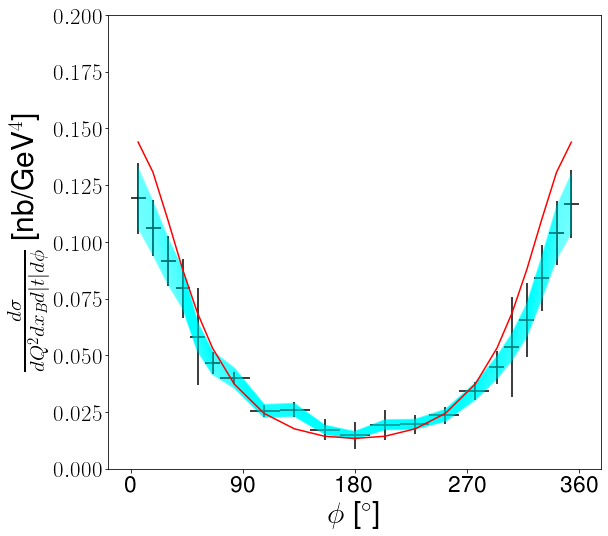

In [253]:
Q2xBtbin = 113

xsec1 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec1"]/Frads[Q2xBtbin, 0.15]
weight1 = np.divide(np.ones(xsec1.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec1"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec1.shape, dtype = float), where = xsec1!=0)

xsec2 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec2"]/Frads[Q2xBtbin, 0.3]
weight2 = np.divide(np.ones(xsec2.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec2"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec2.shape, dtype = float), where = xsec2!=0)

xsec3 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec3"]/Frads[Q2xBtbin, 0.45]
weight3 = np.divide(np.ones(xsec3.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec3"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec3.shape, dtype = float), where = xsec3!=0)

xsec4 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec4"]/Frads[Q2xBtbin, 0.3]
weight4 = np.divide(np.ones(xsec4.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec4"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec4.shape, dtype = float), where = xsec4!=0)

xsec5 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec5"]/Frads[Q2xBtbin, 0.3]
weight5 = np.divide(np.ones(xsec5.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec5"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec5.shape, dtype = float), where = xsec5!=0)

xsec6 = counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec6"]/Frads[Q2xBtbin, 0.3]
weight6 = np.divide(np.ones(xsec6.shape), (counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec6"]/Frads[Q2xBtbin, 0.3])**2, out = np.zeros(xsec6.shape, dtype = float), where = xsec6!=0)

unc = np.sqrt(np.divide(np.ones(weight1.shape), weight1, out =np.zeros(weight1.shape), where = weight1!=0)+np.divide(np.ones(weight2.shape), weight2, out =np.zeros(weight2.shape), where = weight2!=0) +np.divide(np.ones(weight3.shape), weight3, out =np.zeros(weight3.shape), where = weight3!=0) +np.divide(np.ones(weight4.shape), weight4, out =np.zeros(weight4.shape), where = weight4!=0) +np.divide(np.ones(weight5.shape), weight5, out =np.zeros(weight5.shape), where = weight5!=0) +np.divide(np.ones(weight6.shape), weight6, out =np.zeros(weight6.shape), where = weight6!=0))
weightsum = weight1 + weight2 + weight3 + weight4 + weight5 + weight6

xsec = (xsec1*weight1 + xsec2*weight2 + xsec3*weight3 + xsec4*weight4 + xsec5*weight5 + xsec6*weight6)/weightsum

# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec1"]/Frads[Q2xBtbin, 0.15], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec1"]/Frads[Q2xBtbin, 0.15], color = 'r', label = "Inb., (FD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec2"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec2"]/Frads[Q2xBtbin, 0.3], color = 'g', label = "Inb., (CD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec3"]/Frads[Q2xBtbin, 0.45], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec3"]/Frads[Q2xBtbin, 0.45], color = 'b', label = "Inb., (CD, FT)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec4"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec4"]/Frads[Q2xBtbin, 0.3], color = 'cyan', label = "Outb., (FD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec5"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec5"]/Frads[Q2xBtbin, 0.3], color = 'purple', label = "Outb., (CD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec6"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec6"]/Frads[Q2xBtbin, 0.3], color = 'k', label = "Outb., (CD, FT)", linestyle = '')

plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"], xsec, xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"]], yerr = unc, color = 'k', linestyle = '')

for n in np.linspace(1-0.114, 1+0.114, 1001):
    plt.plot(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg2"], n*xsec, color = 'cyan', alpha = 0.01)


plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg1"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg1"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg2"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg2"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg2"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg2"])), color = 'r')
plt.xticks([0, 90, 180, 270, 360], [0, 90, 180, 270, 360])
plt.xlabel(r"$\phi$" + " ["+degree+"]")
plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")
plt.ylim([0, 0.2])
plt.savefig("xsec{}.pdf".format(Q2xBtbin))

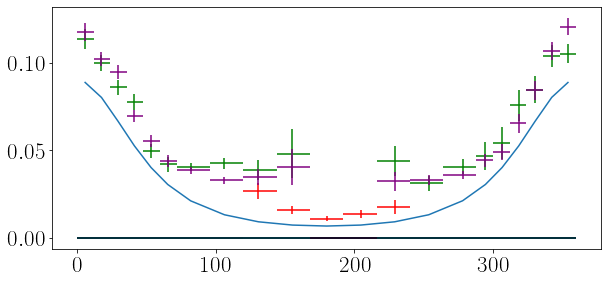

In [144]:
Q2xBtbin = 85
plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec1"]/Frads[Q2xBtbin, 0.15], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec1"]/Frads[Q2xBtbin, 0.15], color = 'r', label = "Inb., (FD, FD)", linestyle = '')
plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec2"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec2"]/Frads[Q2xBtbin, 0.3], color = 'g', label = "Inb., (CD, FD)", linestyle = '')
plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec3"]/Frads[Q2xBtbin, 0.45], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec3"]/Frads[Q2xBtbin, 0.45], color = 'b', label = "Inb., (CD, FT)", linestyle = '')
plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec4"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec4"]/Frads[Q2xBtbin, 0.3], color = 'cyan', label = "Outb., (FD, FD)", linestyle = '')
plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec5"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec5"]/Frads[Q2xBtbin, 0.3], color = 'purple', label = "Outb., (CD, FD)", linestyle = '')
plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec6"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec6"]/Frads[Q2xBtbin, 0.3], color = 'k', label = "Outb., (CD, FT)", linestyle = '')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"], printBHarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"])))
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"], printBHarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"])))
plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"])))

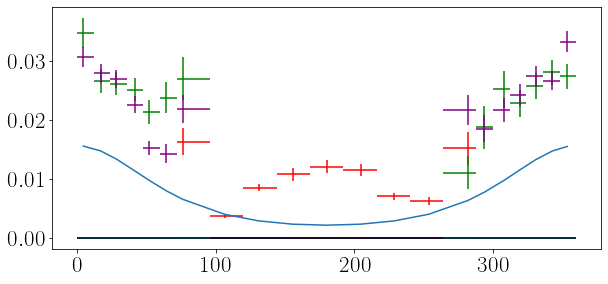

In [148]:
Q2xBtbin = 92
plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec1"]/Frads[Q2xBtbin, 0.15], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec1"]/Frads[Q2xBtbin, 0.15], color = 'r', label = "Inb., (FD, FD)", linestyle = '')
plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec2"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec2"]/Frads[Q2xBtbin, 0.3], color = 'g', label = "Inb., (CD, FD)", linestyle = '')
plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec3"]/Frads[Q2xBtbin, 0.45], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec3"]/Frads[Q2xBtbin, 0.45], color = 'b', label = "Inb., (CD, FT)", linestyle = '')
plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec4"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec4"]/Frads[Q2xBtbin, 0.3], color = 'cyan', label = "Outb., (FD, FD)", linestyle = '')
plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec5"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec5"]/Frads[Q2xBtbin, 0.3], color = 'purple', label = "Outb., (CD, FD)", linestyle = '')
plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec6"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec6"]/Frads[Q2xBtbin, 0.3], color = 'k', label = "Outb., (CD, FT)", linestyle = '')
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"], printBHarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"])))
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"], printBHarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"])))
plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"])))

In [188]:
# Q2xBtbin = 113
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec1"]/Frads[Q2xBtbin, 0.15], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec1"]/Frads[Q2xBtbin, 0.15], color = 'r', label = "Inb., (FD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec2"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec2"]/Frads[Q2xBtbin, 0.3], color = 'g', label = "Inb., (CD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec3"]/Frads[Q2xBtbin, 0.45], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec3"]/Frads[Q2xBtbin, 0.45], color = 'b', label = "Inb., (CD, FT)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec4"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec4"]/Frads[Q2xBtbin, 0.3], color = 'cyan', label = "Outb., (FD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec5"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec5"]/Frads[Q2xBtbin, 0.3], color = 'purple', label = "Outb., (CD, FD)", linestyle = '')
# plt.errorbar(trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xsec6"]/Frads[Q2xBtbin, 0.3], xerr = [trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_i"], trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phi_f"]-trueVol.loc[trueVol.Q2xBtbin==Q2xBtbin, "phiavg"]], yerr = counts.loc[counts.Q2xBtbin==Q2xBtbin, "uncxsec6"]/Frads[Q2xBtbin, 0.3], color = 'k', label = "Outb., (CD, FT)", linestyle = '')
# # plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"], printBHarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"])))
# plt.plot(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"], printBHarray(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xBavg"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2avg"], trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "tavg"], np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"])))

In [189]:
# counts.loc[counts.Q2xBtbin==Q2xBtbin, "dvcsExpOutb3"]

1853    0.0
1854    0.0
1855    0.0
1856    0.0
1857    0.0
1858    0.0
1859    0.0
1860    0.0
1861    0.0
1862    0.0
1863    0.0
1864    0.0
1865    0.0
1866    0.0
1867    0.0
1868    0.0
1869    0.0
1870    0.0
1871    0.0
1872    0.0
1873    0.0
Name: dvcsExpOutb3, dtype: float64

In [191]:
# Q2xBtbin = 85
# printBHarray((trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "xB_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "Q2_i"])/2, (trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_f"]+trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "t_i"])/2, np.radians(trueVol.loc[trueVol.Q2xBtbin == Q2xBtbin, "phiavg"]))

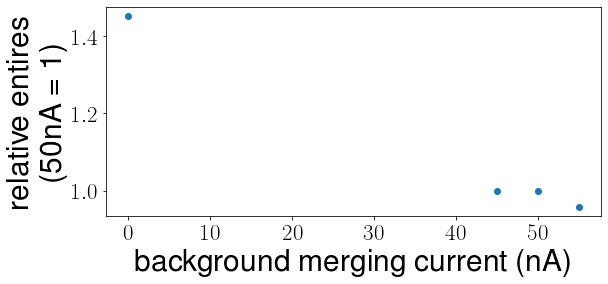

In [192]:
plt.scatter([0, 45, 50, 55], [sum(counts.dvcsSimInb0nA2)/sum(counts.dvcsSimInb50nA2)*5, sum(counts.dvcsSimInb45nA2)/sum(counts.dvcsSimInb50nA2)*5, 1,  sum(counts.dvcsSimInb55nA2)/sum(counts.dvcsSimInb50nA2)*5])
plt.xlabel("background merging current (nA)")
plt.ylabel("relative entires\n (50nA = 1)")
plt.tight_layout()
# plt.savefig("beamcurrentInb.pdf")

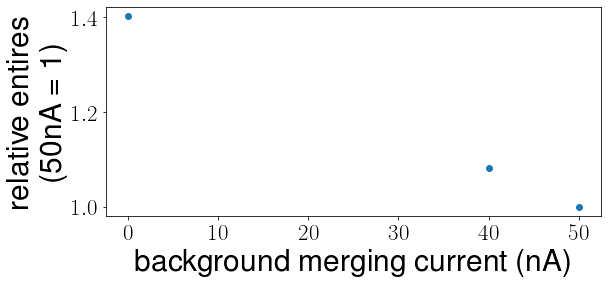

In [193]:
plt.scatter([0, 40, 50], [sum(counts.dvcsSimOutb0nA2)/sum(counts.dvcsSimOutb50nA2)*5, sum(counts.dvcsSimOutb40nA2)/sum(counts.dvcsSimOutb50nA2)*5, 1])
plt.xlabel("background merging current (nA)")
plt.ylabel("relative entires\n(50nA = 1)")
plt.tight_layout()

# plt.savefig("beamcurrentOutb.pdf")

In [247]:
parent_Gen = "/Volumes/Extreme SSD/Mar2022/results/Gen/"
parent_Rec = "/Volumes/Extreme SSD/Mar2022/results/onepone_3sigma/"

a = 0
for run in [*runs_inb_dvcs50nA, *runs_inb_dvcs55nA, *runs_inb_dvcs45nA, *runs_inb_dvcs0nA, *runs_inb_bh50nA, *runs_outb_dvcs50nA, *runs_outb_dvcs40nA, *runs_outb_dvcs0nA, *runs_outb_dvcs40nAT, *runs_outb_bh50nA]:
    if a == 0:
        counts11 = pd.read_pickle(parent_Rec + "{}.pkl".format(run))
        a = 1
    else:
        counts11 = pd.merge(counts11, pd.read_pickle(parent_Rec + "{}.pkl".format(run)))
    counts11 = pd.merge(counts11, pd.read_pickle(parent_Gen + "{}Gen.pkl".format(run)))
for run in [*runs_inb_bkg50nA, *runs_inb_bkg55nA, *runs_inb_bkg45nA, *runs_inb_bkg0nA, *runs_outb_bkg50nA, *runs_outb_bkg40nA, *runs_outb_bkg0nA, *runs_outb_bkg40nAT]:
    counts11 = pd.merge(counts11, pd.read_pickle(parent_Rec + "{}bkg_1g.pkl".format(run)))
    counts11 = pd.merge(counts11, pd.read_pickle(parent_Rec + "{}bkg_2g.pkl".format(run)))

counts11.loc[:, "dvcsSimInb50nA1"] = np.sum(counts11.loc[:, ["{}1".format(run) for run in runs_inb_dvcs50nA]], axis = 1)
counts11.loc[:, "dvcsSimInb50nA2"] = np.sum(counts11.loc[:, ["{}2".format(run) for run in runs_inb_dvcs50nA]], axis = 1)
counts11.loc[:, "dvcsSimInb50nA3"] = np.sum(counts11.loc[:, ["{}3".format(run) for run in runs_inb_dvcs50nA]], axis = 1)

counts11.loc[:, "dvcsSimInb55nA1"] = np.sum(counts11.loc[:, ["{}1".format(run) for run in runs_inb_dvcs55nA]], axis = 1)
counts11.loc[:, "dvcsSimInb55nA2"] = np.sum(counts11.loc[:, ["{}2".format(run) for run in runs_inb_dvcs55nA]], axis = 1)
counts11.loc[:, "dvcsSimInb55nA3"] = np.sum(counts11.loc[:, ["{}3".format(run) for run in runs_inb_dvcs55nA]], axis = 1)

counts11.loc[:, "dvcsSimInb45nA1"] = np.sum(counts11.loc[:, ["{}1".format(run) for run in runs_inb_dvcs45nA]], axis = 1)
counts11.loc[:, "dvcsSimInb45nA2"] = np.sum(counts11.loc[:, ["{}2".format(run) for run in runs_inb_dvcs45nA]], axis = 1)
counts11.loc[:, "dvcsSimInb45nA3"] = np.sum(counts11.loc[:, ["{}3".format(run) for run in runs_inb_dvcs45nA]], axis = 1)

counts11.loc[:, "dvcsSimInb0nA1"] = np.sum(counts11.loc[:, ["{}1".format(run) for run in runs_inb_dvcs0nA]], axis = 1)
counts11.loc[:, "dvcsSimInb0nA2"] = np.sum(counts11.loc[:, ["{}2".format(run) for run in runs_inb_dvcs0nA]], axis = 1)
counts11.loc[:, "dvcsSimInb0nA3"] = np.sum(counts11.loc[:, ["{}3".format(run) for run in runs_inb_dvcs0nA]], axis = 1)

counts11.loc[:, "bhSimInb50nA1"] = np.sum(counts11.loc[:, ["{}1".format(run) for run in runs_inb_bh50nA]], axis = 1)
counts11.loc[:, "bhSimInb50nA2"] = np.sum(counts11.loc[:, ["{}2".format(run) for run in runs_inb_bh50nA]], axis = 1)
counts11.loc[:, "bhSimInb50nA3"] = np.sum(counts11.loc[:, ["{}3".format(run) for run in runs_inb_bh50nA]], axis = 1)

counts11.loc[:, "bkg1gSimInb50nA1"] = np.sum(counts11.loc[:, ["{}bkg_1g1".format(run) for run in runs_inb_bkg50nA]], axis = 1)
counts11.loc[:, "bkg1gSimInb50nA2"] = np.sum(counts11.loc[:, ["{}bkg_1g2".format(run) for run in runs_inb_bkg50nA]], axis = 1)
counts11.loc[:, "bkg1gSimInb50nA3"] = np.sum(counts11.loc[:, ["{}bkg_1g3".format(run) for run in runs_inb_bkg50nA]], axis = 1)

counts11.loc[:, "bkg1gSimInb55nA1"] = np.sum(counts11.loc[:, ["{}bkg_1g1".format(run) for run in runs_inb_bkg55nA]], axis = 1)
counts11.loc[:, "bkg1gSimInb55nA2"] = np.sum(counts11.loc[:, ["{}bkg_1g2".format(run) for run in runs_inb_bkg55nA]], axis = 1)
counts11.loc[:, "bkg1gSimInb55nA3"] = np.sum(counts11.loc[:, ["{}bkg_1g3".format(run) for run in runs_inb_bkg55nA]], axis = 1)

counts11.loc[:, "bkg1gSimInb45nA1"] = np.sum(counts11.loc[:, ["{}bkg_1g1".format(run) for run in runs_inb_bkg45nA]], axis = 1)
counts11.loc[:, "bkg1gSimInb45nA2"] = np.sum(counts11.loc[:, ["{}bkg_1g2".format(run) for run in runs_inb_bkg45nA]], axis = 1)
counts11.loc[:, "bkg1gSimInb45nA3"] = np.sum(counts11.loc[:, ["{}bkg_1g3".format(run) for run in runs_inb_bkg45nA]], axis = 1)

counts11.loc[:, "bkg1gSimInb0nA1"] = np.sum(counts11.loc[:, ["{}bkg_1g1".format(run) for run in runs_inb_bkg0nA]], axis = 1)
counts11.loc[:, "bkg1gSimInb0nA2"] = np.sum(counts11.loc[:, ["{}bkg_1g2".format(run) for run in runs_inb_bkg0nA]], axis = 1)
counts11.loc[:, "bkg1gSimInb0nA3"] = np.sum(counts11.loc[:, ["{}bkg_1g3".format(run) for run in runs_inb_bkg0nA]], axis = 1)

counts11.loc[:, "bkg2gSimInb50nA1"] = np.sum(counts11.loc[:, ["{}bkg_2g1".format(run) for run in runs_inb_bkg50nA]], axis = 1)
counts11.loc[:, "bkg2gSimInb50nA2"] = np.sum(counts11.loc[:, ["{}bkg_2g2".format(run) for run in runs_inb_bkg50nA]], axis = 1)
counts11.loc[:, "bkg2gSimInb50nA3"] = np.sum(counts11.loc[:, ["{}bkg_2g3".format(run) for run in runs_inb_bkg50nA]], axis = 1)

counts11.loc[:, "bkg2gSimInb55nA1"] = np.sum(counts11.loc[:, ["{}bkg_2g1".format(run) for run in runs_inb_bkg55nA]], axis = 1)
counts11.loc[:, "bkg2gSimInb55nA2"] = np.sum(counts11.loc[:, ["{}bkg_2g2".format(run) for run in runs_inb_bkg55nA]], axis = 1)
counts11.loc[:, "bkg2gSimInb55nA3"] = np.sum(counts11.loc[:, ["{}bkg_2g3".format(run) for run in runs_inb_bkg55nA]], axis = 1)

counts11.loc[:, "bkg2gSimInb45nA1"] = np.sum(counts11.loc[:, ["{}bkg_2g1".format(run) for run in runs_inb_bkg45nA]], axis = 1)
counts11.loc[:, "bkg2gSimInb45nA2"] = np.sum(counts11.loc[:, ["{}bkg_2g2".format(run) for run in runs_inb_bkg45nA]], axis = 1)
counts11.loc[:, "bkg2gSimInb45nA3"] = np.sum(counts11.loc[:, ["{}bkg_2g3".format(run) for run in runs_inb_bkg45nA]], axis = 1)

counts11.loc[:, "bkg2gSimInb0nA1"] = np.sum(counts11.loc[:, ["{}bkg_2g1".format(run) for run in runs_inb_bkg0nA]], axis = 1)
counts11.loc[:, "bkg2gSimInb0nA2"] = np.sum(counts11.loc[:, ["{}bkg_2g2".format(run) for run in runs_inb_bkg0nA]], axis = 1)
counts11.loc[:, "bkg2gSimInb0nA3"] = np.sum(counts11.loc[:, ["{}bkg_2g3".format(run) for run in runs_inb_bkg0nA]], axis = 1)


counts11.loc[:, "dvcsSimOutb50nA1"] = np.sum(counts11.loc[:, ["{}1".format(run) for run in runs_outb_dvcs50nA]], axis = 1)
counts11.loc[:, "dvcsSimOutb50nA2"] = np.sum(counts11.loc[:, ["{}2".format(run) for run in runs_outb_dvcs50nA]], axis = 1)
counts11.loc[:, "dvcsSimOutb50nA3"] = np.sum(counts11.loc[:, ["{}3".format(run) for run in runs_outb_dvcs50nA]], axis = 1)

counts11.loc[:, "dvcsSimOutb40nA1"] = np.sum(counts11.loc[:, ["{}1".format(run) for run in runs_outb_dvcs40nA]], axis = 1)
counts11.loc[:, "dvcsSimOutb40nA2"] = np.sum(counts11.loc[:, ["{}2".format(run) for run in runs_outb_dvcs40nA]], axis = 1)
counts11.loc[:, "dvcsSimOutb40nA3"] = np.sum(counts11.loc[:, ["{}3".format(run) for run in runs_outb_dvcs40nA]], axis = 1)

counts11.loc[:, "dvcsSimOutb0nA1"] = np.sum(counts11.loc[:, ["{}1".format(run) for run in runs_outb_dvcs0nA]], axis = 1)
counts11.loc[:, "dvcsSimOutb0nA2"] = np.sum(counts11.loc[:, ["{}2".format(run) for run in runs_outb_dvcs0nA]], axis = 1)
counts11.loc[:, "dvcsSimOutb0nA3"] = np.sum(counts11.loc[:, ["{}3".format(run) for run in runs_outb_dvcs0nA]], axis = 1)

counts11.loc[:, "dvcsSimOutb40nAT1"] = np.sum(counts11.loc[:, ["{}1".format(run) for run in runs_outb_dvcs40nAT]], axis = 1)
counts11.loc[:, "dvcsSimOutb40nAT2"] = np.sum(counts11.loc[:, ["{}2".format(run) for run in runs_outb_dvcs40nAT]], axis = 1)
counts11.loc[:, "dvcsSimOutb40nAT3"] = np.sum(counts11.loc[:, ["{}3".format(run) for run in runs_outb_dvcs40nAT]], axis = 1)

counts11.loc[:, "bhSimOutb50nA1"] = np.sum(counts11.loc[:, ["{}1".format(run) for run in runs_outb_bh50nA]], axis = 1)
counts11.loc[:, "bhSimOutb50nA2"] = np.sum(counts11.loc[:, ["{}2".format(run) for run in runs_outb_bh50nA]], axis = 1)
counts11.loc[:, "bhSimOutb50nA3"] = np.sum(counts11.loc[:, ["{}3".format(run) for run in runs_outb_bh50nA]], axis = 1)

counts11.loc[:, "bkg1gSimOutb50nA1"] = np.sum(counts11.loc[:, ["{}bkg_1g1".format(run) for run in runs_outb_bkg50nA]], axis = 1)
counts11.loc[:, "bkg1gSimOutb50nA2"] = np.sum(counts11.loc[:, ["{}bkg_1g2".format(run) for run in runs_outb_bkg50nA]], axis = 1)
counts11.loc[:, "bkg1gSimOutb50nA3"] = np.sum(counts11.loc[:, ["{}bkg_1g3".format(run) for run in runs_outb_bkg50nA]], axis = 1)

counts11.loc[:, "bkg1gSimOutb40nA1"] = np.sum(counts11.loc[:, ["{}bkg_1g1".format(run) for run in runs_outb_bkg40nA]], axis = 1)
counts11.loc[:, "bkg1gSimOutb40nA2"] = np.sum(counts11.loc[:, ["{}bkg_1g2".format(run) for run in runs_outb_bkg40nA]], axis = 1)
counts11.loc[:, "bkg1gSimOutb40nA3"] = np.sum(counts11.loc[:, ["{}bkg_1g3".format(run) for run in runs_outb_bkg40nA]], axis = 1)

counts11.loc[:, "bkg1gSimOutb0nA1"] = np.sum(counts11.loc[:, ["{}bkg_1g1".format(run) for run in runs_outb_bkg0nA]], axis = 1)
counts11.loc[:, "bkg1gSimOutb0nA2"] = np.sum(counts11.loc[:, ["{}bkg_1g2".format(run) for run in runs_outb_bkg0nA]], axis = 1)
counts11.loc[:, "bkg1gSimOutb0nA3"] = np.sum(counts11.loc[:, ["{}bkg_1g3".format(run) for run in runs_outb_bkg0nA]], axis = 1)

counts11.loc[:, "bkg1gSimOutb40nAT1"] = np.sum(counts11.loc[:, ["{}bkg_1g1".format(run) for run in runs_outb_bkg40nAT]], axis = 1)
counts11.loc[:, "bkg1gSimOutb40nAT2"] = np.sum(counts11.loc[:, ["{}bkg_1g2".format(run) for run in runs_outb_bkg40nAT]], axis = 1)
counts11.loc[:, "bkg1gSimOutb40nAT3"] = np.sum(counts11.loc[:, ["{}bkg_1g3".format(run) for run in runs_outb_bkg40nAT]], axis = 1)

counts11.loc[:, "bkg2gSimOutb50nA1"] = np.sum(counts11.loc[:, ["{}bkg_2g1".format(run) for run in runs_outb_bkg50nA]], axis = 1)
counts11.loc[:, "bkg2gSimOutb50nA2"] = np.sum(counts11.loc[:, ["{}bkg_2g2".format(run) for run in runs_outb_bkg50nA]], axis = 1)
counts11.loc[:, "bkg2gSimOutb50nA3"] = np.sum(counts11.loc[:, ["{}bkg_2g3".format(run) for run in runs_outb_bkg50nA]], axis = 1)

counts11.loc[:, "bkg2gSimOutb40nA1"] = np.sum(counts11.loc[:, ["{}bkg_2g1".format(run) for run in runs_outb_bkg40nA]], axis = 1)
counts11.loc[:, "bkg2gSimOutb40nA2"] = np.sum(counts11.loc[:, ["{}bkg_2g2".format(run) for run in runs_outb_bkg40nA]], axis = 1)
counts11.loc[:, "bkg2gSimOutb40nA3"] = np.sum(counts11.loc[:, ["{}bkg_2g3".format(run) for run in runs_outb_bkg40nA]], axis = 1)

counts11.loc[:, "bkg2gSimOutb0nA1"] = np.sum(counts11.loc[:, ["{}bkg_2g1".format(run) for run in runs_outb_bkg0nA]], axis = 1)
counts11.loc[:, "bkg2gSimOutb0nA2"] = np.sum(counts11.loc[:, ["{}bkg_2g2".format(run) for run in runs_outb_bkg0nA]], axis = 1)
counts11.loc[:, "bkg2gSimOutb0nA3"] = np.sum(counts11.loc[:, ["{}bkg_2g3".format(run) for run in runs_outb_bkg0nA]], axis = 1)

counts11.loc[:, "bkg2gSimOutb40nAT1"] = np.sum(counts11.loc[:, ["{}bkg_2g1".format(run) for run in runs_outb_bkg40nAT]], axis = 1)
counts11.loc[:, "bkg2gSimOutb40nAT2"] = np.sum(counts11.loc[:, ["{}bkg_2g2".format(run) for run in runs_outb_bkg40nAT]], axis = 1)
counts11.loc[:, "bkg2gSimOutb40nAT3"] = np.sum(counts11.loc[:, ["{}bkg_2g3".format(run) for run in runs_outb_bkg40nAT]], axis = 1)

counts11.loc[:, "dvcsSimInb50nAGen"] = np.sum(counts11.loc[:, ["{}Gen".format(run) for run in runs_inb_dvcs50nA]], axis = 1)
counts11.loc[:, "dvcsSimInb55nAGen"] = np.sum(counts11.loc[:, ["{}Gen".format(run) for run in runs_inb_dvcs55nA]], axis = 1)
counts11.loc[:, "dvcsSimInb45nAGen"] = np.sum(counts11.loc[:, ["{}Gen".format(run) for run in runs_inb_dvcs45nA]], axis = 1)
counts11.loc[:, "dvcsSimInb0nAGen"] = np.sum(counts11.loc[:, ["{}Gen".format(run) for run in runs_inb_dvcs0nA]], axis = 1)
counts11.loc[:, "bhSimInb50nAGen"] = np.sum(counts11.loc[:, ["{}Gen".format(run) for run in runs_inb_bh50nA]], axis = 1)

counts11.loc[:, "dvcsSimOutb50nAGen"] = np.sum(counts11.loc[:, ["{}Gen".format(run) for run in runs_outb_dvcs50nA]], axis = 1)
counts11.loc[:, "dvcsSimOutb40nAGen"] = np.sum(counts11.loc[:, ["{}Gen".format(run) for run in runs_outb_dvcs40nA]], axis = 1)
counts11.loc[:, "dvcsSimOutb0nAGen"] = np.sum(counts11.loc[:, ["{}Gen".format(run) for run in runs_outb_dvcs0nA]], axis = 1)
counts11.loc[:, "dvcsSimOutb40nATGen"] = np.sum(counts11.loc[:, ["{}Gen".format(run) for run in runs_outb_dvcs40nAT]], axis = 1)
counts11.loc[:, "bhSimOutb50nAGen"] = np.sum(counts11.loc[:, ["{}Gen".format(run) for run in runs_outb_bh50nA]], axis = 1)


counts11.loc[:, "accInb1"] = np.divide(counts11.dvcsSimInb50nA1, counts11.dvcsSimInb50nAGen, out = np.zeros(counts11.dvcsSimInb50nAGen.shape, dtype = float), where = counts11.dvcsSimInb50nA1!=0)
counts11.loc[:, "accInb2"] = np.divide(counts11.dvcsSimInb50nA2, counts11.dvcsSimInb50nAGen, out = np.zeros(counts11.dvcsSimInb50nAGen.shape, dtype = float), where = counts11.dvcsSimInb50nA2!=0)
counts11.loc[:, "accInb3"] = np.divide(counts11.dvcsSimInb50nA3, counts11.dvcsSimInb50nAGen, out = np.zeros(counts11.dvcsSimInb50nAGen.shape, dtype = float), where = counts11.dvcsSimInb50nA3!=0)

counts11.loc[:, "accOutb1"] = np.divide(counts11.dvcsSimOutb50nA1, counts11.dvcsSimOutb50nAGen, out = np.zeros(counts11.dvcsSimOutb50nAGen.shape, dtype = float), where = counts11.dvcsSimOutb50nA1!=0)
counts11.loc[:, "accOutb2"] = np.divide(counts11.dvcsSimOutb50nA2, counts11.dvcsSimOutb50nAGen, out = np.zeros(counts11.dvcsSimOutb50nAGen.shape, dtype = float), where = counts11.dvcsSimOutb50nA2!=0)
counts11.loc[:, "accOutb3"] = np.divide(counts11.dvcsSimOutb50nA3, counts11.dvcsSimOutb50nAGen, out = np.zeros(counts11.dvcsSimOutb50nAGen.shape, dtype = float), where = counts11.dvcsSimOutb50nA3!=0)

counts11.loc[:, "accInb1"] = np.divide(counts11.dvcsSimInb50nA1, counts11.dvcsSimInb50nAGen, out = np.zeros(counts11.dvcsSimInb50nAGen.shape, dtype = float), where = counts11.dvcsSimInb50nA1!=0)
counts11.loc[:, "accInb2"] = np.divide(counts11.dvcsSimInb50nA2, counts11.dvcsSimInb50nAGen, out = np.zeros(counts11.dvcsSimInb50nAGen.shape, dtype = float), where = counts11.dvcsSimInb50nA2!=0)
counts11.loc[:, "accInb3"] = np.divide(counts11.dvcsSimInb50nA3, counts11.dvcsSimInb50nAGen, out = np.zeros(counts11.dvcsSimInb50nAGen.shape, dtype = float), where = counts11.dvcsSimInb50nA3!=0)

counts11.loc[:, "accOutb1"] = np.divide(counts11.dvcsSimOutb50nA1, counts11.dvcsSimOutb50nAGen, out = np.zeros(counts11.dvcsSimOutb50nAGen.shape, dtype = float), where = counts11.dvcsSimOutb50nA1!=0)
counts11.loc[:, "accOutb2"] = np.divide(counts11.dvcsSimOutb50nA2, counts11.dvcsSimOutb50nAGen, out = np.zeros(counts11.dvcsSimOutb50nAGen.shape, dtype = float), where = counts11.dvcsSimOutb50nA2!=0)
counts11.loc[:, "accOutb3"] = np.divide(counts11.dvcsSimOutb50nA3, counts11.dvcsSimOutb50nAGen, out = np.zeros(counts11.dvcsSimOutb50nAGen.shape, dtype = float), where = counts11.dvcsSimOutb50nA3!=0)

In [248]:
parent_Gen = "/Volumes/Extreme SSD/Mar2022/results/Gen/"
parent_Rec = "/Volumes/Extreme SSD/Mar2022/results/ninetyp_3sigma/"

a = 0
for run in [*runs_inb_dvcs50nA, *runs_inb_dvcs55nA, *runs_inb_dvcs45nA, *runs_inb_dvcs0nA, *runs_inb_bh50nA, *runs_outb_dvcs50nA, *runs_outb_dvcs40nA, *runs_outb_dvcs0nA, *runs_outb_dvcs40nAT, *runs_outb_bh50nA]:
    if a == 0:
        counts09 = pd.read_pickle(parent_Rec + "{}.pkl".format(run))
        a = 1
    else:
        counts09 = pd.merge(counts09, pd.read_pickle(parent_Rec + "{}.pkl".format(run)))
    counts09 = pd.merge(counts09, pd.read_pickle(parent_Gen + "{}Gen.pkl".format(run)))
for run in [*runs_inb_bkg50nA, *runs_inb_bkg55nA, *runs_inb_bkg45nA, *runs_inb_bkg0nA, *runs_outb_bkg50nA, *runs_outb_bkg40nA, *runs_outb_bkg0nA, *runs_outb_bkg40nAT]:
    counts09 = pd.merge(counts09, pd.read_pickle(parent_Rec + "{}bkg_1g.pkl".format(run)))
    counts09 = pd.merge(counts09, pd.read_pickle(parent_Rec + "{}bkg_2g.pkl".format(run)))

counts09.loc[:, "dvcsSimInb50nA1"] = np.sum(counts09.loc[:, ["{}1".format(run) for run in runs_inb_dvcs50nA]], axis = 1)
counts09.loc[:, "dvcsSimInb50nA2"] = np.sum(counts09.loc[:, ["{}2".format(run) for run in runs_inb_dvcs50nA]], axis = 1)
counts09.loc[:, "dvcsSimInb50nA3"] = np.sum(counts09.loc[:, ["{}3".format(run) for run in runs_inb_dvcs50nA]], axis = 1)

counts09.loc[:, "dvcsSimInb55nA1"] = np.sum(counts09.loc[:, ["{}1".format(run) for run in runs_inb_dvcs55nA]], axis = 1)
counts09.loc[:, "dvcsSimInb55nA2"] = np.sum(counts09.loc[:, ["{}2".format(run) for run in runs_inb_dvcs55nA]], axis = 1)
counts09.loc[:, "dvcsSimInb55nA3"] = np.sum(counts09.loc[:, ["{}3".format(run) for run in runs_inb_dvcs55nA]], axis = 1)

counts09.loc[:, "dvcsSimInb45nA1"] = np.sum(counts09.loc[:, ["{}1".format(run) for run in runs_inb_dvcs45nA]], axis = 1)
counts09.loc[:, "dvcsSimInb45nA2"] = np.sum(counts09.loc[:, ["{}2".format(run) for run in runs_inb_dvcs45nA]], axis = 1)
counts09.loc[:, "dvcsSimInb45nA3"] = np.sum(counts09.loc[:, ["{}3".format(run) for run in runs_inb_dvcs45nA]], axis = 1)

counts09.loc[:, "dvcsSimInb0nA1"] = np.sum(counts09.loc[:, ["{}1".format(run) for run in runs_inb_dvcs0nA]], axis = 1)
counts09.loc[:, "dvcsSimInb0nA2"] = np.sum(counts09.loc[:, ["{}2".format(run) for run in runs_inb_dvcs0nA]], axis = 1)
counts09.loc[:, "dvcsSimInb0nA3"] = np.sum(counts09.loc[:, ["{}3".format(run) for run in runs_inb_dvcs0nA]], axis = 1)

counts09.loc[:, "bhSimInb50nA1"] = np.sum(counts09.loc[:, ["{}1".format(run) for run in runs_inb_bh50nA]], axis = 1)
counts09.loc[:, "bhSimInb50nA2"] = np.sum(counts09.loc[:, ["{}2".format(run) for run in runs_inb_bh50nA]], axis = 1)
counts09.loc[:, "bhSimInb50nA3"] = np.sum(counts09.loc[:, ["{}3".format(run) for run in runs_inb_bh50nA]], axis = 1)

counts09.loc[:, "bkg1gSimInb50nA1"] = np.sum(counts09.loc[:, ["{}bkg_1g1".format(run) for run in runs_inb_bkg50nA]], axis = 1)
counts09.loc[:, "bkg1gSimInb50nA2"] = np.sum(counts09.loc[:, ["{}bkg_1g2".format(run) for run in runs_inb_bkg50nA]], axis = 1)
counts09.loc[:, "bkg1gSimInb50nA3"] = np.sum(counts09.loc[:, ["{}bkg_1g3".format(run) for run in runs_inb_bkg50nA]], axis = 1)

counts09.loc[:, "bkg1gSimInb55nA1"] = np.sum(counts09.loc[:, ["{}bkg_1g1".format(run) for run in runs_inb_bkg55nA]], axis = 1)
counts09.loc[:, "bkg1gSimInb55nA2"] = np.sum(counts09.loc[:, ["{}bkg_1g2".format(run) for run in runs_inb_bkg55nA]], axis = 1)
counts09.loc[:, "bkg1gSimInb55nA3"] = np.sum(counts09.loc[:, ["{}bkg_1g3".format(run) for run in runs_inb_bkg55nA]], axis = 1)

counts09.loc[:, "bkg1gSimInb45nA1"] = np.sum(counts09.loc[:, ["{}bkg_1g1".format(run) for run in runs_inb_bkg45nA]], axis = 1)
counts09.loc[:, "bkg1gSimInb45nA2"] = np.sum(counts09.loc[:, ["{}bkg_1g2".format(run) for run in runs_inb_bkg45nA]], axis = 1)
counts09.loc[:, "bkg1gSimInb45nA3"] = np.sum(counts09.loc[:, ["{}bkg_1g3".format(run) for run in runs_inb_bkg45nA]], axis = 1)

counts09.loc[:, "bkg1gSimInb0nA1"] = np.sum(counts09.loc[:, ["{}bkg_1g1".format(run) for run in runs_inb_bkg0nA]], axis = 1)
counts09.loc[:, "bkg1gSimInb0nA2"] = np.sum(counts09.loc[:, ["{}bkg_1g2".format(run) for run in runs_inb_bkg0nA]], axis = 1)
counts09.loc[:, "bkg1gSimInb0nA3"] = np.sum(counts09.loc[:, ["{}bkg_1g3".format(run) for run in runs_inb_bkg0nA]], axis = 1)

counts09.loc[:, "bkg2gSimInb50nA1"] = np.sum(counts09.loc[:, ["{}bkg_2g1".format(run) for run in runs_inb_bkg50nA]], axis = 1)
counts09.loc[:, "bkg2gSimInb50nA2"] = np.sum(counts09.loc[:, ["{}bkg_2g2".format(run) for run in runs_inb_bkg50nA]], axis = 1)
counts09.loc[:, "bkg2gSimInb50nA3"] = np.sum(counts09.loc[:, ["{}bkg_2g3".format(run) for run in runs_inb_bkg50nA]], axis = 1)

counts09.loc[:, "bkg2gSimInb55nA1"] = np.sum(counts09.loc[:, ["{}bkg_2g1".format(run) for run in runs_inb_bkg55nA]], axis = 1)
counts09.loc[:, "bkg2gSimInb55nA2"] = np.sum(counts09.loc[:, ["{}bkg_2g2".format(run) for run in runs_inb_bkg55nA]], axis = 1)
counts09.loc[:, "bkg2gSimInb55nA3"] = np.sum(counts09.loc[:, ["{}bkg_2g3".format(run) for run in runs_inb_bkg55nA]], axis = 1)

counts09.loc[:, "bkg2gSimInb45nA1"] = np.sum(counts09.loc[:, ["{}bkg_2g1".format(run) for run in runs_inb_bkg45nA]], axis = 1)
counts09.loc[:, "bkg2gSimInb45nA2"] = np.sum(counts09.loc[:, ["{}bkg_2g2".format(run) for run in runs_inb_bkg45nA]], axis = 1)
counts09.loc[:, "bkg2gSimInb45nA3"] = np.sum(counts09.loc[:, ["{}bkg_2g3".format(run) for run in runs_inb_bkg45nA]], axis = 1)

counts09.loc[:, "bkg2gSimInb0nA1"] = np.sum(counts09.loc[:, ["{}bkg_2g1".format(run) for run in runs_inb_bkg0nA]], axis = 1)
counts09.loc[:, "bkg2gSimInb0nA2"] = np.sum(counts09.loc[:, ["{}bkg_2g2".format(run) for run in runs_inb_bkg0nA]], axis = 1)
counts09.loc[:, "bkg2gSimInb0nA3"] = np.sum(counts09.loc[:, ["{}bkg_2g3".format(run) for run in runs_inb_bkg0nA]], axis = 1)


counts09.loc[:, "dvcsSimOutb50nA1"] = np.sum(counts09.loc[:, ["{}1".format(run) for run in runs_outb_dvcs50nA]], axis = 1)
counts09.loc[:, "dvcsSimOutb50nA2"] = np.sum(counts09.loc[:, ["{}2".format(run) for run in runs_outb_dvcs50nA]], axis = 1)
counts09.loc[:, "dvcsSimOutb50nA3"] = np.sum(counts09.loc[:, ["{}3".format(run) for run in runs_outb_dvcs50nA]], axis = 1)

counts09.loc[:, "dvcsSimOutb40nA1"] = np.sum(counts09.loc[:, ["{}1".format(run) for run in runs_outb_dvcs40nA]], axis = 1)
counts09.loc[:, "dvcsSimOutb40nA2"] = np.sum(counts09.loc[:, ["{}2".format(run) for run in runs_outb_dvcs40nA]], axis = 1)
counts09.loc[:, "dvcsSimOutb40nA3"] = np.sum(counts09.loc[:, ["{}3".format(run) for run in runs_outb_dvcs40nA]], axis = 1)

counts09.loc[:, "dvcsSimOutb0nA1"] = np.sum(counts09.loc[:, ["{}1".format(run) for run in runs_outb_dvcs0nA]], axis = 1)
counts09.loc[:, "dvcsSimOutb0nA2"] = np.sum(counts09.loc[:, ["{}2".format(run) for run in runs_outb_dvcs0nA]], axis = 1)
counts09.loc[:, "dvcsSimOutb0nA3"] = np.sum(counts09.loc[:, ["{}3".format(run) for run in runs_outb_dvcs0nA]], axis = 1)

counts09.loc[:, "dvcsSimOutb40nAT1"] = np.sum(counts09.loc[:, ["{}1".format(run) for run in runs_outb_dvcs40nAT]], axis = 1)
counts09.loc[:, "dvcsSimOutb40nAT2"] = np.sum(counts09.loc[:, ["{}2".format(run) for run in runs_outb_dvcs40nAT]], axis = 1)
counts09.loc[:, "dvcsSimOutb40nAT3"] = np.sum(counts09.loc[:, ["{}3".format(run) for run in runs_outb_dvcs40nAT]], axis = 1)

counts09.loc[:, "bhSimOutb50nA1"] = np.sum(counts09.loc[:, ["{}1".format(run) for run in runs_outb_bh50nA]], axis = 1)
counts09.loc[:, "bhSimOutb50nA2"] = np.sum(counts09.loc[:, ["{}2".format(run) for run in runs_outb_bh50nA]], axis = 1)
counts09.loc[:, "bhSimOutb50nA3"] = np.sum(counts09.loc[:, ["{}3".format(run) for run in runs_outb_bh50nA]], axis = 1)

counts09.loc[:, "bkg1gSimOutb50nA1"] = np.sum(counts09.loc[:, ["{}bkg_1g1".format(run) for run in runs_outb_bkg50nA]], axis = 1)
counts09.loc[:, "bkg1gSimOutb50nA2"] = np.sum(counts09.loc[:, ["{}bkg_1g2".format(run) for run in runs_outb_bkg50nA]], axis = 1)
counts09.loc[:, "bkg1gSimOutb50nA3"] = np.sum(counts09.loc[:, ["{}bkg_1g3".format(run) for run in runs_outb_bkg50nA]], axis = 1)

counts09.loc[:, "bkg1gSimOutb40nA1"] = np.sum(counts09.loc[:, ["{}bkg_1g1".format(run) for run in runs_outb_bkg40nA]], axis = 1)
counts09.loc[:, "bkg1gSimOutb40nA2"] = np.sum(counts09.loc[:, ["{}bkg_1g2".format(run) for run in runs_outb_bkg40nA]], axis = 1)
counts09.loc[:, "bkg1gSimOutb40nA3"] = np.sum(counts09.loc[:, ["{}bkg_1g3".format(run) for run in runs_outb_bkg40nA]], axis = 1)

counts09.loc[:, "bkg1gSimOutb0nA1"] = np.sum(counts09.loc[:, ["{}bkg_1g1".format(run) for run in runs_outb_bkg0nA]], axis = 1)
counts09.loc[:, "bkg1gSimOutb0nA2"] = np.sum(counts09.loc[:, ["{}bkg_1g2".format(run) for run in runs_outb_bkg0nA]], axis = 1)
counts09.loc[:, "bkg1gSimOutb0nA3"] = np.sum(counts09.loc[:, ["{}bkg_1g3".format(run) for run in runs_outb_bkg0nA]], axis = 1)

counts09.loc[:, "bkg1gSimOutb40nAT1"] = np.sum(counts09.loc[:, ["{}bkg_1g1".format(run) for run in runs_outb_bkg40nAT]], axis = 1)
counts09.loc[:, "bkg1gSimOutb40nAT2"] = np.sum(counts09.loc[:, ["{}bkg_1g2".format(run) for run in runs_outb_bkg40nAT]], axis = 1)
counts09.loc[:, "bkg1gSimOutb40nAT3"] = np.sum(counts09.loc[:, ["{}bkg_1g3".format(run) for run in runs_outb_bkg40nAT]], axis = 1)

counts09.loc[:, "bkg2gSimOutb50nA1"] = np.sum(counts09.loc[:, ["{}bkg_2g1".format(run) for run in runs_outb_bkg50nA]], axis = 1)
counts09.loc[:, "bkg2gSimOutb50nA2"] = np.sum(counts09.loc[:, ["{}bkg_2g2".format(run) for run in runs_outb_bkg50nA]], axis = 1)
counts09.loc[:, "bkg2gSimOutb50nA3"] = np.sum(counts09.loc[:, ["{}bkg_2g3".format(run) for run in runs_outb_bkg50nA]], axis = 1)

counts09.loc[:, "bkg2gSimOutb40nA1"] = np.sum(counts09.loc[:, ["{}bkg_2g1".format(run) for run in runs_outb_bkg40nA]], axis = 1)
counts09.loc[:, "bkg2gSimOutb40nA2"] = np.sum(counts09.loc[:, ["{}bkg_2g2".format(run) for run in runs_outb_bkg40nA]], axis = 1)
counts09.loc[:, "bkg2gSimOutb40nA3"] = np.sum(counts09.loc[:, ["{}bkg_2g3".format(run) for run in runs_outb_bkg40nA]], axis = 1)

counts09.loc[:, "bkg2gSimOutb0nA1"] = np.sum(counts09.loc[:, ["{}bkg_2g1".format(run) for run in runs_outb_bkg0nA]], axis = 1)
counts09.loc[:, "bkg2gSimOutb0nA2"] = np.sum(counts09.loc[:, ["{}bkg_2g2".format(run) for run in runs_outb_bkg0nA]], axis = 1)
counts09.loc[:, "bkg2gSimOutb0nA3"] = np.sum(counts09.loc[:, ["{}bkg_2g3".format(run) for run in runs_outb_bkg0nA]], axis = 1)

counts09.loc[:, "bkg2gSimOutb40nAT1"] = np.sum(counts09.loc[:, ["{}bkg_2g1".format(run) for run in runs_outb_bkg40nAT]], axis = 1)
counts09.loc[:, "bkg2gSimOutb40nAT2"] = np.sum(counts09.loc[:, ["{}bkg_2g2".format(run) for run in runs_outb_bkg40nAT]], axis = 1)
counts09.loc[:, "bkg2gSimOutb40nAT3"] = np.sum(counts09.loc[:, ["{}bkg_2g3".format(run) for run in runs_outb_bkg40nAT]], axis = 1)

counts09.loc[:, "dvcsSimInb50nAGen"] = np.sum(counts09.loc[:, ["{}Gen".format(run) for run in runs_inb_dvcs50nA]], axis = 1)
counts09.loc[:, "dvcsSimInb55nAGen"] = np.sum(counts09.loc[:, ["{}Gen".format(run) for run in runs_inb_dvcs55nA]], axis = 1)
counts09.loc[:, "dvcsSimInb45nAGen"] = np.sum(counts09.loc[:, ["{}Gen".format(run) for run in runs_inb_dvcs45nA]], axis = 1)
counts09.loc[:, "dvcsSimInb0nAGen"] = np.sum(counts09.loc[:, ["{}Gen".format(run) for run in runs_inb_dvcs0nA]], axis = 1)
counts09.loc[:, "bhSimInb50nAGen"] = np.sum(counts09.loc[:, ["{}Gen".format(run) for run in runs_inb_bh50nA]], axis = 1)

counts09.loc[:, "dvcsSimOutb50nAGen"] = np.sum(counts09.loc[:, ["{}Gen".format(run) for run in runs_outb_dvcs50nA]], axis = 1)
counts09.loc[:, "dvcsSimOutb40nAGen"] = np.sum(counts09.loc[:, ["{}Gen".format(run) for run in runs_outb_dvcs40nA]], axis = 1)
counts09.loc[:, "dvcsSimOutb0nAGen"] = np.sum(counts09.loc[:, ["{}Gen".format(run) for run in runs_outb_dvcs0nA]], axis = 1)
counts09.loc[:, "dvcsSimOutb40nATGen"] = np.sum(counts09.loc[:, ["{}Gen".format(run) for run in runs_outb_dvcs40nAT]], axis = 1)
counts09.loc[:, "bhSimOutb50nAGen"] = np.sum(counts09.loc[:, ["{}Gen".format(run) for run in runs_outb_bh50nA]], axis = 1)


counts09.loc[:, "accInb1"] = np.divide(counts09.dvcsSimInb50nA1, counts09.dvcsSimInb50nAGen, out = np.zeros(counts09.dvcsSimInb50nAGen.shape, dtype = float), where = counts09.dvcsSimInb50nA1!=0)
counts09.loc[:, "accInb2"] = np.divide(counts09.dvcsSimInb50nA2, counts09.dvcsSimInb50nAGen, out = np.zeros(counts09.dvcsSimInb50nAGen.shape, dtype = float), where = counts09.dvcsSimInb50nA2!=0)
counts09.loc[:, "accInb3"] = np.divide(counts09.dvcsSimInb50nA3, counts09.dvcsSimInb50nAGen, out = np.zeros(counts09.dvcsSimInb50nAGen.shape, dtype = float), where = counts09.dvcsSimInb50nA3!=0)

counts09.loc[:, "accOutb1"] = np.divide(counts09.dvcsSimOutb50nA1, counts09.dvcsSimOutb50nAGen, out = np.zeros(counts09.dvcsSimOutb50nAGen.shape, dtype = float), where = counts09.dvcsSimOutb50nA1!=0)
counts09.loc[:, "accOutb2"] = np.divide(counts09.dvcsSimOutb50nA2, counts09.dvcsSimOutb50nAGen, out = np.zeros(counts09.dvcsSimOutb50nAGen.shape, dtype = float), where = counts09.dvcsSimOutb50nA2!=0)
counts09.loc[:, "accOutb3"] = np.divide(counts09.dvcsSimOutb50nA3, counts09.dvcsSimOutb50nAGen, out = np.zeros(counts09.dvcsSimOutb50nAGen.shape, dtype = float), where = counts09.dvcsSimOutb50nA3!=0)

counts09.loc[:, "accInb1"] = np.divide(counts09.dvcsSimInb50nA1, counts09.dvcsSimInb50nAGen, out = np.zeros(counts09.dvcsSimInb50nAGen.shape, dtype = float), where = counts09.dvcsSimInb50nA1!=0)
counts09.loc[:, "accInb2"] = np.divide(counts09.dvcsSimInb50nA2, counts09.dvcsSimInb50nAGen, out = np.zeros(counts09.dvcsSimInb50nAGen.shape, dtype = float), where = counts09.dvcsSimInb50nA2!=0)
counts09.loc[:, "accInb3"] = np.divide(counts09.dvcsSimInb50nA3, counts09.dvcsSimInb50nAGen, out = np.zeros(counts09.dvcsSimInb50nAGen.shape, dtype = float), where = counts09.dvcsSimInb50nA3!=0)

counts09.loc[:, "accOutb1"] = np.divide(counts09.dvcsSimOutb50nA1, counts09.dvcsSimOutb50nAGen, out = np.zeros(counts09.dvcsSimOutb50nAGen.shape, dtype = float), where = counts09.dvcsSimOutb50nA1!=0)
counts09.loc[:, "accOutb2"] = np.divide(counts09.dvcsSimOutb50nA2, counts09.dvcsSimOutb50nAGen, out = np.zeros(counts09.dvcsSimOutb50nAGen.shape, dtype = float), where = counts09.dvcsSimOutb50nA2!=0)
counts09.loc[:, "accOutb3"] = np.divide(counts09.dvcsSimOutb50nA3, counts09.dvcsSimOutb50nAGen, out = np.zeros(counts09.dvcsSimOutb50nAGen.shape, dtype = float), where = counts09.dvcsSimOutb50nA3!=0)

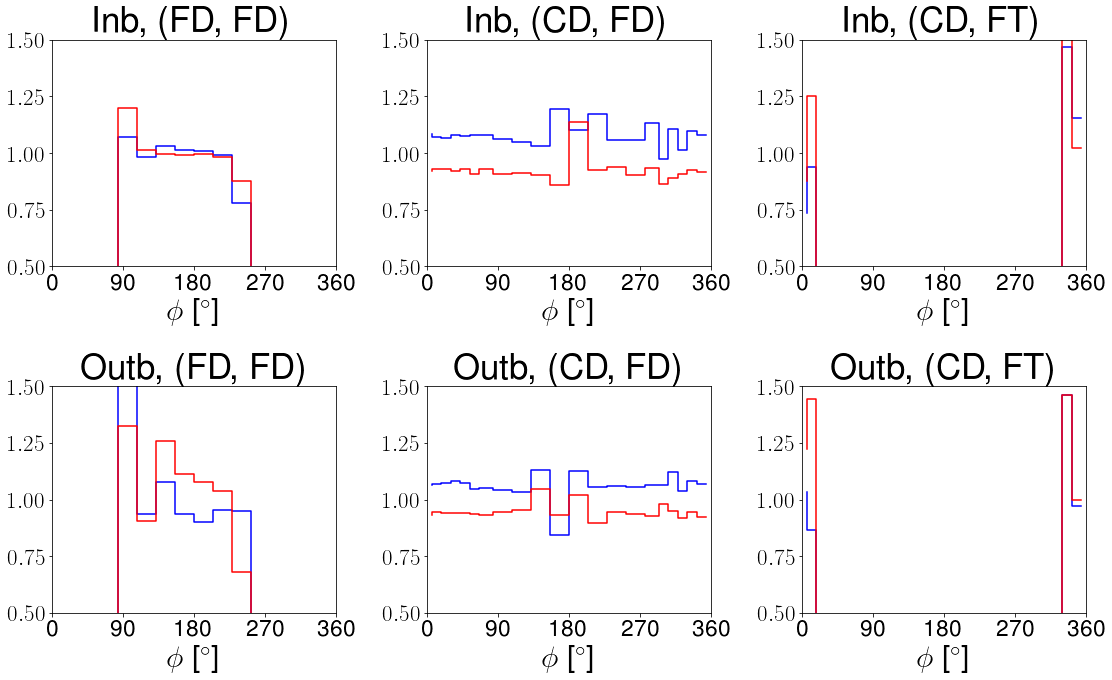

In [257]:
Q2xBtbin = 85

fig, axs = plt.subplots(2, 3, figsize = (16, 10))


# axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb1"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb1"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb1"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb1"]!=0), color = 'b')
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb1"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb1"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb1"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb1"]!=0), color = 'r')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb2"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb2"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb2"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb2"]!=0), color = 'b')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb2"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb2"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb2"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb2"]!=0), color = 'r')

axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb3"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb3"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb3"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb3"]!=0), color = 'b')
axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb3"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb3"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb3"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb3"]!=0), color = 'r')

axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb1"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb1"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb1"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb1"]!=0), color = 'b')
axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb1"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb1"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb1"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb1"]!=0), color = 'r')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb2"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb2"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb2"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb2"]!=0), color = 'b')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb2"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb2"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb2"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb2"]!=0), color = 'r')

axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb3"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb3"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb3"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb3"]!=0), color = 'b')
axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb3"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb3"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb3"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb3"]!=0), color = 'r')

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\phi$" +" ["+degree+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
#         axs[xind, yind].set_xscale('log')
#         axs[xind, yind].set_yscale('log')
# 
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
        axs[xind, yind].set_xlim([0, 360])
        axs[xind, yind].set_ylim([0.5, 1.5])
        axs[xind, yind].set_xticks([0, 90, 180, 270, 360])
        axs[xind, yind].set_xticklabels([0, 90, 180, 270, 360])

        
plt.savefig("accratio{}.pdf".format(Q2xBtbin))

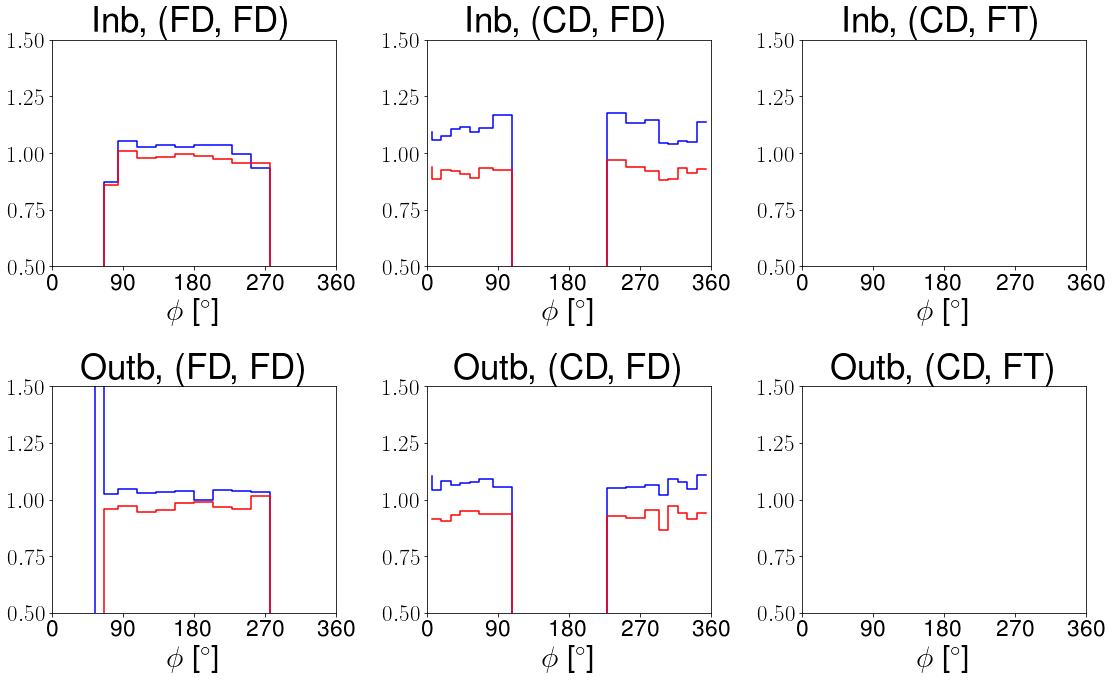

In [258]:
Q2xBtbin = 93

fig, axs = plt.subplots(2, 3, figsize = (16, 10))


# axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb1"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb1"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb1"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb1"]!=0), color = 'b')
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb1"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb1"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb1"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb1"]!=0), color = 'r')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb2"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb2"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb2"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb2"]!=0), color = 'b')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb2"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb2"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb2"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb2"]!=0), color = 'r')

axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb3"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb3"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb3"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb3"]!=0), color = 'b')
axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb3"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb3"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb3"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb3"]!=0), color = 'r')

axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb1"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb1"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb1"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb1"]!=0), color = 'b')
axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb1"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb1"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb1"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb1"]!=0), color = 'r')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb2"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb2"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb2"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb2"]!=0), color = 'b')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb2"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb2"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb2"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb2"]!=0), color = 'r')

axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb3"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb3"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb3"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb3"]!=0), color = 'b')
axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb3"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb3"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb3"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb3"]!=0), color = 'r')

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\phi$" +" ["+degree+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
#         axs[xind, yind].set_xscale('log')
#         axs[xind, yind].set_yscale('log')
# 
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
        axs[xind, yind].set_xlim([0, 360])
        axs[xind, yind].set_ylim([0.5, 1.5])
        axs[xind, yind].set_xticks([0, 90, 180, 270, 360])
        axs[xind, yind].set_xticklabels([0, 90, 180, 270, 360])

        
plt.savefig("accratio{}.pdf".format(Q2xBtbin))

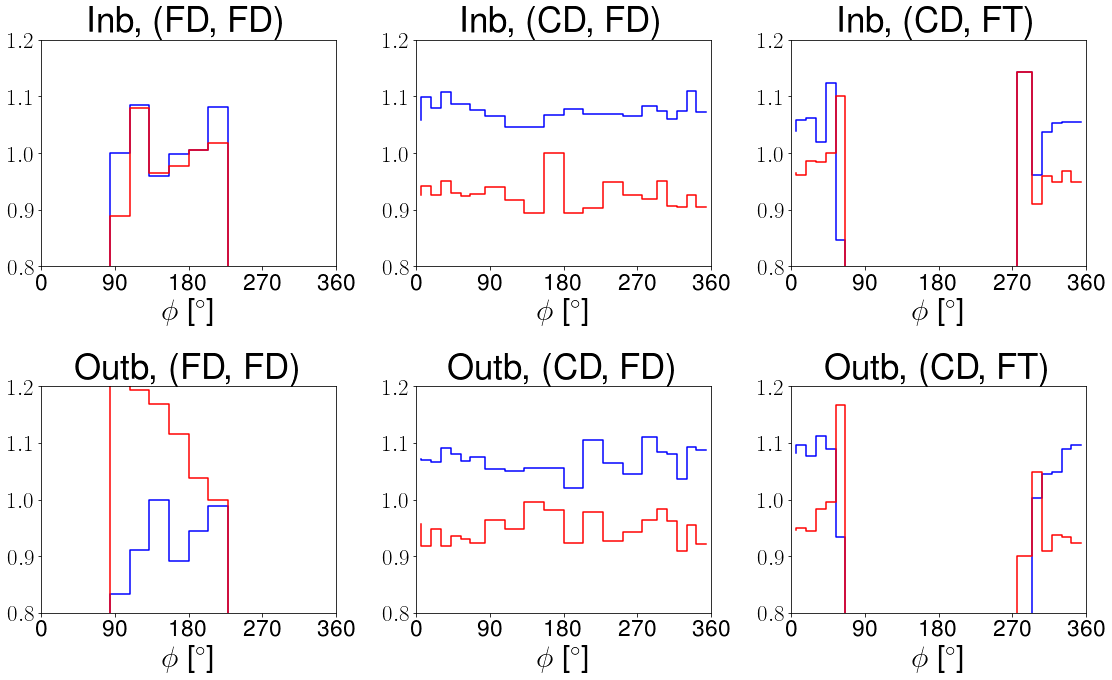

In [291]:
Q2xBtbin = 113

fig, axs = plt.subplots(2, 3, figsize = (16, 10))


# axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb1"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb1"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb1"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb1"]!=0), color = 'b')
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb1"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb1"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb1"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb1"]!=0), color = 'r')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb2"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb2"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb2"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb2"]!=0), color = 'b')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb2"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb2"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb2"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb2"]!=0), color = 'r')

axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb3"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb3"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb3"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accInb3"]!=0), color = 'b')
axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accInb3"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb3"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb3"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accInb3"]!=0), color = 'r')

axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb1"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb1"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb1"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb1"]!=0), color = 'b')
axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb1"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb1"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb1"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb1"]!=0), color = 'r')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb2"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb2"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb2"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb2"]!=0), color = 'b')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb2"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb2"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb2"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb2"]!=0), color = 'r')

axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb3"], counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb3"], out = np.zeros(counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb3"].shape), where = counts11.loc[counts11.Q2xBtbin == Q2xBtbin, "accOutb3"]!=0), color = 'b')
axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "accOutb3"], counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb3"], out = np.zeros(counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb3"].shape), where = counts09.loc[counts09.Q2xBtbin == Q2xBtbin, "accOutb3"]!=0), color = 'r')

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\phi$" +" ["+degree+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
#         axs[xind, yind].set_xscale('log')
#         axs[xind, yind].set_yscale('log')
# 
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
        axs[xind, yind].set_xlim([0, 360])
        axs[xind, yind].set_ylim([0.8, 1.2])
        axs[xind, yind].set_xticks([0, 90, 180, 270, 360])
        axs[xind, yind].set_xticklabels([0, 90, 180, 270, 360])

        
plt.savefig("accratio{}.pdf".format(Q2xBtbin))

In [302]:
counts.loc[:, "dvcsExpInb11"] = np.where(counts.epgExpInb1 - counts.contaminationInb11>0, counts.epgExpInb1 - counts.contaminationInb11, 0)
counts.loc[:, "dvcsExpInb12"] = np.where(counts.epgExpInb1 - counts.contaminationInb12>0, counts.epgExpInb1 - counts.contaminationInb12, 0)
counts.loc[:, "dvcsExpInb13"] = np.where(counts.epgExpInb1 - counts.contaminationInb13>0, counts.epgExpInb1 - counts.contaminationInb13, 0)

counts.loc[:, "dvcsExpInb21"] = np.where(counts.epgExpInb2 - counts.contaminationInb21>0, counts.epgExpInb2 - counts.contaminationInb21, 0)
counts.loc[:, "dvcsExpInb22"] = np.where(counts.epgExpInb2 - counts.contaminationInb22>0, counts.epgExpInb2 - counts.contaminationInb22, 0)
counts.loc[:, "dvcsExpInb23"] = np.where(counts.epgExpInb2 - counts.contaminationInb23>0, counts.epgExpInb2 - counts.contaminationInb23, 0)

counts.loc[:, "dvcsExpInb31"] = np.where(counts.epgExpInb3 - counts.contaminationInb31>0, counts.epgExpInb3 - counts.contaminationInb31, 0)
counts.loc[:, "dvcsExpInb32"] = np.where(counts.epgExpInb3 - counts.contaminationInb32>0, counts.epgExpInb3 - counts.contaminationInb32, 0)
counts.loc[:, "dvcsExpInb33"] = np.where(counts.epgExpInb3 - counts.contaminationInb33>0, counts.epgExpInb3 - counts.contaminationInb33, 0)

In [311]:
counts.loc[:, "dvcsExpOutb11"] = np.where(counts.epgExpOutb1 - counts.contaminationOutb11>0, counts.epgExpOutb1 - counts.contaminationOutb11, 0)
counts.loc[:, "dvcsExpOutb12"] = np.where(counts.epgExpOutb1 - counts.contaminationOutb12>0, counts.epgExpOutb1 - counts.contaminationOutb12, 0)
counts.loc[:, "dvcsExpOutb13"] = np.where(counts.epgExpOutb1 - counts.contaminationOutb13>0, counts.epgExpOutb1 - counts.contaminationOutb13, 0)

counts.loc[:, "dvcsExpOutb21"] = np.where(counts.epgExpOutb2 - counts.contaminationOutb21>0, counts.epgExpOutb2 - counts.contaminationOutb21, 0)
counts.loc[:, "dvcsExpOutb22"] = np.where(counts.epgExpOutb2 - counts.contaminationOutb22>0, counts.epgExpOutb2 - counts.contaminationOutb22, 0)
counts.loc[:, "dvcsExpOutb23"] = np.where(counts.epgExpOutb2 - counts.contaminationOutb23>0, counts.epgExpOutb2 - counts.contaminationOutb23, 0)

counts.loc[:, "dvcsExpOutb31"] = np.where(counts.epgExpOutb3 - counts.contaminationOutb31>0, counts.epgExpOutb3 - counts.contaminationOutb31, 0)
counts.loc[:, "dvcsExpOutb32"] = np.where(counts.epgExpOutb3 - counts.contaminationOutb32>0, counts.epgExpOutb3 - counts.contaminationOutb32, 0)
counts.loc[:, "dvcsExpOutb33"] = np.where(counts.epgExpOutb3 - counts.contaminationOutb33>0, counts.epgExpOutb3 - counts.contaminationOutb33, 0)

In [304]:
Q2xBtbin = 85
counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb11"]/counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb13"]

1713         NaN
1714         NaN
1715         NaN
1716         NaN
1717         NaN
1718         NaN
1719         NaN
1720    0.902973
1721    0.901892
1722    1.031147
1723    1.096602
1724    0.953006
1725    0.955142
1726         NaN
1727         NaN
1728         NaN
1729         NaN
1730         NaN
1731         NaN
1732         NaN
1733         NaN
dtype: float64

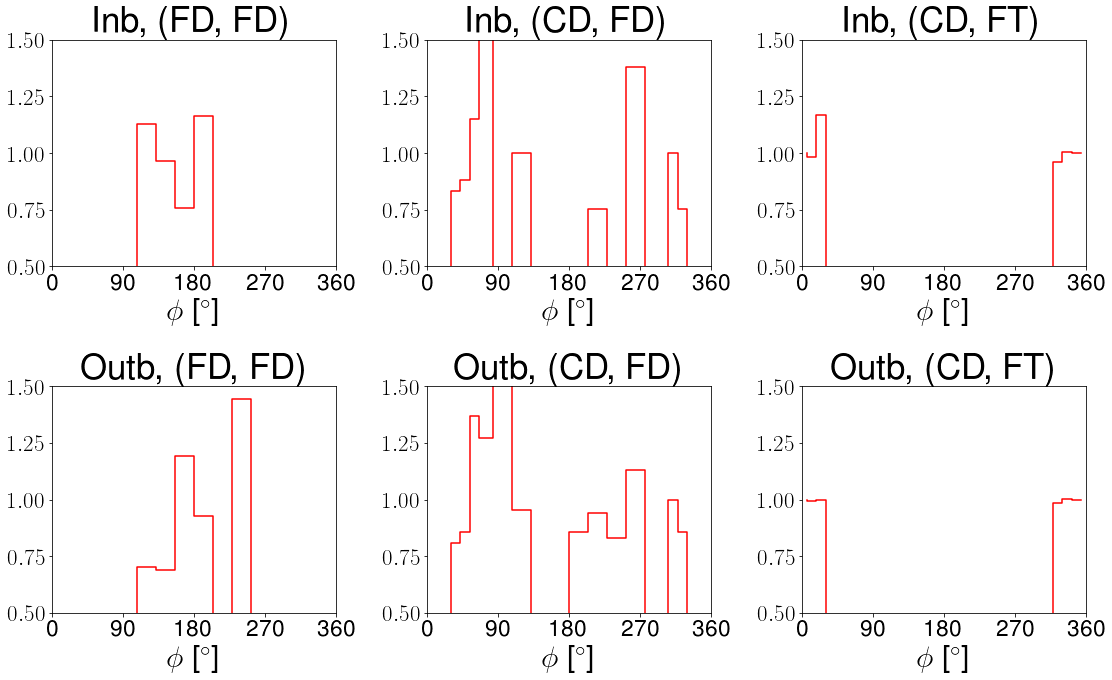

In [319]:
Q2xBtbin = 83
fig, axs = plt.subplots(2, 3, figsize = (16, 10))


# axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb13"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb11"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb11"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb11"]!=0), color = 'r')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb23"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb21"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb21"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb21"]!=0), color = 'r')
axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb33"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb31"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb31"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb31"]!=0), color = 'r')

axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb13"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb11"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb11"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb11"]!=0), color = 'r')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb23"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb21"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb21"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb21"]!=0), color = 'r')
axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb33"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb31"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb31"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb31"]!=0), color = 'r')

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\phi$" +" ["+degree+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
#         axs[xind, yind].set_xscale('log')
#         axs[xind, yind].set_yscale('log')
# 
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
        axs[xind, yind].set_xlim([0, 360])
        axs[xind, yind].set_ylim([0.5, 1.5])
        axs[xind, yind].set_xticks([0, 90, 180, 270, 360])
        axs[xind, yind].set_xticklabels([0, 90, 180, 270, 360])

        
plt.savefig("pi0syst{}.pdf".format(Q2xBtbin))

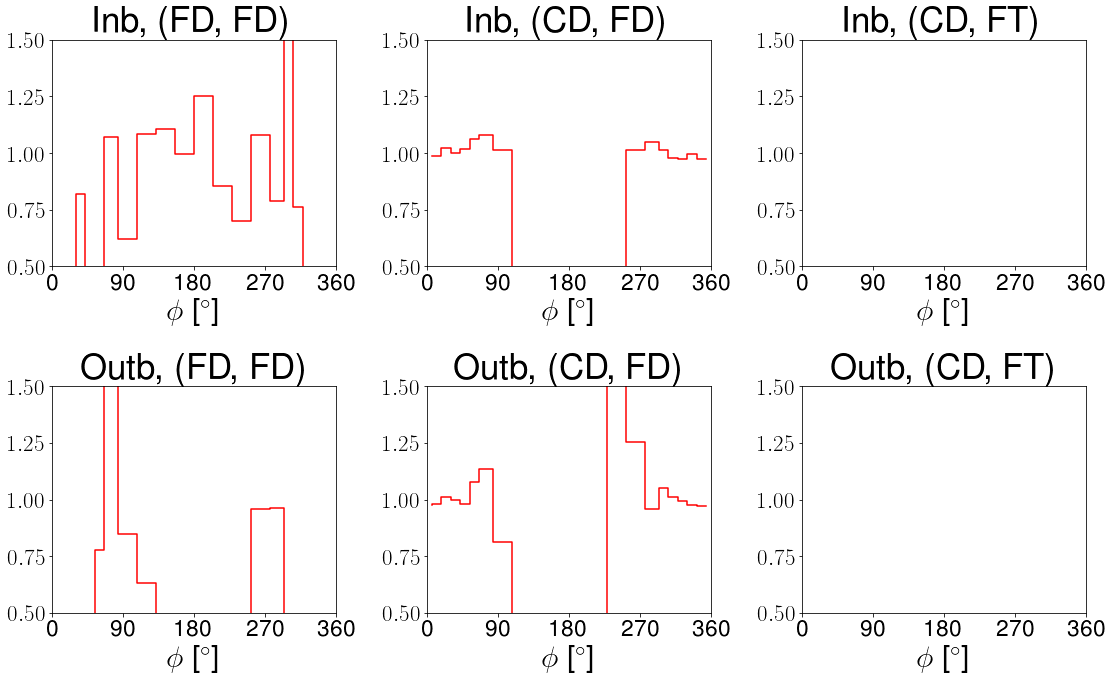

In [320]:
Q2xBtbin = 92
fig, axs = plt.subplots(2, 3, figsize = (16, 10))


# axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb13"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb11"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb11"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb11"]!=0), color = 'r')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb23"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb21"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb21"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb21"]!=0), color = 'r')
axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb33"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb31"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb31"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb31"]!=0), color = 'r')

axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb13"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb11"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb11"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb11"]!=0), color = 'r')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb23"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb21"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb21"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb21"]!=0), color = 'r')
axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb33"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb31"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb31"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb31"]!=0), color = 'r')

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\phi$" +" ["+degree+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
#         axs[xind, yind].set_xscale('log')
#         axs[xind, yind].set_yscale('log')
# 
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
        axs[xind, yind].set_xlim([0, 360])
        axs[xind, yind].set_ylim([0.5, 1.5])
        axs[xind, yind].set_xticks([0, 90, 180, 270, 360])
        axs[xind, yind].set_xticklabels([0, 90, 180, 270, 360])

        
plt.savefig("pi0syst{}.pdf".format(Q2xBtbin))

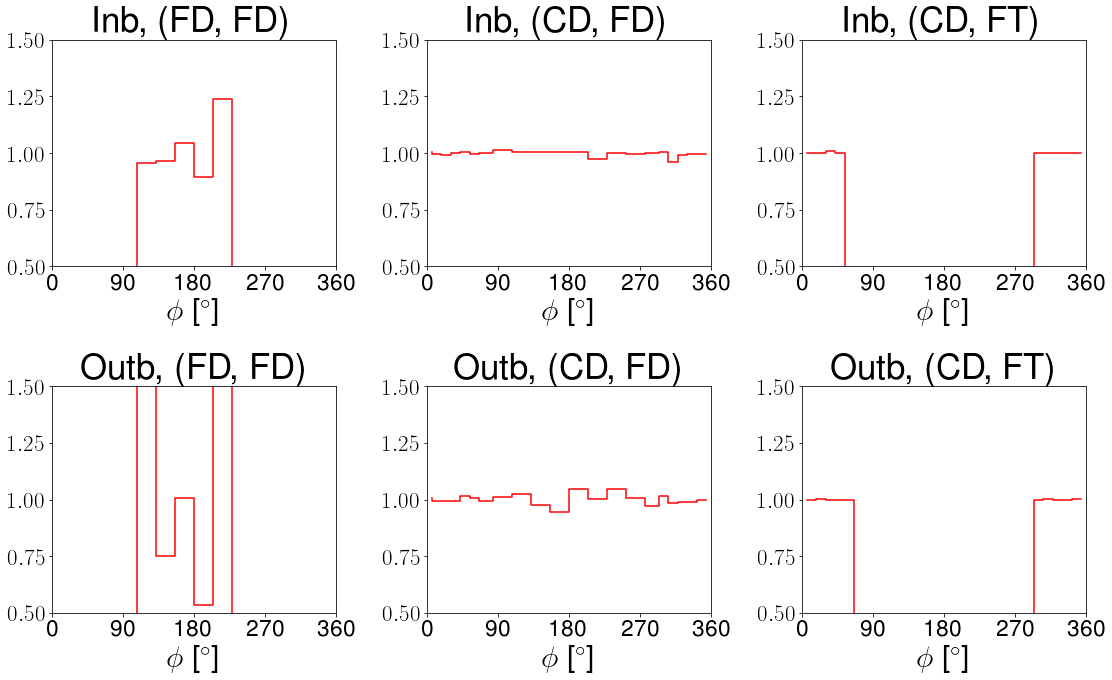

In [322]:
Q2xBtbin = 113
fig, axs = plt.subplots(2, 3, figsize = (16, 10))


# axs[0, 0].hist2d(epgExpInbFD.xB, epgExpInbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 1].hist2d(epgExpInbCD.xB, epgExpInbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[0, 2].hist2d(epgExpInbCDFT.xB, epgExpInbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 0].hist2d(epgExpOutbFD.xB, epgExpOutbFD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 1].hist2d(epgExpOutbCD.xB, epgExpOutbCD.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
# axs[1, 2].hist2d(epgExpOutbCDFT.xB, epgExpOutbCDFT.Q2, bins = [np.linspace(0.005, 0.85, 101), np.linspace(0.5, 12, 101)], cmap = cmap, cmin = 1, norm = LogNorm(vmin = 1, vmax = 10000))
axs[0, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb13"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb11"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb11"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb11"]!=0), color = 'r')
axs[0, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb23"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb21"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb21"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb21"]!=0), color = 'r')
axs[0, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb33"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb31"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb31"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpInb31"]!=0), color = 'r')

axs[1, 0].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb13"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb11"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb11"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb11"]!=0), color = 'r')
axs[1, 1].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb23"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb21"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb21"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb21"]!=0), color = 'r')
axs[1, 2].step((counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_f"]+counts.loc[counts.Q2xBtbin == Q2xBtbin, "phi_i"])/2, np.divide(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb33"], counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb31"], out = np.zeros(counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb31"].shape), where = counts.loc[counts.Q2xBtbin == Q2xBtbin, "dvcsExpOutb31"]!=0), color = 'r')

titles = ["Inb, (FD, FD)", "Inb, (CD, FD)", "Inb, (CD, FT)", "Outb, (FD, FD)", "Outb, (CD, FD)", "Outb, (CD, FT)"]
for xind in range(2):
    for yind in range(3):
        axs[xind, yind].set_xlabel(r"$\phi$" +" ["+degree+"]")
        axs[xind, yind].set_title(titles[xind*3+yind])
#         axs[xind, yind].set_xscale('log')
#         axs[xind, yind].set_yscale('log')
# 
# # axs.axvline(0.4, color = 'k', linestyle = '--', linewidth = 4)
        axs[xind, yind].set_xlim([0, 360])
        axs[xind, yind].set_ylim([0.5, 1.5])
        axs[xind, yind].set_xticks([0, 90, 180, 270, 360])
        axs[xind, yind].set_xticklabels([0, 90, 180, 270, 360])

        
plt.savefig("pi0syst{}.pdf".format(Q2xBtbin))

In [546]:
def printRegion(Q2xBtbin, latexit = True):
    if latexit:
         print("{:.3f}&<x_B<{:.3f}\\\\{:.3f}&<Q^2<{:.3f}\\\\{:.3f}&<|t|~<{:.3f}".format(counts.loc[counts.Q2xBtbin==Q2xBtbin, "xB_i"].to_numpy()[0], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xB_f"].to_numpy()[0], counts.loc[counts.Q2xBtbin==Q2xBtbin, "Q2_i"].to_numpy()[0], counts.loc[counts.Q2xBtbin==Q2xBtbin, "Q2_f"].to_numpy()[0], counts.loc[counts.Q2xBtbin==Q2xBtbin, "t_i"].to_numpy()[0], counts.loc[counts.Q2xBtbin==Q2xBtbin, "t_f"].to_numpy()[0]))
    else:
        print("${:.3f}<x_B<{:.3f}$, ${:.3f}<Q^2<{:.3f}$, and ${:.3f}<|t|<{:.3f}$".format(counts.loc[counts.Q2xBtbin==Q2xBtbin, "xB_i"].to_numpy()[0], counts.loc[counts.Q2xBtbin==Q2xBtbin, "xB_f"].to_numpy()[0], counts.loc[counts.Q2xBtbin==Q2xBtbin, "Q2_i"].to_numpy()[0], counts.loc[counts.Q2xBtbin==Q2xBtbin, "Q2_f"].to_numpy()[0], counts.loc[counts.Q2xBtbin==Q2xBtbin, "t_i"].to_numpy()[0], counts.loc[counts.Q2xBtbin==Q2xBtbin, "t_f"].to_numpy()[0]))

In [547]:
printRegion(1, latexit = True)

0.062&<x_B<0.090\\1.000&<Q^2<1.456\\0.177&<|t|~<0.321


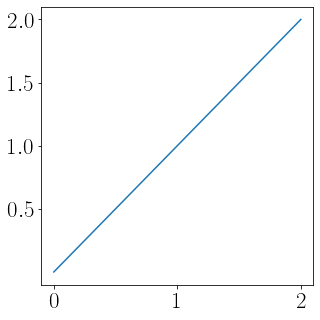

In [19]:
x = np.linspace(0, 2, 100)
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.plot(x, x)
ax.set_yticks([0.5, 1, 1.5, 2])
# ax.set_yticklabels(ax.get_yticklabels())
# print(ax.get_yticklabels())
plt.show()